

## Raceway_Vol_m model for PDF shaping (894 samples)

This uses the new object oriented class for PDF shaping.

This model uses the CFD raceway data with 894 samples

## Web application 6 inputs and 1 outputs

Run interactively on the web at:

## Inputs

(1, 'i_h2_inj_kg_thm')

(2, 'i_pul_coal_inj_kg_thm')

(3, 'i_nat_gas_inj_kg_thm')

(4, 'i_nat_gas_t_k')

(5, 'i_o2_vol_perce')

(9, 'i_hot_blast_temp_k')

## Outputs


(18, 'o_raceway_volume_m')





## Installs


In [1]:

## !pip install xgboost


In [2]:

import torch
import numpy as np
import pandas as pd
import sklearn
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import math
import seaborn as sns
import random
import functorch

from numpy.random import normal
from scipy.stats import norm
import scipy.stats as stats
from numpy import hstack
from numpy import vstack
from numpy import exp
from sklearn.neighbors import KernelDensity

##from typing import Optional

from torch import Tensor


from torch.utils.data import TensorDataset, DataLoader

from mlxtend.plotting import heatmap

## coefficient of determination (R**2)
from sklearn.metrics import r2_score

np.set_printoptions(suppress=True)
torch.set_printoptions(sci_mode=False)




In [3]:


import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



In [4]:

import PDFshapingUtils as PDF_tk


In [5]:

PDFshapingOBJ = PDF_tk.PDFshapingUtils()


In [6]:

PDFshapingOBJ.initializeImpulseGaussian()

print(PDFshapingOBJ.x_range_impulse_func )
print(PDFshapingOBJ.impulse_func_vector_vals )
print(PDFshapingOBJ.x_range_impulse_func.shape )
print(PDFshapingOBJ.impulse_func_vector_vals.shape )
 
print( sum(PDFshapingOBJ.impulse_func_vector_vals) )      ## should add up to 100 (i.e. 1.0 prob density)


tensor([    -5.0000,     -4.9900,     -4.9800,     -4.9700,     -4.9600,
            -4.9500,     -4.9400,     -4.9300,     -4.9200,     -4.9100,
            -4.9000,     -4.8900,     -4.8800,     -4.8700,     -4.8600,
            -4.8500,     -4.8400,     -4.8300,     -4.8200,     -4.8100,
            -4.8000,     -4.7900,     -4.7800,     -4.7700,     -4.7600,
            -4.7500,     -4.7400,     -4.7300,     -4.7200,     -4.7100,
            -4.7000,     -4.6900,     -4.6800,     -4.6700,     -4.6600,
            -4.6500,     -4.6400,     -4.6300,     -4.6200,     -4.6100,
            -4.6000,     -4.5900,     -4.5800,     -4.5700,     -4.5600,
            -4.5500,     -4.5400,     -4.5300,     -4.5200,     -4.5100,
            -4.5000,     -4.4900,     -4.4800,     -4.4700,     -4.4600,
            -4.4500,     -4.4400,     -4.4300,     -4.4200,     -4.4100,
            -4.4000,     -4.3900,     -4.3800,     -4.3700,     -4.3600,
            -4.3500,     -4.3400,     -4.3300,     

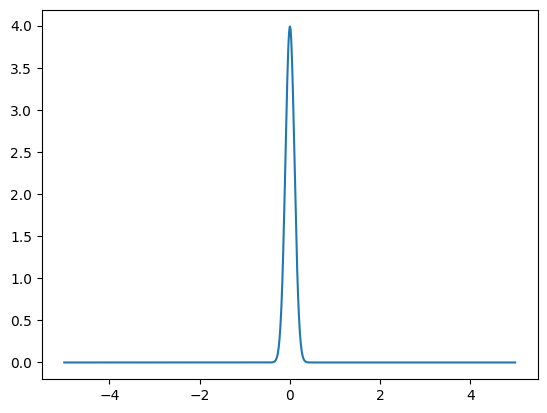

In [7]:

plt.plot(PDFshapingOBJ.x_range_impulse_func, PDFshapingOBJ.impulse_func_vector_vals)
plt.show()



## RUN KDE test


In [8]:

## PDFshapingOBJ.test_torchKDE_with_fake_data()



## Load Data


In [9]:

PDFshapingOBJ.read_csv_file_with_pandas('CFD.11.2023.csv')


In [10]:

PDFshapingOBJ.CFD_raw_data


index  i_h2_inj_kg_thm  i_pul_coal_inj_kg_thm  i_nat_gas_inj_kg_thm  \
0        1                0                      0                  37.9   
1        2                0                      0                  37.9   
2        3                0                      0                  37.9   
3        4                0                      0                  37.9   
4        5                0                      0                  70.0   
..     ...              ...                    ...                   ...   
889    890               20                      0                  70.0   
890    891               30                      0                  60.0   
891    892               10                      0                 100.0   
892    893               20                      0                  90.0   
893    894               30                      0                  80.0   

     i_nat_gas_t_k  i_o2_vol_perce  i_bf_windrate_nm3_hr  i_hb_moist_g_nm3  \
0              300              21            308750.365            12.154   
1              300              24            308750.365            12.154   
2              300              27            308750.365            12.154   
3              300              30            308750.365            12.154   
4              300              21            308750.365            12.154   
..             ...             ...                   ...               ...   
889            300              27            308750.365            12.154   
890            300              27            308750.365            12.154   
891            300              27            308750.365            12.154   
892            300              27            308750.365            12.154   
893            300              27            308750.365            12.154   

     i_hot_blast_press_pa  i_hot_blast_temp_k  ...  o_shaft_co_utiliz  \
0                359906.3            1459.817  ...           47.20085   
1                359906.3            1459.817  ...           49.15851   
2                359906.3            1459.817  ...           49.30602   
3                359906.3            1459.817  ...           47.22992   
4                359906.3            1459.817  ...           46.66340   
..                    ...                 ...  ...                ...   
889              359906.3            1459.817  ...           48.11546   
890              359906.3            1459.817  ...           47.40511   
891              359906.3            1459.817  ...           48.24004   
892              359906.3            1459.817  ...           47.21544   
893              359906.3            1459.817  ...           46.50030   

     o_shaft_h2_utiliz  o_shaft_top_gas_temp_c  o_shaft_press_drop_pa  \
0             42.99392                118.8785              108434.33   
1             44.99764                 95.7563              108381.02   
2             44.48147                 84.8519              112232.83   
3             46.37194                 66.3779              118634.40   
4             41.83302                130.4139              106947.64   
..                 ...                     ...                    ...   
889           42.78430                122.0079              137423.80   
890           41.99833                132.4238              146622.00   
891           41.11932                121.1668              128838.00   
892           39.43614                129.2255              129115.30   
893           41.24624                149.5792              157703.10   

     o_shaft_coke_rate_kg_thm  o_shaft_cohesive_zone_tip_height_m  \
0                   462.73655                            31.83963   
1                   480.82105                            31.83963   
2                   500.10050                            31.75963   
3                   521.58650                            31.55962   
4                   422.57185                           

In [11]:

PDFshapingOBJ.print_headers_list()


['index', 'i_h2_inj_kg_thm', 'i_pul_coal_inj_kg_thm', 'i_nat_gas_inj_kg_thm', 'i_nat_gas_t_k', 'i_o2_vol_perce', 'i_bf_windrate_nm3_hr', 'i_hb_moist_g_nm3', 'i_hot_blast_press_pa', 'i_hot_blast_temp_k', 'i_ore_moisture_weight_perce', 'i_coke_weight_kg', 'i_ore_weight_kg', 'o_production_rate_thmperday', 'o_tuyere_exit_velo_m_s', 'o_tuyere_t_k', 'o_raceway_flame_temp_k', 'o_raceway_coal_burn_perce', 'o_raceway_volume_m', 'o_raceway_depth_m', 'o_shaft_co_utiliz', 'o_shaft_h2_utiliz', 'o_shaft_top_gas_temp_c', 'o_shaft_press_drop_pa', 'o_shaft_coke_rate_kg_thm', 'o_shaft_cohesive_zone_tip_height_m', 'o_shaft_co_v_perc', 'o_shaft_co2_v_perc', 'o_shaft_h2_v_perce', 'o_shaft_n2_v_perc']
30
(0, 'index')
(1, 'i_h2_inj_kg_thm')
(2, 'i_pul_coal_inj_kg_thm')
(3, 'i_nat_gas_inj_kg_thm')
(4, 'i_nat_gas_t_k')
(5, 'i_o2_vol_perce')
(6, 'i_bf_windrate_nm3_hr')
(7, 'i_hb_moist_g_nm3')
(8, 'i_hot_blast_press_pa')
(9, 'i_hot_blast_temp_k')
(10, 'i_ore_moisture_weight_perce')
(11, 'i_coke_weight_kg')
(12, 

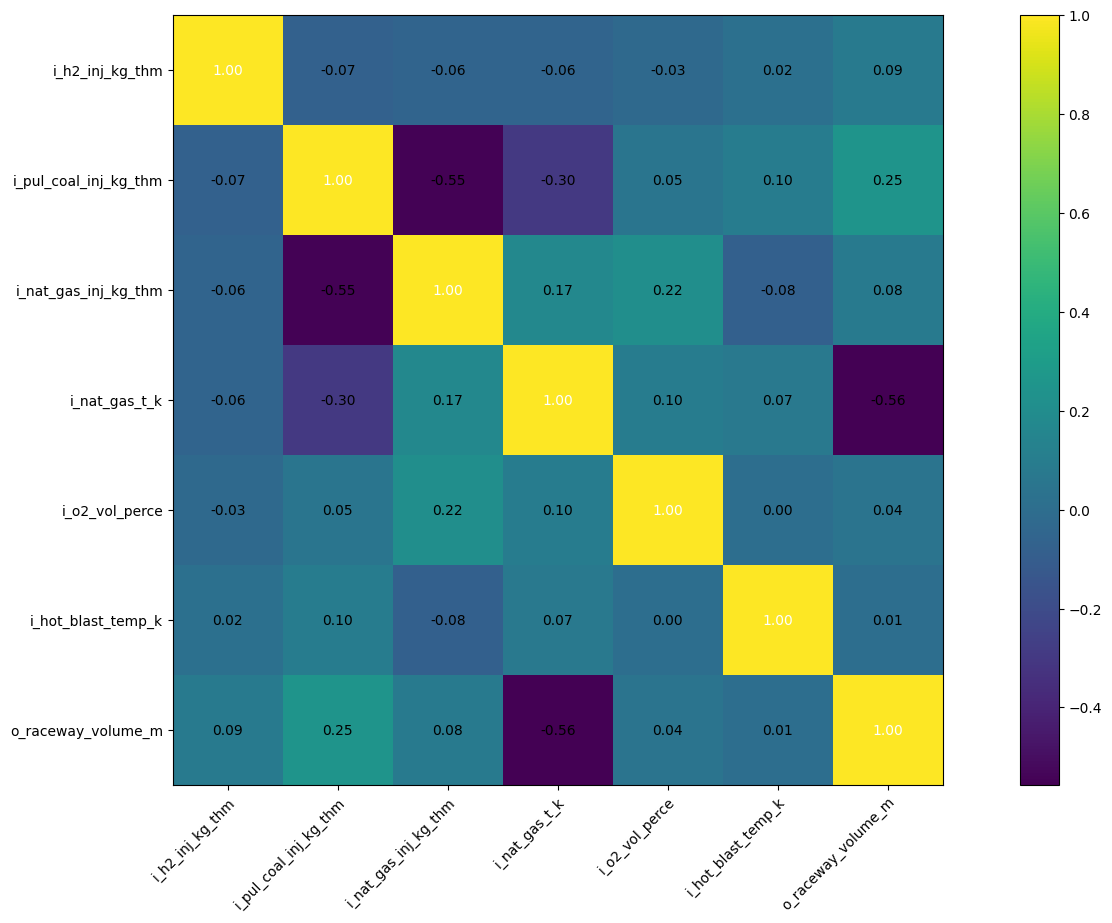

In [12]:

PDFshapingOBJ.list_of_selected_column_names = ['i_h2_inj_kg_thm', 'i_pul_coal_inj_kg_thm', 
                    'i_nat_gas_inj_kg_thm', 'i_nat_gas_t_k', 'i_o2_vol_perce', 'i_hot_blast_temp_k', 
                    'o_raceway_volume_m']

PDFshapingOBJ.print_correlation_coefficients()


In [13]:

PDFshapingOBJ.convert_pd_data_to_numpy()


[[  1.           0.           0.         ...   0.1941631    0.0438327
    0.5448123 ]
 [  2.           0.           0.         ...   0.2186134    0.04034286
    0.5149459 ]
 [  3.           0.           0.         ...   0.2353341    0.03772617
    0.4849808 ]
 ...
 [892.          10.           0.         ...   0.2015624    0.1179911
    0.4641767 ]
 [893.          20.           0.         ...   0.1906331    0.1420678
    0.4541806 ]
 [894.          30.           0.         ...   0.1820335    0.1569839
    0.4515486 ]]
(894, 30)



## Select inputs and outputs


In [14]:

PDFshapingOBJ.gen_X_y_for_selected_indeces(  
                   inputs=[1, 2, 3, 4, 5, 9] , 
                   outputs=[ 18 ]   
)


6
1


In [15]:

print(PDFshapingOBJ.X.shape)
print(PDFshapingOBJ.y.shape)


(894, 6)
(894, 1)


In [16]:

PDFshapingOBJ.random_seed = int( random.random() * 100  )         ## defautl is 42


In [17]:

PDFshapingOBJ.split_np_data_train_test(selected_test_size=0.2)


(715, 6)
(179, 6)
(715, 1)
(179, 1)


In [18]:

PDFshapingOBJ.convert_dataset_from_np_to_torch()


In [19]:

PDFshapingOBJ.standardize_X_scales()
PDFshapingOBJ.standardize_y_scales()


In [20]:

PDFshapingOBJ.gen_Dataloader_train()

PDFshapingOBJ.train_dl



## NN architectures


In [21]:

#######################################################
## Linear Regression

class LinRegNet_SIO(nn.Module):
    ## initialize the layers
    def __init__(self, x_means, x_deviations, y_means, y_deviations):
        super().__init__()
        
        self.x_means      = x_means
        self.x_deviations = x_deviations
        self.y_means      = y_means
        self.y_deviations = y_deviations
        
        self.linear1 = nn.Linear(6, 1) 
        
        ## nn.init.xavier_uniform_(self.linear1.weight)
        ## nn.init.zeros_(self.linear1.bias)

    ## perform inference
    def forward(self, x):
        x = (x - self.x_means) / self.x_deviations
        
        y_scaled = self.linear1(x)
        y_descaled = y_scaled * self.y_deviations + self.y_means
        
        return y_descaled, y_scaled

    
#############################################################
## Multi-Layer Perceptron

class MLP_Net_SIO(nn.Module):
    ## initialize the layers
    def __init__(self, x_means, x_deviations, y_means, y_deviations):
        super().__init__()
        
        self.x_means      = x_means
        self.x_deviations = x_deviations
        self.y_means      = y_means
        self.y_deviations = y_deviations
        
        self.linear1 = nn.Linear(6, 10)
        self.act1    = nn.Sigmoid()                       ## Tanh() 
        self.linear2 = nn.Linear(10, 1)
        self.dropout = nn.Dropout(0.25)
        
        ## nn.init.xavier_uniform_(self.linear1.weight)
        ## nn.init.zeros_(self.linear1.bias)
        
        ## nn.init.xavier_uniform_(self.linear2.weight)
        ## nn.init.zeros_(self.linear2.bias)
    
    ## perform inference
    def forward(self, x):
        x = (x - self.x_means) / self.x_deviations
        x = self.linear1(x)
        x = self.act1(x)
        x = self.dropout(x)
        
        y_scaled = self.linear2(x)
        y_descaled = y_scaled * self.y_deviations + self.y_means
        
        return y_descaled, y_scaled
    

#############################################################
## Deep Learning model with 2 hidden layers


class DL_Net_SIO(nn.Module):
    
    ## initialize the layers
    def __init__(self, x_means, x_deviations, y_means, y_deviations):
        super().__init__()
        
        self.x_means      = x_means
        self.x_deviations = x_deviations
        self.y_means      = y_means
        self.y_deviations = y_deviations
        
        self.linear1 = nn.Linear(6, 10)
        self.act1    = nn.Sigmoid()                       ## Tanh() 
        self.linear2 = nn.Linear(10, 6)
        self.act2    = nn.Sigmoid() 
        self.linear3 = nn.Linear(6, 1)
        self.dropout = nn.Dropout(0.25)
        
        ## nn.init.xavier_uniform_(self.linear1.weight)
        ## nn.init.zeros_(self.linear1.bias)
        
        ## nn.init.xavier_uniform_(self.linear2.weight)
        ## nn.init.zeros_(self.linear2.bias)
        
        ## nn.init.xavier_uniform_(self.linear3.weight)
        ## nn.init.zeros_(self.linear3.bias)
    
    ## perform inference
    def forward(self, x):
        
        x = (x - self.x_means) / self.x_deviations
        x = self.linear1(x)
        x = self.act1(x)
        x = self.dropout(x)
        x = self.linear2(x)
        x = self.act2(x)
        x = self.dropout(x)
        
        y_scaled = self.linear3(x)
        y_descaled = y_scaled * self.y_deviations + self.y_means
        
        return y_descaled, y_scaled


In [22]:


#############################################################
##   F1      plus       F2
## Linear     +      Nonlinear

class F1plusF2_SIO(nn.Module):
    ## initialize the layers
    def __init__(self, x_means, x_deviations, y_means, y_deviations):
        super().__init__()
        
        self.x_means      = x_means
        self.x_deviations = x_deviations
        self.y_means      = y_means
        self.y_deviations = y_deviations
        
        ## F1
        self.f1_linear1 = nn.Linear(6, 1)       
        
        ## F2
        self.f2_linear1 = nn.Linear(6, 10)
        self.f2_act1    = nn.Sigmoid()                    ## Tanh()                       
        self.f2_linear2 = nn.Linear(10, 1)       
        self.f2_dropout = nn.Dropout(0.25)
        
        
    ## perform inference
    def forward(self, x):
        x = (x - self.x_means) / self.x_deviations
        
        ## F1
        f1 = self.f1_linear1(x)
        
        ## F2
        f2 = self.f2_linear1(x)
        f2 = self.f2_act1(f2)
        f2 = self.f2_dropout(f2)
        f2 = self.f2_linear2(f2)
        
        
        y_scaled   = f1 + f2
        y_descaled = y_scaled * self.y_deviations + self.y_means
        
        return y_descaled, y_scaled
    



## Results for g(x) = F1(x) + F2(x) with No PDF shaping

F1 = Linear

F2 = Nonlinear


In [23]:

def fit_y_scaled(num_epochs, model, loss_fn, opt):
    
    PDFshapingOBJ.list_metric = []
    for epoch in range(num_epochs):
        for xb, yb in PDFshapingOBJ.train_dl:
            pred_descaled, pred_scaled = model(xb)
            loss = loss_fn(pred_scaled, yb)
            loss.backward()
            opt.step()
            opt.zero_grad()
        
        if epoch % 200 == 0:
            print(epoch, " loss= ", loss)
            
            
        pred_descaled, pred_scaled = model(PDFshapingOBJ.X_train_tr)
        r2_avg = torch.mean(
            torch.tensor(
                r2_score( pred_scaled.detach().numpy(),  PDFshapingOBJ.y_train_tr_scaled.numpy()   )
            )
        )
        PDFshapingOBJ.list_metric.append(  r2_avg.detach().numpy()  )
            
    PDFshapingOBJ.func_plot_performance()
            
    pred_descaled, pred_scaled = model(PDFshapingOBJ.X_train_tr)
    print('Training loss:', loss_fn(  pred_scaled,           PDFshapingOBJ.y_train_tr_scaled          ))
    print('Training R**2:', r2_score( pred_scaled.detach().numpy(), PDFshapingOBJ.y_train_tr_scaled.numpy()  ))
    


In [24]:

PDFshapingOBJ.the_string           = "No_PDF_shaping"
PDFshapingOBJ.furnace_model_name   = "raceway_vol_m"


0  loss=  tensor(0.5734, grad_fn=<MseLossBackward0>)
200  loss=  tensor(0.1507, grad_fn=<MseLossBackward0>)
400  loss=  tensor(0.3735, grad_fn=<MseLossBackward0>)
600  loss=  tensor(0.1826, grad_fn=<MseLossBackward0>)
800  loss=  tensor(0.1324, grad_fn=<MseLossBackward0>)
1000  loss=  tensor(0.6717, grad_fn=<MseLossBackward0>)
1200  loss=  tensor(0.1970, grad_fn=<MseLossBackward0>)
1400  loss=  tensor(0.1686, grad_fn=<MseLossBackward0>)
1600  loss=  tensor(0.0403, grad_fn=<MseLossBackward0>)
1800  loss=  tensor(0.1189, grad_fn=<MseLossBackward0>)


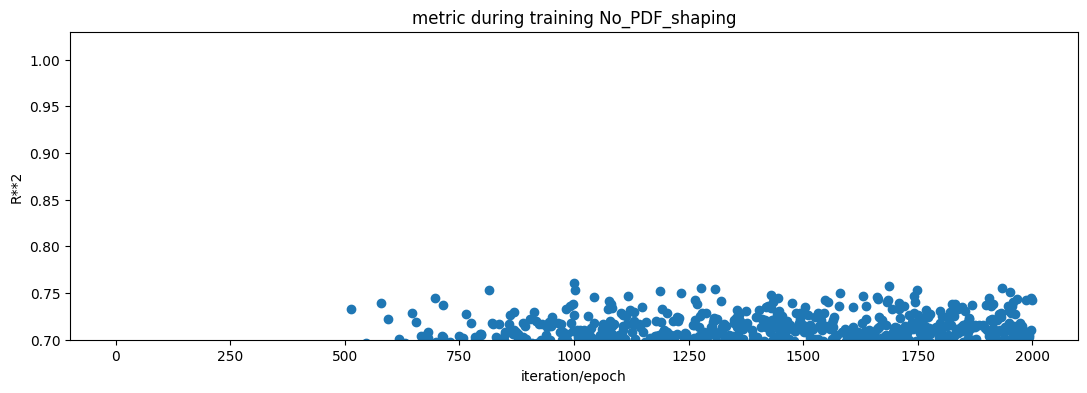

Training loss: tensor(0.2118, grad_fn=<MseLossBackward0>)
Training R**2: 0.7265933128503259
Test loss - scaled: tensor(0.2107, grad_fn=<MseLossBackward0>)
Test loss - descaled: tensor(    0.0001, grad_fn=<MseLossBackward0>)
Testing R**2 - scaled: 0.7537472212030368
Testing R**2 - descaled: 0.7537472720138161
*****
*****
Testing R**2 - Output: 0 o_raceway_volume_m 0.7537472720138161


In [25]:

model = F1plusF2_SIO(
             PDFshapingOBJ.x_means, 
             PDFshapingOBJ.x_deviations, 
             PDFshapingOBJ.y_means, 
             PDFshapingOBJ.y_deviations
)

opt = torch.optim.Adam(   model.parameters(), lr=PDFshapingOBJ.learning_rate   )
loss_fn = F.mse_loss


fit_y_scaled(PDFshapingOBJ.N_EPOCHS, model, loss_fn, opt)


pred_descaled, pred_scaled = model(PDFshapingOBJ.X_test_tr)
print('Test loss - scaled:',   loss_fn(     pred_scaled,         PDFshapingOBJ.y_test_tr_scaled          ))
print('Test loss - descaled:', loss_fn(     pred_descaled,       PDFshapingOBJ.y_test_tr                 ))
print('Testing R**2 - scaled:', r2_score( pred_scaled.detach().numpy(), PDFshapingOBJ.y_test_tr_scaled.numpy() ))
print('Testing R**2 - descaled:', r2_score( pred_descaled.detach().numpy(), PDFshapingOBJ.y_test_tr.numpy()    ))

PDFshapingOBJ.print_individual_Rsquare(pred_descaled, PDFshapingOBJ.y_test_tr)


In [26]:

list_preds = []
list_reals = []

for i in range(len(PDFshapingOBJ.X_test_tr)):
    print("**************************************************")
    print("preds, real")
    preds_descaled, preds_scaled = model(PDFshapingOBJ.X_test_tr[i])

    np_pred = preds_descaled[0].detach().numpy()              ## [0]
    np_real = PDFshapingOBJ.y_test_tr[i].detach().numpy()

    for j in range(len(np_pred)):
        print((np_pred[j], np_real[j]))
        list_preds.append(np_pred[j])
        list_reals.append(np_real[j])


**************************************************
preds, real
(0.19527546, 0.1965359)
**************************************************
preds, real
(0.20509815, 0.1965359)
**************************************************
preds, real
(0.19526045, 0.1965359)
**************************************************
preds, real
(0.22090665, 0.2223671)
**************************************************
preds, real
(0.24414548, 0.2387957)
**************************************************
preds, real
(0.23366815, 0.237446)
**************************************************
preds, real
(0.19477753, 0.1965359)
**************************************************
preds, real
(0.20695685, 0.1965359)
**************************************************
preds, real
(0.20269205, 0.1965359)
**************************************************
preds, real
(0.21210551, 0.2217346)
**************************************************
preds, real
(0.19435403, 0.1965359)
********************************************

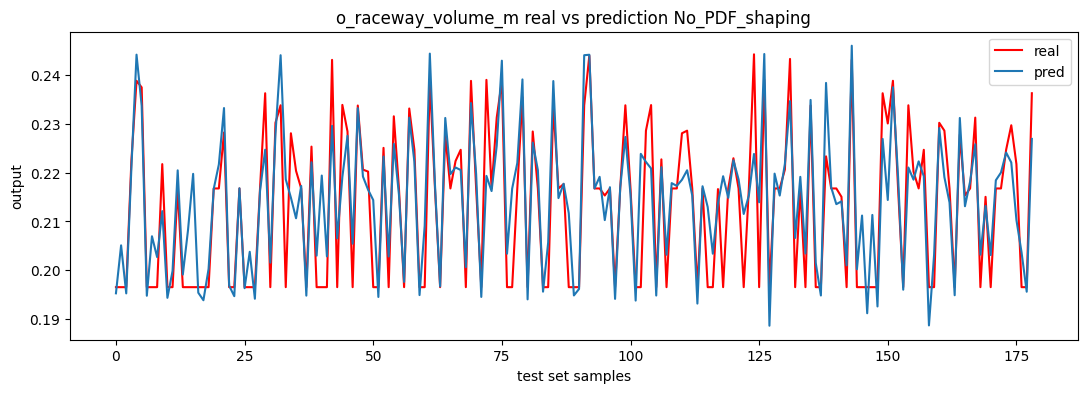

/Users/user/Desktop/DOE_CIVS/experiments/2023june/singleOutput/PDFshapingUtils.py:347: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(error, bins=n_bins, color="blue")


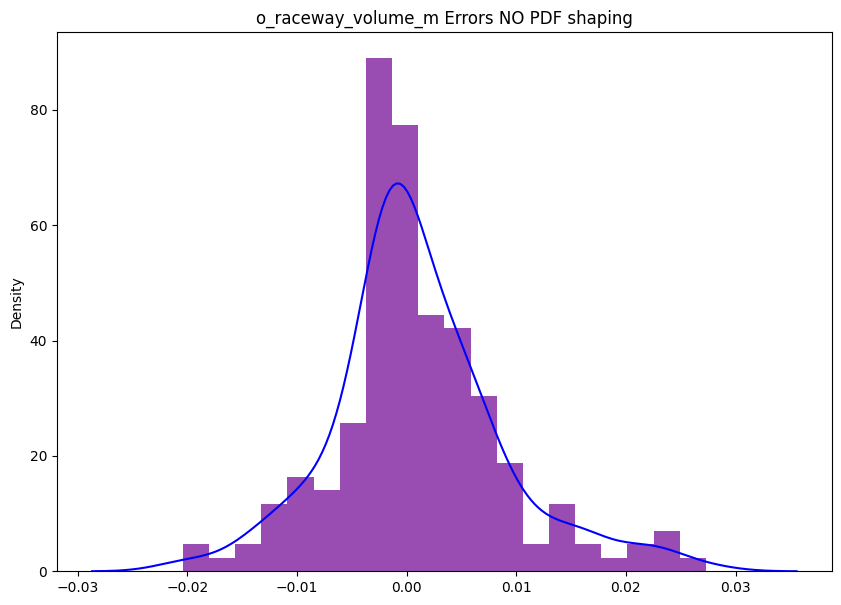

In [27]:

PDFshapingOBJ.plot_preds_vs_reals( list_preds, list_reals )



## Results for g(x) = F1(x) + F2(x) with PDF shaping

F1 = Linear

F2 = Nonlinear


In [28]:

def fit_y_scaled_PDF(num_epochs, num_epochs_pdf, model, loss_fn, opt):
    
    PDFshapingOBJ.list_metric = []
      
    for epoch in range(num_epochs):
        for xb, yb in PDFshapingOBJ.train_dl:
            
            pred_descaled, pred_scaled = model(xb)
            loss = loss_fn(pred_scaled, yb)
            loss.backward()
            opt.step()
            opt.zero_grad()
            
        if epoch % 200 == 0:
            print(epoch, " loss= ", loss)
        
        pred_descaled, pred_scaled = model(PDFshapingOBJ.X_train_tr)
        r2_avg = torch.mean(torch.tensor(
                r2_score( pred_scaled.detach().numpy(),  PDFshapingOBJ.y_train_tr_scaled.numpy()  )
        ))
        PDFshapingOBJ.list_metric.append(r2_avg.detach().numpy())
        
        
    ## opt = torch.optim.Adam(   model.parameters(), lr=learning_rate_pdfcontrol   )    
        
    for epoch in range(num_epochs_pdf):
        
        pred_descaled, pred_scaled = model(PDFshapingOBJ.X_train_tr)
       
        
        error     = pred_scaled.float() - PDFshapingOBJ.y_train_tr_scaled.float()        ## 894  x 1
        basisFunc = PDFshapingOBJ.train_multiple_kernels_per_output( error )             ## 4000 x 1
        
        
        diff = ( basisFunc.float() - PDFshapingOBJ.impulse_func_vector_vals.unsqueeze(1).float() )  ## 4000 x 1
        diff =  diff * 5
        
        
        ## loss = torch.mean(   (   diff  )**2    )  
        loss = torch.mean(   (   diff  )**2    )  
        loss.backward()
        
        opt.step()
        opt.zero_grad()
        

        print(epoch, " loss= ", loss)
        if epoch % 50 == 0:
            print(error.shape)
            print(basisFunc.shape)
            PDFshapingOBJ.print_errors_kdes(  error, basisFunc )
            print(PDFshapingOBJ.impulse_func_vector_vals.shape)
      

        r2_avg = torch.mean(torch.tensor(
                 r2_score( pred_scaled.detach().numpy(),  PDFshapingOBJ.y_train_tr_scaled.numpy()  )
        ))
        PDFshapingOBJ.list_metric.append(  r2_avg.detach().numpy()  )
        
        
            
    PDFshapingOBJ.func_plot_performance()
            
    pred_descaled, pred_scaled = model(PDFshapingOBJ.X_train_tr)
    print('Training loss:', loss_fn(  pred_scaled,       PDFshapingOBJ.y_train_tr_scaled          ))
    print('Training R**2:', r2_score( pred_scaled.detach().numpy(), PDFshapingOBJ.y_train_tr_scaled.numpy() ))
    



In [29]:

PDFshapingOBJ.the_string           = "With_PDF_shaping"
PDFshapingOBJ.furnace_model_name   = "raceway_vol_m"

PDFshapingOBJ.learning_rate_pdfcontrol  =  0.00005
PDFshapingOBJ.N_EPOCHS_PDF              = 10000



0  loss=  tensor(1.3467, grad_fn=<MseLossBackward0>)
200  loss=  tensor(0.5425, grad_fn=<MseLossBackward0>)
400  loss=  tensor(0.3051, grad_fn=<MseLossBackward0>)
600  loss=  tensor(0.3613, grad_fn=<MseLossBackward0>)
800  loss=  tensor(0.4126, grad_fn=<MseLossBackward0>)
1000  loss=  tensor(0.4861, grad_fn=<MseLossBackward0>)
1200  loss=  tensor(0.4194, grad_fn=<MseLossBackward0>)
1400  loss=  tensor(0.1168, grad_fn=<MseLossBackward0>)
1600  loss=  tensor(0.3589, grad_fn=<MseLossBackward0>)
1800  loss=  tensor(0.1429, grad_fn=<MseLossBackward0>)
0  loss=  tensor(4.4499, grad_fn=<MeanBackward0>)
torch.Size([715, 1])
torch.Size([1000, 1])


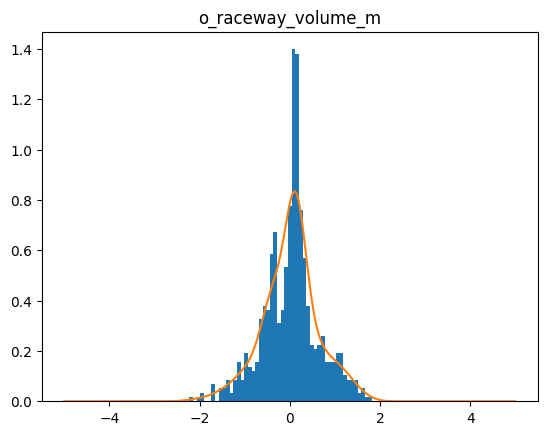

torch.Size([1000])
1  loss=  tensor(4.3658, grad_fn=<MeanBackward0>)
2  loss=  tensor(4.2738, grad_fn=<MeanBackward0>)
3  loss=  tensor(4.3450, grad_fn=<MeanBackward0>)
4  loss=  tensor(4.2795, grad_fn=<MeanBackward0>)
5  loss=  tensor(4.3396, grad_fn=<MeanBackward0>)
6  loss=  tensor(4.1371, grad_fn=<MeanBackward0>)
7  loss=  tensor(4.3480, grad_fn=<MeanBackward0>)
8  loss=  tensor(4.2485, grad_fn=<MeanBackward0>)
9  loss=  tensor(4.2261, grad_fn=<MeanBackward0>)
10  loss=  tensor(4.2493, grad_fn=<MeanBackward0>)
11  loss=  tensor(4.1982, grad_fn=<MeanBackward0>)
12  loss=  tensor(4.3540, grad_fn=<MeanBackward0>)
13  loss=  tensor(4.2936, grad_fn=<MeanBackward0>)
14  loss=  tensor(4.2215, grad_fn=<MeanBackward0>)
15  loss=  tensor(4.2269, grad_fn=<MeanBackward0>)
16  loss=  tensor(4.2651, grad_fn=<MeanBackward0>)
17  loss=  tensor(4.1439, grad_fn=<MeanBackward0>)
18  loss=  tensor(4.1043, grad_fn=<MeanBackward0>)
19  loss=  tensor(4.0908, grad_fn=<MeanBackward0>)
20  loss=  tensor(4.0

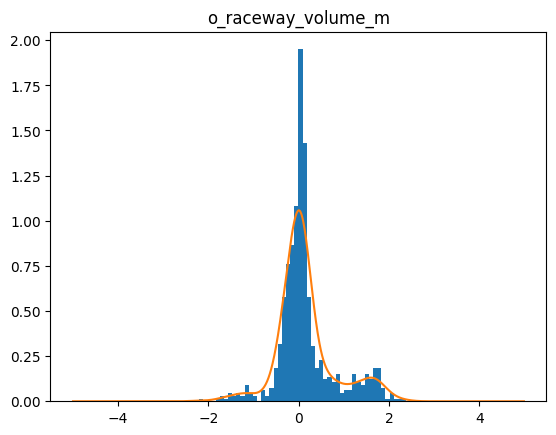

torch.Size([1000])
51  loss=  tensor(3.7488, grad_fn=<MeanBackward0>)
52  loss=  tensor(3.6945, grad_fn=<MeanBackward0>)
53  loss=  tensor(3.6263, grad_fn=<MeanBackward0>)
54  loss=  tensor(3.6275, grad_fn=<MeanBackward0>)
55  loss=  tensor(3.6700, grad_fn=<MeanBackward0>)
56  loss=  tensor(3.6102, grad_fn=<MeanBackward0>)
57  loss=  tensor(3.7367, grad_fn=<MeanBackward0>)
58  loss=  tensor(3.6100, grad_fn=<MeanBackward0>)
59  loss=  tensor(3.4766, grad_fn=<MeanBackward0>)
60  loss=  tensor(3.4851, grad_fn=<MeanBackward0>)
61  loss=  tensor(3.6552, grad_fn=<MeanBackward0>)
62  loss=  tensor(3.4645, grad_fn=<MeanBackward0>)
63  loss=  tensor(3.4235, grad_fn=<MeanBackward0>)
64  loss=  tensor(3.5239, grad_fn=<MeanBackward0>)
65  loss=  tensor(3.5089, grad_fn=<MeanBackward0>)
66  loss=  tensor(3.4625, grad_fn=<MeanBackward0>)
67  loss=  tensor(3.5218, grad_fn=<MeanBackward0>)
68  loss=  tensor(3.4905, grad_fn=<MeanBackward0>)
69  loss=  tensor(3.5254, grad_fn=<MeanBackward0>)
70  loss=  t

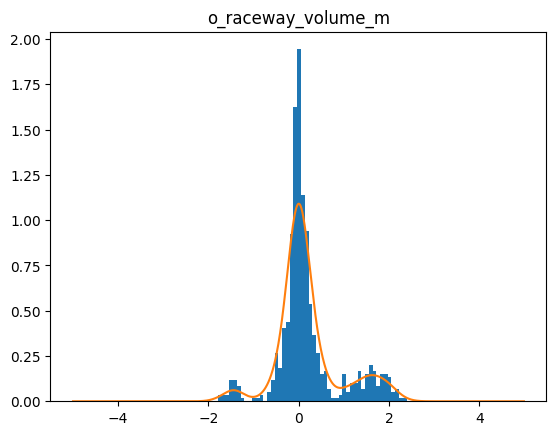

torch.Size([1000])
101  loss=  tensor(3.3360, grad_fn=<MeanBackward0>)
102  loss=  tensor(3.4529, grad_fn=<MeanBackward0>)
103  loss=  tensor(3.3231, grad_fn=<MeanBackward0>)
104  loss=  tensor(3.3986, grad_fn=<MeanBackward0>)
105  loss=  tensor(3.3109, grad_fn=<MeanBackward0>)
106  loss=  tensor(3.2572, grad_fn=<MeanBackward0>)
107  loss=  tensor(3.2724, grad_fn=<MeanBackward0>)
108  loss=  tensor(3.2956, grad_fn=<MeanBackward0>)
109  loss=  tensor(3.3328, grad_fn=<MeanBackward0>)
110  loss=  tensor(3.4049, grad_fn=<MeanBackward0>)
111  loss=  tensor(3.3135, grad_fn=<MeanBackward0>)
112  loss=  tensor(3.2148, grad_fn=<MeanBackward0>)
113  loss=  tensor(3.4265, grad_fn=<MeanBackward0>)
114  loss=  tensor(3.3044, grad_fn=<MeanBackward0>)
115  loss=  tensor(3.2305, grad_fn=<MeanBackward0>)
116  loss=  tensor(3.4015, grad_fn=<MeanBackward0>)
117  loss=  tensor(3.3219, grad_fn=<MeanBackward0>)
118  loss=  tensor(3.3188, grad_fn=<MeanBackward0>)
119  loss=  tensor(3.3420, grad_fn=<MeanBackw

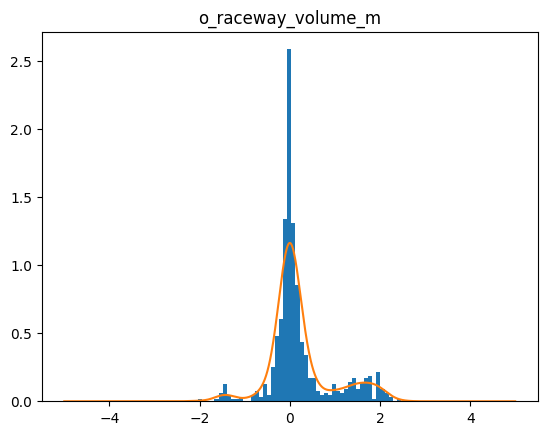

torch.Size([1000])
151  loss=  tensor(3.2817, grad_fn=<MeanBackward0>)
152  loss=  tensor(3.2810, grad_fn=<MeanBackward0>)
153  loss=  tensor(3.3454, grad_fn=<MeanBackward0>)
154  loss=  tensor(3.2161, grad_fn=<MeanBackward0>)
155  loss=  tensor(3.2787, grad_fn=<MeanBackward0>)
156  loss=  tensor(3.2059, grad_fn=<MeanBackward0>)
157  loss=  tensor(3.3748, grad_fn=<MeanBackward0>)
158  loss=  tensor(3.2962, grad_fn=<MeanBackward0>)
159  loss=  tensor(3.2360, grad_fn=<MeanBackward0>)
160  loss=  tensor(3.2991, grad_fn=<MeanBackward0>)
161  loss=  tensor(3.3003, grad_fn=<MeanBackward0>)
162  loss=  tensor(3.3181, grad_fn=<MeanBackward0>)
163  loss=  tensor(3.2669, grad_fn=<MeanBackward0>)
164  loss=  tensor(3.2459, grad_fn=<MeanBackward0>)
165  loss=  tensor(3.1877, grad_fn=<MeanBackward0>)
166  loss=  tensor(3.2347, grad_fn=<MeanBackward0>)
167  loss=  tensor(3.2897, grad_fn=<MeanBackward0>)
168  loss=  tensor(3.2923, grad_fn=<MeanBackward0>)
169  loss=  tensor(3.2253, grad_fn=<MeanBackw

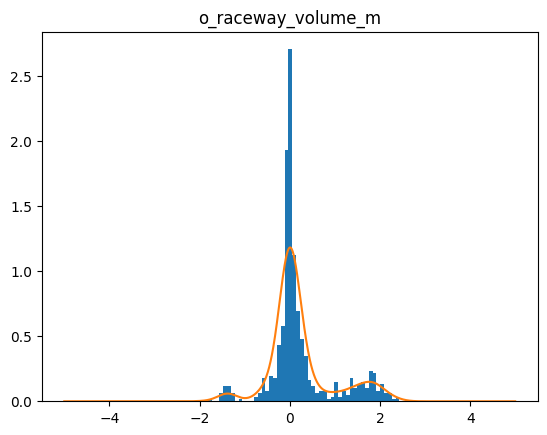

torch.Size([1000])
201  loss=  tensor(3.2172, grad_fn=<MeanBackward0>)
202  loss=  tensor(3.2732, grad_fn=<MeanBackward0>)
203  loss=  tensor(3.3120, grad_fn=<MeanBackward0>)
204  loss=  tensor(3.1485, grad_fn=<MeanBackward0>)
205  loss=  tensor(3.2971, grad_fn=<MeanBackward0>)
206  loss=  tensor(3.1732, grad_fn=<MeanBackward0>)
207  loss=  tensor(3.3344, grad_fn=<MeanBackward0>)
208  loss=  tensor(3.2261, grad_fn=<MeanBackward0>)
209  loss=  tensor(3.3223, grad_fn=<MeanBackward0>)
210  loss=  tensor(3.2553, grad_fn=<MeanBackward0>)
211  loss=  tensor(3.2839, grad_fn=<MeanBackward0>)
212  loss=  tensor(3.1187, grad_fn=<MeanBackward0>)
213  loss=  tensor(3.2528, grad_fn=<MeanBackward0>)
214  loss=  tensor(3.1165, grad_fn=<MeanBackward0>)
215  loss=  tensor(3.3362, grad_fn=<MeanBackward0>)
216  loss=  tensor(3.1704, grad_fn=<MeanBackward0>)
217  loss=  tensor(3.2459, grad_fn=<MeanBackward0>)
218  loss=  tensor(3.2064, grad_fn=<MeanBackward0>)
219  loss=  tensor(3.1848, grad_fn=<MeanBackw

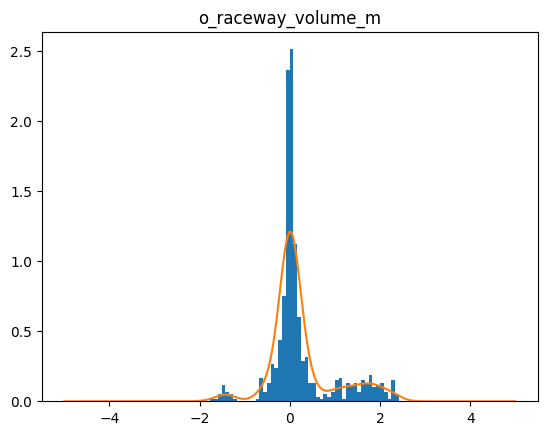

torch.Size([1000])
251  loss=  tensor(3.1871, grad_fn=<MeanBackward0>)
252  loss=  tensor(3.1621, grad_fn=<MeanBackward0>)
253  loss=  tensor(3.2239, grad_fn=<MeanBackward0>)
254  loss=  tensor(3.2819, grad_fn=<MeanBackward0>)
255  loss=  tensor(3.2453, grad_fn=<MeanBackward0>)
256  loss=  tensor(3.2159, grad_fn=<MeanBackward0>)
257  loss=  tensor(3.1082, grad_fn=<MeanBackward0>)
258  loss=  tensor(3.1720, grad_fn=<MeanBackward0>)
259  loss=  tensor(3.2598, grad_fn=<MeanBackward0>)
260  loss=  tensor(3.2119, grad_fn=<MeanBackward0>)
261  loss=  tensor(3.1600, grad_fn=<MeanBackward0>)
262  loss=  tensor(3.2330, grad_fn=<MeanBackward0>)
263  loss=  tensor(3.1884, grad_fn=<MeanBackward0>)
264  loss=  tensor(3.1591, grad_fn=<MeanBackward0>)
265  loss=  tensor(3.1696, grad_fn=<MeanBackward0>)
266  loss=  tensor(3.2065, grad_fn=<MeanBackward0>)
267  loss=  tensor(3.1345, grad_fn=<MeanBackward0>)
268  loss=  tensor(3.1792, grad_fn=<MeanBackward0>)
269  loss=  tensor(3.1040, grad_fn=<MeanBackw

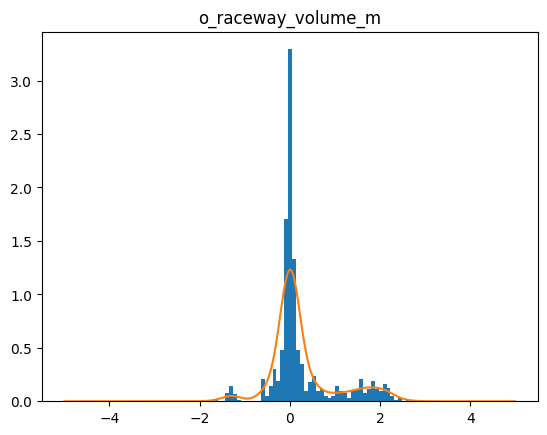

torch.Size([1000])
301  loss=  tensor(3.1672, grad_fn=<MeanBackward0>)
302  loss=  tensor(3.1021, grad_fn=<MeanBackward0>)
303  loss=  tensor(3.1363, grad_fn=<MeanBackward0>)
304  loss=  tensor(3.1433, grad_fn=<MeanBackward0>)
305  loss=  tensor(3.2227, grad_fn=<MeanBackward0>)
306  loss=  tensor(3.1043, grad_fn=<MeanBackward0>)
307  loss=  tensor(3.1418, grad_fn=<MeanBackward0>)
308  loss=  tensor(3.1511, grad_fn=<MeanBackward0>)
309  loss=  tensor(3.1481, grad_fn=<MeanBackward0>)
310  loss=  tensor(3.1569, grad_fn=<MeanBackward0>)
311  loss=  tensor(3.0610, grad_fn=<MeanBackward0>)
312  loss=  tensor(3.2779, grad_fn=<MeanBackward0>)
313  loss=  tensor(3.2981, grad_fn=<MeanBackward0>)
314  loss=  tensor(3.1035, grad_fn=<MeanBackward0>)
315  loss=  tensor(3.1017, grad_fn=<MeanBackward0>)
316  loss=  tensor(3.1059, grad_fn=<MeanBackward0>)
317  loss=  tensor(3.1911, grad_fn=<MeanBackward0>)
318  loss=  tensor(3.0715, grad_fn=<MeanBackward0>)
319  loss=  tensor(3.1380, grad_fn=<MeanBackw

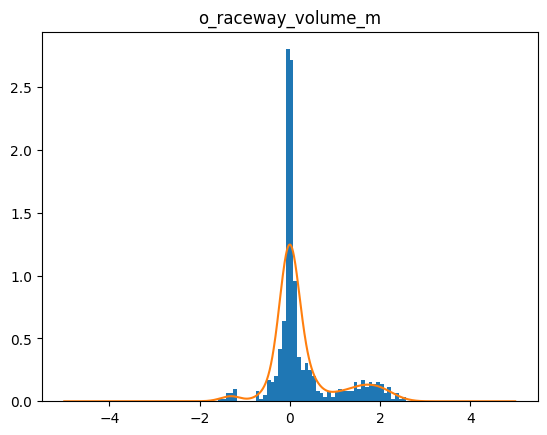

torch.Size([1000])
351  loss=  tensor(3.0963, grad_fn=<MeanBackward0>)
352  loss=  tensor(3.1659, grad_fn=<MeanBackward0>)
353  loss=  tensor(3.1623, grad_fn=<MeanBackward0>)
354  loss=  tensor(3.0772, grad_fn=<MeanBackward0>)
355  loss=  tensor(3.1351, grad_fn=<MeanBackward0>)
356  loss=  tensor(3.1070, grad_fn=<MeanBackward0>)
357  loss=  tensor(3.1174, grad_fn=<MeanBackward0>)
358  loss=  tensor(3.0888, grad_fn=<MeanBackward0>)
359  loss=  tensor(3.1066, grad_fn=<MeanBackward0>)
360  loss=  tensor(3.0828, grad_fn=<MeanBackward0>)
361  loss=  tensor(3.0431, grad_fn=<MeanBackward0>)
362  loss=  tensor(3.1515, grad_fn=<MeanBackward0>)
363  loss=  tensor(3.1161, grad_fn=<MeanBackward0>)
364  loss=  tensor(3.0671, grad_fn=<MeanBackward0>)
365  loss=  tensor(3.1083, grad_fn=<MeanBackward0>)
366  loss=  tensor(3.0547, grad_fn=<MeanBackward0>)
367  loss=  tensor(3.0854, grad_fn=<MeanBackward0>)
368  loss=  tensor(3.1599, grad_fn=<MeanBackward0>)
369  loss=  tensor(2.9747, grad_fn=<MeanBackw

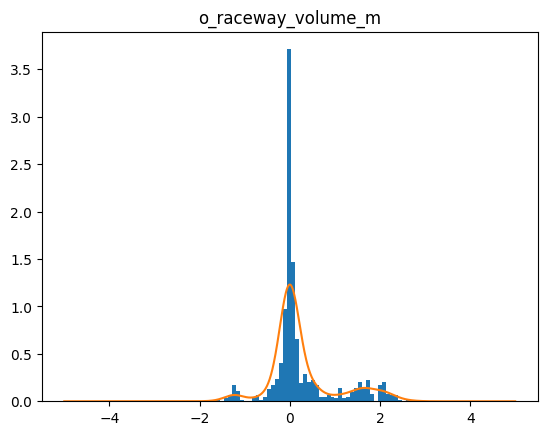

torch.Size([1000])
401  loss=  tensor(3.0825, grad_fn=<MeanBackward0>)
402  loss=  tensor(3.0428, grad_fn=<MeanBackward0>)
403  loss=  tensor(3.0368, grad_fn=<MeanBackward0>)
404  loss=  tensor(3.1052, grad_fn=<MeanBackward0>)
405  loss=  tensor(3.0886, grad_fn=<MeanBackward0>)
406  loss=  tensor(3.0836, grad_fn=<MeanBackward0>)
407  loss=  tensor(3.0489, grad_fn=<MeanBackward0>)
408  loss=  tensor(3.0441, grad_fn=<MeanBackward0>)
409  loss=  tensor(3.0196, grad_fn=<MeanBackward0>)
410  loss=  tensor(3.0752, grad_fn=<MeanBackward0>)
411  loss=  tensor(3.0304, grad_fn=<MeanBackward0>)
412  loss=  tensor(3.0343, grad_fn=<MeanBackward0>)
413  loss=  tensor(3.0637, grad_fn=<MeanBackward0>)
414  loss=  tensor(3.0718, grad_fn=<MeanBackward0>)
415  loss=  tensor(3.0946, grad_fn=<MeanBackward0>)
416  loss=  tensor(3.0753, grad_fn=<MeanBackward0>)
417  loss=  tensor(3.0978, grad_fn=<MeanBackward0>)
418  loss=  tensor(3.0218, grad_fn=<MeanBackward0>)
419  loss=  tensor(3.0915, grad_fn=<MeanBackw

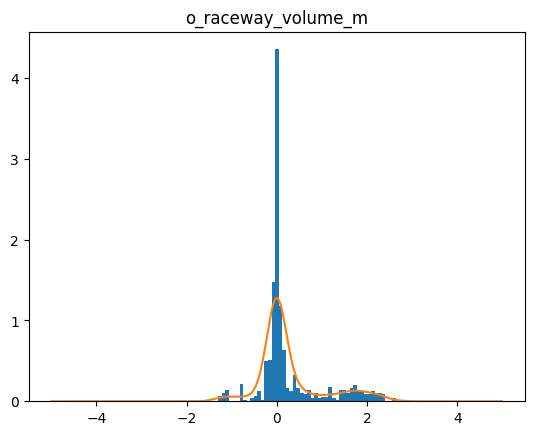

torch.Size([1000])
451  loss=  tensor(3.0705, grad_fn=<MeanBackward0>)
452  loss=  tensor(2.9701, grad_fn=<MeanBackward0>)
453  loss=  tensor(3.1501, grad_fn=<MeanBackward0>)
454  loss=  tensor(3.0246, grad_fn=<MeanBackward0>)
455  loss=  tensor(3.0103, grad_fn=<MeanBackward0>)
456  loss=  tensor(3.1093, grad_fn=<MeanBackward0>)
457  loss=  tensor(2.9967, grad_fn=<MeanBackward0>)
458  loss=  tensor(3.0694, grad_fn=<MeanBackward0>)
459  loss=  tensor(2.9897, grad_fn=<MeanBackward0>)
460  loss=  tensor(2.9792, grad_fn=<MeanBackward0>)
461  loss=  tensor(3.0013, grad_fn=<MeanBackward0>)
462  loss=  tensor(3.0937, grad_fn=<MeanBackward0>)
463  loss=  tensor(3.0982, grad_fn=<MeanBackward0>)
464  loss=  tensor(3.0030, grad_fn=<MeanBackward0>)
465  loss=  tensor(3.0446, grad_fn=<MeanBackward0>)
466  loss=  tensor(2.9763, grad_fn=<MeanBackward0>)
467  loss=  tensor(2.9929, grad_fn=<MeanBackward0>)
468  loss=  tensor(2.9174, grad_fn=<MeanBackward0>)
469  loss=  tensor(2.9538, grad_fn=<MeanBackw

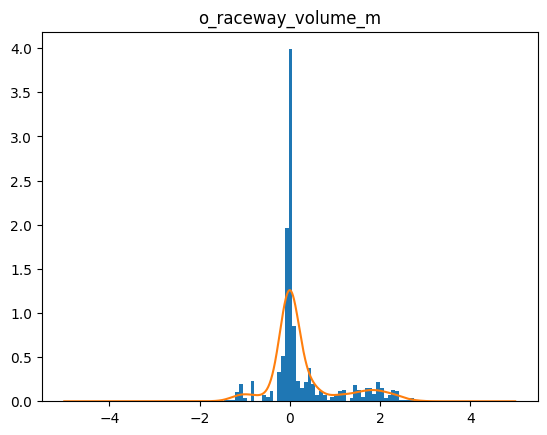

torch.Size([1000])
501  loss=  tensor(3.0686, grad_fn=<MeanBackward0>)
502  loss=  tensor(3.0029, grad_fn=<MeanBackward0>)
503  loss=  tensor(2.9533, grad_fn=<MeanBackward0>)
504  loss=  tensor(2.9387, grad_fn=<MeanBackward0>)
505  loss=  tensor(2.9199, grad_fn=<MeanBackward0>)
506  loss=  tensor(3.0090, grad_fn=<MeanBackward0>)
507  loss=  tensor(2.9875, grad_fn=<MeanBackward0>)
508  loss=  tensor(2.9784, grad_fn=<MeanBackward0>)
509  loss=  tensor(3.0048, grad_fn=<MeanBackward0>)
510  loss=  tensor(3.0033, grad_fn=<MeanBackward0>)
511  loss=  tensor(2.9737, grad_fn=<MeanBackward0>)
512  loss=  tensor(2.9944, grad_fn=<MeanBackward0>)
513  loss=  tensor(2.9646, grad_fn=<MeanBackward0>)
514  loss=  tensor(2.9730, grad_fn=<MeanBackward0>)
515  loss=  tensor(2.9923, grad_fn=<MeanBackward0>)
516  loss=  tensor(2.9123, grad_fn=<MeanBackward0>)
517  loss=  tensor(2.9865, grad_fn=<MeanBackward0>)
518  loss=  tensor(3.0552, grad_fn=<MeanBackward0>)
519  loss=  tensor(3.0310, grad_fn=<MeanBackw

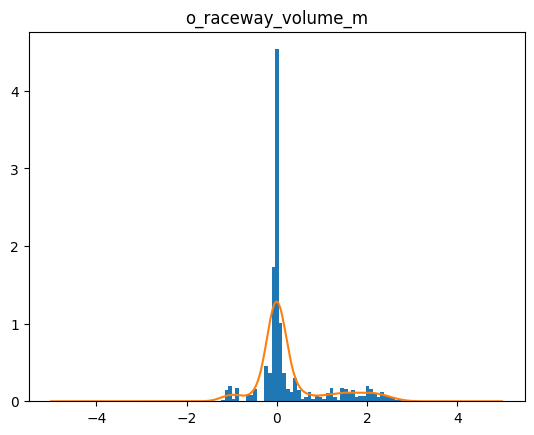

torch.Size([1000])
551  loss=  tensor(2.9394, grad_fn=<MeanBackward0>)
552  loss=  tensor(3.0057, grad_fn=<MeanBackward0>)
553  loss=  tensor(2.9981, grad_fn=<MeanBackward0>)
554  loss=  tensor(2.9315, grad_fn=<MeanBackward0>)
555  loss=  tensor(2.9634, grad_fn=<MeanBackward0>)
556  loss=  tensor(2.9916, grad_fn=<MeanBackward0>)
557  loss=  tensor(2.9989, grad_fn=<MeanBackward0>)
558  loss=  tensor(3.0344, grad_fn=<MeanBackward0>)
559  loss=  tensor(2.9885, grad_fn=<MeanBackward0>)
560  loss=  tensor(2.9469, grad_fn=<MeanBackward0>)
561  loss=  tensor(2.9956, grad_fn=<MeanBackward0>)
562  loss=  tensor(2.9896, grad_fn=<MeanBackward0>)
563  loss=  tensor(2.8618, grad_fn=<MeanBackward0>)
564  loss=  tensor(2.9652, grad_fn=<MeanBackward0>)
565  loss=  tensor(2.9611, grad_fn=<MeanBackward0>)
566  loss=  tensor(2.9562, grad_fn=<MeanBackward0>)
567  loss=  tensor(3.0890, grad_fn=<MeanBackward0>)
568  loss=  tensor(2.9334, grad_fn=<MeanBackward0>)
569  loss=  tensor(2.9313, grad_fn=<MeanBackw

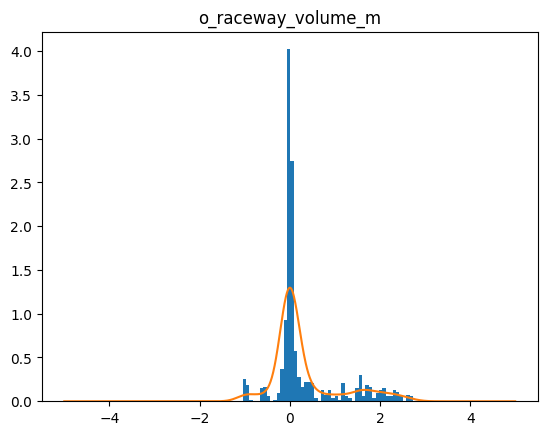

torch.Size([1000])
601  loss=  tensor(2.9426, grad_fn=<MeanBackward0>)
602  loss=  tensor(2.9904, grad_fn=<MeanBackward0>)
603  loss=  tensor(2.9852, grad_fn=<MeanBackward0>)
604  loss=  tensor(2.8900, grad_fn=<MeanBackward0>)
605  loss=  tensor(2.9726, grad_fn=<MeanBackward0>)
606  loss=  tensor(2.9246, grad_fn=<MeanBackward0>)
607  loss=  tensor(3.0559, grad_fn=<MeanBackward0>)
608  loss=  tensor(2.9300, grad_fn=<MeanBackward0>)
609  loss=  tensor(2.9371, grad_fn=<MeanBackward0>)
610  loss=  tensor(2.9737, grad_fn=<MeanBackward0>)
611  loss=  tensor(2.8874, grad_fn=<MeanBackward0>)
612  loss=  tensor(2.9388, grad_fn=<MeanBackward0>)
613  loss=  tensor(2.9135, grad_fn=<MeanBackward0>)
614  loss=  tensor(3.0062, grad_fn=<MeanBackward0>)
615  loss=  tensor(2.9301, grad_fn=<MeanBackward0>)
616  loss=  tensor(2.9137, grad_fn=<MeanBackward0>)
617  loss=  tensor(2.9665, grad_fn=<MeanBackward0>)
618  loss=  tensor(2.9720, grad_fn=<MeanBackward0>)
619  loss=  tensor(2.9494, grad_fn=<MeanBackw

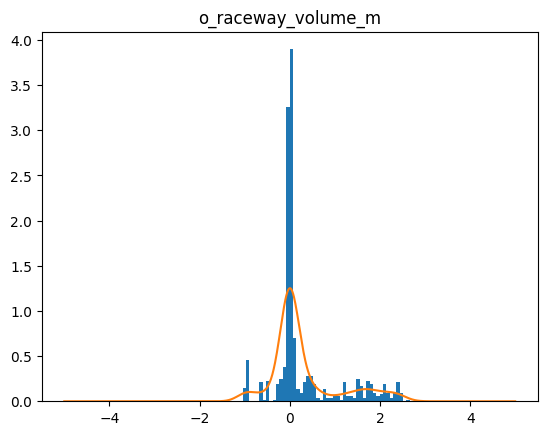

torch.Size([1000])
651  loss=  tensor(3.0229, grad_fn=<MeanBackward0>)
652  loss=  tensor(2.9156, grad_fn=<MeanBackward0>)
653  loss=  tensor(2.9456, grad_fn=<MeanBackward0>)
654  loss=  tensor(2.9428, grad_fn=<MeanBackward0>)
655  loss=  tensor(2.9822, grad_fn=<MeanBackward0>)
656  loss=  tensor(2.9514, grad_fn=<MeanBackward0>)
657  loss=  tensor(2.9901, grad_fn=<MeanBackward0>)
658  loss=  tensor(2.9244, grad_fn=<MeanBackward0>)
659  loss=  tensor(2.8804, grad_fn=<MeanBackward0>)
660  loss=  tensor(2.9323, grad_fn=<MeanBackward0>)
661  loss=  tensor(2.9273, grad_fn=<MeanBackward0>)
662  loss=  tensor(2.9181, grad_fn=<MeanBackward0>)
663  loss=  tensor(2.9377, grad_fn=<MeanBackward0>)
664  loss=  tensor(2.9509, grad_fn=<MeanBackward0>)
665  loss=  tensor(2.8875, grad_fn=<MeanBackward0>)
666  loss=  tensor(2.9759, grad_fn=<MeanBackward0>)
667  loss=  tensor(2.9369, grad_fn=<MeanBackward0>)
668  loss=  tensor(2.9667, grad_fn=<MeanBackward0>)
669  loss=  tensor(2.9407, grad_fn=<MeanBackw

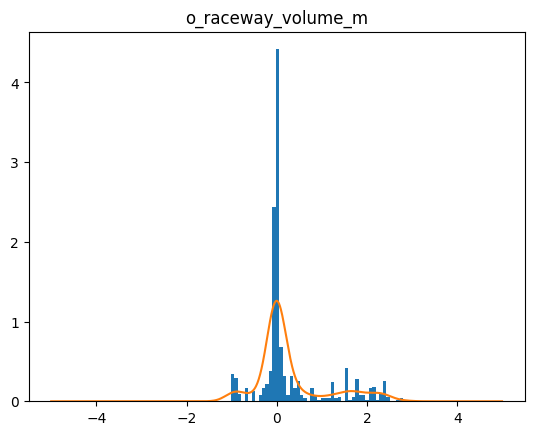

torch.Size([1000])
701  loss=  tensor(2.8644, grad_fn=<MeanBackward0>)
702  loss=  tensor(2.9467, grad_fn=<MeanBackward0>)
703  loss=  tensor(2.9613, grad_fn=<MeanBackward0>)
704  loss=  tensor(2.9057, grad_fn=<MeanBackward0>)
705  loss=  tensor(2.9431, grad_fn=<MeanBackward0>)
706  loss=  tensor(2.8719, grad_fn=<MeanBackward0>)
707  loss=  tensor(2.9531, grad_fn=<MeanBackward0>)
708  loss=  tensor(2.8941, grad_fn=<MeanBackward0>)
709  loss=  tensor(2.9144, grad_fn=<MeanBackward0>)
710  loss=  tensor(2.9168, grad_fn=<MeanBackward0>)
711  loss=  tensor(2.9596, grad_fn=<MeanBackward0>)
712  loss=  tensor(2.8888, grad_fn=<MeanBackward0>)
713  loss=  tensor(2.9655, grad_fn=<MeanBackward0>)
714  loss=  tensor(3.0464, grad_fn=<MeanBackward0>)
715  loss=  tensor(2.9366, grad_fn=<MeanBackward0>)
716  loss=  tensor(2.9550, grad_fn=<MeanBackward0>)
717  loss=  tensor(2.8930, grad_fn=<MeanBackward0>)
718  loss=  tensor(2.9360, grad_fn=<MeanBackward0>)
719  loss=  tensor(2.9626, grad_fn=<MeanBackw

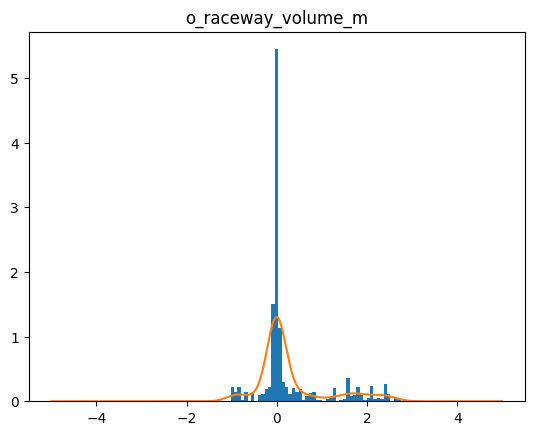

torch.Size([1000])
751  loss=  tensor(2.9236, grad_fn=<MeanBackward0>)
752  loss=  tensor(2.9880, grad_fn=<MeanBackward0>)
753  loss=  tensor(3.0020, grad_fn=<MeanBackward0>)
754  loss=  tensor(2.9263, grad_fn=<MeanBackward0>)
755  loss=  tensor(2.8768, grad_fn=<MeanBackward0>)
756  loss=  tensor(2.9183, grad_fn=<MeanBackward0>)
757  loss=  tensor(2.8944, grad_fn=<MeanBackward0>)
758  loss=  tensor(2.9172, grad_fn=<MeanBackward0>)
759  loss=  tensor(2.8950, grad_fn=<MeanBackward0>)
760  loss=  tensor(2.9479, grad_fn=<MeanBackward0>)
761  loss=  tensor(2.9280, grad_fn=<MeanBackward0>)
762  loss=  tensor(2.9347, grad_fn=<MeanBackward0>)
763  loss=  tensor(2.9065, grad_fn=<MeanBackward0>)
764  loss=  tensor(2.9343, grad_fn=<MeanBackward0>)
765  loss=  tensor(2.8736, grad_fn=<MeanBackward0>)
766  loss=  tensor(2.8973, grad_fn=<MeanBackward0>)
767  loss=  tensor(2.9076, grad_fn=<MeanBackward0>)
768  loss=  tensor(2.8765, grad_fn=<MeanBackward0>)
769  loss=  tensor(2.9081, grad_fn=<MeanBackw

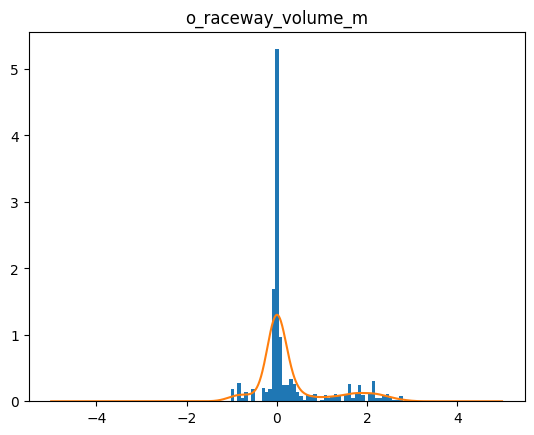

torch.Size([1000])
801  loss=  tensor(2.8811, grad_fn=<MeanBackward0>)
802  loss=  tensor(2.8563, grad_fn=<MeanBackward0>)
803  loss=  tensor(2.9370, grad_fn=<MeanBackward0>)
804  loss=  tensor(2.8898, grad_fn=<MeanBackward0>)
805  loss=  tensor(2.8867, grad_fn=<MeanBackward0>)
806  loss=  tensor(2.8982, grad_fn=<MeanBackward0>)
807  loss=  tensor(2.9133, grad_fn=<MeanBackward0>)
808  loss=  tensor(2.9002, grad_fn=<MeanBackward0>)
809  loss=  tensor(2.9567, grad_fn=<MeanBackward0>)
810  loss=  tensor(2.9786, grad_fn=<MeanBackward0>)
811  loss=  tensor(2.8939, grad_fn=<MeanBackward0>)
812  loss=  tensor(2.9428, grad_fn=<MeanBackward0>)
813  loss=  tensor(2.8726, grad_fn=<MeanBackward0>)
814  loss=  tensor(2.9953, grad_fn=<MeanBackward0>)
815  loss=  tensor(2.9391, grad_fn=<MeanBackward0>)
816  loss=  tensor(2.8539, grad_fn=<MeanBackward0>)
817  loss=  tensor(2.9646, grad_fn=<MeanBackward0>)
818  loss=  tensor(2.8846, grad_fn=<MeanBackward0>)
819  loss=  tensor(2.9424, grad_fn=<MeanBackw

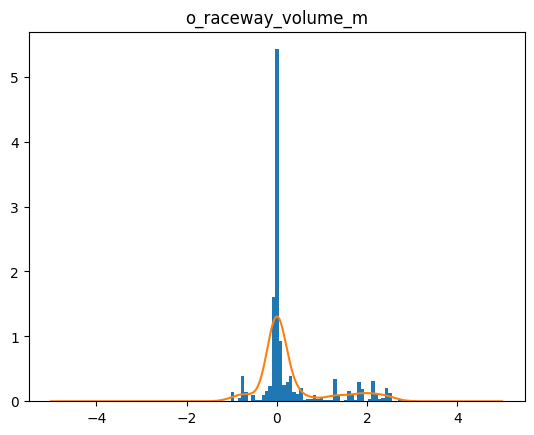

torch.Size([1000])
851  loss=  tensor(2.9417, grad_fn=<MeanBackward0>)
852  loss=  tensor(2.9206, grad_fn=<MeanBackward0>)
853  loss=  tensor(2.8986, grad_fn=<MeanBackward0>)
854  loss=  tensor(2.8876, grad_fn=<MeanBackward0>)
855  loss=  tensor(2.8992, grad_fn=<MeanBackward0>)
856  loss=  tensor(2.8814, grad_fn=<MeanBackward0>)
857  loss=  tensor(2.9616, grad_fn=<MeanBackward0>)
858  loss=  tensor(2.9431, grad_fn=<MeanBackward0>)
859  loss=  tensor(2.8634, grad_fn=<MeanBackward0>)
860  loss=  tensor(2.8788, grad_fn=<MeanBackward0>)
861  loss=  tensor(2.9238, grad_fn=<MeanBackward0>)
862  loss=  tensor(2.8713, grad_fn=<MeanBackward0>)
863  loss=  tensor(2.9331, grad_fn=<MeanBackward0>)
864  loss=  tensor(2.8637, grad_fn=<MeanBackward0>)
865  loss=  tensor(2.9570, grad_fn=<MeanBackward0>)
866  loss=  tensor(2.9083, grad_fn=<MeanBackward0>)
867  loss=  tensor(2.9082, grad_fn=<MeanBackward0>)
868  loss=  tensor(2.9373, grad_fn=<MeanBackward0>)
869  loss=  tensor(2.8528, grad_fn=<MeanBackw

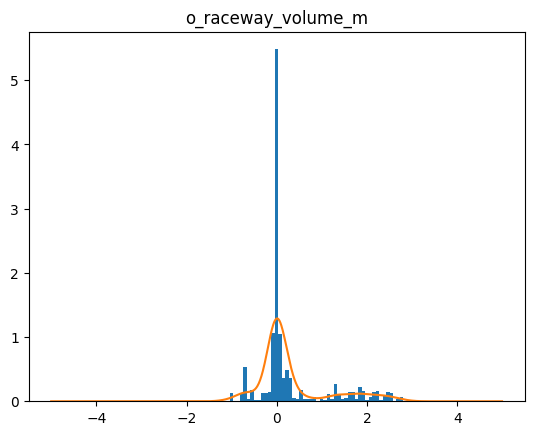

torch.Size([1000])
901  loss=  tensor(2.8931, grad_fn=<MeanBackward0>)
902  loss=  tensor(2.8691, grad_fn=<MeanBackward0>)
903  loss=  tensor(2.8373, grad_fn=<MeanBackward0>)
904  loss=  tensor(2.9154, grad_fn=<MeanBackward0>)
905  loss=  tensor(2.9070, grad_fn=<MeanBackward0>)
906  loss=  tensor(2.9120, grad_fn=<MeanBackward0>)
907  loss=  tensor(2.9002, grad_fn=<MeanBackward0>)
908  loss=  tensor(2.8878, grad_fn=<MeanBackward0>)
909  loss=  tensor(2.8855, grad_fn=<MeanBackward0>)
910  loss=  tensor(2.8979, grad_fn=<MeanBackward0>)
911  loss=  tensor(2.8252, grad_fn=<MeanBackward0>)
912  loss=  tensor(2.8932, grad_fn=<MeanBackward0>)
913  loss=  tensor(2.8771, grad_fn=<MeanBackward0>)
914  loss=  tensor(2.9075, grad_fn=<MeanBackward0>)
915  loss=  tensor(2.8290, grad_fn=<MeanBackward0>)
916  loss=  tensor(2.8698, grad_fn=<MeanBackward0>)
917  loss=  tensor(2.8530, grad_fn=<MeanBackward0>)
918  loss=  tensor(2.9513, grad_fn=<MeanBackward0>)
919  loss=  tensor(2.8385, grad_fn=<MeanBackw

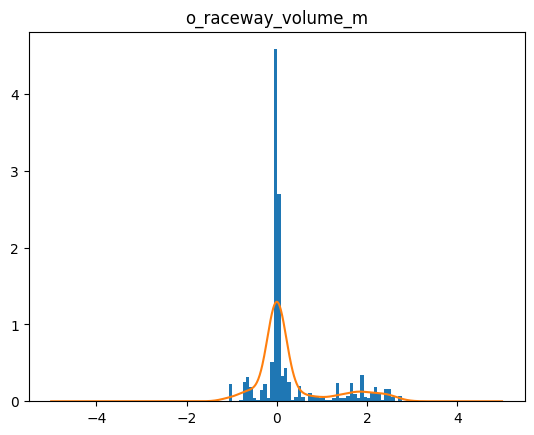

torch.Size([1000])
951  loss=  tensor(2.8752, grad_fn=<MeanBackward0>)
952  loss=  tensor(3.0147, grad_fn=<MeanBackward0>)
953  loss=  tensor(2.8487, grad_fn=<MeanBackward0>)
954  loss=  tensor(2.8743, grad_fn=<MeanBackward0>)
955  loss=  tensor(2.8197, grad_fn=<MeanBackward0>)
956  loss=  tensor(2.8979, grad_fn=<MeanBackward0>)
957  loss=  tensor(2.8881, grad_fn=<MeanBackward0>)
958  loss=  tensor(2.8917, grad_fn=<MeanBackward0>)
959  loss=  tensor(2.9284, grad_fn=<MeanBackward0>)
960  loss=  tensor(2.7862, grad_fn=<MeanBackward0>)
961  loss=  tensor(2.8841, grad_fn=<MeanBackward0>)
962  loss=  tensor(2.8330, grad_fn=<MeanBackward0>)
963  loss=  tensor(2.8429, grad_fn=<MeanBackward0>)
964  loss=  tensor(2.9066, grad_fn=<MeanBackward0>)
965  loss=  tensor(2.8964, grad_fn=<MeanBackward0>)
966  loss=  tensor(2.8541, grad_fn=<MeanBackward0>)
967  loss=  tensor(2.8912, grad_fn=<MeanBackward0>)
968  loss=  tensor(2.9020, grad_fn=<MeanBackward0>)
969  loss=  tensor(2.9586, grad_fn=<MeanBackw

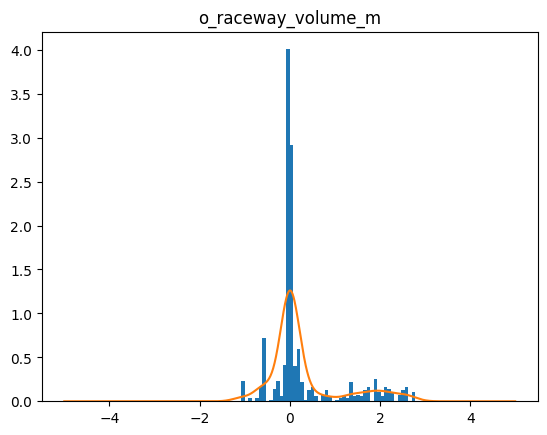

torch.Size([1000])
1001  loss=  tensor(2.8377, grad_fn=<MeanBackward0>)
1002  loss=  tensor(2.8452, grad_fn=<MeanBackward0>)
1003  loss=  tensor(2.8564, grad_fn=<MeanBackward0>)
1004  loss=  tensor(2.9461, grad_fn=<MeanBackward0>)
1005  loss=  tensor(2.8441, grad_fn=<MeanBackward0>)
1006  loss=  tensor(2.9128, grad_fn=<MeanBackward0>)
1007  loss=  tensor(2.8610, grad_fn=<MeanBackward0>)
1008  loss=  tensor(2.8062, grad_fn=<MeanBackward0>)
1009  loss=  tensor(2.8708, grad_fn=<MeanBackward0>)
1010  loss=  tensor(2.8908, grad_fn=<MeanBackward0>)
1011  loss=  tensor(2.8382, grad_fn=<MeanBackward0>)
1012  loss=  tensor(2.8203, grad_fn=<MeanBackward0>)
1013  loss=  tensor(2.8521, grad_fn=<MeanBackward0>)
1014  loss=  tensor(2.8264, grad_fn=<MeanBackward0>)
1015  loss=  tensor(2.9154, grad_fn=<MeanBackward0>)
1016  loss=  tensor(2.9211, grad_fn=<MeanBackward0>)
1017  loss=  tensor(2.8765, grad_fn=<MeanBackward0>)
1018  loss=  tensor(2.8608, grad_fn=<MeanBackward0>)
1019  loss=  tensor(2.7907,

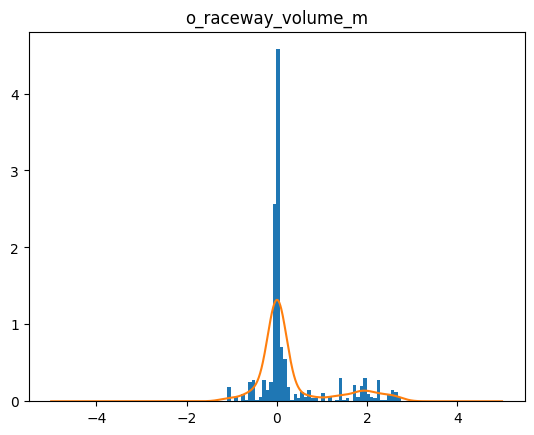

torch.Size([1000])
1051  loss=  tensor(2.7874, grad_fn=<MeanBackward0>)
1052  loss=  tensor(2.8066, grad_fn=<MeanBackward0>)
1053  loss=  tensor(2.9010, grad_fn=<MeanBackward0>)
1054  loss=  tensor(2.9093, grad_fn=<MeanBackward0>)
1055  loss=  tensor(2.7982, grad_fn=<MeanBackward0>)
1056  loss=  tensor(2.8517, grad_fn=<MeanBackward0>)
1057  loss=  tensor(2.9008, grad_fn=<MeanBackward0>)
1058  loss=  tensor(2.8954, grad_fn=<MeanBackward0>)
1059  loss=  tensor(2.8426, grad_fn=<MeanBackward0>)
1060  loss=  tensor(2.8754, grad_fn=<MeanBackward0>)
1061  loss=  tensor(2.8452, grad_fn=<MeanBackward0>)
1062  loss=  tensor(2.9226, grad_fn=<MeanBackward0>)
1063  loss=  tensor(2.8391, grad_fn=<MeanBackward0>)
1064  loss=  tensor(2.8101, grad_fn=<MeanBackward0>)
1065  loss=  tensor(2.8585, grad_fn=<MeanBackward0>)
1066  loss=  tensor(2.8285, grad_fn=<MeanBackward0>)
1067  loss=  tensor(2.7926, grad_fn=<MeanBackward0>)
1068  loss=  tensor(2.8659, grad_fn=<MeanBackward0>)
1069  loss=  tensor(2.8558,

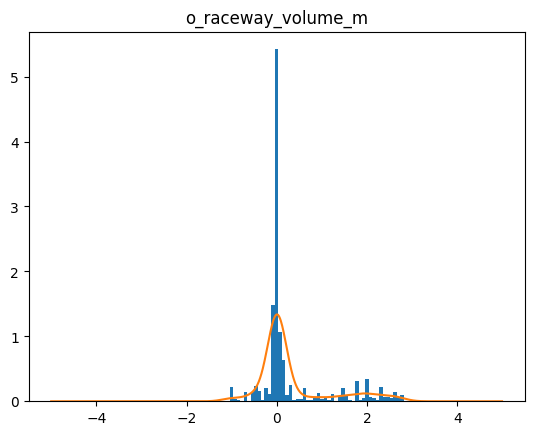

torch.Size([1000])
1101  loss=  tensor(2.8710, grad_fn=<MeanBackward0>)
1102  loss=  tensor(2.8599, grad_fn=<MeanBackward0>)
1103  loss=  tensor(2.7746, grad_fn=<MeanBackward0>)
1104  loss=  tensor(2.8134, grad_fn=<MeanBackward0>)
1105  loss=  tensor(2.7954, grad_fn=<MeanBackward0>)
1106  loss=  tensor(2.7821, grad_fn=<MeanBackward0>)
1107  loss=  tensor(2.8633, grad_fn=<MeanBackward0>)
1108  loss=  tensor(2.8427, grad_fn=<MeanBackward0>)
1109  loss=  tensor(2.8385, grad_fn=<MeanBackward0>)
1110  loss=  tensor(2.8590, grad_fn=<MeanBackward0>)
1111  loss=  tensor(2.7954, grad_fn=<MeanBackward0>)
1112  loss=  tensor(2.8426, grad_fn=<MeanBackward0>)
1113  loss=  tensor(2.8964, grad_fn=<MeanBackward0>)
1114  loss=  tensor(2.7614, grad_fn=<MeanBackward0>)
1115  loss=  tensor(2.8617, grad_fn=<MeanBackward0>)
1116  loss=  tensor(2.9237, grad_fn=<MeanBackward0>)
1117  loss=  tensor(2.8475, grad_fn=<MeanBackward0>)
1118  loss=  tensor(2.7925, grad_fn=<MeanBackward0>)
1119  loss=  tensor(2.8304,

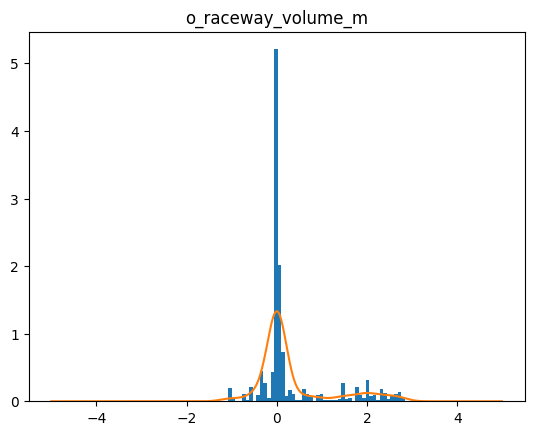

torch.Size([1000])
1151  loss=  tensor(2.7995, grad_fn=<MeanBackward0>)
1152  loss=  tensor(2.7576, grad_fn=<MeanBackward0>)
1153  loss=  tensor(2.7817, grad_fn=<MeanBackward0>)
1154  loss=  tensor(2.8142, grad_fn=<MeanBackward0>)
1155  loss=  tensor(2.7245, grad_fn=<MeanBackward0>)
1156  loss=  tensor(2.7324, grad_fn=<MeanBackward0>)
1157  loss=  tensor(2.7748, grad_fn=<MeanBackward0>)
1158  loss=  tensor(2.7476, grad_fn=<MeanBackward0>)
1159  loss=  tensor(2.7628, grad_fn=<MeanBackward0>)
1160  loss=  tensor(2.8195, grad_fn=<MeanBackward0>)
1161  loss=  tensor(2.7886, grad_fn=<MeanBackward0>)
1162  loss=  tensor(2.7830, grad_fn=<MeanBackward0>)
1163  loss=  tensor(2.7466, grad_fn=<MeanBackward0>)
1164  loss=  tensor(2.7635, grad_fn=<MeanBackward0>)
1165  loss=  tensor(2.7527, grad_fn=<MeanBackward0>)
1166  loss=  tensor(2.7235, grad_fn=<MeanBackward0>)
1167  loss=  tensor(2.7558, grad_fn=<MeanBackward0>)
1168  loss=  tensor(2.7771, grad_fn=<MeanBackward0>)
1169  loss=  tensor(2.7472,

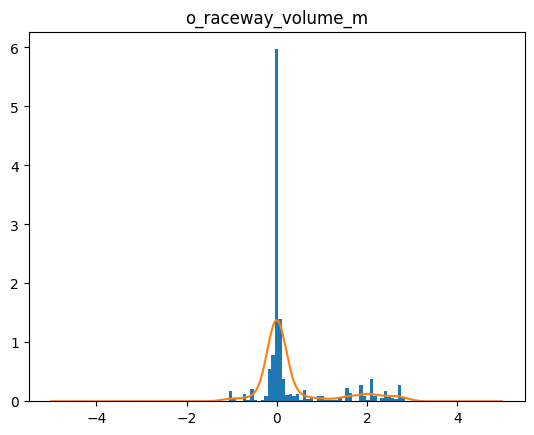

torch.Size([1000])
1201  loss=  tensor(2.7325, grad_fn=<MeanBackward0>)
1202  loss=  tensor(2.6939, grad_fn=<MeanBackward0>)
1203  loss=  tensor(2.6850, grad_fn=<MeanBackward0>)
1204  loss=  tensor(2.7166, grad_fn=<MeanBackward0>)
1205  loss=  tensor(2.7296, grad_fn=<MeanBackward0>)
1206  loss=  tensor(2.7157, grad_fn=<MeanBackward0>)
1207  loss=  tensor(2.6964, grad_fn=<MeanBackward0>)
1208  loss=  tensor(2.6923, grad_fn=<MeanBackward0>)
1209  loss=  tensor(2.6930, grad_fn=<MeanBackward0>)
1210  loss=  tensor(2.6662, grad_fn=<MeanBackward0>)
1211  loss=  tensor(2.6981, grad_fn=<MeanBackward0>)
1212  loss=  tensor(2.6983, grad_fn=<MeanBackward0>)
1213  loss=  tensor(2.6704, grad_fn=<MeanBackward0>)
1214  loss=  tensor(2.6717, grad_fn=<MeanBackward0>)
1215  loss=  tensor(2.7148, grad_fn=<MeanBackward0>)
1216  loss=  tensor(2.7010, grad_fn=<MeanBackward0>)
1217  loss=  tensor(2.6945, grad_fn=<MeanBackward0>)
1218  loss=  tensor(2.6556, grad_fn=<MeanBackward0>)
1219  loss=  tensor(2.6737,

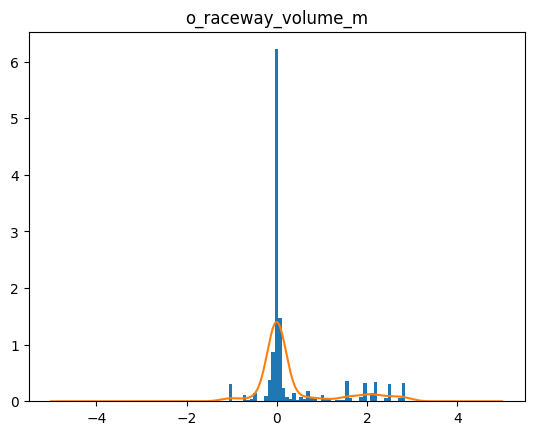

torch.Size([1000])
1251  loss=  tensor(2.6681, grad_fn=<MeanBackward0>)
1252  loss=  tensor(2.6714, grad_fn=<MeanBackward0>)
1253  loss=  tensor(2.6462, grad_fn=<MeanBackward0>)
1254  loss=  tensor(2.6527, grad_fn=<MeanBackward0>)
1255  loss=  tensor(2.6818, grad_fn=<MeanBackward0>)
1256  loss=  tensor(2.6465, grad_fn=<MeanBackward0>)
1257  loss=  tensor(2.6373, grad_fn=<MeanBackward0>)
1258  loss=  tensor(2.6592, grad_fn=<MeanBackward0>)
1259  loss=  tensor(2.6749, grad_fn=<MeanBackward0>)
1260  loss=  tensor(2.6252, grad_fn=<MeanBackward0>)
1261  loss=  tensor(2.6690, grad_fn=<MeanBackward0>)
1262  loss=  tensor(2.6343, grad_fn=<MeanBackward0>)
1263  loss=  tensor(2.6022, grad_fn=<MeanBackward0>)
1264  loss=  tensor(2.6434, grad_fn=<MeanBackward0>)
1265  loss=  tensor(2.6231, grad_fn=<MeanBackward0>)
1266  loss=  tensor(2.6493, grad_fn=<MeanBackward0>)
1267  loss=  tensor(2.6684, grad_fn=<MeanBackward0>)
1268  loss=  tensor(2.6362, grad_fn=<MeanBackward0>)
1269  loss=  tensor(2.6430,

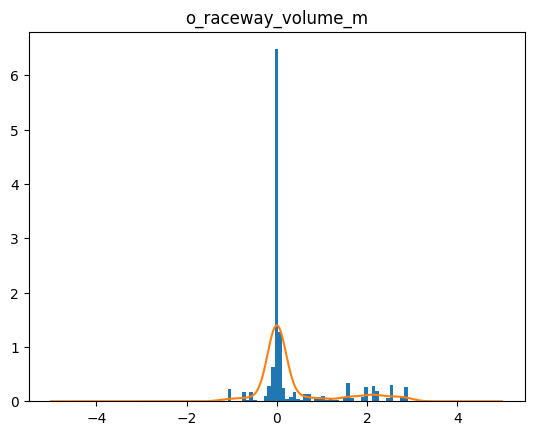

torch.Size([1000])
1301  loss=  tensor(2.6230, grad_fn=<MeanBackward0>)
1302  loss=  tensor(2.6370, grad_fn=<MeanBackward0>)
1303  loss=  tensor(2.6314, grad_fn=<MeanBackward0>)
1304  loss=  tensor(2.6834, grad_fn=<MeanBackward0>)
1305  loss=  tensor(2.6577, grad_fn=<MeanBackward0>)
1306  loss=  tensor(2.6198, grad_fn=<MeanBackward0>)
1307  loss=  tensor(2.6247, grad_fn=<MeanBackward0>)
1308  loss=  tensor(2.6473, grad_fn=<MeanBackward0>)
1309  loss=  tensor(2.6463, grad_fn=<MeanBackward0>)
1310  loss=  tensor(2.6497, grad_fn=<MeanBackward0>)
1311  loss=  tensor(2.6426, grad_fn=<MeanBackward0>)
1312  loss=  tensor(2.6270, grad_fn=<MeanBackward0>)
1313  loss=  tensor(2.6206, grad_fn=<MeanBackward0>)
1314  loss=  tensor(2.6583, grad_fn=<MeanBackward0>)
1315  loss=  tensor(2.6456, grad_fn=<MeanBackward0>)
1316  loss=  tensor(2.6335, grad_fn=<MeanBackward0>)
1317  loss=  tensor(2.6725, grad_fn=<MeanBackward0>)
1318  loss=  tensor(2.6386, grad_fn=<MeanBackward0>)
1319  loss=  tensor(2.6209,

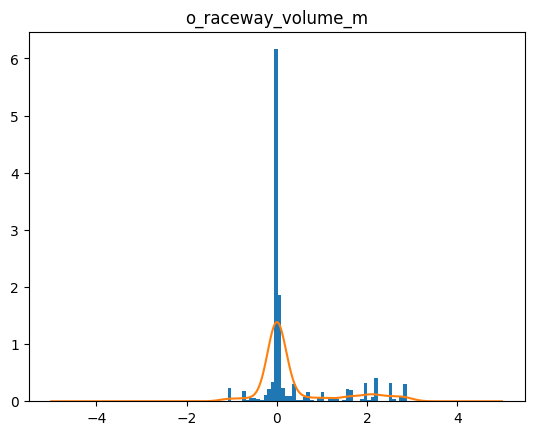

torch.Size([1000])
1351  loss=  tensor(2.6290, grad_fn=<MeanBackward0>)
1352  loss=  tensor(2.6106, grad_fn=<MeanBackward0>)
1353  loss=  tensor(2.6509, grad_fn=<MeanBackward0>)
1354  loss=  tensor(2.6260, grad_fn=<MeanBackward0>)
1355  loss=  tensor(2.6293, grad_fn=<MeanBackward0>)
1356  loss=  tensor(2.6436, grad_fn=<MeanBackward0>)
1357  loss=  tensor(2.6411, grad_fn=<MeanBackward0>)
1358  loss=  tensor(2.6283, grad_fn=<MeanBackward0>)
1359  loss=  tensor(2.6157, grad_fn=<MeanBackward0>)
1360  loss=  tensor(2.6641, grad_fn=<MeanBackward0>)
1361  loss=  tensor(2.6189, grad_fn=<MeanBackward0>)
1362  loss=  tensor(2.6253, grad_fn=<MeanBackward0>)
1363  loss=  tensor(2.6555, grad_fn=<MeanBackward0>)
1364  loss=  tensor(2.6157, grad_fn=<MeanBackward0>)
1365  loss=  tensor(2.6527, grad_fn=<MeanBackward0>)
1366  loss=  tensor(2.6362, grad_fn=<MeanBackward0>)
1367  loss=  tensor(2.6231, grad_fn=<MeanBackward0>)
1368  loss=  tensor(2.6389, grad_fn=<MeanBackward0>)
1369  loss=  tensor(2.6608,

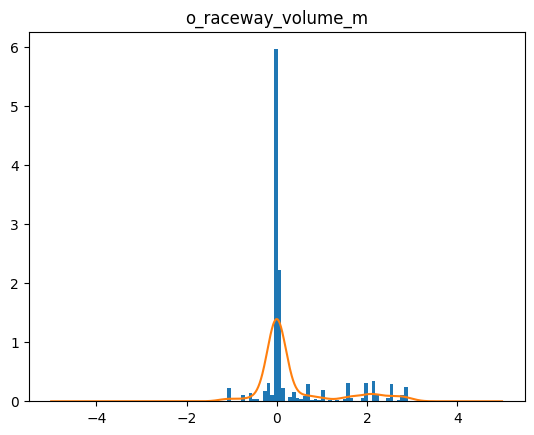

torch.Size([1000])
1401  loss=  tensor(2.6354, grad_fn=<MeanBackward0>)
1402  loss=  tensor(2.6224, grad_fn=<MeanBackward0>)
1403  loss=  tensor(2.6124, grad_fn=<MeanBackward0>)
1404  loss=  tensor(2.6407, grad_fn=<MeanBackward0>)
1405  loss=  tensor(2.6244, grad_fn=<MeanBackward0>)
1406  loss=  tensor(2.6202, grad_fn=<MeanBackward0>)
1407  loss=  tensor(2.6519, grad_fn=<MeanBackward0>)
1408  loss=  tensor(2.6450, grad_fn=<MeanBackward0>)
1409  loss=  tensor(2.6341, grad_fn=<MeanBackward0>)
1410  loss=  tensor(2.6343, grad_fn=<MeanBackward0>)
1411  loss=  tensor(2.6555, grad_fn=<MeanBackward0>)
1412  loss=  tensor(2.6453, grad_fn=<MeanBackward0>)
1413  loss=  tensor(2.6800, grad_fn=<MeanBackward0>)
1414  loss=  tensor(2.6394, grad_fn=<MeanBackward0>)
1415  loss=  tensor(2.6108, grad_fn=<MeanBackward0>)
1416  loss=  tensor(2.6543, grad_fn=<MeanBackward0>)
1417  loss=  tensor(2.6265, grad_fn=<MeanBackward0>)
1418  loss=  tensor(2.6393, grad_fn=<MeanBackward0>)
1419  loss=  tensor(2.6274,

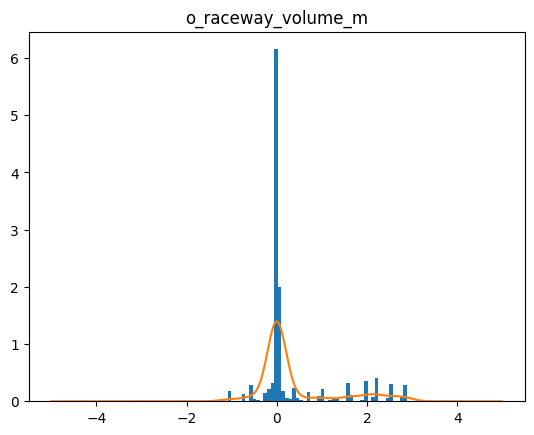

torch.Size([1000])
1451  loss=  tensor(2.6549, grad_fn=<MeanBackward0>)
1452  loss=  tensor(2.6181, grad_fn=<MeanBackward0>)
1453  loss=  tensor(2.6473, grad_fn=<MeanBackward0>)
1454  loss=  tensor(2.6497, grad_fn=<MeanBackward0>)
1455  loss=  tensor(2.6235, grad_fn=<MeanBackward0>)
1456  loss=  tensor(2.6465, grad_fn=<MeanBackward0>)
1457  loss=  tensor(2.6809, grad_fn=<MeanBackward0>)
1458  loss=  tensor(2.6552, grad_fn=<MeanBackward0>)
1459  loss=  tensor(2.6414, grad_fn=<MeanBackward0>)
1460  loss=  tensor(2.6485, grad_fn=<MeanBackward0>)
1461  loss=  tensor(2.6306, grad_fn=<MeanBackward0>)
1462  loss=  tensor(2.6245, grad_fn=<MeanBackward0>)
1463  loss=  tensor(2.6306, grad_fn=<MeanBackward0>)
1464  loss=  tensor(2.6861, grad_fn=<MeanBackward0>)
1465  loss=  tensor(2.6524, grad_fn=<MeanBackward0>)
1466  loss=  tensor(2.6357, grad_fn=<MeanBackward0>)
1467  loss=  tensor(2.6325, grad_fn=<MeanBackward0>)
1468  loss=  tensor(2.6376, grad_fn=<MeanBackward0>)
1469  loss=  tensor(2.6399,

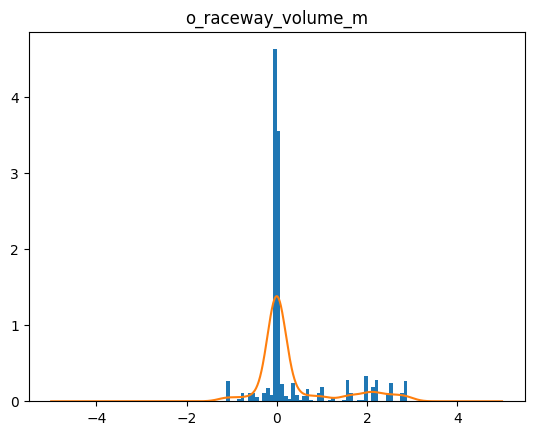

torch.Size([1000])
1501  loss=  tensor(2.6552, grad_fn=<MeanBackward0>)
1502  loss=  tensor(2.6403, grad_fn=<MeanBackward0>)
1503  loss=  tensor(2.5999, grad_fn=<MeanBackward0>)
1504  loss=  tensor(2.6149, grad_fn=<MeanBackward0>)
1505  loss=  tensor(2.6478, grad_fn=<MeanBackward0>)
1506  loss=  tensor(2.6350, grad_fn=<MeanBackward0>)
1507  loss=  tensor(2.6304, grad_fn=<MeanBackward0>)
1508  loss=  tensor(2.6535, grad_fn=<MeanBackward0>)
1509  loss=  tensor(2.6264, grad_fn=<MeanBackward0>)
1510  loss=  tensor(2.6104, grad_fn=<MeanBackward0>)
1511  loss=  tensor(2.6427, grad_fn=<MeanBackward0>)
1512  loss=  tensor(2.6275, grad_fn=<MeanBackward0>)
1513  loss=  tensor(2.6318, grad_fn=<MeanBackward0>)
1514  loss=  tensor(2.6283, grad_fn=<MeanBackward0>)
1515  loss=  tensor(2.6273, grad_fn=<MeanBackward0>)
1516  loss=  tensor(2.6171, grad_fn=<MeanBackward0>)
1517  loss=  tensor(2.6264, grad_fn=<MeanBackward0>)
1518  loss=  tensor(2.6351, grad_fn=<MeanBackward0>)
1519  loss=  tensor(2.6278,

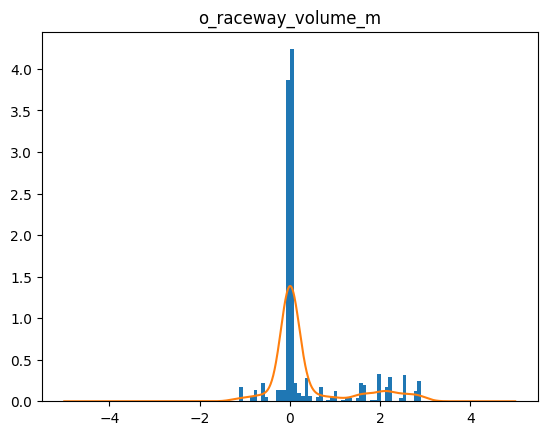

torch.Size([1000])
1551  loss=  tensor(2.6172, grad_fn=<MeanBackward0>)
1552  loss=  tensor(2.6592, grad_fn=<MeanBackward0>)
1553  loss=  tensor(2.6297, grad_fn=<MeanBackward0>)
1554  loss=  tensor(2.6076, grad_fn=<MeanBackward0>)
1555  loss=  tensor(2.6375, grad_fn=<MeanBackward0>)
1556  loss=  tensor(2.6501, grad_fn=<MeanBackward0>)
1557  loss=  tensor(2.6318, grad_fn=<MeanBackward0>)
1558  loss=  tensor(2.5997, grad_fn=<MeanBackward0>)
1559  loss=  tensor(2.6512, grad_fn=<MeanBackward0>)
1560  loss=  tensor(2.6004, grad_fn=<MeanBackward0>)
1561  loss=  tensor(2.6342, grad_fn=<MeanBackward0>)
1562  loss=  tensor(2.6473, grad_fn=<MeanBackward0>)
1563  loss=  tensor(2.6613, grad_fn=<MeanBackward0>)
1564  loss=  tensor(2.6249, grad_fn=<MeanBackward0>)
1565  loss=  tensor(2.6331, grad_fn=<MeanBackward0>)
1566  loss=  tensor(2.6272, grad_fn=<MeanBackward0>)
1567  loss=  tensor(2.6080, grad_fn=<MeanBackward0>)
1568  loss=  tensor(2.6532, grad_fn=<MeanBackward0>)
1569  loss=  tensor(2.6269,

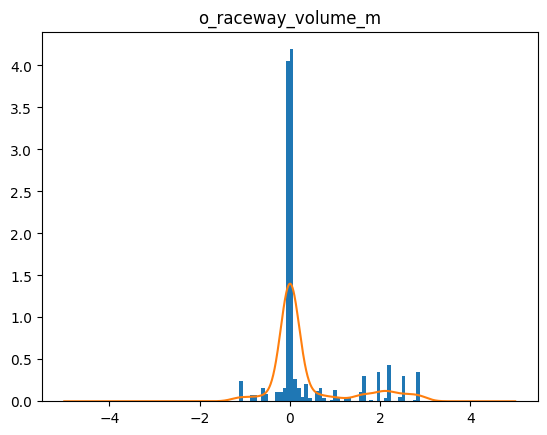

torch.Size([1000])
1601  loss=  tensor(2.6308, grad_fn=<MeanBackward0>)
1602  loss=  tensor(2.6230, grad_fn=<MeanBackward0>)
1603  loss=  tensor(2.6214, grad_fn=<MeanBackward0>)
1604  loss=  tensor(2.6604, grad_fn=<MeanBackward0>)
1605  loss=  tensor(2.6438, grad_fn=<MeanBackward0>)
1606  loss=  tensor(2.6383, grad_fn=<MeanBackward0>)
1607  loss=  tensor(2.6086, grad_fn=<MeanBackward0>)
1608  loss=  tensor(2.6281, grad_fn=<MeanBackward0>)
1609  loss=  tensor(2.6408, grad_fn=<MeanBackward0>)
1610  loss=  tensor(2.6789, grad_fn=<MeanBackward0>)
1611  loss=  tensor(2.6201, grad_fn=<MeanBackward0>)
1612  loss=  tensor(2.6329, grad_fn=<MeanBackward0>)
1613  loss=  tensor(2.6644, grad_fn=<MeanBackward0>)
1614  loss=  tensor(2.6284, grad_fn=<MeanBackward0>)
1615  loss=  tensor(2.6365, grad_fn=<MeanBackward0>)
1616  loss=  tensor(2.6452, grad_fn=<MeanBackward0>)
1617  loss=  tensor(2.6611, grad_fn=<MeanBackward0>)
1618  loss=  tensor(2.6542, grad_fn=<MeanBackward0>)
1619  loss=  tensor(2.6143,

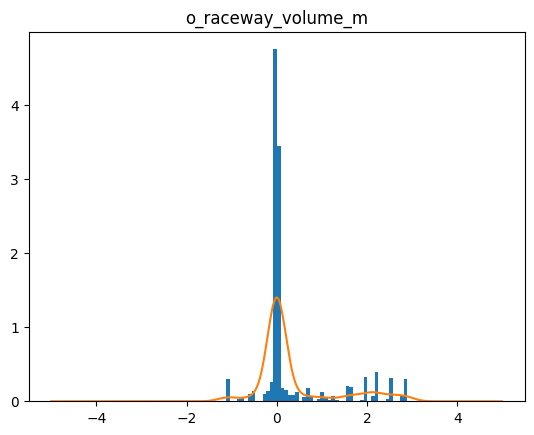

torch.Size([1000])
1651  loss=  tensor(2.6350, grad_fn=<MeanBackward0>)
1652  loss=  tensor(2.6066, grad_fn=<MeanBackward0>)
1653  loss=  tensor(2.6496, grad_fn=<MeanBackward0>)
1654  loss=  tensor(2.6369, grad_fn=<MeanBackward0>)
1655  loss=  tensor(2.5986, grad_fn=<MeanBackward0>)
1656  loss=  tensor(2.6838, grad_fn=<MeanBackward0>)
1657  loss=  tensor(2.6145, grad_fn=<MeanBackward0>)
1658  loss=  tensor(2.6482, grad_fn=<MeanBackward0>)
1659  loss=  tensor(2.6585, grad_fn=<MeanBackward0>)
1660  loss=  tensor(2.5972, grad_fn=<MeanBackward0>)
1661  loss=  tensor(2.6300, grad_fn=<MeanBackward0>)
1662  loss=  tensor(2.6261, grad_fn=<MeanBackward0>)
1663  loss=  tensor(2.6726, grad_fn=<MeanBackward0>)
1664  loss=  tensor(2.6494, grad_fn=<MeanBackward0>)
1665  loss=  tensor(2.6373, grad_fn=<MeanBackward0>)
1666  loss=  tensor(2.6318, grad_fn=<MeanBackward0>)
1667  loss=  tensor(2.5985, grad_fn=<MeanBackward0>)
1668  loss=  tensor(2.6582, grad_fn=<MeanBackward0>)
1669  loss=  tensor(2.6289,

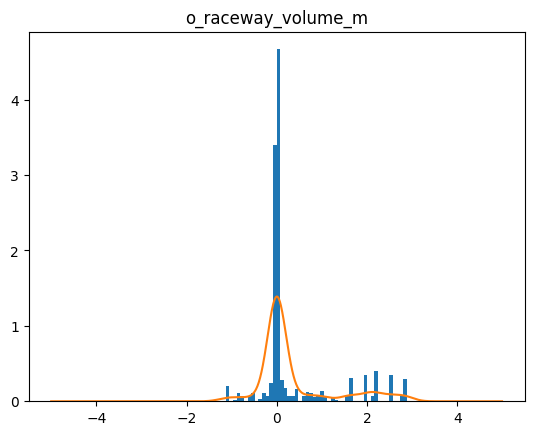

torch.Size([1000])
1701  loss=  tensor(2.6276, grad_fn=<MeanBackward0>)
1702  loss=  tensor(2.6272, grad_fn=<MeanBackward0>)
1703  loss=  tensor(2.6424, grad_fn=<MeanBackward0>)
1704  loss=  tensor(2.6175, grad_fn=<MeanBackward0>)
1705  loss=  tensor(2.6474, grad_fn=<MeanBackward0>)
1706  loss=  tensor(2.6309, grad_fn=<MeanBackward0>)
1707  loss=  tensor(2.5980, grad_fn=<MeanBackward0>)
1708  loss=  tensor(2.5922, grad_fn=<MeanBackward0>)
1709  loss=  tensor(2.6250, grad_fn=<MeanBackward0>)
1710  loss=  tensor(2.6014, grad_fn=<MeanBackward0>)
1711  loss=  tensor(2.6269, grad_fn=<MeanBackward0>)
1712  loss=  tensor(2.6265, grad_fn=<MeanBackward0>)
1713  loss=  tensor(2.6048, grad_fn=<MeanBackward0>)
1714  loss=  tensor(2.6458, grad_fn=<MeanBackward0>)
1715  loss=  tensor(2.5810, grad_fn=<MeanBackward0>)
1716  loss=  tensor(2.6014, grad_fn=<MeanBackward0>)
1717  loss=  tensor(2.6386, grad_fn=<MeanBackward0>)
1718  loss=  tensor(2.6262, grad_fn=<MeanBackward0>)
1719  loss=  tensor(2.6362,

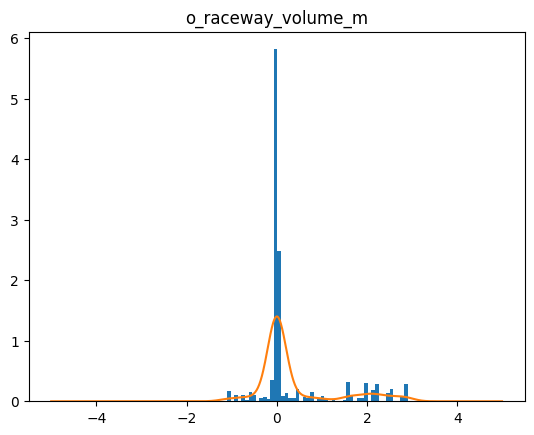

torch.Size([1000])
1751  loss=  tensor(2.6313, grad_fn=<MeanBackward0>)
1752  loss=  tensor(2.6129, grad_fn=<MeanBackward0>)
1753  loss=  tensor(2.6425, grad_fn=<MeanBackward0>)
1754  loss=  tensor(2.6490, grad_fn=<MeanBackward0>)
1755  loss=  tensor(2.6547, grad_fn=<MeanBackward0>)
1756  loss=  tensor(2.6445, grad_fn=<MeanBackward0>)
1757  loss=  tensor(2.6136, grad_fn=<MeanBackward0>)
1758  loss=  tensor(2.6268, grad_fn=<MeanBackward0>)
1759  loss=  tensor(2.6377, grad_fn=<MeanBackward0>)
1760  loss=  tensor(2.6532, grad_fn=<MeanBackward0>)
1761  loss=  tensor(2.6270, grad_fn=<MeanBackward0>)
1762  loss=  tensor(2.6173, grad_fn=<MeanBackward0>)
1763  loss=  tensor(2.6398, grad_fn=<MeanBackward0>)
1764  loss=  tensor(2.6169, grad_fn=<MeanBackward0>)
1765  loss=  tensor(2.6050, grad_fn=<MeanBackward0>)
1766  loss=  tensor(2.6263, grad_fn=<MeanBackward0>)
1767  loss=  tensor(2.6134, grad_fn=<MeanBackward0>)
1768  loss=  tensor(2.6463, grad_fn=<MeanBackward0>)
1769  loss=  tensor(2.6343,

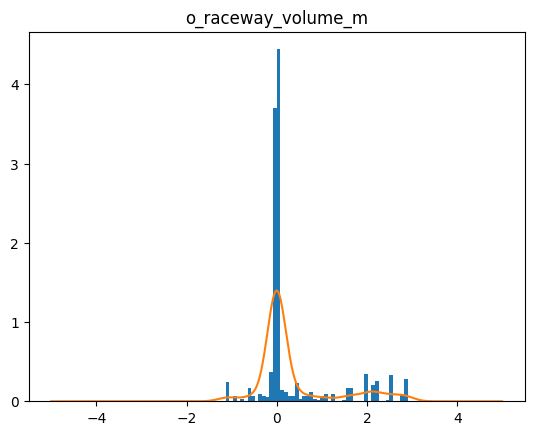

torch.Size([1000])
1801  loss=  tensor(2.6312, grad_fn=<MeanBackward0>)
1802  loss=  tensor(2.6083, grad_fn=<MeanBackward0>)
1803  loss=  tensor(2.6583, grad_fn=<MeanBackward0>)
1804  loss=  tensor(2.6466, grad_fn=<MeanBackward0>)
1805  loss=  tensor(2.6252, grad_fn=<MeanBackward0>)
1806  loss=  tensor(2.6300, grad_fn=<MeanBackward0>)
1807  loss=  tensor(2.6065, grad_fn=<MeanBackward0>)
1808  loss=  tensor(2.6214, grad_fn=<MeanBackward0>)
1809  loss=  tensor(2.6193, grad_fn=<MeanBackward0>)
1810  loss=  tensor(2.6490, grad_fn=<MeanBackward0>)
1811  loss=  tensor(2.5975, grad_fn=<MeanBackward0>)
1812  loss=  tensor(2.6041, grad_fn=<MeanBackward0>)
1813  loss=  tensor(2.6401, grad_fn=<MeanBackward0>)
1814  loss=  tensor(2.6400, grad_fn=<MeanBackward0>)
1815  loss=  tensor(2.6754, grad_fn=<MeanBackward0>)
1816  loss=  tensor(2.6061, grad_fn=<MeanBackward0>)
1817  loss=  tensor(2.6053, grad_fn=<MeanBackward0>)
1818  loss=  tensor(2.6069, grad_fn=<MeanBackward0>)
1819  loss=  tensor(2.6183,

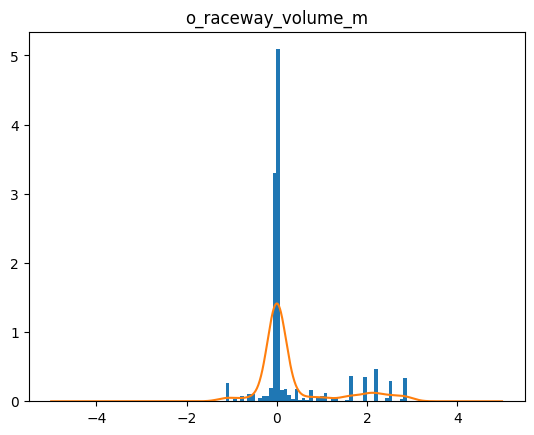

torch.Size([1000])
1851  loss=  tensor(2.6290, grad_fn=<MeanBackward0>)
1852  loss=  tensor(2.6155, grad_fn=<MeanBackward0>)
1853  loss=  tensor(2.6300, grad_fn=<MeanBackward0>)
1854  loss=  tensor(2.6063, grad_fn=<MeanBackward0>)
1855  loss=  tensor(2.6657, grad_fn=<MeanBackward0>)
1856  loss=  tensor(2.6208, grad_fn=<MeanBackward0>)
1857  loss=  tensor(2.6165, grad_fn=<MeanBackward0>)
1858  loss=  tensor(2.6089, grad_fn=<MeanBackward0>)
1859  loss=  tensor(2.6203, grad_fn=<MeanBackward0>)
1860  loss=  tensor(2.6519, grad_fn=<MeanBackward0>)
1861  loss=  tensor(2.6301, grad_fn=<MeanBackward0>)
1862  loss=  tensor(2.6189, grad_fn=<MeanBackward0>)
1863  loss=  tensor(2.6179, grad_fn=<MeanBackward0>)
1864  loss=  tensor(2.6549, grad_fn=<MeanBackward0>)
1865  loss=  tensor(2.6244, grad_fn=<MeanBackward0>)
1866  loss=  tensor(2.5847, grad_fn=<MeanBackward0>)
1867  loss=  tensor(2.6436, grad_fn=<MeanBackward0>)
1868  loss=  tensor(2.6541, grad_fn=<MeanBackward0>)
1869  loss=  tensor(2.6863,

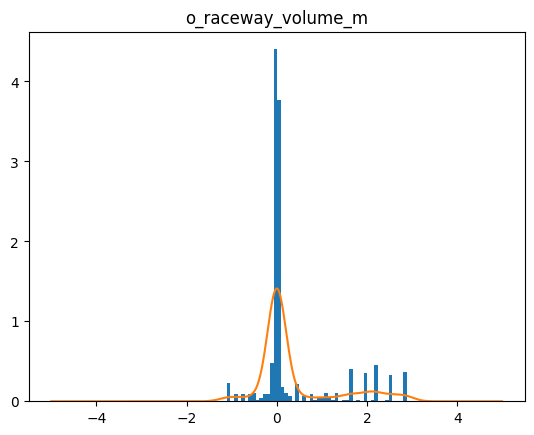

torch.Size([1000])
1901  loss=  tensor(2.6400, grad_fn=<MeanBackward0>)
1902  loss=  tensor(2.6452, grad_fn=<MeanBackward0>)
1903  loss=  tensor(2.6204, grad_fn=<MeanBackward0>)
1904  loss=  tensor(2.6598, grad_fn=<MeanBackward0>)
1905  loss=  tensor(2.6345, grad_fn=<MeanBackward0>)
1906  loss=  tensor(2.6148, grad_fn=<MeanBackward0>)
1907  loss=  tensor(2.5998, grad_fn=<MeanBackward0>)
1908  loss=  tensor(2.6349, grad_fn=<MeanBackward0>)
1909  loss=  tensor(2.6328, grad_fn=<MeanBackward0>)
1910  loss=  tensor(2.6284, grad_fn=<MeanBackward0>)
1911  loss=  tensor(2.6171, grad_fn=<MeanBackward0>)
1912  loss=  tensor(2.5707, grad_fn=<MeanBackward0>)
1913  loss=  tensor(2.6656, grad_fn=<MeanBackward0>)
1914  loss=  tensor(2.6148, grad_fn=<MeanBackward0>)
1915  loss=  tensor(2.5985, grad_fn=<MeanBackward0>)
1916  loss=  tensor(2.6399, grad_fn=<MeanBackward0>)
1917  loss=  tensor(2.6536, grad_fn=<MeanBackward0>)
1918  loss=  tensor(2.6397, grad_fn=<MeanBackward0>)
1919  loss=  tensor(2.6189,

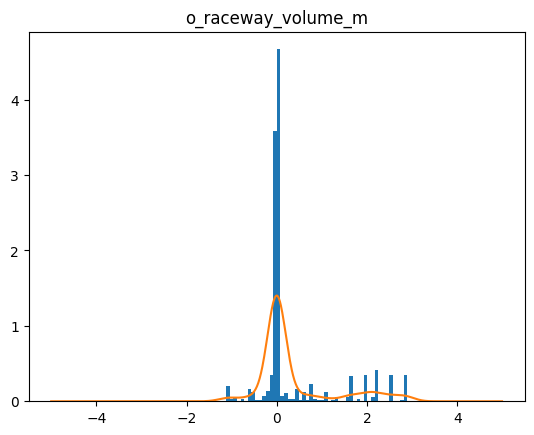

torch.Size([1000])
1951  loss=  tensor(2.6453, grad_fn=<MeanBackward0>)
1952  loss=  tensor(2.6191, grad_fn=<MeanBackward0>)
1953  loss=  tensor(2.6460, grad_fn=<MeanBackward0>)
1954  loss=  tensor(2.6356, grad_fn=<MeanBackward0>)
1955  loss=  tensor(2.6340, grad_fn=<MeanBackward0>)
1956  loss=  tensor(2.6207, grad_fn=<MeanBackward0>)
1957  loss=  tensor(2.6276, grad_fn=<MeanBackward0>)
1958  loss=  tensor(2.5923, grad_fn=<MeanBackward0>)
1959  loss=  tensor(2.6107, grad_fn=<MeanBackward0>)
1960  loss=  tensor(2.6624, grad_fn=<MeanBackward0>)
1961  loss=  tensor(2.6123, grad_fn=<MeanBackward0>)
1962  loss=  tensor(2.6062, grad_fn=<MeanBackward0>)
1963  loss=  tensor(2.6130, grad_fn=<MeanBackward0>)
1964  loss=  tensor(2.5831, grad_fn=<MeanBackward0>)
1965  loss=  tensor(2.6328, grad_fn=<MeanBackward0>)
1966  loss=  tensor(2.6478, grad_fn=<MeanBackward0>)
1967  loss=  tensor(2.6195, grad_fn=<MeanBackward0>)
1968  loss=  tensor(2.6094, grad_fn=<MeanBackward0>)
1969  loss=  tensor(2.6173,

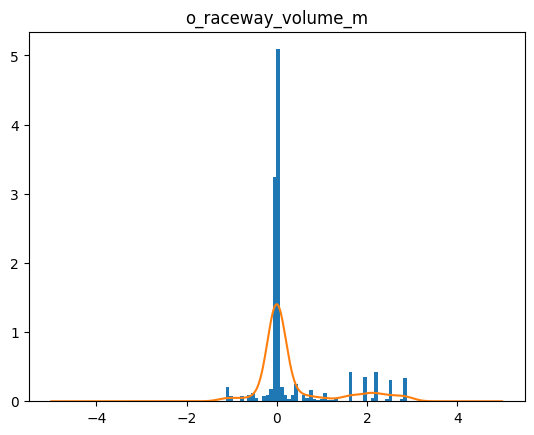

torch.Size([1000])
2001  loss=  tensor(2.5928, grad_fn=<MeanBackward0>)
2002  loss=  tensor(2.6486, grad_fn=<MeanBackward0>)
2003  loss=  tensor(2.6326, grad_fn=<MeanBackward0>)
2004  loss=  tensor(2.6037, grad_fn=<MeanBackward0>)
2005  loss=  tensor(2.6184, grad_fn=<MeanBackward0>)
2006  loss=  tensor(2.5977, grad_fn=<MeanBackward0>)
2007  loss=  tensor(2.6466, grad_fn=<MeanBackward0>)
2008  loss=  tensor(2.5909, grad_fn=<MeanBackward0>)
2009  loss=  tensor(2.6167, grad_fn=<MeanBackward0>)
2010  loss=  tensor(2.6514, grad_fn=<MeanBackward0>)
2011  loss=  tensor(2.6407, grad_fn=<MeanBackward0>)
2012  loss=  tensor(2.6390, grad_fn=<MeanBackward0>)
2013  loss=  tensor(2.6098, grad_fn=<MeanBackward0>)
2014  loss=  tensor(2.6149, grad_fn=<MeanBackward0>)
2015  loss=  tensor(2.6012, grad_fn=<MeanBackward0>)
2016  loss=  tensor(2.6584, grad_fn=<MeanBackward0>)
2017  loss=  tensor(2.6267, grad_fn=<MeanBackward0>)
2018  loss=  tensor(2.6214, grad_fn=<MeanBackward0>)
2019  loss=  tensor(2.6490,

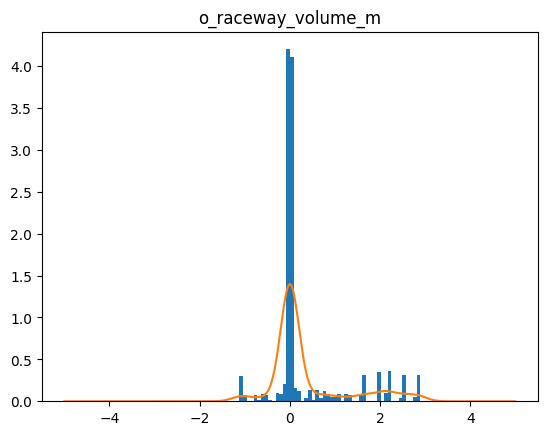

torch.Size([1000])
2051  loss=  tensor(2.6272, grad_fn=<MeanBackward0>)
2052  loss=  tensor(2.6354, grad_fn=<MeanBackward0>)
2053  loss=  tensor(2.6189, grad_fn=<MeanBackward0>)
2054  loss=  tensor(2.5893, grad_fn=<MeanBackward0>)
2055  loss=  tensor(2.6063, grad_fn=<MeanBackward0>)
2056  loss=  tensor(2.6355, grad_fn=<MeanBackward0>)
2057  loss=  tensor(2.6495, grad_fn=<MeanBackward0>)
2058  loss=  tensor(2.6393, grad_fn=<MeanBackward0>)
2059  loss=  tensor(2.6251, grad_fn=<MeanBackward0>)
2060  loss=  tensor(2.5971, grad_fn=<MeanBackward0>)
2061  loss=  tensor(2.6417, grad_fn=<MeanBackward0>)
2062  loss=  tensor(2.6638, grad_fn=<MeanBackward0>)
2063  loss=  tensor(2.6267, grad_fn=<MeanBackward0>)
2064  loss=  tensor(2.6091, grad_fn=<MeanBackward0>)
2065  loss=  tensor(2.6303, grad_fn=<MeanBackward0>)
2066  loss=  tensor(2.6422, grad_fn=<MeanBackward0>)
2067  loss=  tensor(2.6234, grad_fn=<MeanBackward0>)
2068  loss=  tensor(2.6455, grad_fn=<MeanBackward0>)
2069  loss=  tensor(2.6282,

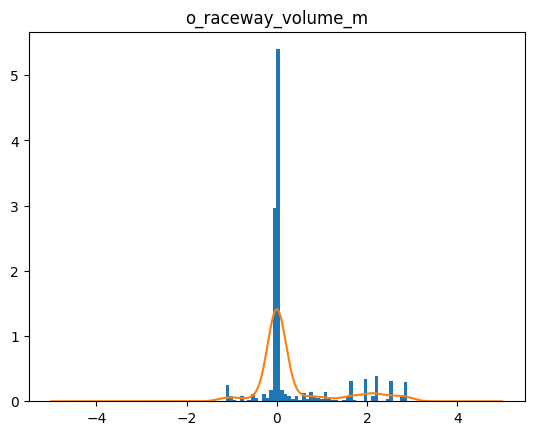

torch.Size([1000])
2101  loss=  tensor(2.5840, grad_fn=<MeanBackward0>)
2102  loss=  tensor(2.6151, grad_fn=<MeanBackward0>)
2103  loss=  tensor(2.6225, grad_fn=<MeanBackward0>)
2104  loss=  tensor(2.6072, grad_fn=<MeanBackward0>)
2105  loss=  tensor(2.6245, grad_fn=<MeanBackward0>)
2106  loss=  tensor(2.6177, grad_fn=<MeanBackward0>)
2107  loss=  tensor(2.5867, grad_fn=<MeanBackward0>)
2108  loss=  tensor(2.6574, grad_fn=<MeanBackward0>)
2109  loss=  tensor(2.6081, grad_fn=<MeanBackward0>)
2110  loss=  tensor(2.6330, grad_fn=<MeanBackward0>)
2111  loss=  tensor(2.6066, grad_fn=<MeanBackward0>)
2112  loss=  tensor(2.6017, grad_fn=<MeanBackward0>)
2113  loss=  tensor(2.6222, grad_fn=<MeanBackward0>)
2114  loss=  tensor(2.6250, grad_fn=<MeanBackward0>)
2115  loss=  tensor(2.6128, grad_fn=<MeanBackward0>)
2116  loss=  tensor(2.6286, grad_fn=<MeanBackward0>)
2117  loss=  tensor(2.6100, grad_fn=<MeanBackward0>)
2118  loss=  tensor(2.6358, grad_fn=<MeanBackward0>)
2119  loss=  tensor(2.6200,

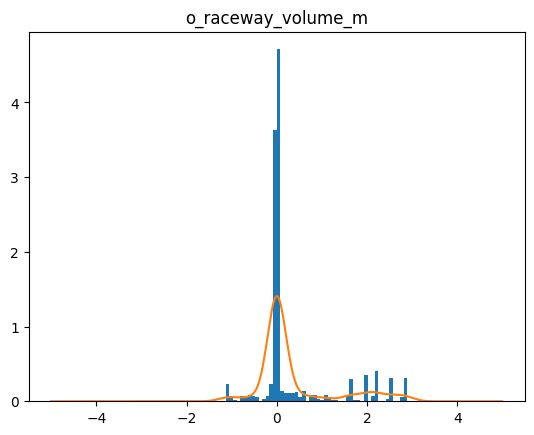

torch.Size([1000])
2151  loss=  tensor(2.6129, grad_fn=<MeanBackward0>)
2152  loss=  tensor(2.6012, grad_fn=<MeanBackward0>)
2153  loss=  tensor(2.6184, grad_fn=<MeanBackward0>)
2154  loss=  tensor(2.6152, grad_fn=<MeanBackward0>)
2155  loss=  tensor(2.6218, grad_fn=<MeanBackward0>)
2156  loss=  tensor(2.6309, grad_fn=<MeanBackward0>)
2157  loss=  tensor(2.6010, grad_fn=<MeanBackward0>)
2158  loss=  tensor(2.6458, grad_fn=<MeanBackward0>)
2159  loss=  tensor(2.6064, grad_fn=<MeanBackward0>)
2160  loss=  tensor(2.6266, grad_fn=<MeanBackward0>)
2161  loss=  tensor(2.6251, grad_fn=<MeanBackward0>)
2162  loss=  tensor(2.6193, grad_fn=<MeanBackward0>)
2163  loss=  tensor(2.6301, grad_fn=<MeanBackward0>)
2164  loss=  tensor(2.6227, grad_fn=<MeanBackward0>)
2165  loss=  tensor(2.6951, grad_fn=<MeanBackward0>)
2166  loss=  tensor(2.6226, grad_fn=<MeanBackward0>)
2167  loss=  tensor(2.6567, grad_fn=<MeanBackward0>)
2168  loss=  tensor(2.6172, grad_fn=<MeanBackward0>)
2169  loss=  tensor(2.5930,

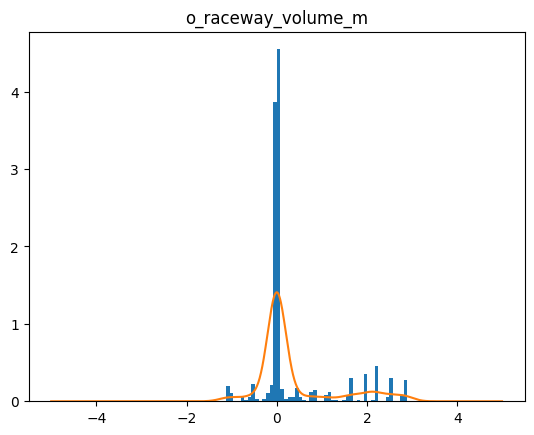

torch.Size([1000])
2201  loss=  tensor(2.6360, grad_fn=<MeanBackward0>)
2202  loss=  tensor(2.6192, grad_fn=<MeanBackward0>)
2203  loss=  tensor(2.6297, grad_fn=<MeanBackward0>)
2204  loss=  tensor(2.5926, grad_fn=<MeanBackward0>)
2205  loss=  tensor(2.6207, grad_fn=<MeanBackward0>)
2206  loss=  tensor(2.6127, grad_fn=<MeanBackward0>)
2207  loss=  tensor(2.6055, grad_fn=<MeanBackward0>)
2208  loss=  tensor(2.6228, grad_fn=<MeanBackward0>)
2209  loss=  tensor(2.5919, grad_fn=<MeanBackward0>)
2210  loss=  tensor(2.6619, grad_fn=<MeanBackward0>)
2211  loss=  tensor(2.6215, grad_fn=<MeanBackward0>)
2212  loss=  tensor(2.6624, grad_fn=<MeanBackward0>)
2213  loss=  tensor(2.6098, grad_fn=<MeanBackward0>)
2214  loss=  tensor(2.6406, grad_fn=<MeanBackward0>)
2215  loss=  tensor(2.6127, grad_fn=<MeanBackward0>)
2216  loss=  tensor(2.6265, grad_fn=<MeanBackward0>)
2217  loss=  tensor(2.6311, grad_fn=<MeanBackward0>)
2218  loss=  tensor(2.6028, grad_fn=<MeanBackward0>)
2219  loss=  tensor(2.6078,

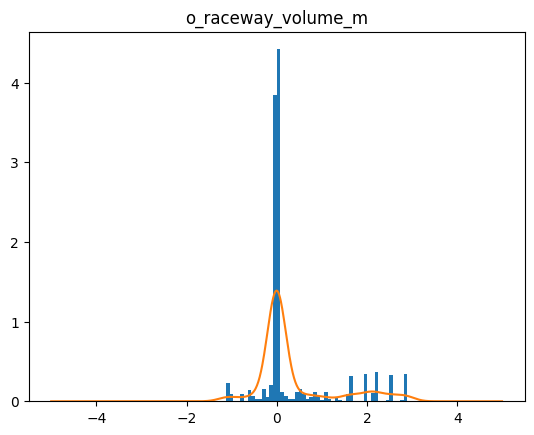

torch.Size([1000])
2251  loss=  tensor(2.6649, grad_fn=<MeanBackward0>)
2252  loss=  tensor(2.5735, grad_fn=<MeanBackward0>)
2253  loss=  tensor(2.6224, grad_fn=<MeanBackward0>)
2254  loss=  tensor(2.5802, grad_fn=<MeanBackward0>)
2255  loss=  tensor(2.6531, grad_fn=<MeanBackward0>)
2256  loss=  tensor(2.6125, grad_fn=<MeanBackward0>)
2257  loss=  tensor(2.6405, grad_fn=<MeanBackward0>)
2258  loss=  tensor(2.6260, grad_fn=<MeanBackward0>)
2259  loss=  tensor(2.6598, grad_fn=<MeanBackward0>)
2260  loss=  tensor(2.6383, grad_fn=<MeanBackward0>)
2261  loss=  tensor(2.6138, grad_fn=<MeanBackward0>)
2262  loss=  tensor(2.6150, grad_fn=<MeanBackward0>)
2263  loss=  tensor(2.6427, grad_fn=<MeanBackward0>)
2264  loss=  tensor(2.6231, grad_fn=<MeanBackward0>)
2265  loss=  tensor(2.6305, grad_fn=<MeanBackward0>)
2266  loss=  tensor(2.6303, grad_fn=<MeanBackward0>)
2267  loss=  tensor(2.6261, grad_fn=<MeanBackward0>)
2268  loss=  tensor(2.6018, grad_fn=<MeanBackward0>)
2269  loss=  tensor(2.6658,

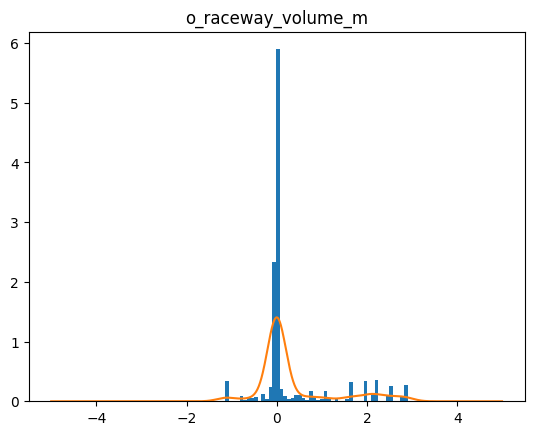

torch.Size([1000])
2301  loss=  tensor(2.6200, grad_fn=<MeanBackward0>)
2302  loss=  tensor(2.6164, grad_fn=<MeanBackward0>)
2303  loss=  tensor(2.6182, grad_fn=<MeanBackward0>)
2304  loss=  tensor(2.6406, grad_fn=<MeanBackward0>)
2305  loss=  tensor(2.6480, grad_fn=<MeanBackward0>)
2306  loss=  tensor(2.6249, grad_fn=<MeanBackward0>)
2307  loss=  tensor(2.6498, grad_fn=<MeanBackward0>)
2308  loss=  tensor(2.6021, grad_fn=<MeanBackward0>)
2309  loss=  tensor(2.5881, grad_fn=<MeanBackward0>)
2310  loss=  tensor(2.6518, grad_fn=<MeanBackward0>)
2311  loss=  tensor(2.6355, grad_fn=<MeanBackward0>)
2312  loss=  tensor(2.6108, grad_fn=<MeanBackward0>)
2313  loss=  tensor(2.6112, grad_fn=<MeanBackward0>)
2314  loss=  tensor(2.6289, grad_fn=<MeanBackward0>)
2315  loss=  tensor(2.6090, grad_fn=<MeanBackward0>)
2316  loss=  tensor(2.6498, grad_fn=<MeanBackward0>)
2317  loss=  tensor(2.6088, grad_fn=<MeanBackward0>)
2318  loss=  tensor(2.6101, grad_fn=<MeanBackward0>)
2319  loss=  tensor(2.6103,

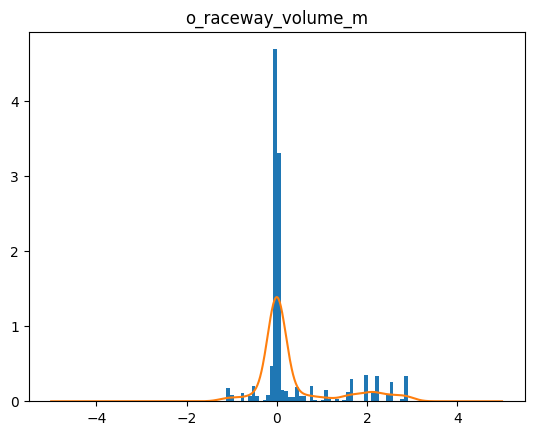

torch.Size([1000])
2351  loss=  tensor(2.5979, grad_fn=<MeanBackward0>)
2352  loss=  tensor(2.6100, grad_fn=<MeanBackward0>)
2353  loss=  tensor(2.6236, grad_fn=<MeanBackward0>)
2354  loss=  tensor(2.6200, grad_fn=<MeanBackward0>)
2355  loss=  tensor(2.6479, grad_fn=<MeanBackward0>)
2356  loss=  tensor(2.6205, grad_fn=<MeanBackward0>)
2357  loss=  tensor(2.6067, grad_fn=<MeanBackward0>)
2358  loss=  tensor(2.6124, grad_fn=<MeanBackward0>)
2359  loss=  tensor(2.6129, grad_fn=<MeanBackward0>)
2360  loss=  tensor(2.6151, grad_fn=<MeanBackward0>)
2361  loss=  tensor(2.5947, grad_fn=<MeanBackward0>)
2362  loss=  tensor(2.6365, grad_fn=<MeanBackward0>)
2363  loss=  tensor(2.6259, grad_fn=<MeanBackward0>)
2364  loss=  tensor(2.6754, grad_fn=<MeanBackward0>)
2365  loss=  tensor(2.5933, grad_fn=<MeanBackward0>)
2366  loss=  tensor(2.6495, grad_fn=<MeanBackward0>)
2367  loss=  tensor(2.6318, grad_fn=<MeanBackward0>)
2368  loss=  tensor(2.6210, grad_fn=<MeanBackward0>)
2369  loss=  tensor(2.6413,

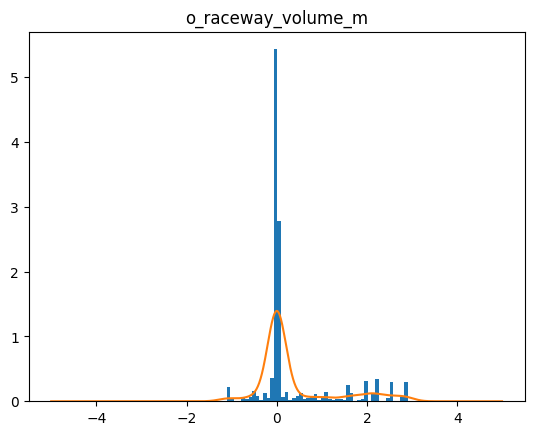

torch.Size([1000])
2401  loss=  tensor(2.6103, grad_fn=<MeanBackward0>)
2402  loss=  tensor(2.6175, grad_fn=<MeanBackward0>)
2403  loss=  tensor(2.6289, grad_fn=<MeanBackward0>)
2404  loss=  tensor(2.5773, grad_fn=<MeanBackward0>)
2405  loss=  tensor(2.5979, grad_fn=<MeanBackward0>)
2406  loss=  tensor(2.5952, grad_fn=<MeanBackward0>)
2407  loss=  tensor(2.6007, grad_fn=<MeanBackward0>)
2408  loss=  tensor(2.6182, grad_fn=<MeanBackward0>)
2409  loss=  tensor(2.6318, grad_fn=<MeanBackward0>)
2410  loss=  tensor(2.6050, grad_fn=<MeanBackward0>)
2411  loss=  tensor(2.6190, grad_fn=<MeanBackward0>)
2412  loss=  tensor(2.6230, grad_fn=<MeanBackward0>)
2413  loss=  tensor(2.6062, grad_fn=<MeanBackward0>)
2414  loss=  tensor(2.6228, grad_fn=<MeanBackward0>)
2415  loss=  tensor(2.6277, grad_fn=<MeanBackward0>)
2416  loss=  tensor(2.6344, grad_fn=<MeanBackward0>)
2417  loss=  tensor(2.6025, grad_fn=<MeanBackward0>)
2418  loss=  tensor(2.6040, grad_fn=<MeanBackward0>)
2419  loss=  tensor(2.6298,

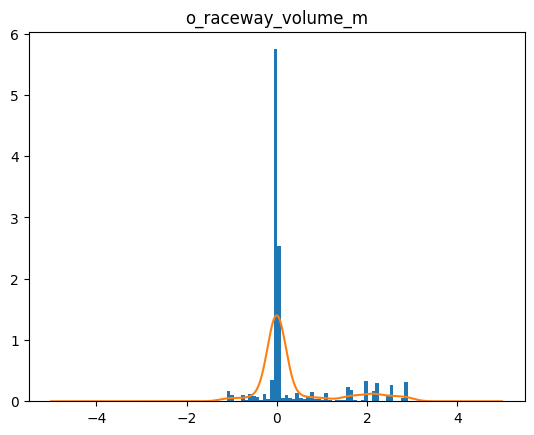

torch.Size([1000])
2451  loss=  tensor(2.5976, grad_fn=<MeanBackward0>)
2452  loss=  tensor(2.6561, grad_fn=<MeanBackward0>)
2453  loss=  tensor(2.6275, grad_fn=<MeanBackward0>)
2454  loss=  tensor(2.6109, grad_fn=<MeanBackward0>)
2455  loss=  tensor(2.6369, grad_fn=<MeanBackward0>)
2456  loss=  tensor(2.6097, grad_fn=<MeanBackward0>)
2457  loss=  tensor(2.6197, grad_fn=<MeanBackward0>)
2458  loss=  tensor(2.6247, grad_fn=<MeanBackward0>)
2459  loss=  tensor(2.6211, grad_fn=<MeanBackward0>)
2460  loss=  tensor(2.6063, grad_fn=<MeanBackward0>)
2461  loss=  tensor(2.6347, grad_fn=<MeanBackward0>)
2462  loss=  tensor(2.6139, grad_fn=<MeanBackward0>)
2463  loss=  tensor(2.6227, grad_fn=<MeanBackward0>)
2464  loss=  tensor(2.6380, grad_fn=<MeanBackward0>)
2465  loss=  tensor(2.6322, grad_fn=<MeanBackward0>)
2466  loss=  tensor(2.6380, grad_fn=<MeanBackward0>)
2467  loss=  tensor(2.6326, grad_fn=<MeanBackward0>)
2468  loss=  tensor(2.6429, grad_fn=<MeanBackward0>)
2469  loss=  tensor(2.6184,

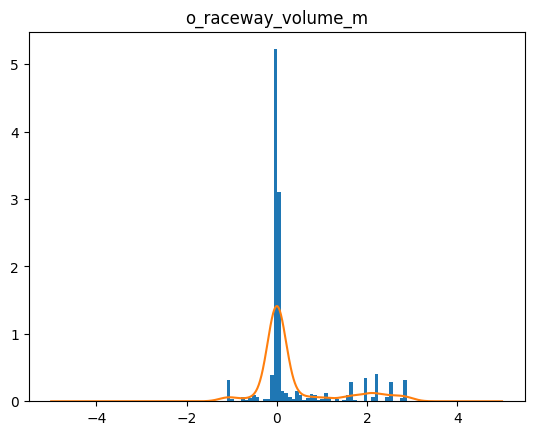

torch.Size([1000])
2501  loss=  tensor(2.6428, grad_fn=<MeanBackward0>)
2502  loss=  tensor(2.6220, grad_fn=<MeanBackward0>)
2503  loss=  tensor(2.6411, grad_fn=<MeanBackward0>)
2504  loss=  tensor(2.6389, grad_fn=<MeanBackward0>)
2505  loss=  tensor(2.6203, grad_fn=<MeanBackward0>)
2506  loss=  tensor(2.6190, grad_fn=<MeanBackward0>)
2507  loss=  tensor(2.6029, grad_fn=<MeanBackward0>)
2508  loss=  tensor(2.6318, grad_fn=<MeanBackward0>)
2509  loss=  tensor(2.6234, grad_fn=<MeanBackward0>)
2510  loss=  tensor(2.6084, grad_fn=<MeanBackward0>)
2511  loss=  tensor(2.6371, grad_fn=<MeanBackward0>)
2512  loss=  tensor(2.6393, grad_fn=<MeanBackward0>)
2513  loss=  tensor(2.6280, grad_fn=<MeanBackward0>)
2514  loss=  tensor(2.6139, grad_fn=<MeanBackward0>)
2515  loss=  tensor(2.6342, grad_fn=<MeanBackward0>)
2516  loss=  tensor(2.6347, grad_fn=<MeanBackward0>)
2517  loss=  tensor(2.6340, grad_fn=<MeanBackward0>)
2518  loss=  tensor(2.6167, grad_fn=<MeanBackward0>)
2519  loss=  tensor(2.6251,

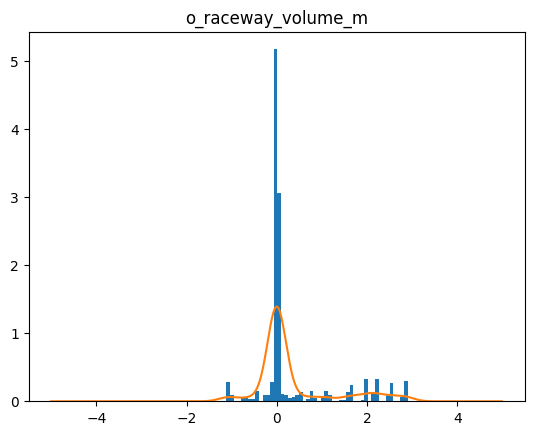

torch.Size([1000])
2551  loss=  tensor(2.6192, grad_fn=<MeanBackward0>)
2552  loss=  tensor(2.6235, grad_fn=<MeanBackward0>)
2553  loss=  tensor(2.6226, grad_fn=<MeanBackward0>)
2554  loss=  tensor(2.6180, grad_fn=<MeanBackward0>)
2555  loss=  tensor(2.5999, grad_fn=<MeanBackward0>)
2556  loss=  tensor(2.6458, grad_fn=<MeanBackward0>)
2557  loss=  tensor(2.6049, grad_fn=<MeanBackward0>)
2558  loss=  tensor(2.6186, grad_fn=<MeanBackward0>)
2559  loss=  tensor(2.6217, grad_fn=<MeanBackward0>)
2560  loss=  tensor(2.5913, grad_fn=<MeanBackward0>)
2561  loss=  tensor(2.6279, grad_fn=<MeanBackward0>)
2562  loss=  tensor(2.6389, grad_fn=<MeanBackward0>)
2563  loss=  tensor(2.6095, grad_fn=<MeanBackward0>)
2564  loss=  tensor(2.6086, grad_fn=<MeanBackward0>)
2565  loss=  tensor(2.6462, grad_fn=<MeanBackward0>)
2566  loss=  tensor(2.6232, grad_fn=<MeanBackward0>)
2567  loss=  tensor(2.6017, grad_fn=<MeanBackward0>)
2568  loss=  tensor(2.6313, grad_fn=<MeanBackward0>)
2569  loss=  tensor(2.6298,

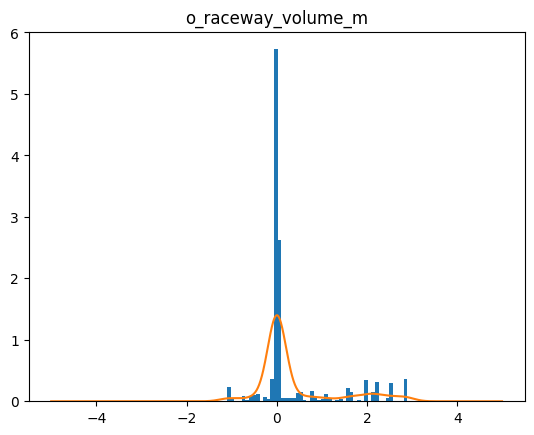

torch.Size([1000])
2601  loss=  tensor(2.5928, grad_fn=<MeanBackward0>)
2602  loss=  tensor(2.5911, grad_fn=<MeanBackward0>)
2603  loss=  tensor(2.6359, grad_fn=<MeanBackward0>)
2604  loss=  tensor(2.6408, grad_fn=<MeanBackward0>)
2605  loss=  tensor(2.5977, grad_fn=<MeanBackward0>)
2606  loss=  tensor(2.6380, grad_fn=<MeanBackward0>)
2607  loss=  tensor(2.6023, grad_fn=<MeanBackward0>)
2608  loss=  tensor(2.6212, grad_fn=<MeanBackward0>)
2609  loss=  tensor(2.6123, grad_fn=<MeanBackward0>)
2610  loss=  tensor(2.6194, grad_fn=<MeanBackward0>)
2611  loss=  tensor(2.6561, grad_fn=<MeanBackward0>)
2612  loss=  tensor(2.6238, grad_fn=<MeanBackward0>)
2613  loss=  tensor(2.6097, grad_fn=<MeanBackward0>)
2614  loss=  tensor(2.6119, grad_fn=<MeanBackward0>)
2615  loss=  tensor(2.6173, grad_fn=<MeanBackward0>)
2616  loss=  tensor(2.6258, grad_fn=<MeanBackward0>)
2617  loss=  tensor(2.6140, grad_fn=<MeanBackward0>)
2618  loss=  tensor(2.6612, grad_fn=<MeanBackward0>)
2619  loss=  tensor(2.6284,

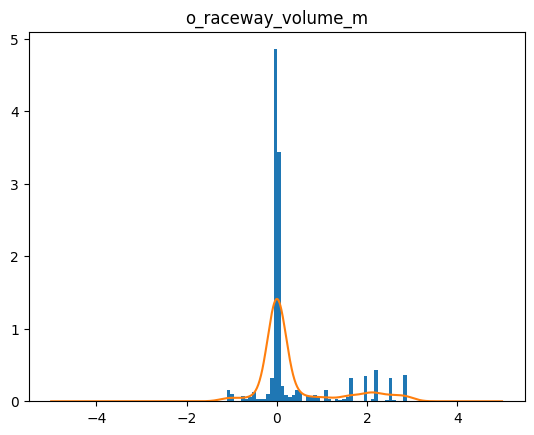

torch.Size([1000])
2651  loss=  tensor(2.6147, grad_fn=<MeanBackward0>)
2652  loss=  tensor(2.6214, grad_fn=<MeanBackward0>)
2653  loss=  tensor(2.6113, grad_fn=<MeanBackward0>)
2654  loss=  tensor(2.6256, grad_fn=<MeanBackward0>)
2655  loss=  tensor(2.6224, grad_fn=<MeanBackward0>)
2656  loss=  tensor(2.6346, grad_fn=<MeanBackward0>)
2657  loss=  tensor(2.5905, grad_fn=<MeanBackward0>)
2658  loss=  tensor(2.6148, grad_fn=<MeanBackward0>)
2659  loss=  tensor(2.6014, grad_fn=<MeanBackward0>)
2660  loss=  tensor(2.6362, grad_fn=<MeanBackward0>)
2661  loss=  tensor(2.6088, grad_fn=<MeanBackward0>)
2662  loss=  tensor(2.6172, grad_fn=<MeanBackward0>)
2663  loss=  tensor(2.5915, grad_fn=<MeanBackward0>)
2664  loss=  tensor(2.6462, grad_fn=<MeanBackward0>)
2665  loss=  tensor(2.5988, grad_fn=<MeanBackward0>)
2666  loss=  tensor(2.6290, grad_fn=<MeanBackward0>)
2667  loss=  tensor(2.6175, grad_fn=<MeanBackward0>)
2668  loss=  tensor(2.6484, grad_fn=<MeanBackward0>)
2669  loss=  tensor(2.5978,

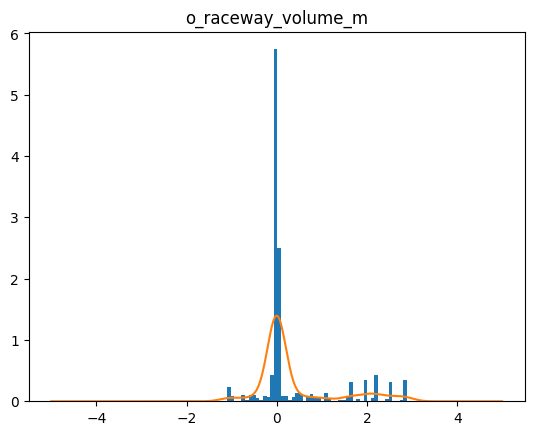

torch.Size([1000])
2701  loss=  tensor(2.6139, grad_fn=<MeanBackward0>)
2702  loss=  tensor(2.6354, grad_fn=<MeanBackward0>)
2703  loss=  tensor(2.6299, grad_fn=<MeanBackward0>)
2704  loss=  tensor(2.6232, grad_fn=<MeanBackward0>)
2705  loss=  tensor(2.6172, grad_fn=<MeanBackward0>)
2706  loss=  tensor(2.6230, grad_fn=<MeanBackward0>)
2707  loss=  tensor(2.6057, grad_fn=<MeanBackward0>)
2708  loss=  tensor(2.6276, grad_fn=<MeanBackward0>)
2709  loss=  tensor(2.6421, grad_fn=<MeanBackward0>)
2710  loss=  tensor(2.6350, grad_fn=<MeanBackward0>)
2711  loss=  tensor(2.6021, grad_fn=<MeanBackward0>)
2712  loss=  tensor(2.6360, grad_fn=<MeanBackward0>)
2713  loss=  tensor(2.6445, grad_fn=<MeanBackward0>)
2714  loss=  tensor(2.6390, grad_fn=<MeanBackward0>)
2715  loss=  tensor(2.6008, grad_fn=<MeanBackward0>)
2716  loss=  tensor(2.6064, grad_fn=<MeanBackward0>)
2717  loss=  tensor(2.6125, grad_fn=<MeanBackward0>)
2718  loss=  tensor(2.6288, grad_fn=<MeanBackward0>)
2719  loss=  tensor(2.6011,

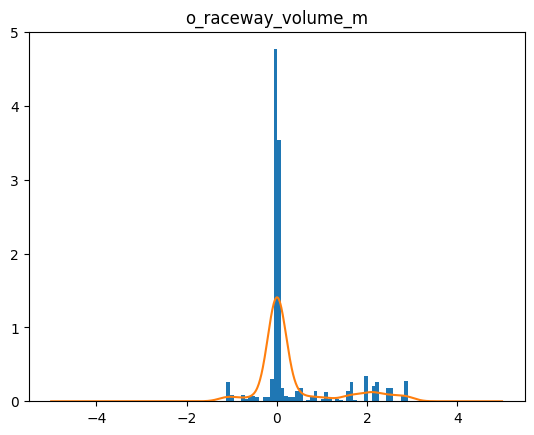

torch.Size([1000])
2751  loss=  tensor(2.6427, grad_fn=<MeanBackward0>)
2752  loss=  tensor(2.5950, grad_fn=<MeanBackward0>)
2753  loss=  tensor(2.6353, grad_fn=<MeanBackward0>)
2754  loss=  tensor(2.5895, grad_fn=<MeanBackward0>)
2755  loss=  tensor(2.6102, grad_fn=<MeanBackward0>)
2756  loss=  tensor(2.6368, grad_fn=<MeanBackward0>)
2757  loss=  tensor(2.6144, grad_fn=<MeanBackward0>)
2758  loss=  tensor(2.6124, grad_fn=<MeanBackward0>)
2759  loss=  tensor(2.6335, grad_fn=<MeanBackward0>)
2760  loss=  tensor(2.6075, grad_fn=<MeanBackward0>)
2761  loss=  tensor(2.6002, grad_fn=<MeanBackward0>)
2762  loss=  tensor(2.6096, grad_fn=<MeanBackward0>)
2763  loss=  tensor(2.6182, grad_fn=<MeanBackward0>)
2764  loss=  tensor(2.5991, grad_fn=<MeanBackward0>)
2765  loss=  tensor(2.6199, grad_fn=<MeanBackward0>)
2766  loss=  tensor(2.6370, grad_fn=<MeanBackward0>)
2767  loss=  tensor(2.6318, grad_fn=<MeanBackward0>)
2768  loss=  tensor(2.6224, grad_fn=<MeanBackward0>)
2769  loss=  tensor(2.6453,

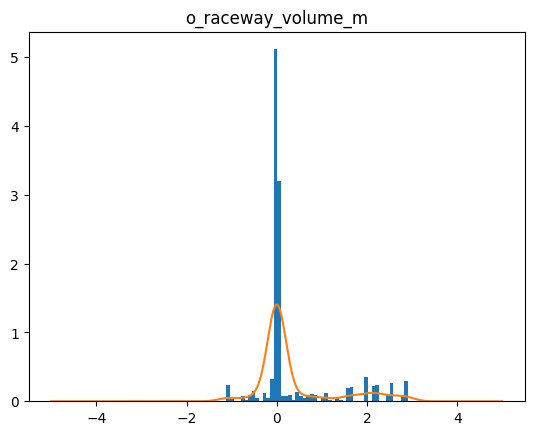

torch.Size([1000])
2801  loss=  tensor(2.5935, grad_fn=<MeanBackward0>)
2802  loss=  tensor(2.5998, grad_fn=<MeanBackward0>)
2803  loss=  tensor(2.6071, grad_fn=<MeanBackward0>)
2804  loss=  tensor(2.5858, grad_fn=<MeanBackward0>)
2805  loss=  tensor(2.5796, grad_fn=<MeanBackward0>)
2806  loss=  tensor(2.6104, grad_fn=<MeanBackward0>)
2807  loss=  tensor(2.6312, grad_fn=<MeanBackward0>)
2808  loss=  tensor(2.6397, grad_fn=<MeanBackward0>)
2809  loss=  tensor(2.6381, grad_fn=<MeanBackward0>)
2810  loss=  tensor(2.6531, grad_fn=<MeanBackward0>)
2811  loss=  tensor(2.6348, grad_fn=<MeanBackward0>)
2812  loss=  tensor(2.5856, grad_fn=<MeanBackward0>)
2813  loss=  tensor(2.6521, grad_fn=<MeanBackward0>)
2814  loss=  tensor(2.6596, grad_fn=<MeanBackward0>)
2815  loss=  tensor(2.6433, grad_fn=<MeanBackward0>)
2816  loss=  tensor(2.5913, grad_fn=<MeanBackward0>)
2817  loss=  tensor(2.6385, grad_fn=<MeanBackward0>)
2818  loss=  tensor(2.6160, grad_fn=<MeanBackward0>)
2819  loss=  tensor(2.6177,

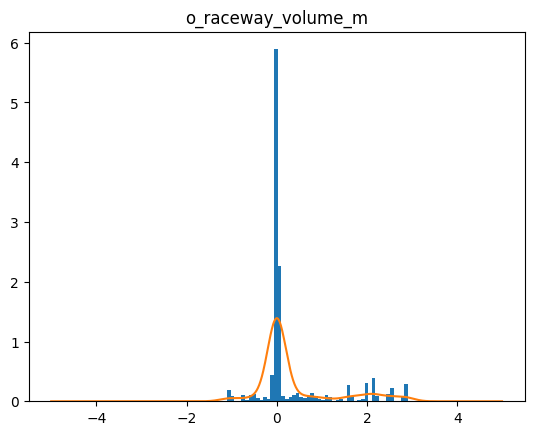

torch.Size([1000])
2851  loss=  tensor(2.6346, grad_fn=<MeanBackward0>)
2852  loss=  tensor(2.6198, grad_fn=<MeanBackward0>)
2853  loss=  tensor(2.6374, grad_fn=<MeanBackward0>)
2854  loss=  tensor(2.6194, grad_fn=<MeanBackward0>)
2855  loss=  tensor(2.6177, grad_fn=<MeanBackward0>)
2856  loss=  tensor(2.6003, grad_fn=<MeanBackward0>)
2857  loss=  tensor(2.6341, grad_fn=<MeanBackward0>)
2858  loss=  tensor(2.6093, grad_fn=<MeanBackward0>)
2859  loss=  tensor(2.6125, grad_fn=<MeanBackward0>)
2860  loss=  tensor(2.6279, grad_fn=<MeanBackward0>)
2861  loss=  tensor(2.6437, grad_fn=<MeanBackward0>)
2862  loss=  tensor(2.6453, grad_fn=<MeanBackward0>)
2863  loss=  tensor(2.6170, grad_fn=<MeanBackward0>)
2864  loss=  tensor(2.6093, grad_fn=<MeanBackward0>)
2865  loss=  tensor(2.6126, grad_fn=<MeanBackward0>)
2866  loss=  tensor(2.6300, grad_fn=<MeanBackward0>)
2867  loss=  tensor(2.6078, grad_fn=<MeanBackward0>)
2868  loss=  tensor(2.6147, grad_fn=<MeanBackward0>)
2869  loss=  tensor(2.6392,

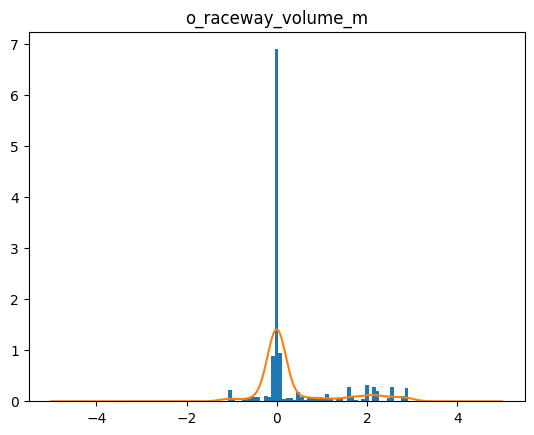

torch.Size([1000])
2901  loss=  tensor(2.5932, grad_fn=<MeanBackward0>)
2902  loss=  tensor(2.6368, grad_fn=<MeanBackward0>)
2903  loss=  tensor(2.5922, grad_fn=<MeanBackward0>)
2904  loss=  tensor(2.6921, grad_fn=<MeanBackward0>)
2905  loss=  tensor(2.6195, grad_fn=<MeanBackward0>)
2906  loss=  tensor(2.6280, grad_fn=<MeanBackward0>)
2907  loss=  tensor(2.6175, grad_fn=<MeanBackward0>)
2908  loss=  tensor(2.6070, grad_fn=<MeanBackward0>)
2909  loss=  tensor(2.6343, grad_fn=<MeanBackward0>)
2910  loss=  tensor(2.6162, grad_fn=<MeanBackward0>)
2911  loss=  tensor(2.6132, grad_fn=<MeanBackward0>)
2912  loss=  tensor(2.6382, grad_fn=<MeanBackward0>)
2913  loss=  tensor(2.6226, grad_fn=<MeanBackward0>)
2914  loss=  tensor(2.6372, grad_fn=<MeanBackward0>)
2915  loss=  tensor(2.6222, grad_fn=<MeanBackward0>)
2916  loss=  tensor(2.5909, grad_fn=<MeanBackward0>)
2917  loss=  tensor(2.6130, grad_fn=<MeanBackward0>)
2918  loss=  tensor(2.6421, grad_fn=<MeanBackward0>)
2919  loss=  tensor(2.6348,

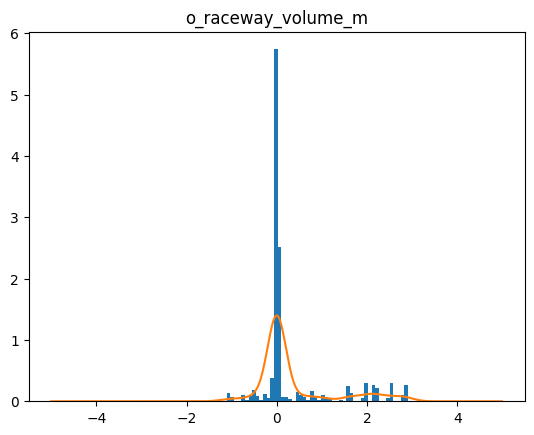

torch.Size([1000])
2951  loss=  tensor(2.6552, grad_fn=<MeanBackward0>)
2952  loss=  tensor(2.5896, grad_fn=<MeanBackward0>)
2953  loss=  tensor(2.6075, grad_fn=<MeanBackward0>)
2954  loss=  tensor(2.6443, grad_fn=<MeanBackward0>)
2955  loss=  tensor(2.6477, grad_fn=<MeanBackward0>)
2956  loss=  tensor(2.6238, grad_fn=<MeanBackward0>)
2957  loss=  tensor(2.6419, grad_fn=<MeanBackward0>)
2958  loss=  tensor(2.6052, grad_fn=<MeanBackward0>)
2959  loss=  tensor(2.6027, grad_fn=<MeanBackward0>)
2960  loss=  tensor(2.5935, grad_fn=<MeanBackward0>)
2961  loss=  tensor(2.6327, grad_fn=<MeanBackward0>)
2962  loss=  tensor(2.6501, grad_fn=<MeanBackward0>)
2963  loss=  tensor(2.6135, grad_fn=<MeanBackward0>)
2964  loss=  tensor(2.6391, grad_fn=<MeanBackward0>)
2965  loss=  tensor(2.5905, grad_fn=<MeanBackward0>)
2966  loss=  tensor(2.6073, grad_fn=<MeanBackward0>)
2967  loss=  tensor(2.6374, grad_fn=<MeanBackward0>)
2968  loss=  tensor(2.6219, grad_fn=<MeanBackward0>)
2969  loss=  tensor(2.6384,

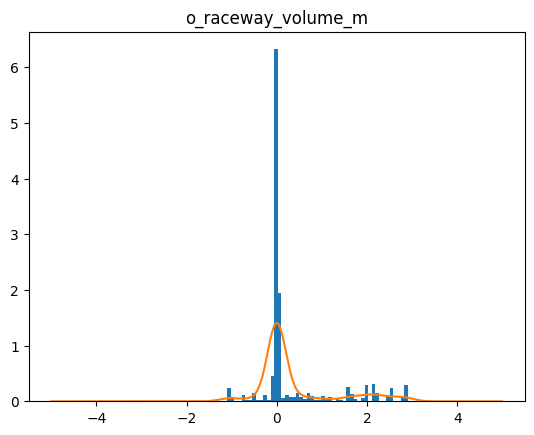

torch.Size([1000])
3001  loss=  tensor(2.6397, grad_fn=<MeanBackward0>)
3002  loss=  tensor(2.6001, grad_fn=<MeanBackward0>)
3003  loss=  tensor(2.6555, grad_fn=<MeanBackward0>)
3004  loss=  tensor(2.6484, grad_fn=<MeanBackward0>)
3005  loss=  tensor(2.6184, grad_fn=<MeanBackward0>)
3006  loss=  tensor(2.6033, grad_fn=<MeanBackward0>)
3007  loss=  tensor(2.6010, grad_fn=<MeanBackward0>)
3008  loss=  tensor(2.6125, grad_fn=<MeanBackward0>)
3009  loss=  tensor(2.6532, grad_fn=<MeanBackward0>)
3010  loss=  tensor(2.6068, grad_fn=<MeanBackward0>)
3011  loss=  tensor(2.6060, grad_fn=<MeanBackward0>)
3012  loss=  tensor(2.6325, grad_fn=<MeanBackward0>)
3013  loss=  tensor(2.5734, grad_fn=<MeanBackward0>)
3014  loss=  tensor(2.6302, grad_fn=<MeanBackward0>)
3015  loss=  tensor(2.6368, grad_fn=<MeanBackward0>)
3016  loss=  tensor(2.6316, grad_fn=<MeanBackward0>)
3017  loss=  tensor(2.6090, grad_fn=<MeanBackward0>)
3018  loss=  tensor(2.6179, grad_fn=<MeanBackward0>)
3019  loss=  tensor(2.6217,

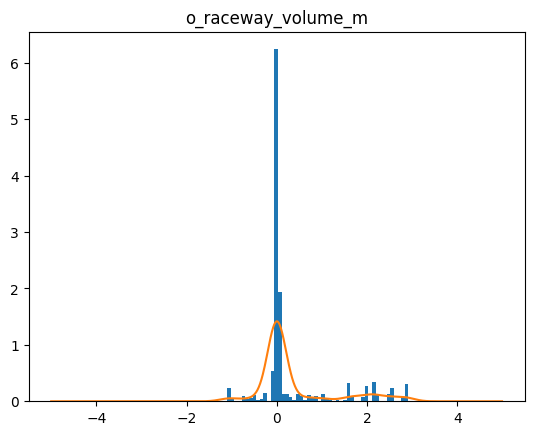

torch.Size([1000])
3051  loss=  tensor(2.6336, grad_fn=<MeanBackward0>)
3052  loss=  tensor(2.6115, grad_fn=<MeanBackward0>)
3053  loss=  tensor(2.6108, grad_fn=<MeanBackward0>)
3054  loss=  tensor(2.6446, grad_fn=<MeanBackward0>)
3055  loss=  tensor(2.6180, grad_fn=<MeanBackward0>)
3056  loss=  tensor(2.6122, grad_fn=<MeanBackward0>)
3057  loss=  tensor(2.6250, grad_fn=<MeanBackward0>)
3058  loss=  tensor(2.6160, grad_fn=<MeanBackward0>)
3059  loss=  tensor(2.6271, grad_fn=<MeanBackward0>)
3060  loss=  tensor(2.6258, grad_fn=<MeanBackward0>)
3061  loss=  tensor(2.6322, grad_fn=<MeanBackward0>)
3062  loss=  tensor(2.6106, grad_fn=<MeanBackward0>)
3063  loss=  tensor(2.6238, grad_fn=<MeanBackward0>)
3064  loss=  tensor(2.6326, grad_fn=<MeanBackward0>)
3065  loss=  tensor(2.5952, grad_fn=<MeanBackward0>)
3066  loss=  tensor(2.6133, grad_fn=<MeanBackward0>)
3067  loss=  tensor(2.6288, grad_fn=<MeanBackward0>)
3068  loss=  tensor(2.6308, grad_fn=<MeanBackward0>)
3069  loss=  tensor(2.5873,

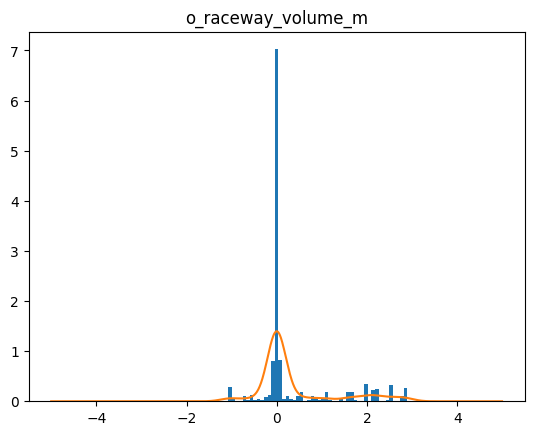

torch.Size([1000])
3101  loss=  tensor(2.6325, grad_fn=<MeanBackward0>)
3102  loss=  tensor(2.6330, grad_fn=<MeanBackward0>)
3103  loss=  tensor(2.6228, grad_fn=<MeanBackward0>)
3104  loss=  tensor(2.6050, grad_fn=<MeanBackward0>)
3105  loss=  tensor(2.6224, grad_fn=<MeanBackward0>)
3106  loss=  tensor(2.6313, grad_fn=<MeanBackward0>)
3107  loss=  tensor(2.6239, grad_fn=<MeanBackward0>)
3108  loss=  tensor(2.6373, grad_fn=<MeanBackward0>)
3109  loss=  tensor(2.6167, grad_fn=<MeanBackward0>)
3110  loss=  tensor(2.5991, grad_fn=<MeanBackward0>)
3111  loss=  tensor(2.6061, grad_fn=<MeanBackward0>)
3112  loss=  tensor(2.6121, grad_fn=<MeanBackward0>)
3113  loss=  tensor(2.6190, grad_fn=<MeanBackward0>)
3114  loss=  tensor(2.6056, grad_fn=<MeanBackward0>)
3115  loss=  tensor(2.6467, grad_fn=<MeanBackward0>)
3116  loss=  tensor(2.6055, grad_fn=<MeanBackward0>)
3117  loss=  tensor(2.6320, grad_fn=<MeanBackward0>)
3118  loss=  tensor(2.6448, grad_fn=<MeanBackward0>)
3119  loss=  tensor(2.6344,

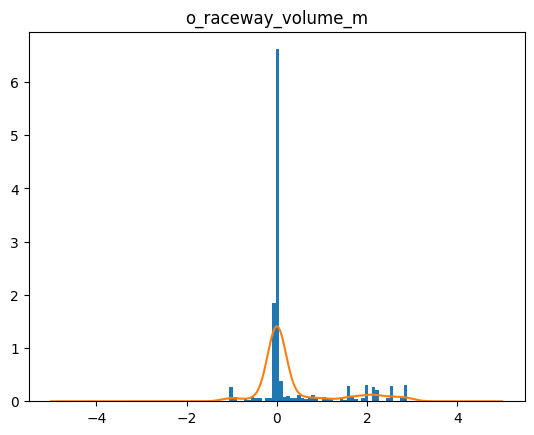

torch.Size([1000])
3151  loss=  tensor(2.6060, grad_fn=<MeanBackward0>)
3152  loss=  tensor(2.6529, grad_fn=<MeanBackward0>)
3153  loss=  tensor(2.6357, grad_fn=<MeanBackward0>)
3154  loss=  tensor(2.6036, grad_fn=<MeanBackward0>)
3155  loss=  tensor(2.6226, grad_fn=<MeanBackward0>)
3156  loss=  tensor(2.5936, grad_fn=<MeanBackward0>)
3157  loss=  tensor(2.6328, grad_fn=<MeanBackward0>)
3158  loss=  tensor(2.6184, grad_fn=<MeanBackward0>)
3159  loss=  tensor(2.6297, grad_fn=<MeanBackward0>)
3160  loss=  tensor(2.6143, grad_fn=<MeanBackward0>)
3161  loss=  tensor(2.6171, grad_fn=<MeanBackward0>)
3162  loss=  tensor(2.6220, grad_fn=<MeanBackward0>)
3163  loss=  tensor(2.6400, grad_fn=<MeanBackward0>)
3164  loss=  tensor(2.6287, grad_fn=<MeanBackward0>)
3165  loss=  tensor(2.6320, grad_fn=<MeanBackward0>)
3166  loss=  tensor(2.6242, grad_fn=<MeanBackward0>)
3167  loss=  tensor(2.6096, grad_fn=<MeanBackward0>)
3168  loss=  tensor(2.5926, grad_fn=<MeanBackward0>)
3169  loss=  tensor(2.6140,

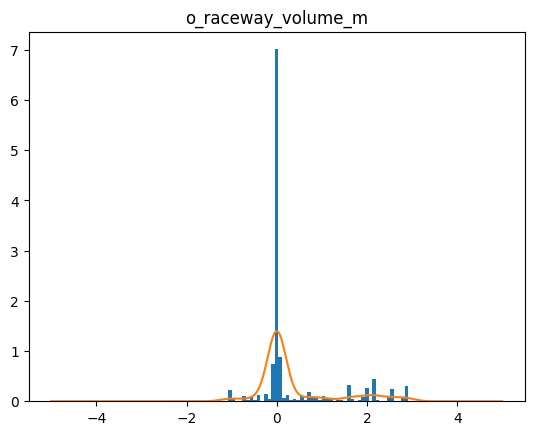

torch.Size([1000])
3201  loss=  tensor(2.6215, grad_fn=<MeanBackward0>)
3202  loss=  tensor(2.6028, grad_fn=<MeanBackward0>)
3203  loss=  tensor(2.6042, grad_fn=<MeanBackward0>)
3204  loss=  tensor(2.6273, grad_fn=<MeanBackward0>)
3205  loss=  tensor(2.6048, grad_fn=<MeanBackward0>)
3206  loss=  tensor(2.6195, grad_fn=<MeanBackward0>)
3207  loss=  tensor(2.6190, grad_fn=<MeanBackward0>)
3208  loss=  tensor(2.6128, grad_fn=<MeanBackward0>)
3209  loss=  tensor(2.5928, grad_fn=<MeanBackward0>)
3210  loss=  tensor(2.6267, grad_fn=<MeanBackward0>)
3211  loss=  tensor(2.6095, grad_fn=<MeanBackward0>)
3212  loss=  tensor(2.6138, grad_fn=<MeanBackward0>)
3213  loss=  tensor(2.6202, grad_fn=<MeanBackward0>)
3214  loss=  tensor(2.5949, grad_fn=<MeanBackward0>)
3215  loss=  tensor(2.6126, grad_fn=<MeanBackward0>)
3216  loss=  tensor(2.6223, grad_fn=<MeanBackward0>)
3217  loss=  tensor(2.6077, grad_fn=<MeanBackward0>)
3218  loss=  tensor(2.6245, grad_fn=<MeanBackward0>)
3219  loss=  tensor(2.5852,

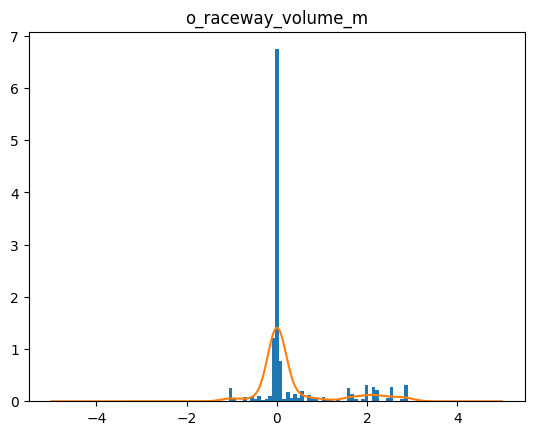

torch.Size([1000])
3251  loss=  tensor(2.6166, grad_fn=<MeanBackward0>)
3252  loss=  tensor(2.5995, grad_fn=<MeanBackward0>)
3253  loss=  tensor(2.6026, grad_fn=<MeanBackward0>)
3254  loss=  tensor(2.5769, grad_fn=<MeanBackward0>)
3255  loss=  tensor(2.5852, grad_fn=<MeanBackward0>)
3256  loss=  tensor(2.6386, grad_fn=<MeanBackward0>)
3257  loss=  tensor(2.5799, grad_fn=<MeanBackward0>)
3258  loss=  tensor(2.6363, grad_fn=<MeanBackward0>)
3259  loss=  tensor(2.5843, grad_fn=<MeanBackward0>)
3260  loss=  tensor(2.6791, grad_fn=<MeanBackward0>)
3261  loss=  tensor(2.6296, grad_fn=<MeanBackward0>)
3262  loss=  tensor(2.5925, grad_fn=<MeanBackward0>)
3263  loss=  tensor(2.6330, grad_fn=<MeanBackward0>)
3264  loss=  tensor(2.5965, grad_fn=<MeanBackward0>)
3265  loss=  tensor(2.5902, grad_fn=<MeanBackward0>)
3266  loss=  tensor(2.6037, grad_fn=<MeanBackward0>)
3267  loss=  tensor(2.6177, grad_fn=<MeanBackward0>)
3268  loss=  tensor(2.6266, grad_fn=<MeanBackward0>)
3269  loss=  tensor(2.6169,

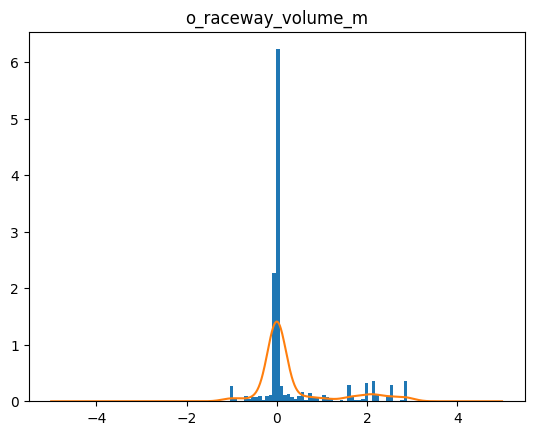

torch.Size([1000])
3301  loss=  tensor(2.5984, grad_fn=<MeanBackward0>)
3302  loss=  tensor(2.6058, grad_fn=<MeanBackward0>)
3303  loss=  tensor(2.6261, grad_fn=<MeanBackward0>)
3304  loss=  tensor(2.6184, grad_fn=<MeanBackward0>)
3305  loss=  tensor(2.6031, grad_fn=<MeanBackward0>)
3306  loss=  tensor(2.6663, grad_fn=<MeanBackward0>)
3307  loss=  tensor(2.6133, grad_fn=<MeanBackward0>)
3308  loss=  tensor(2.5967, grad_fn=<MeanBackward0>)
3309  loss=  tensor(2.6060, grad_fn=<MeanBackward0>)
3310  loss=  tensor(2.6472, grad_fn=<MeanBackward0>)
3311  loss=  tensor(2.5994, grad_fn=<MeanBackward0>)
3312  loss=  tensor(2.5903, grad_fn=<MeanBackward0>)
3313  loss=  tensor(2.6095, grad_fn=<MeanBackward0>)
3314  loss=  tensor(2.6402, grad_fn=<MeanBackward0>)
3315  loss=  tensor(2.5927, grad_fn=<MeanBackward0>)
3316  loss=  tensor(2.5988, grad_fn=<MeanBackward0>)
3317  loss=  tensor(2.6202, grad_fn=<MeanBackward0>)
3318  loss=  tensor(2.6044, grad_fn=<MeanBackward0>)
3319  loss=  tensor(2.6073,

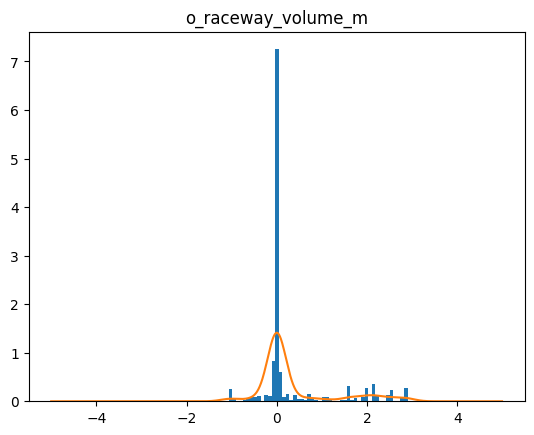

torch.Size([1000])
3351  loss=  tensor(2.5749, grad_fn=<MeanBackward0>)
3352  loss=  tensor(2.6201, grad_fn=<MeanBackward0>)
3353  loss=  tensor(2.6689, grad_fn=<MeanBackward0>)
3354  loss=  tensor(2.5929, grad_fn=<MeanBackward0>)
3355  loss=  tensor(2.6109, grad_fn=<MeanBackward0>)
3356  loss=  tensor(2.6273, grad_fn=<MeanBackward0>)
3357  loss=  tensor(2.5876, grad_fn=<MeanBackward0>)
3358  loss=  tensor(2.6302, grad_fn=<MeanBackward0>)
3359  loss=  tensor(2.5916, grad_fn=<MeanBackward0>)
3360  loss=  tensor(2.6395, grad_fn=<MeanBackward0>)
3361  loss=  tensor(2.6132, grad_fn=<MeanBackward0>)
3362  loss=  tensor(2.6097, grad_fn=<MeanBackward0>)
3363  loss=  tensor(2.6091, grad_fn=<MeanBackward0>)
3364  loss=  tensor(2.6194, grad_fn=<MeanBackward0>)
3365  loss=  tensor(2.6424, grad_fn=<MeanBackward0>)
3366  loss=  tensor(2.6178, grad_fn=<MeanBackward0>)
3367  loss=  tensor(2.6033, grad_fn=<MeanBackward0>)
3368  loss=  tensor(2.5948, grad_fn=<MeanBackward0>)
3369  loss=  tensor(2.6374,

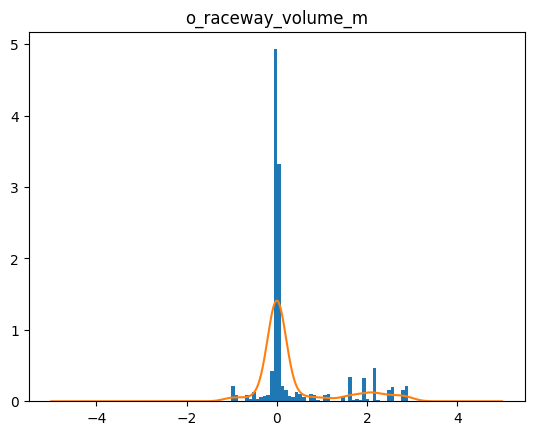

torch.Size([1000])
3401  loss=  tensor(2.6311, grad_fn=<MeanBackward0>)
3402  loss=  tensor(2.6202, grad_fn=<MeanBackward0>)
3403  loss=  tensor(2.6319, grad_fn=<MeanBackward0>)
3404  loss=  tensor(2.5840, grad_fn=<MeanBackward0>)
3405  loss=  tensor(2.6128, grad_fn=<MeanBackward0>)
3406  loss=  tensor(2.6002, grad_fn=<MeanBackward0>)
3407  loss=  tensor(2.6329, grad_fn=<MeanBackward0>)
3408  loss=  tensor(2.6024, grad_fn=<MeanBackward0>)
3409  loss=  tensor(2.6007, grad_fn=<MeanBackward0>)
3410  loss=  tensor(2.5957, grad_fn=<MeanBackward0>)
3411  loss=  tensor(2.6047, grad_fn=<MeanBackward0>)
3412  loss=  tensor(2.6686, grad_fn=<MeanBackward0>)
3413  loss=  tensor(2.6119, grad_fn=<MeanBackward0>)
3414  loss=  tensor(2.6207, grad_fn=<MeanBackward0>)
3415  loss=  tensor(2.6056, grad_fn=<MeanBackward0>)
3416  loss=  tensor(2.5833, grad_fn=<MeanBackward0>)
3417  loss=  tensor(2.5892, grad_fn=<MeanBackward0>)
3418  loss=  tensor(2.6527, grad_fn=<MeanBackward0>)
3419  loss=  tensor(2.6287,

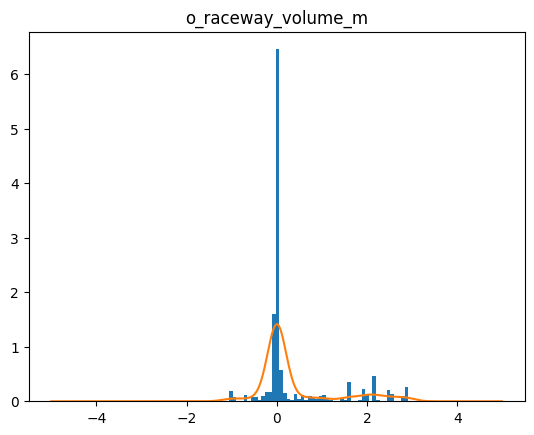

torch.Size([1000])
3451  loss=  tensor(2.6092, grad_fn=<MeanBackward0>)
3452  loss=  tensor(2.6137, grad_fn=<MeanBackward0>)
3453  loss=  tensor(2.6763, grad_fn=<MeanBackward0>)
3454  loss=  tensor(2.6124, grad_fn=<MeanBackward0>)
3455  loss=  tensor(2.6153, grad_fn=<MeanBackward0>)
3456  loss=  tensor(2.6120, grad_fn=<MeanBackward0>)
3457  loss=  tensor(2.6038, grad_fn=<MeanBackward0>)
3458  loss=  tensor(2.6119, grad_fn=<MeanBackward0>)
3459  loss=  tensor(2.6214, grad_fn=<MeanBackward0>)
3460  loss=  tensor(2.6218, grad_fn=<MeanBackward0>)
3461  loss=  tensor(2.6344, grad_fn=<MeanBackward0>)
3462  loss=  tensor(2.6043, grad_fn=<MeanBackward0>)
3463  loss=  tensor(2.6232, grad_fn=<MeanBackward0>)
3464  loss=  tensor(2.6262, grad_fn=<MeanBackward0>)
3465  loss=  tensor(2.6235, grad_fn=<MeanBackward0>)
3466  loss=  tensor(2.6305, grad_fn=<MeanBackward0>)
3467  loss=  tensor(2.6314, grad_fn=<MeanBackward0>)
3468  loss=  tensor(2.6054, grad_fn=<MeanBackward0>)
3469  loss=  tensor(2.6142,

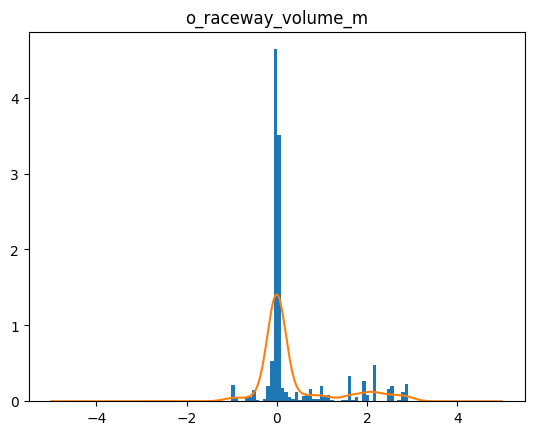

torch.Size([1000])
3501  loss=  tensor(2.6038, grad_fn=<MeanBackward0>)
3502  loss=  tensor(2.6108, grad_fn=<MeanBackward0>)
3503  loss=  tensor(2.6207, grad_fn=<MeanBackward0>)
3504  loss=  tensor(2.6168, grad_fn=<MeanBackward0>)
3505  loss=  tensor(2.5986, grad_fn=<MeanBackward0>)
3506  loss=  tensor(2.6347, grad_fn=<MeanBackward0>)
3507  loss=  tensor(2.6000, grad_fn=<MeanBackward0>)
3508  loss=  tensor(2.6028, grad_fn=<MeanBackward0>)
3509  loss=  tensor(2.6186, grad_fn=<MeanBackward0>)
3510  loss=  tensor(2.6259, grad_fn=<MeanBackward0>)
3511  loss=  tensor(2.5921, grad_fn=<MeanBackward0>)
3512  loss=  tensor(2.6496, grad_fn=<MeanBackward0>)
3513  loss=  tensor(2.6021, grad_fn=<MeanBackward0>)
3514  loss=  tensor(2.6068, grad_fn=<MeanBackward0>)
3515  loss=  tensor(2.6206, grad_fn=<MeanBackward0>)
3516  loss=  tensor(2.6327, grad_fn=<MeanBackward0>)
3517  loss=  tensor(2.5904, grad_fn=<MeanBackward0>)
3518  loss=  tensor(2.6366, grad_fn=<MeanBackward0>)
3519  loss=  tensor(2.6305,

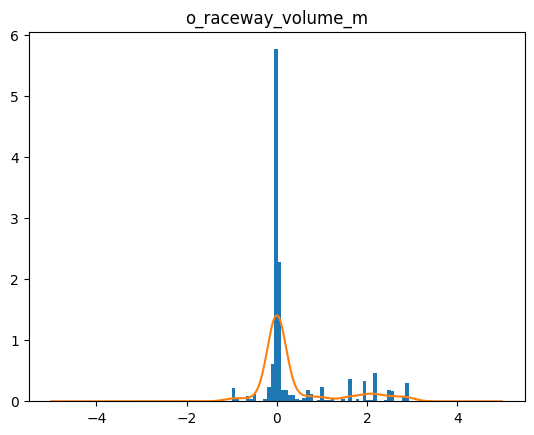

torch.Size([1000])
3551  loss=  tensor(2.6253, grad_fn=<MeanBackward0>)
3552  loss=  tensor(2.6093, grad_fn=<MeanBackward0>)
3553  loss=  tensor(2.6040, grad_fn=<MeanBackward0>)
3554  loss=  tensor(2.5997, grad_fn=<MeanBackward0>)
3555  loss=  tensor(2.6310, grad_fn=<MeanBackward0>)
3556  loss=  tensor(2.5719, grad_fn=<MeanBackward0>)
3557  loss=  tensor(2.5969, grad_fn=<MeanBackward0>)
3558  loss=  tensor(2.6029, grad_fn=<MeanBackward0>)
3559  loss=  tensor(2.6111, grad_fn=<MeanBackward0>)
3560  loss=  tensor(2.5968, grad_fn=<MeanBackward0>)
3561  loss=  tensor(2.5714, grad_fn=<MeanBackward0>)
3562  loss=  tensor(2.6283, grad_fn=<MeanBackward0>)
3563  loss=  tensor(2.5993, grad_fn=<MeanBackward0>)
3564  loss=  tensor(2.5939, grad_fn=<MeanBackward0>)
3565  loss=  tensor(2.6231, grad_fn=<MeanBackward0>)
3566  loss=  tensor(2.6038, grad_fn=<MeanBackward0>)
3567  loss=  tensor(2.6104, grad_fn=<MeanBackward0>)
3568  loss=  tensor(2.5945, grad_fn=<MeanBackward0>)
3569  loss=  tensor(2.6171,

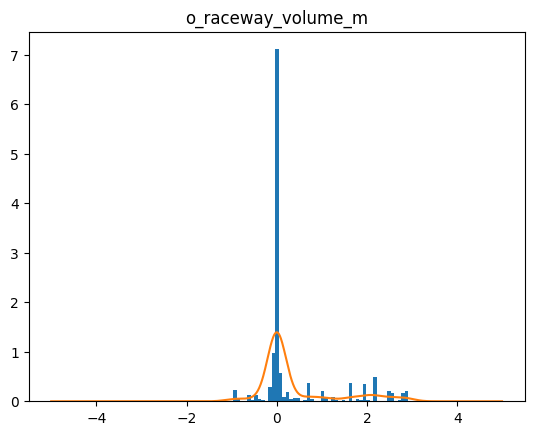

torch.Size([1000])
3601  loss=  tensor(2.5939, grad_fn=<MeanBackward0>)
3602  loss=  tensor(2.6401, grad_fn=<MeanBackward0>)
3603  loss=  tensor(2.6108, grad_fn=<MeanBackward0>)
3604  loss=  tensor(2.6123, grad_fn=<MeanBackward0>)
3605  loss=  tensor(2.6101, grad_fn=<MeanBackward0>)
3606  loss=  tensor(2.6251, grad_fn=<MeanBackward0>)
3607  loss=  tensor(2.6232, grad_fn=<MeanBackward0>)
3608  loss=  tensor(2.6132, grad_fn=<MeanBackward0>)
3609  loss=  tensor(2.6449, grad_fn=<MeanBackward0>)
3610  loss=  tensor(2.6258, grad_fn=<MeanBackward0>)
3611  loss=  tensor(2.6228, grad_fn=<MeanBackward0>)
3612  loss=  tensor(2.6235, grad_fn=<MeanBackward0>)
3613  loss=  tensor(2.6250, grad_fn=<MeanBackward0>)
3614  loss=  tensor(2.6015, grad_fn=<MeanBackward0>)
3615  loss=  tensor(2.6253, grad_fn=<MeanBackward0>)
3616  loss=  tensor(2.6300, grad_fn=<MeanBackward0>)
3617  loss=  tensor(2.5971, grad_fn=<MeanBackward0>)
3618  loss=  tensor(2.6217, grad_fn=<MeanBackward0>)
3619  loss=  tensor(2.6257,

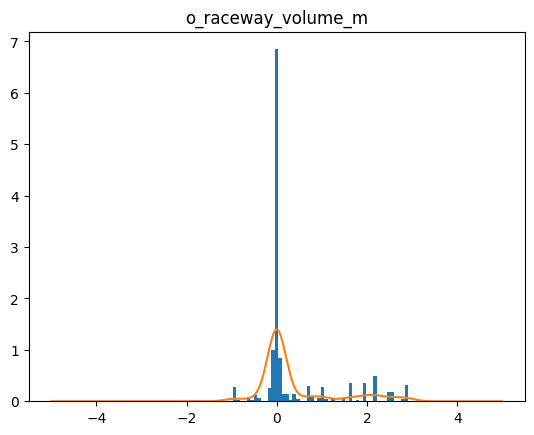

torch.Size([1000])
3651  loss=  tensor(2.6070, grad_fn=<MeanBackward0>)
3652  loss=  tensor(2.6052, grad_fn=<MeanBackward0>)
3653  loss=  tensor(2.5959, grad_fn=<MeanBackward0>)
3654  loss=  tensor(2.6311, grad_fn=<MeanBackward0>)
3655  loss=  tensor(2.5956, grad_fn=<MeanBackward0>)
3656  loss=  tensor(2.6030, grad_fn=<MeanBackward0>)
3657  loss=  tensor(2.5962, grad_fn=<MeanBackward0>)
3658  loss=  tensor(2.6038, grad_fn=<MeanBackward0>)
3659  loss=  tensor(2.6123, grad_fn=<MeanBackward0>)
3660  loss=  tensor(2.6158, grad_fn=<MeanBackward0>)
3661  loss=  tensor(2.6068, grad_fn=<MeanBackward0>)
3662  loss=  tensor(2.5818, grad_fn=<MeanBackward0>)
3663  loss=  tensor(2.6137, grad_fn=<MeanBackward0>)
3664  loss=  tensor(2.6204, grad_fn=<MeanBackward0>)
3665  loss=  tensor(2.5912, grad_fn=<MeanBackward0>)
3666  loss=  tensor(2.6102, grad_fn=<MeanBackward0>)
3667  loss=  tensor(2.6181, grad_fn=<MeanBackward0>)
3668  loss=  tensor(2.6097, grad_fn=<MeanBackward0>)
3669  loss=  tensor(2.5782,

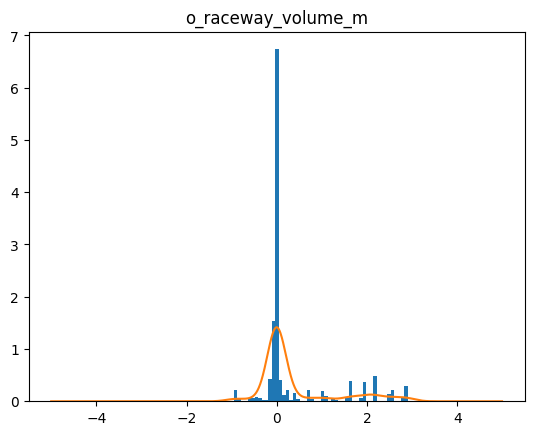

torch.Size([1000])
3701  loss=  tensor(2.6147, grad_fn=<MeanBackward0>)
3702  loss=  tensor(2.6203, grad_fn=<MeanBackward0>)
3703  loss=  tensor(2.6073, grad_fn=<MeanBackward0>)
3704  loss=  tensor(2.5837, grad_fn=<MeanBackward0>)
3705  loss=  tensor(2.6031, grad_fn=<MeanBackward0>)
3706  loss=  tensor(2.5932, grad_fn=<MeanBackward0>)
3707  loss=  tensor(2.5975, grad_fn=<MeanBackward0>)
3708  loss=  tensor(2.6088, grad_fn=<MeanBackward0>)
3709  loss=  tensor(2.5896, grad_fn=<MeanBackward0>)
3710  loss=  tensor(2.6177, grad_fn=<MeanBackward0>)
3711  loss=  tensor(2.6105, grad_fn=<MeanBackward0>)
3712  loss=  tensor(2.6152, grad_fn=<MeanBackward0>)
3713  loss=  tensor(2.6048, grad_fn=<MeanBackward0>)
3714  loss=  tensor(2.6015, grad_fn=<MeanBackward0>)
3715  loss=  tensor(2.5972, grad_fn=<MeanBackward0>)
3716  loss=  tensor(2.6148, grad_fn=<MeanBackward0>)
3717  loss=  tensor(2.5831, grad_fn=<MeanBackward0>)
3718  loss=  tensor(2.6208, grad_fn=<MeanBackward0>)
3719  loss=  tensor(2.5918,

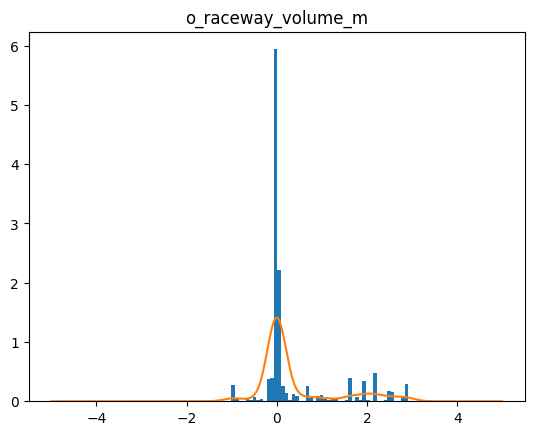

torch.Size([1000])
3751  loss=  tensor(2.6091, grad_fn=<MeanBackward0>)
3752  loss=  tensor(2.6131, grad_fn=<MeanBackward0>)
3753  loss=  tensor(2.5995, grad_fn=<MeanBackward0>)
3754  loss=  tensor(2.5773, grad_fn=<MeanBackward0>)
3755  loss=  tensor(2.6267, grad_fn=<MeanBackward0>)
3756  loss=  tensor(2.6387, grad_fn=<MeanBackward0>)
3757  loss=  tensor(2.6208, grad_fn=<MeanBackward0>)
3758  loss=  tensor(2.5754, grad_fn=<MeanBackward0>)
3759  loss=  tensor(2.6339, grad_fn=<MeanBackward0>)
3760  loss=  tensor(2.5920, grad_fn=<MeanBackward0>)
3761  loss=  tensor(2.6292, grad_fn=<MeanBackward0>)
3762  loss=  tensor(2.5800, grad_fn=<MeanBackward0>)
3763  loss=  tensor(2.5872, grad_fn=<MeanBackward0>)
3764  loss=  tensor(2.6041, grad_fn=<MeanBackward0>)
3765  loss=  tensor(2.6140, grad_fn=<MeanBackward0>)
3766  loss=  tensor(2.6157, grad_fn=<MeanBackward0>)
3767  loss=  tensor(2.5981, grad_fn=<MeanBackward0>)
3768  loss=  tensor(2.5814, grad_fn=<MeanBackward0>)
3769  loss=  tensor(2.6434,

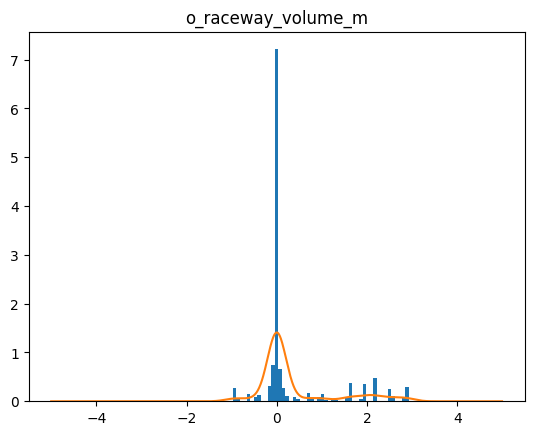

torch.Size([1000])
3801  loss=  tensor(2.5911, grad_fn=<MeanBackward0>)
3802  loss=  tensor(2.6179, grad_fn=<MeanBackward0>)
3803  loss=  tensor(2.5795, grad_fn=<MeanBackward0>)
3804  loss=  tensor(2.6211, grad_fn=<MeanBackward0>)
3805  loss=  tensor(2.5960, grad_fn=<MeanBackward0>)
3806  loss=  tensor(2.6301, grad_fn=<MeanBackward0>)
3807  loss=  tensor(2.6078, grad_fn=<MeanBackward0>)
3808  loss=  tensor(2.6030, grad_fn=<MeanBackward0>)
3809  loss=  tensor(2.6114, grad_fn=<MeanBackward0>)
3810  loss=  tensor(2.6141, grad_fn=<MeanBackward0>)
3811  loss=  tensor(2.6386, grad_fn=<MeanBackward0>)
3812  loss=  tensor(2.5972, grad_fn=<MeanBackward0>)
3813  loss=  tensor(2.6351, grad_fn=<MeanBackward0>)
3814  loss=  tensor(2.6304, grad_fn=<MeanBackward0>)
3815  loss=  tensor(2.6191, grad_fn=<MeanBackward0>)
3816  loss=  tensor(2.5509, grad_fn=<MeanBackward0>)
3817  loss=  tensor(2.5739, grad_fn=<MeanBackward0>)
3818  loss=  tensor(2.6171, grad_fn=<MeanBackward0>)
3819  loss=  tensor(2.5934,

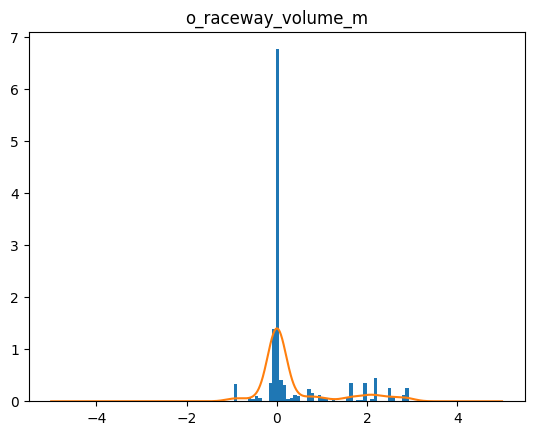

torch.Size([1000])
3851  loss=  tensor(2.6067, grad_fn=<MeanBackward0>)
3852  loss=  tensor(2.6056, grad_fn=<MeanBackward0>)
3853  loss=  tensor(2.6253, grad_fn=<MeanBackward0>)
3854  loss=  tensor(2.6170, grad_fn=<MeanBackward0>)
3855  loss=  tensor(2.5884, grad_fn=<MeanBackward0>)
3856  loss=  tensor(2.6394, grad_fn=<MeanBackward0>)
3857  loss=  tensor(2.6092, grad_fn=<MeanBackward0>)
3858  loss=  tensor(2.6228, grad_fn=<MeanBackward0>)
3859  loss=  tensor(2.5858, grad_fn=<MeanBackward0>)
3860  loss=  tensor(2.5999, grad_fn=<MeanBackward0>)
3861  loss=  tensor(2.6000, grad_fn=<MeanBackward0>)
3862  loss=  tensor(2.5877, grad_fn=<MeanBackward0>)
3863  loss=  tensor(2.6131, grad_fn=<MeanBackward0>)
3864  loss=  tensor(2.5840, grad_fn=<MeanBackward0>)
3865  loss=  tensor(2.5984, grad_fn=<MeanBackward0>)
3866  loss=  tensor(2.6114, grad_fn=<MeanBackward0>)
3867  loss=  tensor(2.6120, grad_fn=<MeanBackward0>)
3868  loss=  tensor(2.5966, grad_fn=<MeanBackward0>)
3869  loss=  tensor(2.6105,

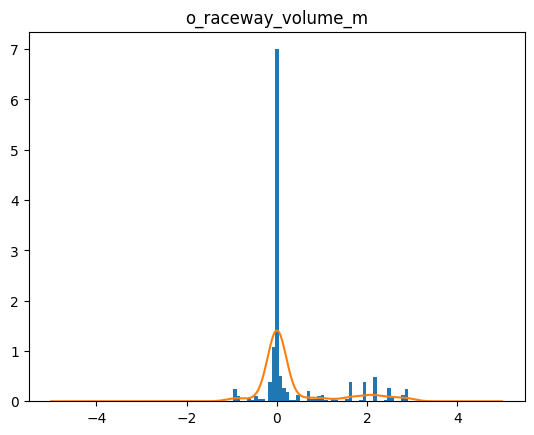

torch.Size([1000])
3901  loss=  tensor(2.6034, grad_fn=<MeanBackward0>)
3902  loss=  tensor(2.6156, grad_fn=<MeanBackward0>)
3903  loss=  tensor(2.6033, grad_fn=<MeanBackward0>)
3904  loss=  tensor(2.6119, grad_fn=<MeanBackward0>)
3905  loss=  tensor(2.6367, grad_fn=<MeanBackward0>)
3906  loss=  tensor(2.5950, grad_fn=<MeanBackward0>)
3907  loss=  tensor(2.5968, grad_fn=<MeanBackward0>)
3908  loss=  tensor(2.6009, grad_fn=<MeanBackward0>)
3909  loss=  tensor(2.6197, grad_fn=<MeanBackward0>)
3910  loss=  tensor(2.5755, grad_fn=<MeanBackward0>)
3911  loss=  tensor(2.6223, grad_fn=<MeanBackward0>)
3912  loss=  tensor(2.6065, grad_fn=<MeanBackward0>)
3913  loss=  tensor(2.6011, grad_fn=<MeanBackward0>)
3914  loss=  tensor(2.5766, grad_fn=<MeanBackward0>)
3915  loss=  tensor(2.6026, grad_fn=<MeanBackward0>)
3916  loss=  tensor(2.6105, grad_fn=<MeanBackward0>)
3917  loss=  tensor(2.6097, grad_fn=<MeanBackward0>)
3918  loss=  tensor(2.6015, grad_fn=<MeanBackward0>)
3919  loss=  tensor(2.5803,

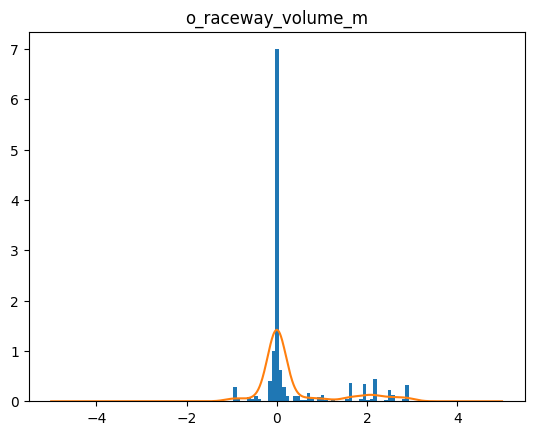

torch.Size([1000])
3951  loss=  tensor(2.5579, grad_fn=<MeanBackward0>)
3952  loss=  tensor(2.5960, grad_fn=<MeanBackward0>)
3953  loss=  tensor(2.6190, grad_fn=<MeanBackward0>)
3954  loss=  tensor(2.6363, grad_fn=<MeanBackward0>)
3955  loss=  tensor(2.6141, grad_fn=<MeanBackward0>)
3956  loss=  tensor(2.6290, grad_fn=<MeanBackward0>)
3957  loss=  tensor(2.5842, grad_fn=<MeanBackward0>)
3958  loss=  tensor(2.5940, grad_fn=<MeanBackward0>)
3959  loss=  tensor(2.6286, grad_fn=<MeanBackward0>)
3960  loss=  tensor(2.5998, grad_fn=<MeanBackward0>)
3961  loss=  tensor(2.6088, grad_fn=<MeanBackward0>)
3962  loss=  tensor(2.5515, grad_fn=<MeanBackward0>)
3963  loss=  tensor(2.6182, grad_fn=<MeanBackward0>)
3964  loss=  tensor(2.6010, grad_fn=<MeanBackward0>)
3965  loss=  tensor(2.6025, grad_fn=<MeanBackward0>)
3966  loss=  tensor(2.6161, grad_fn=<MeanBackward0>)
3967  loss=  tensor(2.6069, grad_fn=<MeanBackward0>)
3968  loss=  tensor(2.6114, grad_fn=<MeanBackward0>)
3969  loss=  tensor(2.6059,

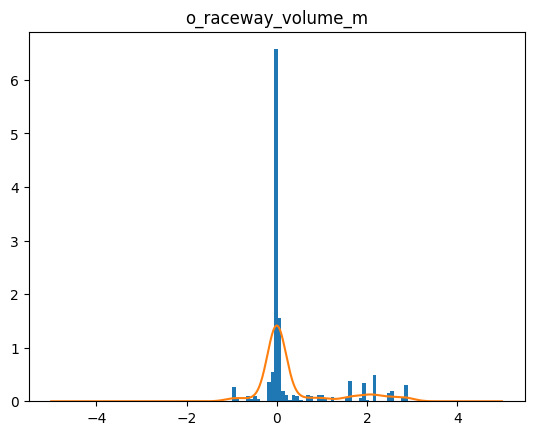

torch.Size([1000])
4001  loss=  tensor(2.6035, grad_fn=<MeanBackward0>)
4002  loss=  tensor(2.6255, grad_fn=<MeanBackward0>)
4003  loss=  tensor(2.6092, grad_fn=<MeanBackward0>)
4004  loss=  tensor(2.6394, grad_fn=<MeanBackward0>)
4005  loss=  tensor(2.6127, grad_fn=<MeanBackward0>)
4006  loss=  tensor(2.6132, grad_fn=<MeanBackward0>)
4007  loss=  tensor(2.6295, grad_fn=<MeanBackward0>)
4008  loss=  tensor(2.6114, grad_fn=<MeanBackward0>)
4009  loss=  tensor(2.6107, grad_fn=<MeanBackward0>)
4010  loss=  tensor(2.5952, grad_fn=<MeanBackward0>)
4011  loss=  tensor(2.6087, grad_fn=<MeanBackward0>)
4012  loss=  tensor(2.5901, grad_fn=<MeanBackward0>)
4013  loss=  tensor(2.5787, grad_fn=<MeanBackward0>)
4014  loss=  tensor(2.5651, grad_fn=<MeanBackward0>)
4015  loss=  tensor(2.6055, grad_fn=<MeanBackward0>)
4016  loss=  tensor(2.6144, grad_fn=<MeanBackward0>)
4017  loss=  tensor(2.6417, grad_fn=<MeanBackward0>)
4018  loss=  tensor(2.5922, grad_fn=<MeanBackward0>)
4019  loss=  tensor(2.6270,

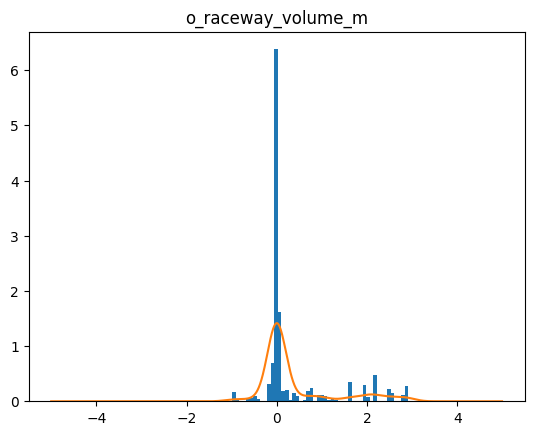

torch.Size([1000])
4051  loss=  tensor(2.6042, grad_fn=<MeanBackward0>)
4052  loss=  tensor(2.5933, grad_fn=<MeanBackward0>)
4053  loss=  tensor(2.6036, grad_fn=<MeanBackward0>)
4054  loss=  tensor(2.6234, grad_fn=<MeanBackward0>)
4055  loss=  tensor(2.6054, grad_fn=<MeanBackward0>)
4056  loss=  tensor(2.5845, grad_fn=<MeanBackward0>)
4057  loss=  tensor(2.6099, grad_fn=<MeanBackward0>)
4058  loss=  tensor(2.6018, grad_fn=<MeanBackward0>)
4059  loss=  tensor(2.5710, grad_fn=<MeanBackward0>)
4060  loss=  tensor(2.5859, grad_fn=<MeanBackward0>)
4061  loss=  tensor(2.6161, grad_fn=<MeanBackward0>)
4062  loss=  tensor(2.6621, grad_fn=<MeanBackward0>)
4063  loss=  tensor(2.6424, grad_fn=<MeanBackward0>)
4064  loss=  tensor(2.5807, grad_fn=<MeanBackward0>)
4065  loss=  tensor(2.6329, grad_fn=<MeanBackward0>)
4066  loss=  tensor(2.6177, grad_fn=<MeanBackward0>)
4067  loss=  tensor(2.6203, grad_fn=<MeanBackward0>)
4068  loss=  tensor(2.5991, grad_fn=<MeanBackward0>)
4069  loss=  tensor(2.5969,

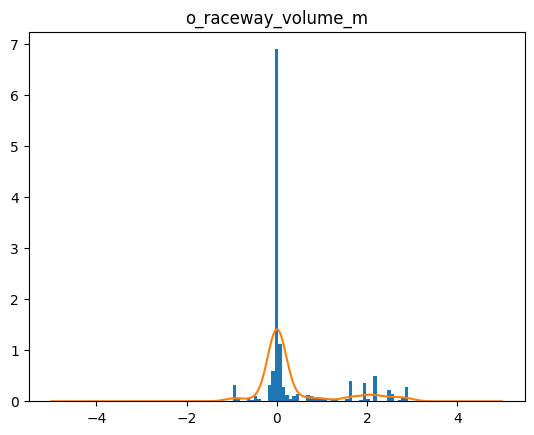

torch.Size([1000])
4101  loss=  tensor(2.5852, grad_fn=<MeanBackward0>)
4102  loss=  tensor(2.6145, grad_fn=<MeanBackward0>)
4103  loss=  tensor(2.5947, grad_fn=<MeanBackward0>)
4104  loss=  tensor(2.5935, grad_fn=<MeanBackward0>)
4105  loss=  tensor(2.6183, grad_fn=<MeanBackward0>)
4106  loss=  tensor(2.6408, grad_fn=<MeanBackward0>)
4107  loss=  tensor(2.6092, grad_fn=<MeanBackward0>)
4108  loss=  tensor(2.6232, grad_fn=<MeanBackward0>)
4109  loss=  tensor(2.5842, grad_fn=<MeanBackward0>)
4110  loss=  tensor(2.6506, grad_fn=<MeanBackward0>)
4111  loss=  tensor(2.5913, grad_fn=<MeanBackward0>)
4112  loss=  tensor(2.5774, grad_fn=<MeanBackward0>)
4113  loss=  tensor(2.5709, grad_fn=<MeanBackward0>)
4114  loss=  tensor(2.5892, grad_fn=<MeanBackward0>)
4115  loss=  tensor(2.5796, grad_fn=<MeanBackward0>)
4116  loss=  tensor(2.6076, grad_fn=<MeanBackward0>)
4117  loss=  tensor(2.6143, grad_fn=<MeanBackward0>)
4118  loss=  tensor(2.5738, grad_fn=<MeanBackward0>)
4119  loss=  tensor(2.6127,

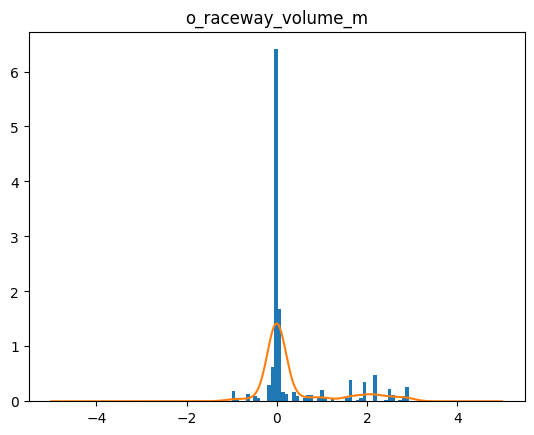

torch.Size([1000])
4151  loss=  tensor(2.5953, grad_fn=<MeanBackward0>)
4152  loss=  tensor(2.6259, grad_fn=<MeanBackward0>)
4153  loss=  tensor(2.6315, grad_fn=<MeanBackward0>)
4154  loss=  tensor(2.6175, grad_fn=<MeanBackward0>)
4155  loss=  tensor(2.5802, grad_fn=<MeanBackward0>)
4156  loss=  tensor(2.6071, grad_fn=<MeanBackward0>)
4157  loss=  tensor(2.6603, grad_fn=<MeanBackward0>)
4158  loss=  tensor(2.5870, grad_fn=<MeanBackward0>)
4159  loss=  tensor(2.5986, grad_fn=<MeanBackward0>)
4160  loss=  tensor(2.6165, grad_fn=<MeanBackward0>)
4161  loss=  tensor(2.6185, grad_fn=<MeanBackward0>)
4162  loss=  tensor(2.5956, grad_fn=<MeanBackward0>)
4163  loss=  tensor(2.6058, grad_fn=<MeanBackward0>)
4164  loss=  tensor(2.5956, grad_fn=<MeanBackward0>)
4165  loss=  tensor(2.6067, grad_fn=<MeanBackward0>)
4166  loss=  tensor(2.5911, grad_fn=<MeanBackward0>)
4167  loss=  tensor(2.6121, grad_fn=<MeanBackward0>)
4168  loss=  tensor(2.5989, grad_fn=<MeanBackward0>)
4169  loss=  tensor(2.6260,

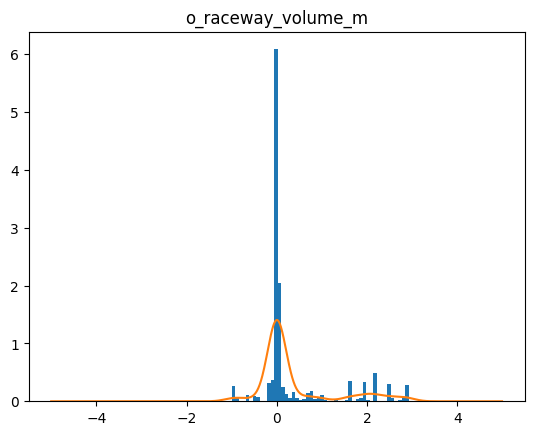

torch.Size([1000])
4201  loss=  tensor(2.6087, grad_fn=<MeanBackward0>)
4202  loss=  tensor(2.6205, grad_fn=<MeanBackward0>)
4203  loss=  tensor(2.5944, grad_fn=<MeanBackward0>)
4204  loss=  tensor(2.5912, grad_fn=<MeanBackward0>)
4205  loss=  tensor(2.6129, grad_fn=<MeanBackward0>)
4206  loss=  tensor(2.5983, grad_fn=<MeanBackward0>)
4207  loss=  tensor(2.6248, grad_fn=<MeanBackward0>)
4208  loss=  tensor(2.6067, grad_fn=<MeanBackward0>)
4209  loss=  tensor(2.5833, grad_fn=<MeanBackward0>)
4210  loss=  tensor(2.6080, grad_fn=<MeanBackward0>)
4211  loss=  tensor(2.6455, grad_fn=<MeanBackward0>)
4212  loss=  tensor(2.6208, grad_fn=<MeanBackward0>)
4213  loss=  tensor(2.6305, grad_fn=<MeanBackward0>)
4214  loss=  tensor(2.5887, grad_fn=<MeanBackward0>)
4215  loss=  tensor(2.5995, grad_fn=<MeanBackward0>)
4216  loss=  tensor(2.6058, grad_fn=<MeanBackward0>)
4217  loss=  tensor(2.5999, grad_fn=<MeanBackward0>)
4218  loss=  tensor(2.6110, grad_fn=<MeanBackward0>)
4219  loss=  tensor(2.5701,

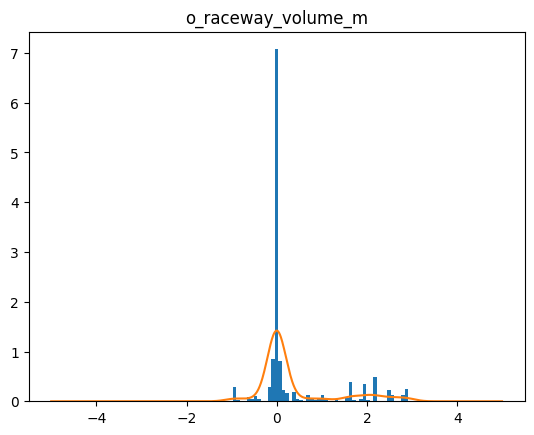

torch.Size([1000])
4251  loss=  tensor(2.5945, grad_fn=<MeanBackward0>)
4252  loss=  tensor(2.5903, grad_fn=<MeanBackward0>)
4253  loss=  tensor(2.6084, grad_fn=<MeanBackward0>)
4254  loss=  tensor(2.6250, grad_fn=<MeanBackward0>)
4255  loss=  tensor(2.5880, grad_fn=<MeanBackward0>)
4256  loss=  tensor(2.5871, grad_fn=<MeanBackward0>)
4257  loss=  tensor(2.6212, grad_fn=<MeanBackward0>)
4258  loss=  tensor(2.5894, grad_fn=<MeanBackward0>)
4259  loss=  tensor(2.5784, grad_fn=<MeanBackward0>)
4260  loss=  tensor(2.5983, grad_fn=<MeanBackward0>)
4261  loss=  tensor(2.6131, grad_fn=<MeanBackward0>)
4262  loss=  tensor(2.5815, grad_fn=<MeanBackward0>)
4263  loss=  tensor(2.6239, grad_fn=<MeanBackward0>)
4264  loss=  tensor(2.6291, grad_fn=<MeanBackward0>)
4265  loss=  tensor(2.5720, grad_fn=<MeanBackward0>)
4266  loss=  tensor(2.5899, grad_fn=<MeanBackward0>)
4267  loss=  tensor(2.5832, grad_fn=<MeanBackward0>)
4268  loss=  tensor(2.5911, grad_fn=<MeanBackward0>)
4269  loss=  tensor(2.5958,

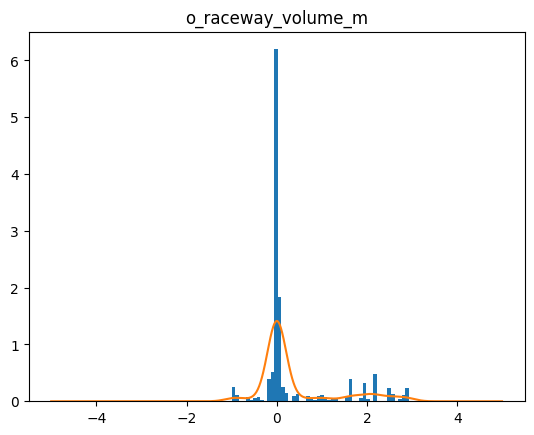

torch.Size([1000])
4301  loss=  tensor(2.5906, grad_fn=<MeanBackward0>)
4302  loss=  tensor(2.6159, grad_fn=<MeanBackward0>)
4303  loss=  tensor(2.5987, grad_fn=<MeanBackward0>)
4304  loss=  tensor(2.5969, grad_fn=<MeanBackward0>)
4305  loss=  tensor(2.6084, grad_fn=<MeanBackward0>)
4306  loss=  tensor(2.5601, grad_fn=<MeanBackward0>)
4307  loss=  tensor(2.6136, grad_fn=<MeanBackward0>)
4308  loss=  tensor(2.6149, grad_fn=<MeanBackward0>)
4309  loss=  tensor(2.6217, grad_fn=<MeanBackward0>)
4310  loss=  tensor(2.5663, grad_fn=<MeanBackward0>)
4311  loss=  tensor(2.6186, grad_fn=<MeanBackward0>)
4312  loss=  tensor(2.5659, grad_fn=<MeanBackward0>)
4313  loss=  tensor(2.6158, grad_fn=<MeanBackward0>)
4314  loss=  tensor(2.6077, grad_fn=<MeanBackward0>)
4315  loss=  tensor(2.6019, grad_fn=<MeanBackward0>)
4316  loss=  tensor(2.6364, grad_fn=<MeanBackward0>)
4317  loss=  tensor(2.5961, grad_fn=<MeanBackward0>)
4318  loss=  tensor(2.6451, grad_fn=<MeanBackward0>)
4319  loss=  tensor(2.6153,

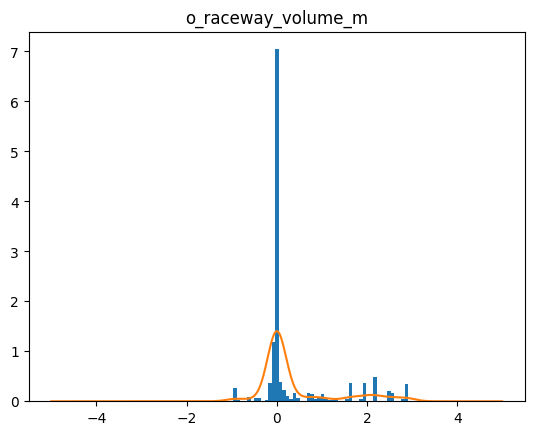

torch.Size([1000])
4351  loss=  tensor(2.5657, grad_fn=<MeanBackward0>)
4352  loss=  tensor(2.5917, grad_fn=<MeanBackward0>)
4353  loss=  tensor(2.6175, grad_fn=<MeanBackward0>)
4354  loss=  tensor(2.6022, grad_fn=<MeanBackward0>)
4355  loss=  tensor(2.5738, grad_fn=<MeanBackward0>)
4356  loss=  tensor(2.6273, grad_fn=<MeanBackward0>)
4357  loss=  tensor(2.5812, grad_fn=<MeanBackward0>)
4358  loss=  tensor(2.6033, grad_fn=<MeanBackward0>)
4359  loss=  tensor(2.6305, grad_fn=<MeanBackward0>)
4360  loss=  tensor(2.6060, grad_fn=<MeanBackward0>)
4361  loss=  tensor(2.6098, grad_fn=<MeanBackward0>)
4362  loss=  tensor(2.5906, grad_fn=<MeanBackward0>)
4363  loss=  tensor(2.6488, grad_fn=<MeanBackward0>)
4364  loss=  tensor(2.5957, grad_fn=<MeanBackward0>)
4365  loss=  tensor(2.5873, grad_fn=<MeanBackward0>)
4366  loss=  tensor(2.5840, grad_fn=<MeanBackward0>)
4367  loss=  tensor(2.6373, grad_fn=<MeanBackward0>)
4368  loss=  tensor(2.5820, grad_fn=<MeanBackward0>)
4369  loss=  tensor(2.6228,

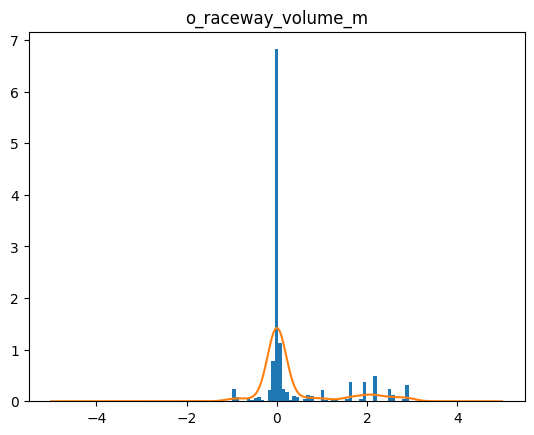

torch.Size([1000])
4401  loss=  tensor(2.5840, grad_fn=<MeanBackward0>)
4402  loss=  tensor(2.6031, grad_fn=<MeanBackward0>)
4403  loss=  tensor(2.6250, grad_fn=<MeanBackward0>)
4404  loss=  tensor(2.6370, grad_fn=<MeanBackward0>)
4405  loss=  tensor(2.6179, grad_fn=<MeanBackward0>)
4406  loss=  tensor(2.6176, grad_fn=<MeanBackward0>)
4407  loss=  tensor(2.6261, grad_fn=<MeanBackward0>)
4408  loss=  tensor(2.5796, grad_fn=<MeanBackward0>)
4409  loss=  tensor(2.6102, grad_fn=<MeanBackward0>)
4410  loss=  tensor(2.6339, grad_fn=<MeanBackward0>)
4411  loss=  tensor(2.6223, grad_fn=<MeanBackward0>)
4412  loss=  tensor(2.6124, grad_fn=<MeanBackward0>)
4413  loss=  tensor(2.6220, grad_fn=<MeanBackward0>)
4414  loss=  tensor(2.6243, grad_fn=<MeanBackward0>)
4415  loss=  tensor(2.5938, grad_fn=<MeanBackward0>)
4416  loss=  tensor(2.6099, grad_fn=<MeanBackward0>)
4417  loss=  tensor(2.5841, grad_fn=<MeanBackward0>)
4418  loss=  tensor(2.6038, grad_fn=<MeanBackward0>)
4419  loss=  tensor(2.6210,

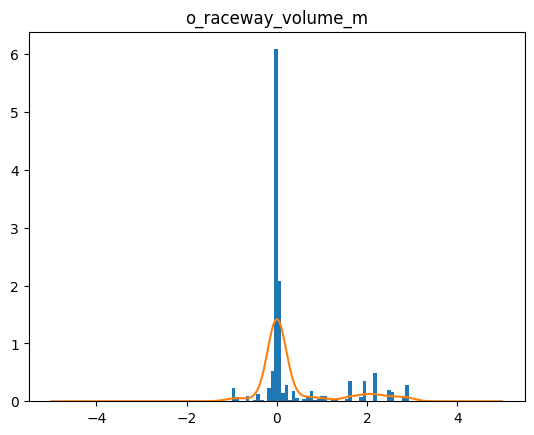

torch.Size([1000])
4451  loss=  tensor(2.6007, grad_fn=<MeanBackward0>)
4452  loss=  tensor(2.6300, grad_fn=<MeanBackward0>)
4453  loss=  tensor(2.5958, grad_fn=<MeanBackward0>)
4454  loss=  tensor(2.5983, grad_fn=<MeanBackward0>)
4455  loss=  tensor(2.6241, grad_fn=<MeanBackward0>)
4456  loss=  tensor(2.6255, grad_fn=<MeanBackward0>)
4457  loss=  tensor(2.6085, grad_fn=<MeanBackward0>)
4458  loss=  tensor(2.5999, grad_fn=<MeanBackward0>)
4459  loss=  tensor(2.6041, grad_fn=<MeanBackward0>)
4460  loss=  tensor(2.6098, grad_fn=<MeanBackward0>)
4461  loss=  tensor(2.5960, grad_fn=<MeanBackward0>)
4462  loss=  tensor(2.5813, grad_fn=<MeanBackward0>)
4463  loss=  tensor(2.5806, grad_fn=<MeanBackward0>)
4464  loss=  tensor(2.6080, grad_fn=<MeanBackward0>)
4465  loss=  tensor(2.5971, grad_fn=<MeanBackward0>)
4466  loss=  tensor(2.5843, grad_fn=<MeanBackward0>)
4467  loss=  tensor(2.6046, grad_fn=<MeanBackward0>)
4468  loss=  tensor(2.6230, grad_fn=<MeanBackward0>)
4469  loss=  tensor(2.5771,

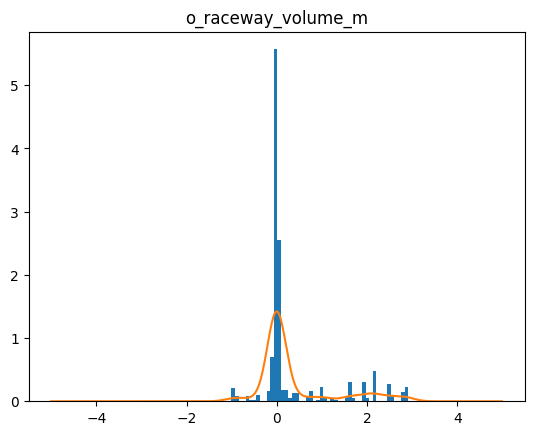

torch.Size([1000])
4501  loss=  tensor(2.6074, grad_fn=<MeanBackward0>)
4502  loss=  tensor(2.5972, grad_fn=<MeanBackward0>)
4503  loss=  tensor(2.5768, grad_fn=<MeanBackward0>)
4504  loss=  tensor(2.6127, grad_fn=<MeanBackward0>)
4505  loss=  tensor(2.6108, grad_fn=<MeanBackward0>)
4506  loss=  tensor(2.5853, grad_fn=<MeanBackward0>)
4507  loss=  tensor(2.5889, grad_fn=<MeanBackward0>)
4508  loss=  tensor(2.6090, grad_fn=<MeanBackward0>)
4509  loss=  tensor(2.5934, grad_fn=<MeanBackward0>)
4510  loss=  tensor(2.5855, grad_fn=<MeanBackward0>)
4511  loss=  tensor(2.6211, grad_fn=<MeanBackward0>)
4512  loss=  tensor(2.6363, grad_fn=<MeanBackward0>)
4513  loss=  tensor(2.6036, grad_fn=<MeanBackward0>)
4514  loss=  tensor(2.5819, grad_fn=<MeanBackward0>)
4515  loss=  tensor(2.6032, grad_fn=<MeanBackward0>)
4516  loss=  tensor(2.6249, grad_fn=<MeanBackward0>)
4517  loss=  tensor(2.5986, grad_fn=<MeanBackward0>)
4518  loss=  tensor(2.6023, grad_fn=<MeanBackward0>)
4519  loss=  tensor(2.5803,

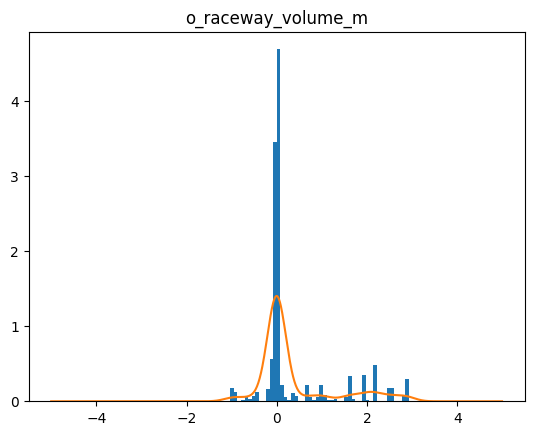

torch.Size([1000])
4551  loss=  tensor(2.5566, grad_fn=<MeanBackward0>)
4552  loss=  tensor(2.5858, grad_fn=<MeanBackward0>)
4553  loss=  tensor(2.6096, grad_fn=<MeanBackward0>)
4554  loss=  tensor(2.6164, grad_fn=<MeanBackward0>)
4555  loss=  tensor(2.5876, grad_fn=<MeanBackward0>)
4556  loss=  tensor(2.6509, grad_fn=<MeanBackward0>)
4557  loss=  tensor(2.6237, grad_fn=<MeanBackward0>)
4558  loss=  tensor(2.5933, grad_fn=<MeanBackward0>)
4559  loss=  tensor(2.5885, grad_fn=<MeanBackward0>)
4560  loss=  tensor(2.6098, grad_fn=<MeanBackward0>)
4561  loss=  tensor(2.6044, grad_fn=<MeanBackward0>)
4562  loss=  tensor(2.6171, grad_fn=<MeanBackward0>)
4563  loss=  tensor(2.6493, grad_fn=<MeanBackward0>)
4564  loss=  tensor(2.6243, grad_fn=<MeanBackward0>)
4565  loss=  tensor(2.5870, grad_fn=<MeanBackward0>)
4566  loss=  tensor(2.5764, grad_fn=<MeanBackward0>)
4567  loss=  tensor(2.6055, grad_fn=<MeanBackward0>)
4568  loss=  tensor(2.6007, grad_fn=<MeanBackward0>)
4569  loss=  tensor(2.5909,

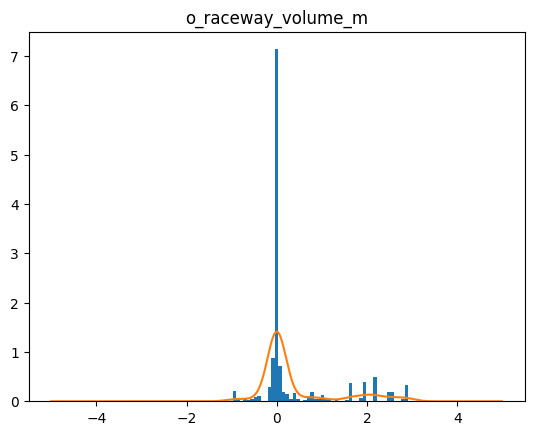

torch.Size([1000])
4601  loss=  tensor(2.6121, grad_fn=<MeanBackward0>)
4602  loss=  tensor(2.6292, grad_fn=<MeanBackward0>)
4603  loss=  tensor(2.6069, grad_fn=<MeanBackward0>)
4604  loss=  tensor(2.6285, grad_fn=<MeanBackward0>)
4605  loss=  tensor(2.6140, grad_fn=<MeanBackward0>)
4606  loss=  tensor(2.6134, grad_fn=<MeanBackward0>)
4607  loss=  tensor(2.6283, grad_fn=<MeanBackward0>)
4608  loss=  tensor(2.6066, grad_fn=<MeanBackward0>)
4609  loss=  tensor(2.5654, grad_fn=<MeanBackward0>)
4610  loss=  tensor(2.6338, grad_fn=<MeanBackward0>)
4611  loss=  tensor(2.5730, grad_fn=<MeanBackward0>)
4612  loss=  tensor(2.5725, grad_fn=<MeanBackward0>)
4613  loss=  tensor(2.6082, grad_fn=<MeanBackward0>)
4614  loss=  tensor(2.5957, grad_fn=<MeanBackward0>)
4615  loss=  tensor(2.6014, grad_fn=<MeanBackward0>)
4616  loss=  tensor(2.5983, grad_fn=<MeanBackward0>)
4617  loss=  tensor(2.5757, grad_fn=<MeanBackward0>)
4618  loss=  tensor(2.5854, grad_fn=<MeanBackward0>)
4619  loss=  tensor(2.6098,

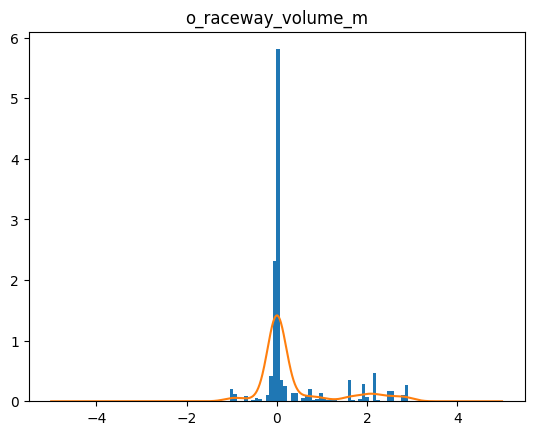

torch.Size([1000])
4651  loss=  tensor(2.6134, grad_fn=<MeanBackward0>)
4652  loss=  tensor(2.5813, grad_fn=<MeanBackward0>)
4653  loss=  tensor(2.6175, grad_fn=<MeanBackward0>)
4654  loss=  tensor(2.5951, grad_fn=<MeanBackward0>)
4655  loss=  tensor(2.5977, grad_fn=<MeanBackward0>)
4656  loss=  tensor(2.5858, grad_fn=<MeanBackward0>)
4657  loss=  tensor(2.5954, grad_fn=<MeanBackward0>)
4658  loss=  tensor(2.5983, grad_fn=<MeanBackward0>)
4659  loss=  tensor(2.6087, grad_fn=<MeanBackward0>)
4660  loss=  tensor(2.5728, grad_fn=<MeanBackward0>)
4661  loss=  tensor(2.6076, grad_fn=<MeanBackward0>)
4662  loss=  tensor(2.6220, grad_fn=<MeanBackward0>)
4663  loss=  tensor(2.6186, grad_fn=<MeanBackward0>)
4664  loss=  tensor(2.6285, grad_fn=<MeanBackward0>)
4665  loss=  tensor(2.5884, grad_fn=<MeanBackward0>)
4666  loss=  tensor(2.5790, grad_fn=<MeanBackward0>)
4667  loss=  tensor(2.5787, grad_fn=<MeanBackward0>)
4668  loss=  tensor(2.5735, grad_fn=<MeanBackward0>)
4669  loss=  tensor(2.6290,

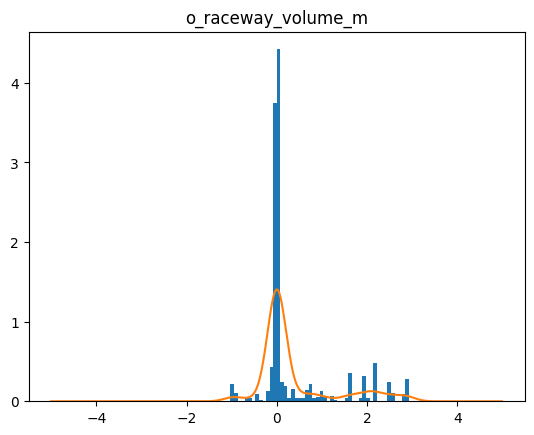

torch.Size([1000])
4701  loss=  tensor(2.5834, grad_fn=<MeanBackward0>)
4702  loss=  tensor(2.5909, grad_fn=<MeanBackward0>)
4703  loss=  tensor(2.5817, grad_fn=<MeanBackward0>)
4704  loss=  tensor(2.5857, grad_fn=<MeanBackward0>)
4705  loss=  tensor(2.5875, grad_fn=<MeanBackward0>)
4706  loss=  tensor(2.6029, grad_fn=<MeanBackward0>)
4707  loss=  tensor(2.6182, grad_fn=<MeanBackward0>)
4708  loss=  tensor(2.6100, grad_fn=<MeanBackward0>)
4709  loss=  tensor(2.5747, grad_fn=<MeanBackward0>)
4710  loss=  tensor(2.6309, grad_fn=<MeanBackward0>)
4711  loss=  tensor(2.5951, grad_fn=<MeanBackward0>)
4712  loss=  tensor(2.6035, grad_fn=<MeanBackward0>)
4713  loss=  tensor(2.6476, grad_fn=<MeanBackward0>)
4714  loss=  tensor(2.5780, grad_fn=<MeanBackward0>)
4715  loss=  tensor(2.6121, grad_fn=<MeanBackward0>)
4716  loss=  tensor(2.5933, grad_fn=<MeanBackward0>)
4717  loss=  tensor(2.6090, grad_fn=<MeanBackward0>)
4718  loss=  tensor(2.6261, grad_fn=<MeanBackward0>)
4719  loss=  tensor(2.6014,

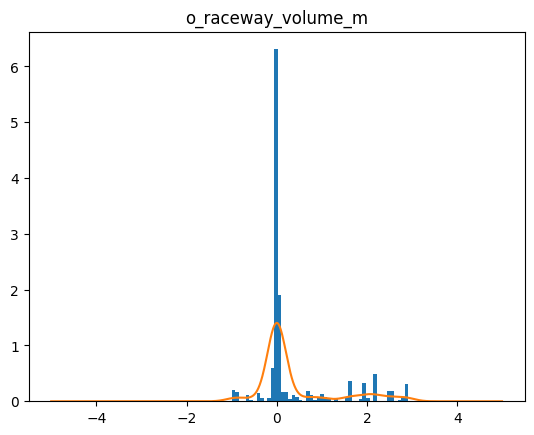

torch.Size([1000])
4751  loss=  tensor(2.6014, grad_fn=<MeanBackward0>)
4752  loss=  tensor(2.5899, grad_fn=<MeanBackward0>)
4753  loss=  tensor(2.6131, grad_fn=<MeanBackward0>)
4754  loss=  tensor(2.5969, grad_fn=<MeanBackward0>)
4755  loss=  tensor(2.6254, grad_fn=<MeanBackward0>)
4756  loss=  tensor(2.6358, grad_fn=<MeanBackward0>)
4757  loss=  tensor(2.6281, grad_fn=<MeanBackward0>)
4758  loss=  tensor(2.5823, grad_fn=<MeanBackward0>)
4759  loss=  tensor(2.6092, grad_fn=<MeanBackward0>)
4760  loss=  tensor(2.6207, grad_fn=<MeanBackward0>)
4761  loss=  tensor(2.6158, grad_fn=<MeanBackward0>)
4762  loss=  tensor(2.6015, grad_fn=<MeanBackward0>)
4763  loss=  tensor(2.6107, grad_fn=<MeanBackward0>)
4764  loss=  tensor(2.5787, grad_fn=<MeanBackward0>)
4765  loss=  tensor(2.5954, grad_fn=<MeanBackward0>)
4766  loss=  tensor(2.5736, grad_fn=<MeanBackward0>)
4767  loss=  tensor(2.6187, grad_fn=<MeanBackward0>)
4768  loss=  tensor(2.6124, grad_fn=<MeanBackward0>)
4769  loss=  tensor(2.5864,

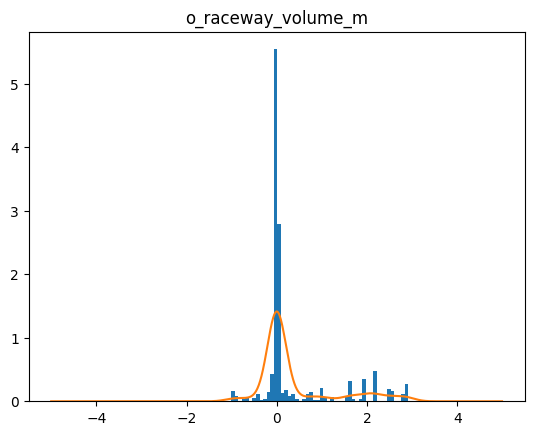

torch.Size([1000])
4801  loss=  tensor(2.5626, grad_fn=<MeanBackward0>)
4802  loss=  tensor(2.5845, grad_fn=<MeanBackward0>)
4803  loss=  tensor(2.6044, grad_fn=<MeanBackward0>)
4804  loss=  tensor(2.6143, grad_fn=<MeanBackward0>)
4805  loss=  tensor(2.6311, grad_fn=<MeanBackward0>)
4806  loss=  tensor(2.5890, grad_fn=<MeanBackward0>)
4807  loss=  tensor(2.6171, grad_fn=<MeanBackward0>)
4808  loss=  tensor(2.6132, grad_fn=<MeanBackward0>)
4809  loss=  tensor(2.5737, grad_fn=<MeanBackward0>)
4810  loss=  tensor(2.5641, grad_fn=<MeanBackward0>)
4811  loss=  tensor(2.5868, grad_fn=<MeanBackward0>)
4812  loss=  tensor(2.5771, grad_fn=<MeanBackward0>)
4813  loss=  tensor(2.6111, grad_fn=<MeanBackward0>)
4814  loss=  tensor(2.5766, grad_fn=<MeanBackward0>)
4815  loss=  tensor(2.6312, grad_fn=<MeanBackward0>)
4816  loss=  tensor(2.6099, grad_fn=<MeanBackward0>)
4817  loss=  tensor(2.5910, grad_fn=<MeanBackward0>)
4818  loss=  tensor(2.5844, grad_fn=<MeanBackward0>)
4819  loss=  tensor(2.6298,

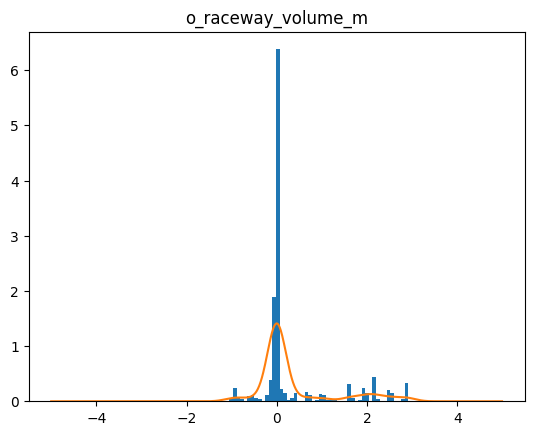

torch.Size([1000])
4851  loss=  tensor(2.6209, grad_fn=<MeanBackward0>)
4852  loss=  tensor(2.5908, grad_fn=<MeanBackward0>)
4853  loss=  tensor(2.5686, grad_fn=<MeanBackward0>)
4854  loss=  tensor(2.6038, grad_fn=<MeanBackward0>)
4855  loss=  tensor(2.5696, grad_fn=<MeanBackward0>)
4856  loss=  tensor(2.6101, grad_fn=<MeanBackward0>)
4857  loss=  tensor(2.5711, grad_fn=<MeanBackward0>)
4858  loss=  tensor(2.5894, grad_fn=<MeanBackward0>)
4859  loss=  tensor(2.6308, grad_fn=<MeanBackward0>)
4860  loss=  tensor(2.5951, grad_fn=<MeanBackward0>)
4861  loss=  tensor(2.5817, grad_fn=<MeanBackward0>)
4862  loss=  tensor(2.6178, grad_fn=<MeanBackward0>)
4863  loss=  tensor(2.5986, grad_fn=<MeanBackward0>)
4864  loss=  tensor(2.5942, grad_fn=<MeanBackward0>)
4865  loss=  tensor(2.6104, grad_fn=<MeanBackward0>)
4866  loss=  tensor(2.5919, grad_fn=<MeanBackward0>)
4867  loss=  tensor(2.6396, grad_fn=<MeanBackward0>)
4868  loss=  tensor(2.6019, grad_fn=<MeanBackward0>)
4869  loss=  tensor(2.6240,

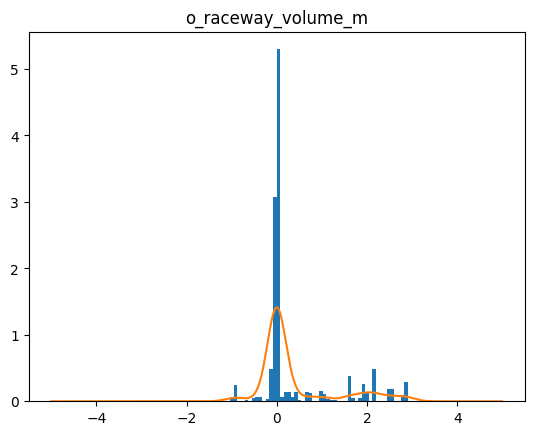

torch.Size([1000])
4901  loss=  tensor(2.6077, grad_fn=<MeanBackward0>)
4902  loss=  tensor(2.6064, grad_fn=<MeanBackward0>)
4903  loss=  tensor(2.6080, grad_fn=<MeanBackward0>)
4904  loss=  tensor(2.5900, grad_fn=<MeanBackward0>)
4905  loss=  tensor(2.6029, grad_fn=<MeanBackward0>)
4906  loss=  tensor(2.6066, grad_fn=<MeanBackward0>)
4907  loss=  tensor(2.5738, grad_fn=<MeanBackward0>)
4908  loss=  tensor(2.6333, grad_fn=<MeanBackward0>)
4909  loss=  tensor(2.5924, grad_fn=<MeanBackward0>)
4910  loss=  tensor(2.6266, grad_fn=<MeanBackward0>)
4911  loss=  tensor(2.5722, grad_fn=<MeanBackward0>)
4912  loss=  tensor(2.6075, grad_fn=<MeanBackward0>)
4913  loss=  tensor(2.5898, grad_fn=<MeanBackward0>)
4914  loss=  tensor(2.5980, grad_fn=<MeanBackward0>)
4915  loss=  tensor(2.5714, grad_fn=<MeanBackward0>)
4916  loss=  tensor(2.6144, grad_fn=<MeanBackward0>)
4917  loss=  tensor(2.6143, grad_fn=<MeanBackward0>)
4918  loss=  tensor(2.5877, grad_fn=<MeanBackward0>)
4919  loss=  tensor(2.5913,

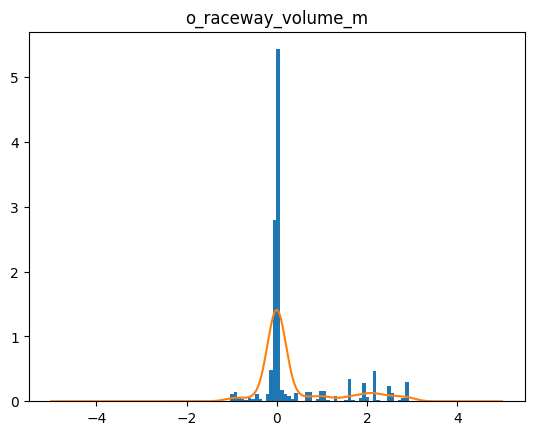

torch.Size([1000])
4951  loss=  tensor(2.5959, grad_fn=<MeanBackward0>)
4952  loss=  tensor(2.6038, grad_fn=<MeanBackward0>)
4953  loss=  tensor(2.5835, grad_fn=<MeanBackward0>)
4954  loss=  tensor(2.6264, grad_fn=<MeanBackward0>)
4955  loss=  tensor(2.5833, grad_fn=<MeanBackward0>)
4956  loss=  tensor(2.6014, grad_fn=<MeanBackward0>)
4957  loss=  tensor(2.6040, grad_fn=<MeanBackward0>)
4958  loss=  tensor(2.6176, grad_fn=<MeanBackward0>)
4959  loss=  tensor(2.6135, grad_fn=<MeanBackward0>)
4960  loss=  tensor(2.5984, grad_fn=<MeanBackward0>)
4961  loss=  tensor(2.5943, grad_fn=<MeanBackward0>)
4962  loss=  tensor(2.5938, grad_fn=<MeanBackward0>)
4963  loss=  tensor(2.6001, grad_fn=<MeanBackward0>)
4964  loss=  tensor(2.5784, grad_fn=<MeanBackward0>)
4965  loss=  tensor(2.6106, grad_fn=<MeanBackward0>)
4966  loss=  tensor(2.5757, grad_fn=<MeanBackward0>)
4967  loss=  tensor(2.6075, grad_fn=<MeanBackward0>)
4968  loss=  tensor(2.5903, grad_fn=<MeanBackward0>)
4969  loss=  tensor(2.6097,

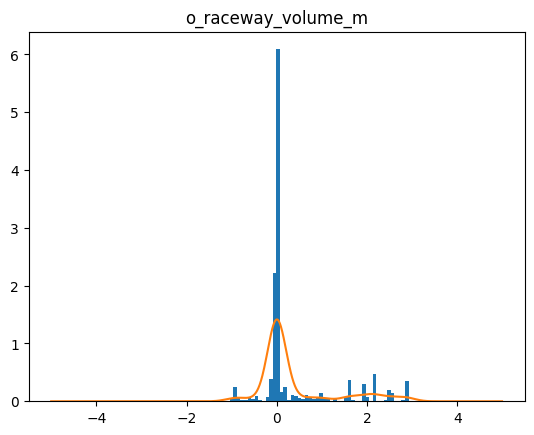

torch.Size([1000])
5001  loss=  tensor(2.5910, grad_fn=<MeanBackward0>)
5002  loss=  tensor(2.5961, grad_fn=<MeanBackward0>)
5003  loss=  tensor(2.5717, grad_fn=<MeanBackward0>)
5004  loss=  tensor(2.5711, grad_fn=<MeanBackward0>)
5005  loss=  tensor(2.5826, grad_fn=<MeanBackward0>)
5006  loss=  tensor(2.6052, grad_fn=<MeanBackward0>)
5007  loss=  tensor(2.5763, grad_fn=<MeanBackward0>)
5008  loss=  tensor(2.6043, grad_fn=<MeanBackward0>)
5009  loss=  tensor(2.5746, grad_fn=<MeanBackward0>)
5010  loss=  tensor(2.5554, grad_fn=<MeanBackward0>)
5011  loss=  tensor(2.6281, grad_fn=<MeanBackward0>)
5012  loss=  tensor(2.5645, grad_fn=<MeanBackward0>)
5013  loss=  tensor(2.5899, grad_fn=<MeanBackward0>)
5014  loss=  tensor(2.6188, grad_fn=<MeanBackward0>)
5015  loss=  tensor(2.6030, grad_fn=<MeanBackward0>)
5016  loss=  tensor(2.6240, grad_fn=<MeanBackward0>)
5017  loss=  tensor(2.5983, grad_fn=<MeanBackward0>)
5018  loss=  tensor(2.5681, grad_fn=<MeanBackward0>)
5019  loss=  tensor(2.5881,

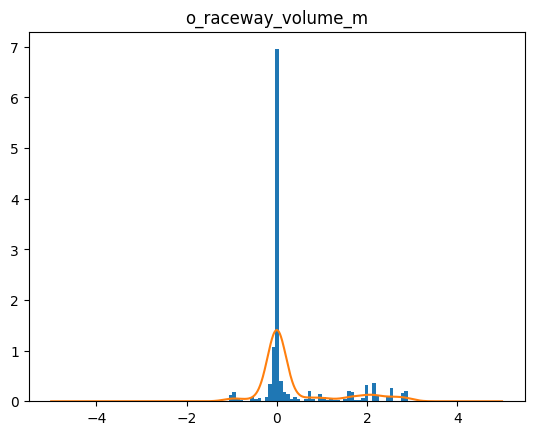

torch.Size([1000])
5051  loss=  tensor(2.5794, grad_fn=<MeanBackward0>)
5052  loss=  tensor(2.6009, grad_fn=<MeanBackward0>)
5053  loss=  tensor(2.6125, grad_fn=<MeanBackward0>)
5054  loss=  tensor(2.5802, grad_fn=<MeanBackward0>)
5055  loss=  tensor(2.6096, grad_fn=<MeanBackward0>)
5056  loss=  tensor(2.5725, grad_fn=<MeanBackward0>)
5057  loss=  tensor(2.5763, grad_fn=<MeanBackward0>)
5058  loss=  tensor(2.5724, grad_fn=<MeanBackward0>)
5059  loss=  tensor(2.5978, grad_fn=<MeanBackward0>)
5060  loss=  tensor(2.5907, grad_fn=<MeanBackward0>)
5061  loss=  tensor(2.5658, grad_fn=<MeanBackward0>)
5062  loss=  tensor(2.5738, grad_fn=<MeanBackward0>)
5063  loss=  tensor(2.5943, grad_fn=<MeanBackward0>)
5064  loss=  tensor(2.5816, grad_fn=<MeanBackward0>)
5065  loss=  tensor(2.6233, grad_fn=<MeanBackward0>)
5066  loss=  tensor(2.5853, grad_fn=<MeanBackward0>)
5067  loss=  tensor(2.6149, grad_fn=<MeanBackward0>)
5068  loss=  tensor(2.5774, grad_fn=<MeanBackward0>)
5069  loss=  tensor(2.6083,

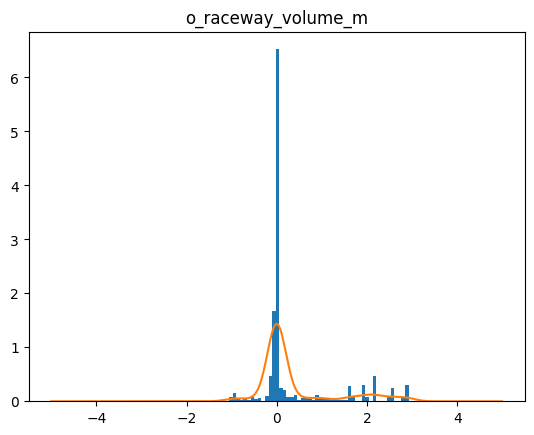

torch.Size([1000])
5101  loss=  tensor(2.6131, grad_fn=<MeanBackward0>)
5102  loss=  tensor(2.6021, grad_fn=<MeanBackward0>)
5103  loss=  tensor(2.5716, grad_fn=<MeanBackward0>)
5104  loss=  tensor(2.6019, grad_fn=<MeanBackward0>)
5105  loss=  tensor(2.6117, grad_fn=<MeanBackward0>)
5106  loss=  tensor(2.5732, grad_fn=<MeanBackward0>)
5107  loss=  tensor(2.6186, grad_fn=<MeanBackward0>)
5108  loss=  tensor(2.5954, grad_fn=<MeanBackward0>)
5109  loss=  tensor(2.6003, grad_fn=<MeanBackward0>)
5110  loss=  tensor(2.6342, grad_fn=<MeanBackward0>)
5111  loss=  tensor(2.6205, grad_fn=<MeanBackward0>)
5112  loss=  tensor(2.5755, grad_fn=<MeanBackward0>)
5113  loss=  tensor(2.5902, grad_fn=<MeanBackward0>)
5114  loss=  tensor(2.5979, grad_fn=<MeanBackward0>)
5115  loss=  tensor(2.5687, grad_fn=<MeanBackward0>)
5116  loss=  tensor(2.5913, grad_fn=<MeanBackward0>)
5117  loss=  tensor(2.5945, grad_fn=<MeanBackward0>)
5118  loss=  tensor(2.5875, grad_fn=<MeanBackward0>)
5119  loss=  tensor(2.5795,

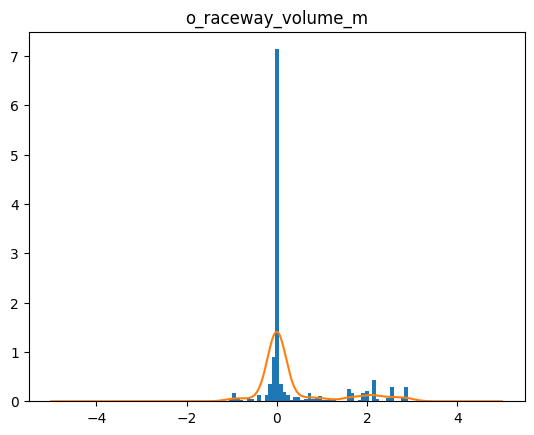

torch.Size([1000])
5151  loss=  tensor(2.5941, grad_fn=<MeanBackward0>)
5152  loss=  tensor(2.5945, grad_fn=<MeanBackward0>)
5153  loss=  tensor(2.5975, grad_fn=<MeanBackward0>)
5154  loss=  tensor(2.5793, grad_fn=<MeanBackward0>)
5155  loss=  tensor(2.5882, grad_fn=<MeanBackward0>)
5156  loss=  tensor(2.5936, grad_fn=<MeanBackward0>)
5157  loss=  tensor(2.5861, grad_fn=<MeanBackward0>)
5158  loss=  tensor(2.6060, grad_fn=<MeanBackward0>)
5159  loss=  tensor(2.6002, grad_fn=<MeanBackward0>)
5160  loss=  tensor(2.5973, grad_fn=<MeanBackward0>)
5161  loss=  tensor(2.5794, grad_fn=<MeanBackward0>)
5162  loss=  tensor(2.6098, grad_fn=<MeanBackward0>)
5163  loss=  tensor(2.6209, grad_fn=<MeanBackward0>)
5164  loss=  tensor(2.5618, grad_fn=<MeanBackward0>)
5165  loss=  tensor(2.6131, grad_fn=<MeanBackward0>)
5166  loss=  tensor(2.5957, grad_fn=<MeanBackward0>)
5167  loss=  tensor(2.5718, grad_fn=<MeanBackward0>)
5168  loss=  tensor(2.5881, grad_fn=<MeanBackward0>)
5169  loss=  tensor(2.6188,

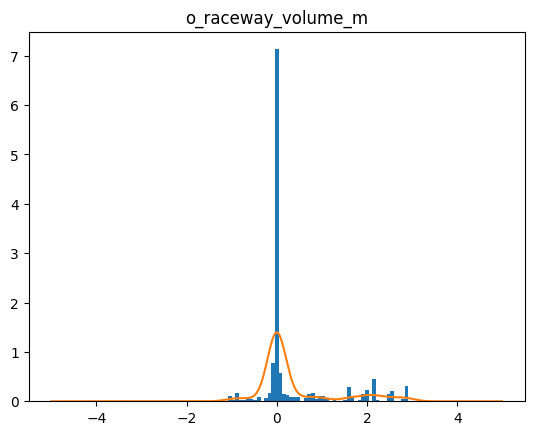

torch.Size([1000])
5201  loss=  tensor(2.5793, grad_fn=<MeanBackward0>)
5202  loss=  tensor(2.5977, grad_fn=<MeanBackward0>)
5203  loss=  tensor(2.6067, grad_fn=<MeanBackward0>)
5204  loss=  tensor(2.5948, grad_fn=<MeanBackward0>)
5205  loss=  tensor(2.5687, grad_fn=<MeanBackward0>)
5206  loss=  tensor(2.6062, grad_fn=<MeanBackward0>)
5207  loss=  tensor(2.5831, grad_fn=<MeanBackward0>)
5208  loss=  tensor(2.5854, grad_fn=<MeanBackward0>)
5209  loss=  tensor(2.6091, grad_fn=<MeanBackward0>)
5210  loss=  tensor(2.6145, grad_fn=<MeanBackward0>)
5211  loss=  tensor(2.6053, grad_fn=<MeanBackward0>)
5212  loss=  tensor(2.5837, grad_fn=<MeanBackward0>)
5213  loss=  tensor(2.6146, grad_fn=<MeanBackward0>)
5214  loss=  tensor(2.5989, grad_fn=<MeanBackward0>)
5215  loss=  tensor(2.6175, grad_fn=<MeanBackward0>)
5216  loss=  tensor(2.5801, grad_fn=<MeanBackward0>)
5217  loss=  tensor(2.6193, grad_fn=<MeanBackward0>)
5218  loss=  tensor(2.5868, grad_fn=<MeanBackward0>)
5219  loss=  tensor(2.6147,

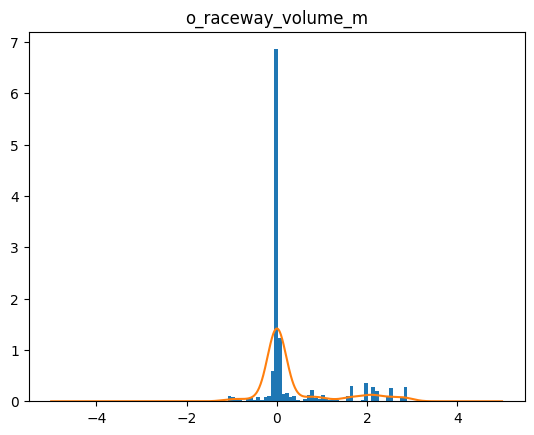

torch.Size([1000])
5251  loss=  tensor(2.5785, grad_fn=<MeanBackward0>)
5252  loss=  tensor(2.6158, grad_fn=<MeanBackward0>)
5253  loss=  tensor(2.5730, grad_fn=<MeanBackward0>)
5254  loss=  tensor(2.5850, grad_fn=<MeanBackward0>)
5255  loss=  tensor(2.5948, grad_fn=<MeanBackward0>)
5256  loss=  tensor(2.5836, grad_fn=<MeanBackward0>)
5257  loss=  tensor(2.6199, grad_fn=<MeanBackward0>)
5258  loss=  tensor(2.5790, grad_fn=<MeanBackward0>)
5259  loss=  tensor(2.5913, grad_fn=<MeanBackward0>)
5260  loss=  tensor(2.6664, grad_fn=<MeanBackward0>)
5261  loss=  tensor(2.5775, grad_fn=<MeanBackward0>)
5262  loss=  tensor(2.5718, grad_fn=<MeanBackward0>)
5263  loss=  tensor(2.5833, grad_fn=<MeanBackward0>)
5264  loss=  tensor(2.6076, grad_fn=<MeanBackward0>)
5265  loss=  tensor(2.6186, grad_fn=<MeanBackward0>)
5266  loss=  tensor(2.5996, grad_fn=<MeanBackward0>)
5267  loss=  tensor(2.5908, grad_fn=<MeanBackward0>)
5268  loss=  tensor(2.5914, grad_fn=<MeanBackward0>)
5269  loss=  tensor(2.6010,

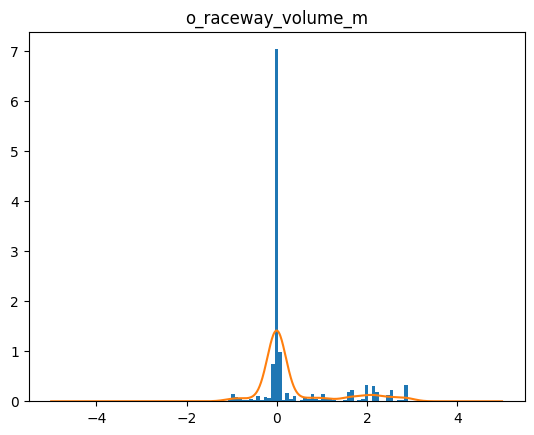

torch.Size([1000])
5301  loss=  tensor(2.5718, grad_fn=<MeanBackward0>)
5302  loss=  tensor(2.6063, grad_fn=<MeanBackward0>)
5303  loss=  tensor(2.6126, grad_fn=<MeanBackward0>)
5304  loss=  tensor(2.6113, grad_fn=<MeanBackward0>)
5305  loss=  tensor(2.5918, grad_fn=<MeanBackward0>)
5306  loss=  tensor(2.6210, grad_fn=<MeanBackward0>)
5307  loss=  tensor(2.5940, grad_fn=<MeanBackward0>)
5308  loss=  tensor(2.5874, grad_fn=<MeanBackward0>)
5309  loss=  tensor(2.5916, grad_fn=<MeanBackward0>)
5310  loss=  tensor(2.5698, grad_fn=<MeanBackward0>)
5311  loss=  tensor(2.6450, grad_fn=<MeanBackward0>)
5312  loss=  tensor(2.5798, grad_fn=<MeanBackward0>)
5313  loss=  tensor(2.5705, grad_fn=<MeanBackward0>)
5314  loss=  tensor(2.5986, grad_fn=<MeanBackward0>)
5315  loss=  tensor(2.5872, grad_fn=<MeanBackward0>)
5316  loss=  tensor(2.5576, grad_fn=<MeanBackward0>)
5317  loss=  tensor(2.5746, grad_fn=<MeanBackward0>)
5318  loss=  tensor(2.5820, grad_fn=<MeanBackward0>)
5319  loss=  tensor(2.5924,

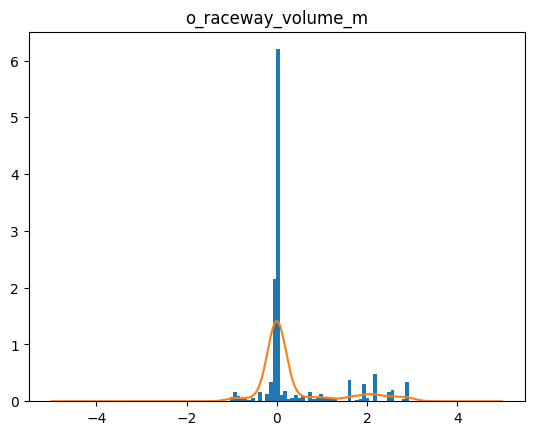

torch.Size([1000])
5351  loss=  tensor(2.6185, grad_fn=<MeanBackward0>)
5352  loss=  tensor(2.6023, grad_fn=<MeanBackward0>)
5353  loss=  tensor(2.5988, grad_fn=<MeanBackward0>)
5354  loss=  tensor(2.6109, grad_fn=<MeanBackward0>)
5355  loss=  tensor(2.6063, grad_fn=<MeanBackward0>)
5356  loss=  tensor(2.5868, grad_fn=<MeanBackward0>)
5357  loss=  tensor(2.5970, grad_fn=<MeanBackward0>)
5358  loss=  tensor(2.6409, grad_fn=<MeanBackward0>)
5359  loss=  tensor(2.5868, grad_fn=<MeanBackward0>)
5360  loss=  tensor(2.6046, grad_fn=<MeanBackward0>)
5361  loss=  tensor(2.5913, grad_fn=<MeanBackward0>)
5362  loss=  tensor(2.5982, grad_fn=<MeanBackward0>)
5363  loss=  tensor(2.5506, grad_fn=<MeanBackward0>)
5364  loss=  tensor(2.6292, grad_fn=<MeanBackward0>)
5365  loss=  tensor(2.6038, grad_fn=<MeanBackward0>)
5366  loss=  tensor(2.6214, grad_fn=<MeanBackward0>)
5367  loss=  tensor(2.5838, grad_fn=<MeanBackward0>)
5368  loss=  tensor(2.6012, grad_fn=<MeanBackward0>)
5369  loss=  tensor(2.6019,

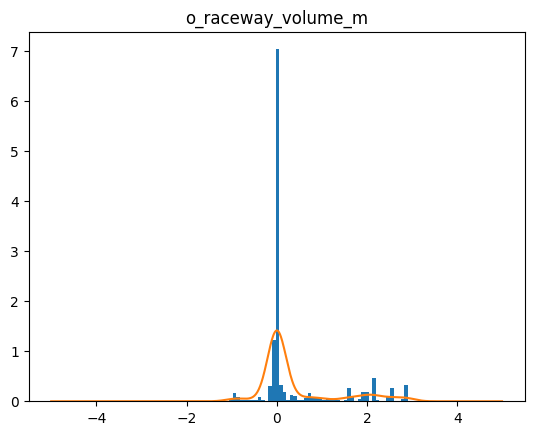

torch.Size([1000])
5401  loss=  tensor(2.6382, grad_fn=<MeanBackward0>)
5402  loss=  tensor(2.5776, grad_fn=<MeanBackward0>)
5403  loss=  tensor(2.6111, grad_fn=<MeanBackward0>)
5404  loss=  tensor(2.5919, grad_fn=<MeanBackward0>)
5405  loss=  tensor(2.6024, grad_fn=<MeanBackward0>)
5406  loss=  tensor(2.6226, grad_fn=<MeanBackward0>)
5407  loss=  tensor(2.5943, grad_fn=<MeanBackward0>)
5408  loss=  tensor(2.6223, grad_fn=<MeanBackward0>)
5409  loss=  tensor(2.6038, grad_fn=<MeanBackward0>)
5410  loss=  tensor(2.5947, grad_fn=<MeanBackward0>)
5411  loss=  tensor(2.5930, grad_fn=<MeanBackward0>)
5412  loss=  tensor(2.6086, grad_fn=<MeanBackward0>)
5413  loss=  tensor(2.5931, grad_fn=<MeanBackward0>)
5414  loss=  tensor(2.6101, grad_fn=<MeanBackward0>)
5415  loss=  tensor(2.6096, grad_fn=<MeanBackward0>)
5416  loss=  tensor(2.6097, grad_fn=<MeanBackward0>)
5417  loss=  tensor(2.6030, grad_fn=<MeanBackward0>)
5418  loss=  tensor(2.6209, grad_fn=<MeanBackward0>)
5419  loss=  tensor(2.6160,

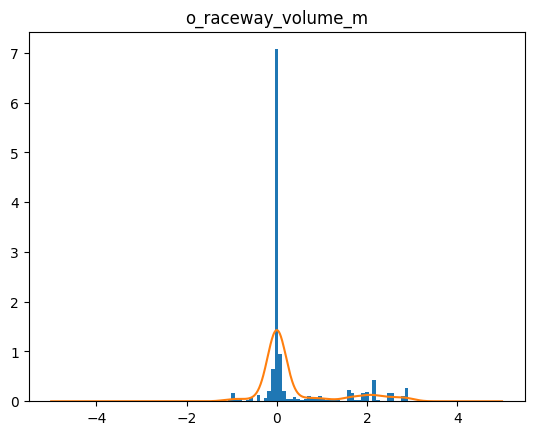

torch.Size([1000])
5451  loss=  tensor(2.6243, grad_fn=<MeanBackward0>)
5452  loss=  tensor(2.5871, grad_fn=<MeanBackward0>)
5453  loss=  tensor(2.5769, grad_fn=<MeanBackward0>)
5454  loss=  tensor(2.5706, grad_fn=<MeanBackward0>)
5455  loss=  tensor(2.6037, grad_fn=<MeanBackward0>)
5456  loss=  tensor(2.5594, grad_fn=<MeanBackward0>)
5457  loss=  tensor(2.5798, grad_fn=<MeanBackward0>)
5458  loss=  tensor(2.5768, grad_fn=<MeanBackward0>)
5459  loss=  tensor(2.6296, grad_fn=<MeanBackward0>)
5460  loss=  tensor(2.5872, grad_fn=<MeanBackward0>)
5461  loss=  tensor(2.5963, grad_fn=<MeanBackward0>)
5462  loss=  tensor(2.5939, grad_fn=<MeanBackward0>)
5463  loss=  tensor(2.6006, grad_fn=<MeanBackward0>)
5464  loss=  tensor(2.5949, grad_fn=<MeanBackward0>)
5465  loss=  tensor(2.5967, grad_fn=<MeanBackward0>)
5466  loss=  tensor(2.5715, grad_fn=<MeanBackward0>)
5467  loss=  tensor(2.5744, grad_fn=<MeanBackward0>)
5468  loss=  tensor(2.5747, grad_fn=<MeanBackward0>)
5469  loss=  tensor(2.6086,

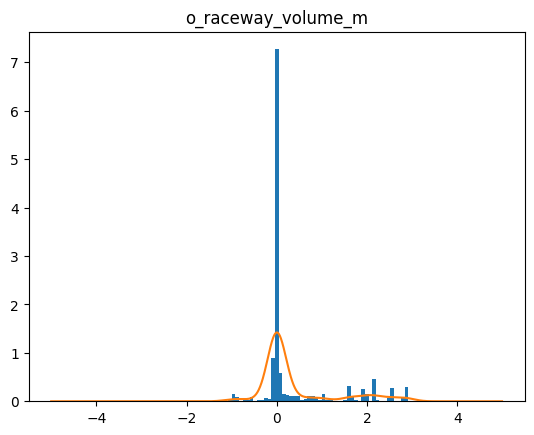

torch.Size([1000])
5501  loss=  tensor(2.6023, grad_fn=<MeanBackward0>)
5502  loss=  tensor(2.5994, grad_fn=<MeanBackward0>)
5503  loss=  tensor(2.5892, grad_fn=<MeanBackward0>)
5504  loss=  tensor(2.6019, grad_fn=<MeanBackward0>)
5505  loss=  tensor(2.6088, grad_fn=<MeanBackward0>)
5506  loss=  tensor(2.6177, grad_fn=<MeanBackward0>)
5507  loss=  tensor(2.6247, grad_fn=<MeanBackward0>)
5508  loss=  tensor(2.5790, grad_fn=<MeanBackward0>)
5509  loss=  tensor(2.6693, grad_fn=<MeanBackward0>)
5510  loss=  tensor(2.5631, grad_fn=<MeanBackward0>)
5511  loss=  tensor(2.5928, grad_fn=<MeanBackward0>)
5512  loss=  tensor(2.5861, grad_fn=<MeanBackward0>)
5513  loss=  tensor(2.6190, grad_fn=<MeanBackward0>)
5514  loss=  tensor(2.5856, grad_fn=<MeanBackward0>)
5515  loss=  tensor(2.6073, grad_fn=<MeanBackward0>)
5516  loss=  tensor(2.6011, grad_fn=<MeanBackward0>)
5517  loss=  tensor(2.5767, grad_fn=<MeanBackward0>)
5518  loss=  tensor(2.5805, grad_fn=<MeanBackward0>)
5519  loss=  tensor(2.6109,

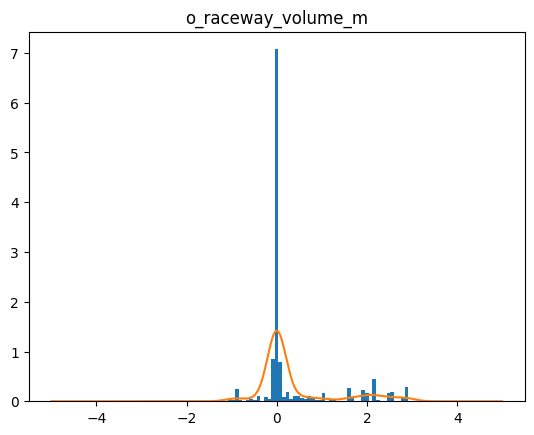

torch.Size([1000])
5551  loss=  tensor(2.5930, grad_fn=<MeanBackward0>)
5552  loss=  tensor(2.5977, grad_fn=<MeanBackward0>)
5553  loss=  tensor(2.5745, grad_fn=<MeanBackward0>)
5554  loss=  tensor(2.5974, grad_fn=<MeanBackward0>)
5555  loss=  tensor(2.5849, grad_fn=<MeanBackward0>)
5556  loss=  tensor(2.6057, grad_fn=<MeanBackward0>)
5557  loss=  tensor(2.6078, grad_fn=<MeanBackward0>)
5558  loss=  tensor(2.6074, grad_fn=<MeanBackward0>)
5559  loss=  tensor(2.5872, grad_fn=<MeanBackward0>)
5560  loss=  tensor(2.6062, grad_fn=<MeanBackward0>)
5561  loss=  tensor(2.5843, grad_fn=<MeanBackward0>)
5562  loss=  tensor(2.5947, grad_fn=<MeanBackward0>)
5563  loss=  tensor(2.6004, grad_fn=<MeanBackward0>)
5564  loss=  tensor(2.6047, grad_fn=<MeanBackward0>)
5565  loss=  tensor(2.5957, grad_fn=<MeanBackward0>)
5566  loss=  tensor(2.5903, grad_fn=<MeanBackward0>)
5567  loss=  tensor(2.6021, grad_fn=<MeanBackward0>)
5568  loss=  tensor(2.6115, grad_fn=<MeanBackward0>)
5569  loss=  tensor(2.6069,

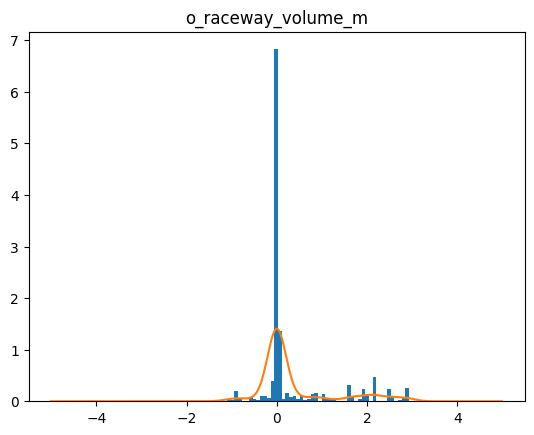

torch.Size([1000])
5601  loss=  tensor(2.5796, grad_fn=<MeanBackward0>)
5602  loss=  tensor(2.5945, grad_fn=<MeanBackward0>)
5603  loss=  tensor(2.6215, grad_fn=<MeanBackward0>)
5604  loss=  tensor(2.5852, grad_fn=<MeanBackward0>)
5605  loss=  tensor(2.6056, grad_fn=<MeanBackward0>)
5606  loss=  tensor(2.5881, grad_fn=<MeanBackward0>)
5607  loss=  tensor(2.5861, grad_fn=<MeanBackward0>)
5608  loss=  tensor(2.6292, grad_fn=<MeanBackward0>)
5609  loss=  tensor(2.6299, grad_fn=<MeanBackward0>)
5610  loss=  tensor(2.5950, grad_fn=<MeanBackward0>)
5611  loss=  tensor(2.5897, grad_fn=<MeanBackward0>)
5612  loss=  tensor(2.6067, grad_fn=<MeanBackward0>)
5613  loss=  tensor(2.6036, grad_fn=<MeanBackward0>)
5614  loss=  tensor(2.5796, grad_fn=<MeanBackward0>)
5615  loss=  tensor(2.5760, grad_fn=<MeanBackward0>)
5616  loss=  tensor(2.6243, grad_fn=<MeanBackward0>)
5617  loss=  tensor(2.5847, grad_fn=<MeanBackward0>)
5618  loss=  tensor(2.5934, grad_fn=<MeanBackward0>)
5619  loss=  tensor(2.6045,

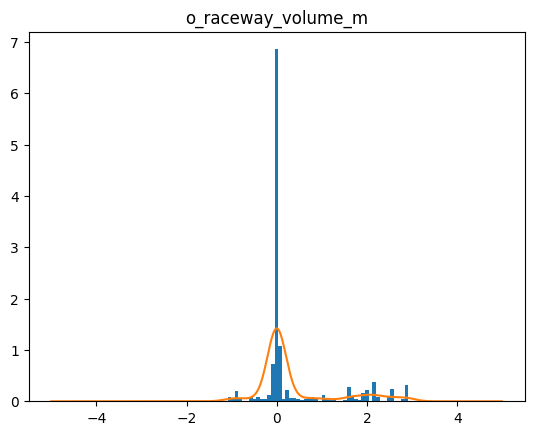

torch.Size([1000])
5651  loss=  tensor(2.6137, grad_fn=<MeanBackward0>)
5652  loss=  tensor(2.6040, grad_fn=<MeanBackward0>)
5653  loss=  tensor(2.6033, grad_fn=<MeanBackward0>)
5654  loss=  tensor(2.5527, grad_fn=<MeanBackward0>)
5655  loss=  tensor(2.5854, grad_fn=<MeanBackward0>)
5656  loss=  tensor(2.5841, grad_fn=<MeanBackward0>)
5657  loss=  tensor(2.5781, grad_fn=<MeanBackward0>)
5658  loss=  tensor(2.6402, grad_fn=<MeanBackward0>)
5659  loss=  tensor(2.5945, grad_fn=<MeanBackward0>)
5660  loss=  tensor(2.5965, grad_fn=<MeanBackward0>)
5661  loss=  tensor(2.5669, grad_fn=<MeanBackward0>)
5662  loss=  tensor(2.5759, grad_fn=<MeanBackward0>)
5663  loss=  tensor(2.6137, grad_fn=<MeanBackward0>)
5664  loss=  tensor(2.5838, grad_fn=<MeanBackward0>)
5665  loss=  tensor(2.6136, grad_fn=<MeanBackward0>)
5666  loss=  tensor(2.6251, grad_fn=<MeanBackward0>)
5667  loss=  tensor(2.5603, grad_fn=<MeanBackward0>)
5668  loss=  tensor(2.5967, grad_fn=<MeanBackward0>)
5669  loss=  tensor(2.5842,

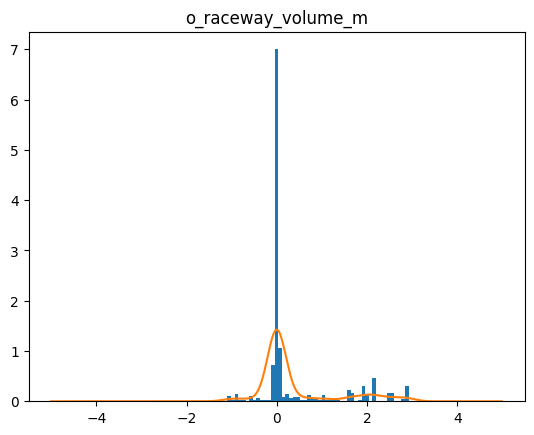

torch.Size([1000])
5701  loss=  tensor(2.6157, grad_fn=<MeanBackward0>)
5702  loss=  tensor(2.6102, grad_fn=<MeanBackward0>)
5703  loss=  tensor(2.5899, grad_fn=<MeanBackward0>)
5704  loss=  tensor(2.5963, grad_fn=<MeanBackward0>)
5705  loss=  tensor(2.5775, grad_fn=<MeanBackward0>)
5706  loss=  tensor(2.5992, grad_fn=<MeanBackward0>)
5707  loss=  tensor(2.6242, grad_fn=<MeanBackward0>)
5708  loss=  tensor(2.6203, grad_fn=<MeanBackward0>)
5709  loss=  tensor(2.6356, grad_fn=<MeanBackward0>)
5710  loss=  tensor(2.5974, grad_fn=<MeanBackward0>)
5711  loss=  tensor(2.5851, grad_fn=<MeanBackward0>)
5712  loss=  tensor(2.5997, grad_fn=<MeanBackward0>)
5713  loss=  tensor(2.5812, grad_fn=<MeanBackward0>)
5714  loss=  tensor(2.5799, grad_fn=<MeanBackward0>)
5715  loss=  tensor(2.6041, grad_fn=<MeanBackward0>)
5716  loss=  tensor(2.6000, grad_fn=<MeanBackward0>)
5717  loss=  tensor(2.5852, grad_fn=<MeanBackward0>)
5718  loss=  tensor(2.5798, grad_fn=<MeanBackward0>)
5719  loss=  tensor(2.6044,

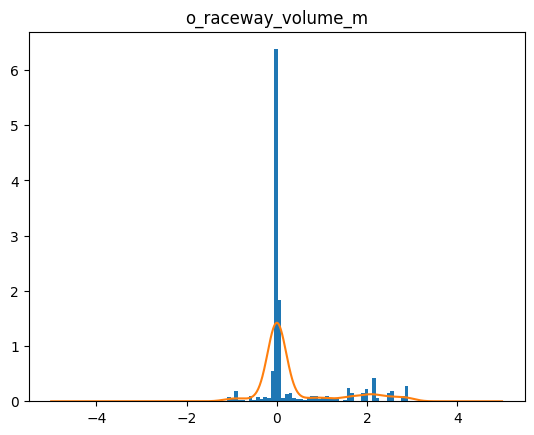

torch.Size([1000])
5751  loss=  tensor(2.6145, grad_fn=<MeanBackward0>)
5752  loss=  tensor(2.5790, grad_fn=<MeanBackward0>)
5753  loss=  tensor(2.5492, grad_fn=<MeanBackward0>)
5754  loss=  tensor(2.6027, grad_fn=<MeanBackward0>)
5755  loss=  tensor(2.5901, grad_fn=<MeanBackward0>)
5756  loss=  tensor(2.6203, grad_fn=<MeanBackward0>)
5757  loss=  tensor(2.6040, grad_fn=<MeanBackward0>)
5758  loss=  tensor(2.5952, grad_fn=<MeanBackward0>)
5759  loss=  tensor(2.5995, grad_fn=<MeanBackward0>)
5760  loss=  tensor(2.5933, grad_fn=<MeanBackward0>)
5761  loss=  tensor(2.5775, grad_fn=<MeanBackward0>)
5762  loss=  tensor(2.5752, grad_fn=<MeanBackward0>)
5763  loss=  tensor(2.5783, grad_fn=<MeanBackward0>)
5764  loss=  tensor(2.6104, grad_fn=<MeanBackward0>)
5765  loss=  tensor(2.5719, grad_fn=<MeanBackward0>)
5766  loss=  tensor(2.6050, grad_fn=<MeanBackward0>)
5767  loss=  tensor(2.6150, grad_fn=<MeanBackward0>)
5768  loss=  tensor(2.6104, grad_fn=<MeanBackward0>)
5769  loss=  tensor(2.5980,

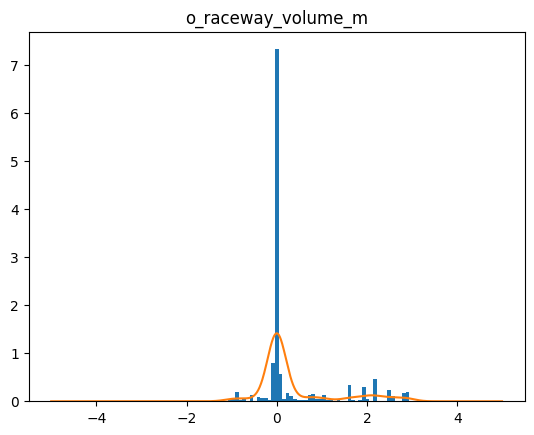

torch.Size([1000])
5801  loss=  tensor(2.6007, grad_fn=<MeanBackward0>)
5802  loss=  tensor(2.6075, grad_fn=<MeanBackward0>)
5803  loss=  tensor(2.5795, grad_fn=<MeanBackward0>)
5804  loss=  tensor(2.5686, grad_fn=<MeanBackward0>)
5805  loss=  tensor(2.5712, grad_fn=<MeanBackward0>)
5806  loss=  tensor(2.5769, grad_fn=<MeanBackward0>)
5807  loss=  tensor(2.6110, grad_fn=<MeanBackward0>)
5808  loss=  tensor(2.5923, grad_fn=<MeanBackward0>)
5809  loss=  tensor(2.5850, grad_fn=<MeanBackward0>)
5810  loss=  tensor(2.5630, grad_fn=<MeanBackward0>)
5811  loss=  tensor(2.5645, grad_fn=<MeanBackward0>)
5812  loss=  tensor(2.6511, grad_fn=<MeanBackward0>)
5813  loss=  tensor(2.5474, grad_fn=<MeanBackward0>)
5814  loss=  tensor(2.5566, grad_fn=<MeanBackward0>)
5815  loss=  tensor(2.5679, grad_fn=<MeanBackward0>)
5816  loss=  tensor(2.5969, grad_fn=<MeanBackward0>)
5817  loss=  tensor(2.6009, grad_fn=<MeanBackward0>)
5818  loss=  tensor(2.5978, grad_fn=<MeanBackward0>)
5819  loss=  tensor(2.5855,

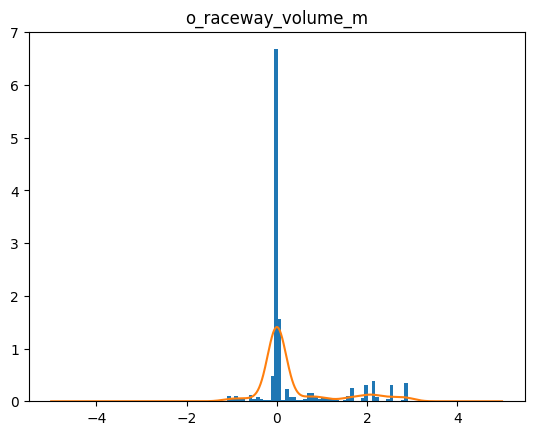

torch.Size([1000])
5851  loss=  tensor(2.5929, grad_fn=<MeanBackward0>)
5852  loss=  tensor(2.6217, grad_fn=<MeanBackward0>)
5853  loss=  tensor(2.5977, grad_fn=<MeanBackward0>)
5854  loss=  tensor(2.6035, grad_fn=<MeanBackward0>)
5855  loss=  tensor(2.6107, grad_fn=<MeanBackward0>)
5856  loss=  tensor(2.6052, grad_fn=<MeanBackward0>)
5857  loss=  tensor(2.5441, grad_fn=<MeanBackward0>)
5858  loss=  tensor(2.5982, grad_fn=<MeanBackward0>)
5859  loss=  tensor(2.5684, grad_fn=<MeanBackward0>)
5860  loss=  tensor(2.5845, grad_fn=<MeanBackward0>)
5861  loss=  tensor(2.5790, grad_fn=<MeanBackward0>)
5862  loss=  tensor(2.5942, grad_fn=<MeanBackward0>)
5863  loss=  tensor(2.5727, grad_fn=<MeanBackward0>)
5864  loss=  tensor(2.5819, grad_fn=<MeanBackward0>)
5865  loss=  tensor(2.5946, grad_fn=<MeanBackward0>)
5866  loss=  tensor(2.5664, grad_fn=<MeanBackward0>)
5867  loss=  tensor(2.6068, grad_fn=<MeanBackward0>)
5868  loss=  tensor(2.6017, grad_fn=<MeanBackward0>)
5869  loss=  tensor(2.5879,

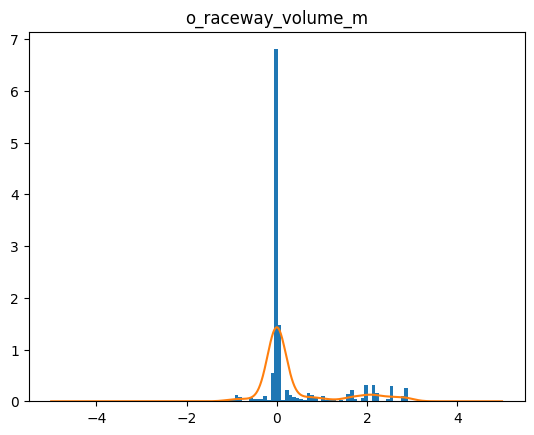

torch.Size([1000])
5901  loss=  tensor(2.5973, grad_fn=<MeanBackward0>)
5902  loss=  tensor(2.6197, grad_fn=<MeanBackward0>)
5903  loss=  tensor(2.5629, grad_fn=<MeanBackward0>)
5904  loss=  tensor(2.6305, grad_fn=<MeanBackward0>)
5905  loss=  tensor(2.6177, grad_fn=<MeanBackward0>)
5906  loss=  tensor(2.6012, grad_fn=<MeanBackward0>)
5907  loss=  tensor(2.5761, grad_fn=<MeanBackward0>)
5908  loss=  tensor(2.6216, grad_fn=<MeanBackward0>)
5909  loss=  tensor(2.5914, grad_fn=<MeanBackward0>)
5910  loss=  tensor(2.6416, grad_fn=<MeanBackward0>)
5911  loss=  tensor(2.5865, grad_fn=<MeanBackward0>)
5912  loss=  tensor(2.6242, grad_fn=<MeanBackward0>)
5913  loss=  tensor(2.5924, grad_fn=<MeanBackward0>)
5914  loss=  tensor(2.6118, grad_fn=<MeanBackward0>)
5915  loss=  tensor(2.5482, grad_fn=<MeanBackward0>)
5916  loss=  tensor(2.6159, grad_fn=<MeanBackward0>)
5917  loss=  tensor(2.5924, grad_fn=<MeanBackward0>)
5918  loss=  tensor(2.5996, grad_fn=<MeanBackward0>)
5919  loss=  tensor(2.6253,

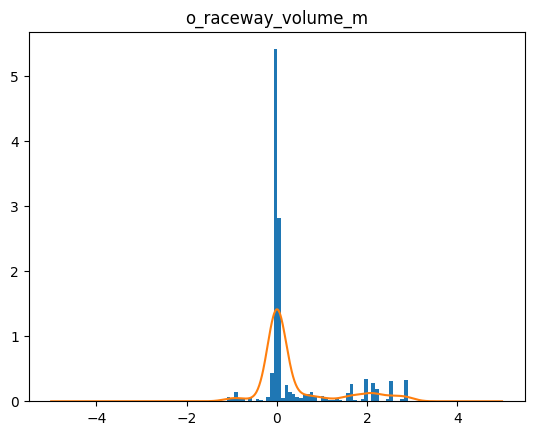

torch.Size([1000])
5951  loss=  tensor(2.5823, grad_fn=<MeanBackward0>)
5952  loss=  tensor(2.6051, grad_fn=<MeanBackward0>)
5953  loss=  tensor(2.6098, grad_fn=<MeanBackward0>)
5954  loss=  tensor(2.5904, grad_fn=<MeanBackward0>)
5955  loss=  tensor(2.5579, grad_fn=<MeanBackward0>)
5956  loss=  tensor(2.6051, grad_fn=<MeanBackward0>)
5957  loss=  tensor(2.5607, grad_fn=<MeanBackward0>)
5958  loss=  tensor(2.5513, grad_fn=<MeanBackward0>)
5959  loss=  tensor(2.5947, grad_fn=<MeanBackward0>)
5960  loss=  tensor(2.6027, grad_fn=<MeanBackward0>)
5961  loss=  tensor(2.5657, grad_fn=<MeanBackward0>)
5962  loss=  tensor(2.6083, grad_fn=<MeanBackward0>)
5963  loss=  tensor(2.5793, grad_fn=<MeanBackward0>)
5964  loss=  tensor(2.5391, grad_fn=<MeanBackward0>)
5965  loss=  tensor(2.6260, grad_fn=<MeanBackward0>)
5966  loss=  tensor(2.5761, grad_fn=<MeanBackward0>)
5967  loss=  tensor(2.6137, grad_fn=<MeanBackward0>)
5968  loss=  tensor(2.5710, grad_fn=<MeanBackward0>)
5969  loss=  tensor(2.5829,

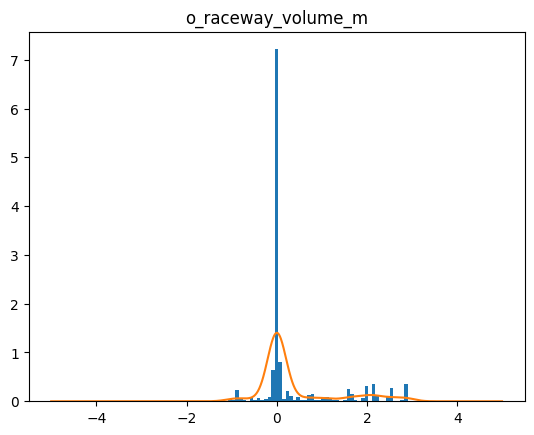

torch.Size([1000])
6001  loss=  tensor(2.5589, grad_fn=<MeanBackward0>)
6002  loss=  tensor(2.5980, grad_fn=<MeanBackward0>)
6003  loss=  tensor(2.6172, grad_fn=<MeanBackward0>)
6004  loss=  tensor(2.5889, grad_fn=<MeanBackward0>)
6005  loss=  tensor(2.5724, grad_fn=<MeanBackward0>)
6006  loss=  tensor(2.6065, grad_fn=<MeanBackward0>)
6007  loss=  tensor(2.6115, grad_fn=<MeanBackward0>)
6008  loss=  tensor(2.6042, grad_fn=<MeanBackward0>)
6009  loss=  tensor(2.5978, grad_fn=<MeanBackward0>)
6010  loss=  tensor(2.6091, grad_fn=<MeanBackward0>)
6011  loss=  tensor(2.5829, grad_fn=<MeanBackward0>)
6012  loss=  tensor(2.5853, grad_fn=<MeanBackward0>)
6013  loss=  tensor(2.5672, grad_fn=<MeanBackward0>)
6014  loss=  tensor(2.5862, grad_fn=<MeanBackward0>)
6015  loss=  tensor(2.6045, grad_fn=<MeanBackward0>)
6016  loss=  tensor(2.5773, grad_fn=<MeanBackward0>)
6017  loss=  tensor(2.5679, grad_fn=<MeanBackward0>)
6018  loss=  tensor(2.5627, grad_fn=<MeanBackward0>)
6019  loss=  tensor(2.5972,

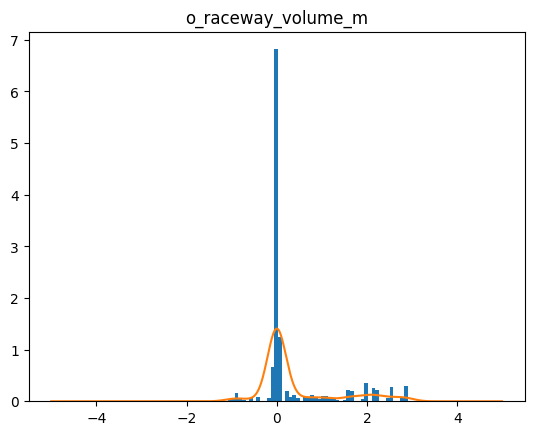

torch.Size([1000])
6051  loss=  tensor(2.6125, grad_fn=<MeanBackward0>)
6052  loss=  tensor(2.5858, grad_fn=<MeanBackward0>)
6053  loss=  tensor(2.5800, grad_fn=<MeanBackward0>)
6054  loss=  tensor(2.6079, grad_fn=<MeanBackward0>)
6055  loss=  tensor(2.5878, grad_fn=<MeanBackward0>)
6056  loss=  tensor(2.5824, grad_fn=<MeanBackward0>)
6057  loss=  tensor(2.6005, grad_fn=<MeanBackward0>)
6058  loss=  tensor(2.6383, grad_fn=<MeanBackward0>)
6059  loss=  tensor(2.5826, grad_fn=<MeanBackward0>)
6060  loss=  tensor(2.6124, grad_fn=<MeanBackward0>)
6061  loss=  tensor(2.6016, grad_fn=<MeanBackward0>)
6062  loss=  tensor(2.6219, grad_fn=<MeanBackward0>)
6063  loss=  tensor(2.6006, grad_fn=<MeanBackward0>)
6064  loss=  tensor(2.5528, grad_fn=<MeanBackward0>)
6065  loss=  tensor(2.5941, grad_fn=<MeanBackward0>)
6066  loss=  tensor(2.5959, grad_fn=<MeanBackward0>)
6067  loss=  tensor(2.5952, grad_fn=<MeanBackward0>)
6068  loss=  tensor(2.6183, grad_fn=<MeanBackward0>)
6069  loss=  tensor(2.5880,

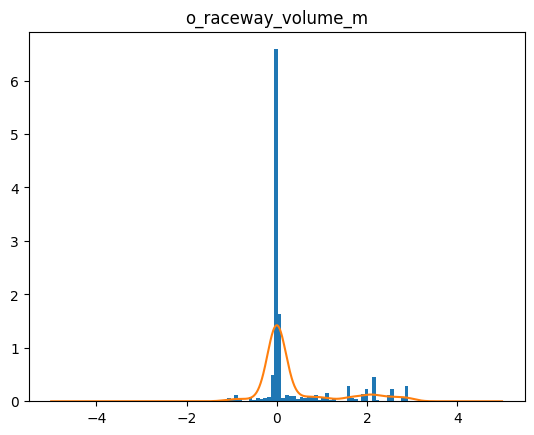

torch.Size([1000])
6101  loss=  tensor(2.6262, grad_fn=<MeanBackward0>)
6102  loss=  tensor(2.5895, grad_fn=<MeanBackward0>)
6103  loss=  tensor(2.5912, grad_fn=<MeanBackward0>)
6104  loss=  tensor(2.5770, grad_fn=<MeanBackward0>)
6105  loss=  tensor(2.5857, grad_fn=<MeanBackward0>)
6106  loss=  tensor(2.5923, grad_fn=<MeanBackward0>)
6107  loss=  tensor(2.6087, grad_fn=<MeanBackward0>)
6108  loss=  tensor(2.5696, grad_fn=<MeanBackward0>)
6109  loss=  tensor(2.6130, grad_fn=<MeanBackward0>)
6110  loss=  tensor(2.6275, grad_fn=<MeanBackward0>)
6111  loss=  tensor(2.5730, grad_fn=<MeanBackward0>)
6112  loss=  tensor(2.5838, grad_fn=<MeanBackward0>)
6113  loss=  tensor(2.5945, grad_fn=<MeanBackward0>)
6114  loss=  tensor(2.5994, grad_fn=<MeanBackward0>)
6115  loss=  tensor(2.6213, grad_fn=<MeanBackward0>)
6116  loss=  tensor(2.5897, grad_fn=<MeanBackward0>)
6117  loss=  tensor(2.5533, grad_fn=<MeanBackward0>)
6118  loss=  tensor(2.5763, grad_fn=<MeanBackward0>)
6119  loss=  tensor(2.5718,

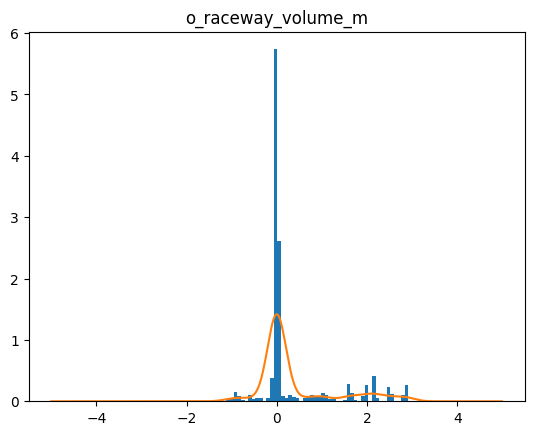

torch.Size([1000])
6151  loss=  tensor(2.5877, grad_fn=<MeanBackward0>)
6152  loss=  tensor(2.5975, grad_fn=<MeanBackward0>)
6153  loss=  tensor(2.6079, grad_fn=<MeanBackward0>)
6154  loss=  tensor(2.5957, grad_fn=<MeanBackward0>)
6155  loss=  tensor(2.5870, grad_fn=<MeanBackward0>)
6156  loss=  tensor(2.5964, grad_fn=<MeanBackward0>)
6157  loss=  tensor(2.5841, grad_fn=<MeanBackward0>)
6158  loss=  tensor(2.5804, grad_fn=<MeanBackward0>)
6159  loss=  tensor(2.5748, grad_fn=<MeanBackward0>)
6160  loss=  tensor(2.6008, grad_fn=<MeanBackward0>)
6161  loss=  tensor(2.6471, grad_fn=<MeanBackward0>)
6162  loss=  tensor(2.6133, grad_fn=<MeanBackward0>)
6163  loss=  tensor(2.6328, grad_fn=<MeanBackward0>)
6164  loss=  tensor(2.6299, grad_fn=<MeanBackward0>)
6165  loss=  tensor(2.6473, grad_fn=<MeanBackward0>)
6166  loss=  tensor(2.5964, grad_fn=<MeanBackward0>)
6167  loss=  tensor(2.5760, grad_fn=<MeanBackward0>)
6168  loss=  tensor(2.5714, grad_fn=<MeanBackward0>)
6169  loss=  tensor(2.6192,

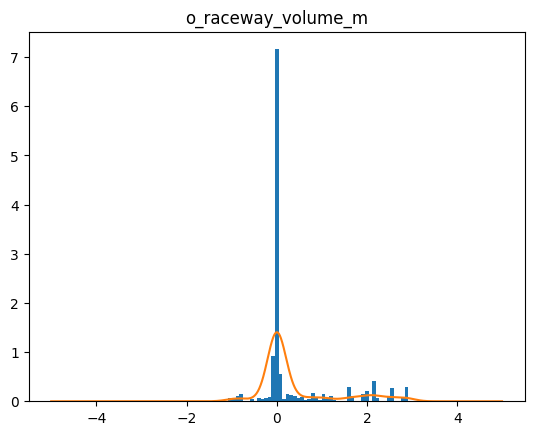

torch.Size([1000])
6201  loss=  tensor(2.5505, grad_fn=<MeanBackward0>)
6202  loss=  tensor(2.6103, grad_fn=<MeanBackward0>)
6203  loss=  tensor(2.5996, grad_fn=<MeanBackward0>)
6204  loss=  tensor(2.5997, grad_fn=<MeanBackward0>)
6205  loss=  tensor(2.6106, grad_fn=<MeanBackward0>)
6206  loss=  tensor(2.5773, grad_fn=<MeanBackward0>)
6207  loss=  tensor(2.5812, grad_fn=<MeanBackward0>)
6208  loss=  tensor(2.6027, grad_fn=<MeanBackward0>)
6209  loss=  tensor(2.6153, grad_fn=<MeanBackward0>)
6210  loss=  tensor(2.5759, grad_fn=<MeanBackward0>)
6211  loss=  tensor(2.5737, grad_fn=<MeanBackward0>)
6212  loss=  tensor(2.5718, grad_fn=<MeanBackward0>)
6213  loss=  tensor(2.5991, grad_fn=<MeanBackward0>)
6214  loss=  tensor(2.5950, grad_fn=<MeanBackward0>)
6215  loss=  tensor(2.5968, grad_fn=<MeanBackward0>)
6216  loss=  tensor(2.6062, grad_fn=<MeanBackward0>)
6217  loss=  tensor(2.5676, grad_fn=<MeanBackward0>)
6218  loss=  tensor(2.6202, grad_fn=<MeanBackward0>)
6219  loss=  tensor(2.6427,

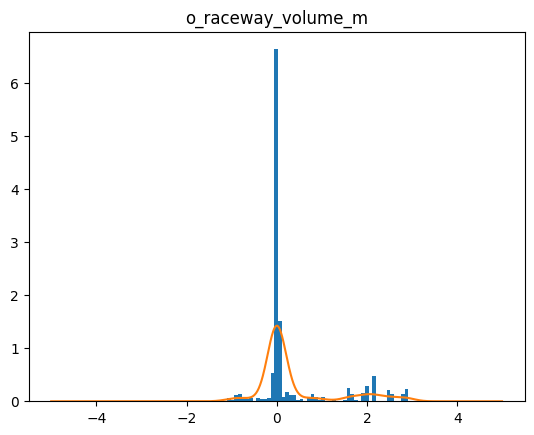

torch.Size([1000])
6251  loss=  tensor(2.6188, grad_fn=<MeanBackward0>)
6252  loss=  tensor(2.5859, grad_fn=<MeanBackward0>)
6253  loss=  tensor(2.6284, grad_fn=<MeanBackward0>)
6254  loss=  tensor(2.5949, grad_fn=<MeanBackward0>)
6255  loss=  tensor(2.5974, grad_fn=<MeanBackward0>)
6256  loss=  tensor(2.5925, grad_fn=<MeanBackward0>)
6257  loss=  tensor(2.6086, grad_fn=<MeanBackward0>)
6258  loss=  tensor(2.6417, grad_fn=<MeanBackward0>)
6259  loss=  tensor(2.5901, grad_fn=<MeanBackward0>)
6260  loss=  tensor(2.5566, grad_fn=<MeanBackward0>)
6261  loss=  tensor(2.5929, grad_fn=<MeanBackward0>)
6262  loss=  tensor(2.5865, grad_fn=<MeanBackward0>)
6263  loss=  tensor(2.5727, grad_fn=<MeanBackward0>)
6264  loss=  tensor(2.5983, grad_fn=<MeanBackward0>)
6265  loss=  tensor(2.5921, grad_fn=<MeanBackward0>)
6266  loss=  tensor(2.5687, grad_fn=<MeanBackward0>)
6267  loss=  tensor(2.6141, grad_fn=<MeanBackward0>)
6268  loss=  tensor(2.6250, grad_fn=<MeanBackward0>)
6269  loss=  tensor(2.5947,

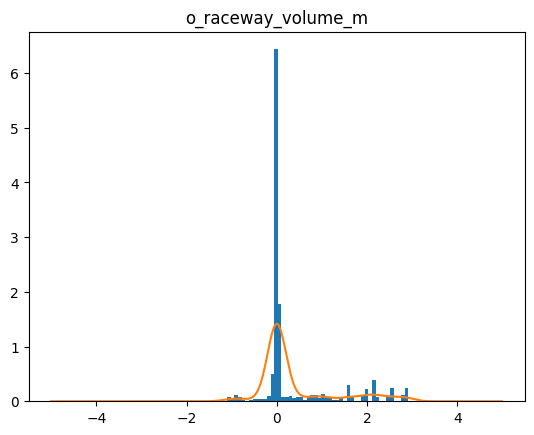

torch.Size([1000])
6301  loss=  tensor(2.5742, grad_fn=<MeanBackward0>)
6302  loss=  tensor(2.5754, grad_fn=<MeanBackward0>)
6303  loss=  tensor(2.6182, grad_fn=<MeanBackward0>)
6304  loss=  tensor(2.6034, grad_fn=<MeanBackward0>)
6305  loss=  tensor(2.5572, grad_fn=<MeanBackward0>)
6306  loss=  tensor(2.5563, grad_fn=<MeanBackward0>)
6307  loss=  tensor(2.5992, grad_fn=<MeanBackward0>)
6308  loss=  tensor(2.5939, grad_fn=<MeanBackward0>)
6309  loss=  tensor(2.5752, grad_fn=<MeanBackward0>)
6310  loss=  tensor(2.5657, grad_fn=<MeanBackward0>)
6311  loss=  tensor(2.6452, grad_fn=<MeanBackward0>)
6312  loss=  tensor(2.5864, grad_fn=<MeanBackward0>)
6313  loss=  tensor(2.5694, grad_fn=<MeanBackward0>)
6314  loss=  tensor(2.5419, grad_fn=<MeanBackward0>)
6315  loss=  tensor(2.5640, grad_fn=<MeanBackward0>)
6316  loss=  tensor(2.6303, grad_fn=<MeanBackward0>)
6317  loss=  tensor(2.5847, grad_fn=<MeanBackward0>)
6318  loss=  tensor(2.6162, grad_fn=<MeanBackward0>)
6319  loss=  tensor(2.6113,

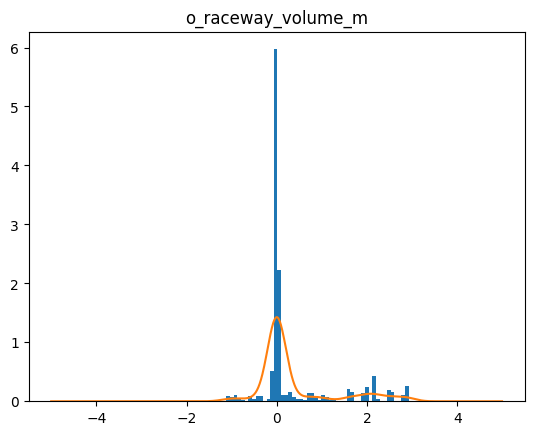

torch.Size([1000])
6351  loss=  tensor(2.5939, grad_fn=<MeanBackward0>)
6352  loss=  tensor(2.5992, grad_fn=<MeanBackward0>)
6353  loss=  tensor(2.5885, grad_fn=<MeanBackward0>)
6354  loss=  tensor(2.6023, grad_fn=<MeanBackward0>)
6355  loss=  tensor(2.6230, grad_fn=<MeanBackward0>)
6356  loss=  tensor(2.5901, grad_fn=<MeanBackward0>)
6357  loss=  tensor(2.6013, grad_fn=<MeanBackward0>)
6358  loss=  tensor(2.6063, grad_fn=<MeanBackward0>)
6359  loss=  tensor(2.5918, grad_fn=<MeanBackward0>)
6360  loss=  tensor(2.5974, grad_fn=<MeanBackward0>)
6361  loss=  tensor(2.6223, grad_fn=<MeanBackward0>)
6362  loss=  tensor(2.6028, grad_fn=<MeanBackward0>)
6363  loss=  tensor(2.5919, grad_fn=<MeanBackward0>)
6364  loss=  tensor(2.6007, grad_fn=<MeanBackward0>)
6365  loss=  tensor(2.6065, grad_fn=<MeanBackward0>)
6366  loss=  tensor(2.6104, grad_fn=<MeanBackward0>)
6367  loss=  tensor(2.6237, grad_fn=<MeanBackward0>)
6368  loss=  tensor(2.5951, grad_fn=<MeanBackward0>)
6369  loss=  tensor(2.5734,

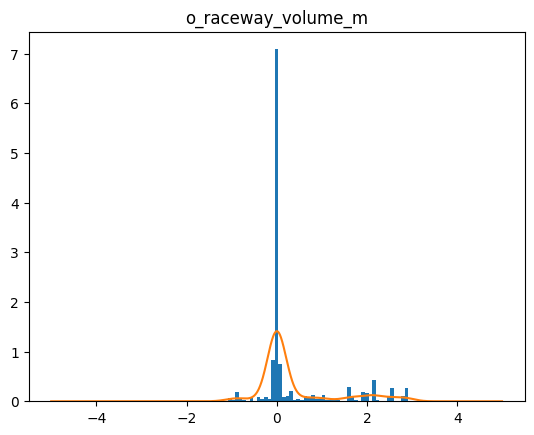

torch.Size([1000])
6401  loss=  tensor(2.5762, grad_fn=<MeanBackward0>)
6402  loss=  tensor(2.5909, grad_fn=<MeanBackward0>)
6403  loss=  tensor(2.5763, grad_fn=<MeanBackward0>)
6404  loss=  tensor(2.5895, grad_fn=<MeanBackward0>)
6405  loss=  tensor(2.5838, grad_fn=<MeanBackward0>)
6406  loss=  tensor(2.5639, grad_fn=<MeanBackward0>)
6407  loss=  tensor(2.5906, grad_fn=<MeanBackward0>)
6408  loss=  tensor(2.6073, grad_fn=<MeanBackward0>)
6409  loss=  tensor(2.5398, grad_fn=<MeanBackward0>)
6410  loss=  tensor(2.6099, grad_fn=<MeanBackward0>)
6411  loss=  tensor(2.5830, grad_fn=<MeanBackward0>)
6412  loss=  tensor(2.5835, grad_fn=<MeanBackward0>)
6413  loss=  tensor(2.5868, grad_fn=<MeanBackward0>)
6414  loss=  tensor(2.5818, grad_fn=<MeanBackward0>)
6415  loss=  tensor(2.5822, grad_fn=<MeanBackward0>)
6416  loss=  tensor(2.6030, grad_fn=<MeanBackward0>)
6417  loss=  tensor(2.6004, grad_fn=<MeanBackward0>)
6418  loss=  tensor(2.5938, grad_fn=<MeanBackward0>)
6419  loss=  tensor(2.6036,

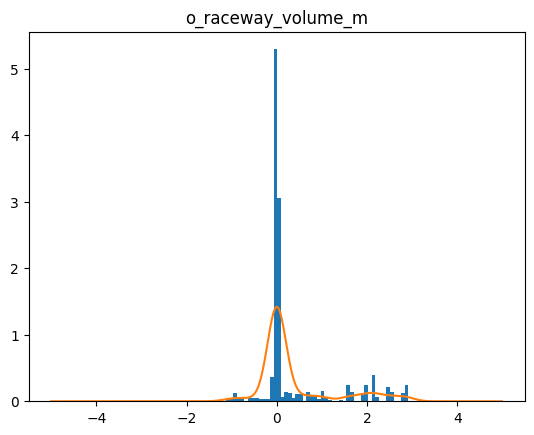

torch.Size([1000])
6451  loss=  tensor(2.5942, grad_fn=<MeanBackward0>)
6452  loss=  tensor(2.5799, grad_fn=<MeanBackward0>)
6453  loss=  tensor(2.5974, grad_fn=<MeanBackward0>)
6454  loss=  tensor(2.6100, grad_fn=<MeanBackward0>)
6455  loss=  tensor(2.6245, grad_fn=<MeanBackward0>)
6456  loss=  tensor(2.5894, grad_fn=<MeanBackward0>)
6457  loss=  tensor(2.5630, grad_fn=<MeanBackward0>)
6458  loss=  tensor(2.6195, grad_fn=<MeanBackward0>)
6459  loss=  tensor(2.6118, grad_fn=<MeanBackward0>)
6460  loss=  tensor(2.5807, grad_fn=<MeanBackward0>)
6461  loss=  tensor(2.5944, grad_fn=<MeanBackward0>)
6462  loss=  tensor(2.5885, grad_fn=<MeanBackward0>)
6463  loss=  tensor(2.6052, grad_fn=<MeanBackward0>)
6464  loss=  tensor(2.6026, grad_fn=<MeanBackward0>)
6465  loss=  tensor(2.5841, grad_fn=<MeanBackward0>)
6466  loss=  tensor(2.6012, grad_fn=<MeanBackward0>)
6467  loss=  tensor(2.6156, grad_fn=<MeanBackward0>)
6468  loss=  tensor(2.6095, grad_fn=<MeanBackward0>)
6469  loss=  tensor(2.5799,

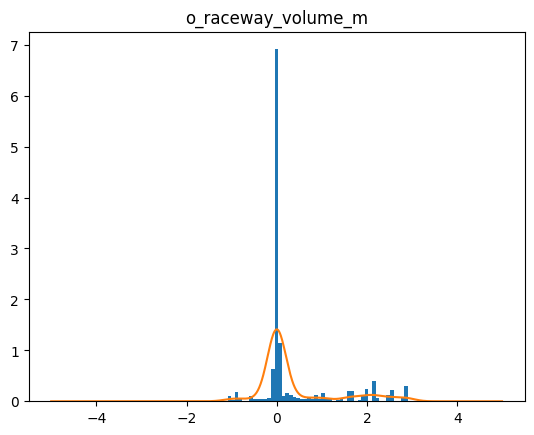

torch.Size([1000])
6501  loss=  tensor(2.5744, grad_fn=<MeanBackward0>)
6502  loss=  tensor(2.5803, grad_fn=<MeanBackward0>)
6503  loss=  tensor(2.6017, grad_fn=<MeanBackward0>)
6504  loss=  tensor(2.6030, grad_fn=<MeanBackward0>)
6505  loss=  tensor(2.5886, grad_fn=<MeanBackward0>)
6506  loss=  tensor(2.6031, grad_fn=<MeanBackward0>)
6507  loss=  tensor(2.5960, grad_fn=<MeanBackward0>)
6508  loss=  tensor(2.6146, grad_fn=<MeanBackward0>)
6509  loss=  tensor(2.6019, grad_fn=<MeanBackward0>)
6510  loss=  tensor(2.5959, grad_fn=<MeanBackward0>)
6511  loss=  tensor(2.6256, grad_fn=<MeanBackward0>)
6512  loss=  tensor(2.5965, grad_fn=<MeanBackward0>)
6513  loss=  tensor(2.6075, grad_fn=<MeanBackward0>)
6514  loss=  tensor(2.6286, grad_fn=<MeanBackward0>)
6515  loss=  tensor(2.5797, grad_fn=<MeanBackward0>)
6516  loss=  tensor(2.6059, grad_fn=<MeanBackward0>)
6517  loss=  tensor(2.6104, grad_fn=<MeanBackward0>)
6518  loss=  tensor(2.6049, grad_fn=<MeanBackward0>)
6519  loss=  tensor(2.5881,

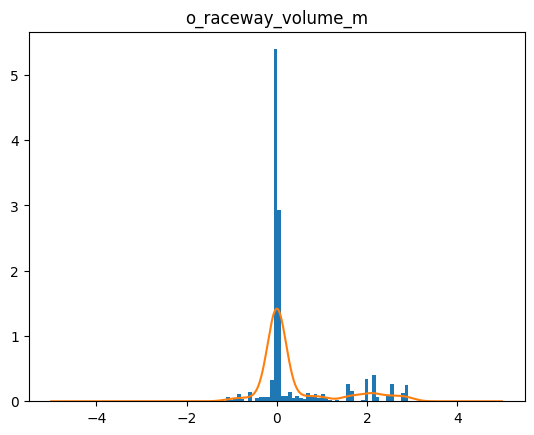

torch.Size([1000])
6551  loss=  tensor(2.5716, grad_fn=<MeanBackward0>)
6552  loss=  tensor(2.5983, grad_fn=<MeanBackward0>)
6553  loss=  tensor(2.5822, grad_fn=<MeanBackward0>)
6554  loss=  tensor(2.6086, grad_fn=<MeanBackward0>)
6555  loss=  tensor(2.5949, grad_fn=<MeanBackward0>)
6556  loss=  tensor(2.5806, grad_fn=<MeanBackward0>)
6557  loss=  tensor(2.6365, grad_fn=<MeanBackward0>)
6558  loss=  tensor(2.6030, grad_fn=<MeanBackward0>)
6559  loss=  tensor(2.5625, grad_fn=<MeanBackward0>)
6560  loss=  tensor(2.6062, grad_fn=<MeanBackward0>)
6561  loss=  tensor(2.6255, grad_fn=<MeanBackward0>)
6562  loss=  tensor(2.5831, grad_fn=<MeanBackward0>)
6563  loss=  tensor(2.5908, grad_fn=<MeanBackward0>)
6564  loss=  tensor(2.5850, grad_fn=<MeanBackward0>)
6565  loss=  tensor(2.6017, grad_fn=<MeanBackward0>)
6566  loss=  tensor(2.5843, grad_fn=<MeanBackward0>)
6567  loss=  tensor(2.5707, grad_fn=<MeanBackward0>)
6568  loss=  tensor(2.6088, grad_fn=<MeanBackward0>)
6569  loss=  tensor(2.5861,

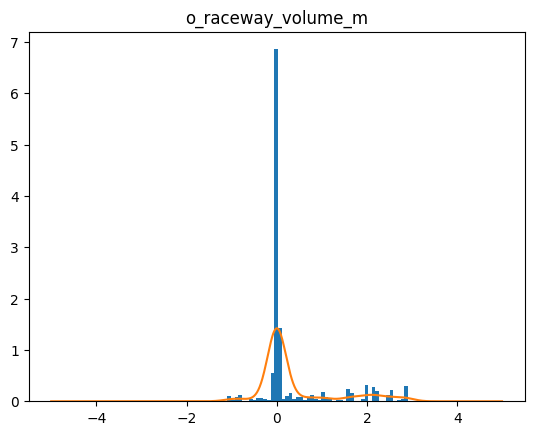

torch.Size([1000])
6601  loss=  tensor(2.5982, grad_fn=<MeanBackward0>)
6602  loss=  tensor(2.6323, grad_fn=<MeanBackward0>)
6603  loss=  tensor(2.5808, grad_fn=<MeanBackward0>)
6604  loss=  tensor(2.5905, grad_fn=<MeanBackward0>)
6605  loss=  tensor(2.5802, grad_fn=<MeanBackward0>)
6606  loss=  tensor(2.5920, grad_fn=<MeanBackward0>)
6607  loss=  tensor(2.5979, grad_fn=<MeanBackward0>)
6608  loss=  tensor(2.6199, grad_fn=<MeanBackward0>)
6609  loss=  tensor(2.6182, grad_fn=<MeanBackward0>)
6610  loss=  tensor(2.5352, grad_fn=<MeanBackward0>)
6611  loss=  tensor(2.5730, grad_fn=<MeanBackward0>)
6612  loss=  tensor(2.5663, grad_fn=<MeanBackward0>)
6613  loss=  tensor(2.5719, grad_fn=<MeanBackward0>)
6614  loss=  tensor(2.6040, grad_fn=<MeanBackward0>)
6615  loss=  tensor(2.5594, grad_fn=<MeanBackward0>)
6616  loss=  tensor(2.5850, grad_fn=<MeanBackward0>)
6617  loss=  tensor(2.5869, grad_fn=<MeanBackward0>)
6618  loss=  tensor(2.5918, grad_fn=<MeanBackward0>)
6619  loss=  tensor(2.6360,

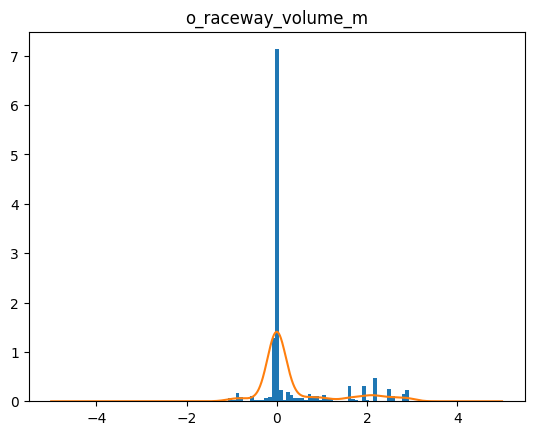

torch.Size([1000])
6651  loss=  tensor(2.5993, grad_fn=<MeanBackward0>)
6652  loss=  tensor(2.6060, grad_fn=<MeanBackward0>)
6653  loss=  tensor(2.5829, grad_fn=<MeanBackward0>)
6654  loss=  tensor(2.5742, grad_fn=<MeanBackward0>)
6655  loss=  tensor(2.5480, grad_fn=<MeanBackward0>)
6656  loss=  tensor(2.5747, grad_fn=<MeanBackward0>)
6657  loss=  tensor(2.6221, grad_fn=<MeanBackward0>)
6658  loss=  tensor(2.5856, grad_fn=<MeanBackward0>)
6659  loss=  tensor(2.5614, grad_fn=<MeanBackward0>)
6660  loss=  tensor(2.6146, grad_fn=<MeanBackward0>)
6661  loss=  tensor(2.6216, grad_fn=<MeanBackward0>)
6662  loss=  tensor(2.5949, grad_fn=<MeanBackward0>)
6663  loss=  tensor(2.6004, grad_fn=<MeanBackward0>)
6664  loss=  tensor(2.6110, grad_fn=<MeanBackward0>)
6665  loss=  tensor(2.6150, grad_fn=<MeanBackward0>)
6666  loss=  tensor(2.5626, grad_fn=<MeanBackward0>)
6667  loss=  tensor(2.6105, grad_fn=<MeanBackward0>)
6668  loss=  tensor(2.6078, grad_fn=<MeanBackward0>)
6669  loss=  tensor(2.5981,

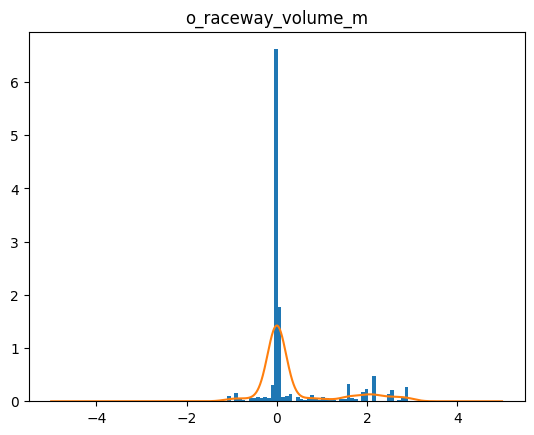

torch.Size([1000])
6701  loss=  tensor(2.6038, grad_fn=<MeanBackward0>)
6702  loss=  tensor(2.5819, grad_fn=<MeanBackward0>)
6703  loss=  tensor(2.6061, grad_fn=<MeanBackward0>)
6704  loss=  tensor(2.5782, grad_fn=<MeanBackward0>)
6705  loss=  tensor(2.5561, grad_fn=<MeanBackward0>)
6706  loss=  tensor(2.6344, grad_fn=<MeanBackward0>)
6707  loss=  tensor(2.5931, grad_fn=<MeanBackward0>)
6708  loss=  tensor(2.6084, grad_fn=<MeanBackward0>)
6709  loss=  tensor(2.6010, grad_fn=<MeanBackward0>)
6710  loss=  tensor(2.5833, grad_fn=<MeanBackward0>)
6711  loss=  tensor(2.5755, grad_fn=<MeanBackward0>)
6712  loss=  tensor(2.5895, grad_fn=<MeanBackward0>)
6713  loss=  tensor(2.6120, grad_fn=<MeanBackward0>)
6714  loss=  tensor(2.5946, grad_fn=<MeanBackward0>)
6715  loss=  tensor(2.5942, grad_fn=<MeanBackward0>)
6716  loss=  tensor(2.5739, grad_fn=<MeanBackward0>)
6717  loss=  tensor(2.5961, grad_fn=<MeanBackward0>)
6718  loss=  tensor(2.5943, grad_fn=<MeanBackward0>)
6719  loss=  tensor(2.5948,

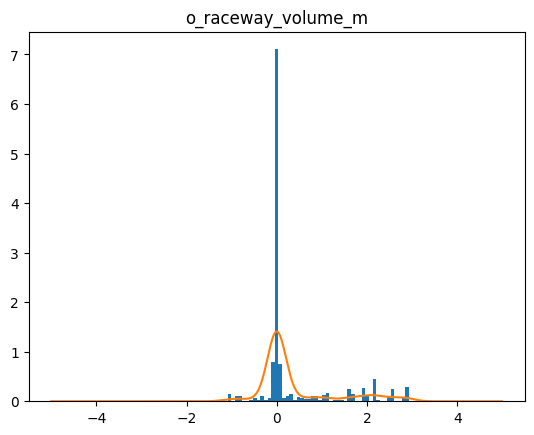

torch.Size([1000])
6751  loss=  tensor(2.6247, grad_fn=<MeanBackward0>)
6752  loss=  tensor(2.6168, grad_fn=<MeanBackward0>)
6753  loss=  tensor(2.5761, grad_fn=<MeanBackward0>)
6754  loss=  tensor(2.5738, grad_fn=<MeanBackward0>)
6755  loss=  tensor(2.5807, grad_fn=<MeanBackward0>)
6756  loss=  tensor(2.6171, grad_fn=<MeanBackward0>)
6757  loss=  tensor(2.5568, grad_fn=<MeanBackward0>)
6758  loss=  tensor(2.5976, grad_fn=<MeanBackward0>)
6759  loss=  tensor(2.5904, grad_fn=<MeanBackward0>)
6760  loss=  tensor(2.5836, grad_fn=<MeanBackward0>)
6761  loss=  tensor(2.5767, grad_fn=<MeanBackward0>)
6762  loss=  tensor(2.5869, grad_fn=<MeanBackward0>)
6763  loss=  tensor(2.5801, grad_fn=<MeanBackward0>)
6764  loss=  tensor(2.5989, grad_fn=<MeanBackward0>)
6765  loss=  tensor(2.6268, grad_fn=<MeanBackward0>)
6766  loss=  tensor(2.6000, grad_fn=<MeanBackward0>)
6767  loss=  tensor(2.6080, grad_fn=<MeanBackward0>)
6768  loss=  tensor(2.5583, grad_fn=<MeanBackward0>)
6769  loss=  tensor(2.5653,

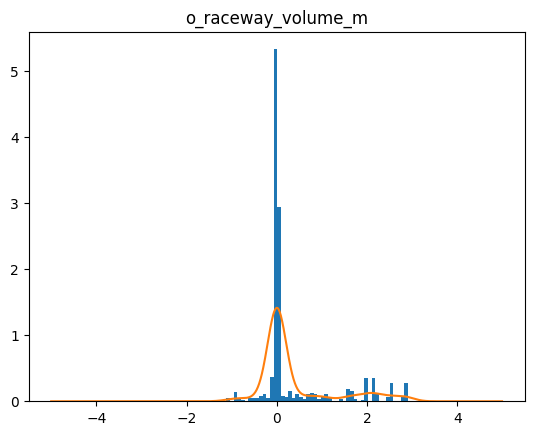

torch.Size([1000])
6801  loss=  tensor(2.5677, grad_fn=<MeanBackward0>)
6802  loss=  tensor(2.5861, grad_fn=<MeanBackward0>)
6803  loss=  tensor(2.5689, grad_fn=<MeanBackward0>)
6804  loss=  tensor(2.5927, grad_fn=<MeanBackward0>)
6805  loss=  tensor(2.6254, grad_fn=<MeanBackward0>)
6806  loss=  tensor(2.5831, grad_fn=<MeanBackward0>)
6807  loss=  tensor(2.5813, grad_fn=<MeanBackward0>)
6808  loss=  tensor(2.6151, grad_fn=<MeanBackward0>)
6809  loss=  tensor(2.5857, grad_fn=<MeanBackward0>)
6810  loss=  tensor(2.6181, grad_fn=<MeanBackward0>)
6811  loss=  tensor(2.6118, grad_fn=<MeanBackward0>)
6812  loss=  tensor(2.5637, grad_fn=<MeanBackward0>)
6813  loss=  tensor(2.5740, grad_fn=<MeanBackward0>)
6814  loss=  tensor(2.6213, grad_fn=<MeanBackward0>)
6815  loss=  tensor(2.5770, grad_fn=<MeanBackward0>)
6816  loss=  tensor(2.5930, grad_fn=<MeanBackward0>)
6817  loss=  tensor(2.5789, grad_fn=<MeanBackward0>)
6818  loss=  tensor(2.5926, grad_fn=<MeanBackward0>)
6819  loss=  tensor(2.5716,

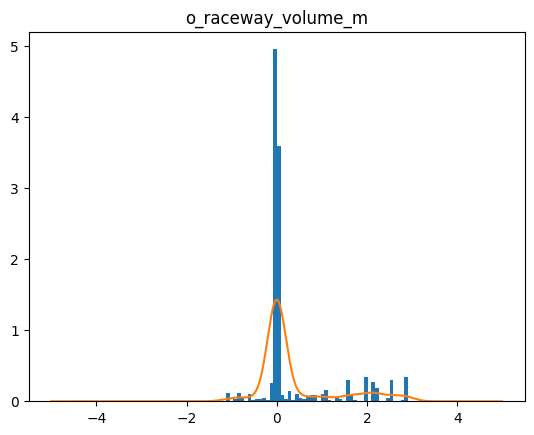

torch.Size([1000])
6851  loss=  tensor(2.5840, grad_fn=<MeanBackward0>)
6852  loss=  tensor(2.5955, grad_fn=<MeanBackward0>)
6853  loss=  tensor(2.5843, grad_fn=<MeanBackward0>)
6854  loss=  tensor(2.5932, grad_fn=<MeanBackward0>)
6855  loss=  tensor(2.5650, grad_fn=<MeanBackward0>)
6856  loss=  tensor(2.5916, grad_fn=<MeanBackward0>)
6857  loss=  tensor(2.5809, grad_fn=<MeanBackward0>)
6858  loss=  tensor(2.5820, grad_fn=<MeanBackward0>)
6859  loss=  tensor(2.6127, grad_fn=<MeanBackward0>)
6860  loss=  tensor(2.5825, grad_fn=<MeanBackward0>)
6861  loss=  tensor(2.5891, grad_fn=<MeanBackward0>)
6862  loss=  tensor(2.6116, grad_fn=<MeanBackward0>)
6863  loss=  tensor(2.6036, grad_fn=<MeanBackward0>)
6864  loss=  tensor(2.6026, grad_fn=<MeanBackward0>)
6865  loss=  tensor(2.6293, grad_fn=<MeanBackward0>)
6866  loss=  tensor(2.6030, grad_fn=<MeanBackward0>)
6867  loss=  tensor(2.6094, grad_fn=<MeanBackward0>)
6868  loss=  tensor(2.6360, grad_fn=<MeanBackward0>)
6869  loss=  tensor(2.5824,

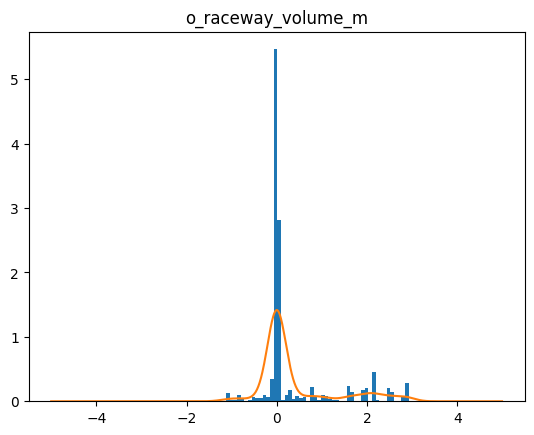

torch.Size([1000])
6901  loss=  tensor(2.5989, grad_fn=<MeanBackward0>)
6902  loss=  tensor(2.6434, grad_fn=<MeanBackward0>)
6903  loss=  tensor(2.5931, grad_fn=<MeanBackward0>)
6904  loss=  tensor(2.5724, grad_fn=<MeanBackward0>)
6905  loss=  tensor(2.5960, grad_fn=<MeanBackward0>)
6906  loss=  tensor(2.6044, grad_fn=<MeanBackward0>)
6907  loss=  tensor(2.5855, grad_fn=<MeanBackward0>)
6908  loss=  tensor(2.5513, grad_fn=<MeanBackward0>)
6909  loss=  tensor(2.5954, grad_fn=<MeanBackward0>)
6910  loss=  tensor(2.5859, grad_fn=<MeanBackward0>)
6911  loss=  tensor(2.5802, grad_fn=<MeanBackward0>)
6912  loss=  tensor(2.5751, grad_fn=<MeanBackward0>)
6913  loss=  tensor(2.5938, grad_fn=<MeanBackward0>)
6914  loss=  tensor(2.5957, grad_fn=<MeanBackward0>)
6915  loss=  tensor(2.5798, grad_fn=<MeanBackward0>)
6916  loss=  tensor(2.5642, grad_fn=<MeanBackward0>)
6917  loss=  tensor(2.5840, grad_fn=<MeanBackward0>)
6918  loss=  tensor(2.6067, grad_fn=<MeanBackward0>)
6919  loss=  tensor(2.5918,

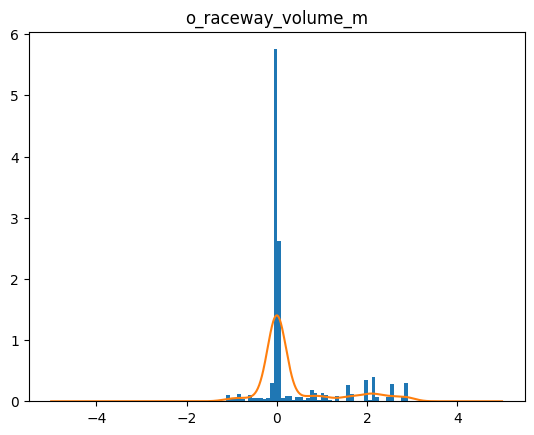

torch.Size([1000])
6951  loss=  tensor(2.6044, grad_fn=<MeanBackward0>)
6952  loss=  tensor(2.5868, grad_fn=<MeanBackward0>)
6953  loss=  tensor(2.5959, grad_fn=<MeanBackward0>)
6954  loss=  tensor(2.6026, grad_fn=<MeanBackward0>)
6955  loss=  tensor(2.5599, grad_fn=<MeanBackward0>)
6956  loss=  tensor(2.5466, grad_fn=<MeanBackward0>)
6957  loss=  tensor(2.5940, grad_fn=<MeanBackward0>)
6958  loss=  tensor(2.6132, grad_fn=<MeanBackward0>)
6959  loss=  tensor(2.6015, grad_fn=<MeanBackward0>)
6960  loss=  tensor(2.6177, grad_fn=<MeanBackward0>)
6961  loss=  tensor(2.6386, grad_fn=<MeanBackward0>)
6962  loss=  tensor(2.5641, grad_fn=<MeanBackward0>)
6963  loss=  tensor(2.5968, grad_fn=<MeanBackward0>)
6964  loss=  tensor(2.5986, grad_fn=<MeanBackward0>)
6965  loss=  tensor(2.5943, grad_fn=<MeanBackward0>)
6966  loss=  tensor(2.6029, grad_fn=<MeanBackward0>)
6967  loss=  tensor(2.6246, grad_fn=<MeanBackward0>)
6968  loss=  tensor(2.5853, grad_fn=<MeanBackward0>)
6969  loss=  tensor(2.5853,

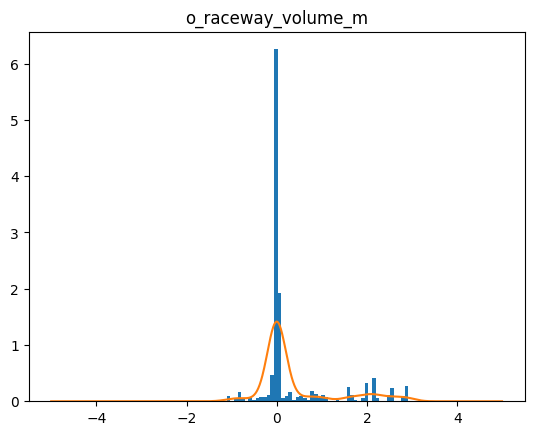

torch.Size([1000])
7001  loss=  tensor(2.6098, grad_fn=<MeanBackward0>)
7002  loss=  tensor(2.5673, grad_fn=<MeanBackward0>)
7003  loss=  tensor(2.5944, grad_fn=<MeanBackward0>)
7004  loss=  tensor(2.5738, grad_fn=<MeanBackward0>)
7005  loss=  tensor(2.6173, grad_fn=<MeanBackward0>)
7006  loss=  tensor(2.5802, grad_fn=<MeanBackward0>)
7007  loss=  tensor(2.5805, grad_fn=<MeanBackward0>)
7008  loss=  tensor(2.6331, grad_fn=<MeanBackward0>)
7009  loss=  tensor(2.5750, grad_fn=<MeanBackward0>)
7010  loss=  tensor(2.6124, grad_fn=<MeanBackward0>)
7011  loss=  tensor(2.6032, grad_fn=<MeanBackward0>)
7012  loss=  tensor(2.5957, grad_fn=<MeanBackward0>)
7013  loss=  tensor(2.5783, grad_fn=<MeanBackward0>)
7014  loss=  tensor(2.5929, grad_fn=<MeanBackward0>)
7015  loss=  tensor(2.6063, grad_fn=<MeanBackward0>)
7016  loss=  tensor(2.5898, grad_fn=<MeanBackward0>)
7017  loss=  tensor(2.5966, grad_fn=<MeanBackward0>)
7018  loss=  tensor(2.5749, grad_fn=<MeanBackward0>)
7019  loss=  tensor(2.5811,

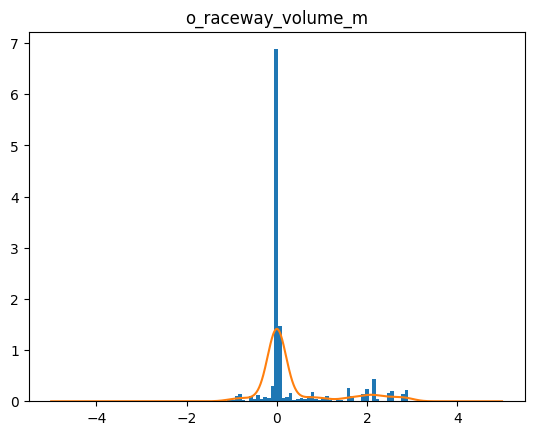

torch.Size([1000])
7051  loss=  tensor(2.5951, grad_fn=<MeanBackward0>)
7052  loss=  tensor(2.5783, grad_fn=<MeanBackward0>)
7053  loss=  tensor(2.5829, grad_fn=<MeanBackward0>)
7054  loss=  tensor(2.5469, grad_fn=<MeanBackward0>)
7055  loss=  tensor(2.5891, grad_fn=<MeanBackward0>)
7056  loss=  tensor(2.5762, grad_fn=<MeanBackward0>)
7057  loss=  tensor(2.5672, grad_fn=<MeanBackward0>)
7058  loss=  tensor(2.5842, grad_fn=<MeanBackward0>)
7059  loss=  tensor(2.5927, grad_fn=<MeanBackward0>)
7060  loss=  tensor(2.6054, grad_fn=<MeanBackward0>)
7061  loss=  tensor(2.6111, grad_fn=<MeanBackward0>)
7062  loss=  tensor(2.5995, grad_fn=<MeanBackward0>)
7063  loss=  tensor(2.6233, grad_fn=<MeanBackward0>)
7064  loss=  tensor(2.6084, grad_fn=<MeanBackward0>)
7065  loss=  tensor(2.6031, grad_fn=<MeanBackward0>)
7066  loss=  tensor(2.5572, grad_fn=<MeanBackward0>)
7067  loss=  tensor(2.5385, grad_fn=<MeanBackward0>)
7068  loss=  tensor(2.6214, grad_fn=<MeanBackward0>)
7069  loss=  tensor(2.5883,

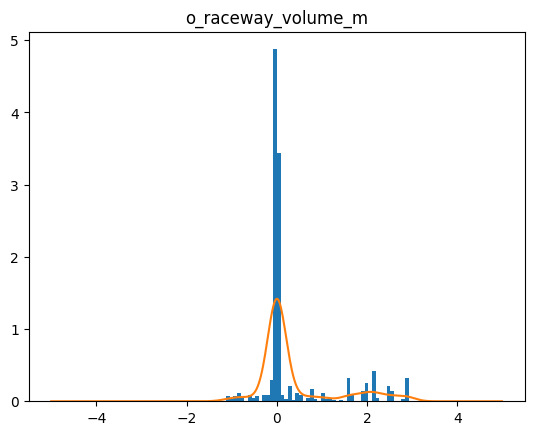

torch.Size([1000])
7101  loss=  tensor(2.6357, grad_fn=<MeanBackward0>)
7102  loss=  tensor(2.5796, grad_fn=<MeanBackward0>)
7103  loss=  tensor(2.6049, grad_fn=<MeanBackward0>)
7104  loss=  tensor(2.6191, grad_fn=<MeanBackward0>)
7105  loss=  tensor(2.5503, grad_fn=<MeanBackward0>)
7106  loss=  tensor(2.5716, grad_fn=<MeanBackward0>)
7107  loss=  tensor(2.5796, grad_fn=<MeanBackward0>)
7108  loss=  tensor(2.5791, grad_fn=<MeanBackward0>)
7109  loss=  tensor(2.6301, grad_fn=<MeanBackward0>)
7110  loss=  tensor(2.5941, grad_fn=<MeanBackward0>)
7111  loss=  tensor(2.6067, grad_fn=<MeanBackward0>)
7112  loss=  tensor(2.5948, grad_fn=<MeanBackward0>)
7113  loss=  tensor(2.6592, grad_fn=<MeanBackward0>)
7114  loss=  tensor(2.5869, grad_fn=<MeanBackward0>)
7115  loss=  tensor(2.5757, grad_fn=<MeanBackward0>)
7116  loss=  tensor(2.5989, grad_fn=<MeanBackward0>)
7117  loss=  tensor(2.5871, grad_fn=<MeanBackward0>)
7118  loss=  tensor(2.6337, grad_fn=<MeanBackward0>)
7119  loss=  tensor(2.5814,

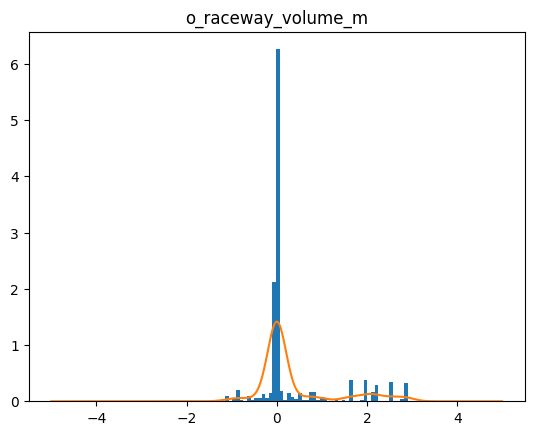

torch.Size([1000])
7151  loss=  tensor(2.6005, grad_fn=<MeanBackward0>)
7152  loss=  tensor(2.5919, grad_fn=<MeanBackward0>)
7153  loss=  tensor(2.6048, grad_fn=<MeanBackward0>)
7154  loss=  tensor(2.5821, grad_fn=<MeanBackward0>)
7155  loss=  tensor(2.5936, grad_fn=<MeanBackward0>)
7156  loss=  tensor(2.5804, grad_fn=<MeanBackward0>)
7157  loss=  tensor(2.6156, grad_fn=<MeanBackward0>)
7158  loss=  tensor(2.5847, grad_fn=<MeanBackward0>)
7159  loss=  tensor(2.6025, grad_fn=<MeanBackward0>)
7160  loss=  tensor(2.6010, grad_fn=<MeanBackward0>)
7161  loss=  tensor(2.6051, grad_fn=<MeanBackward0>)
7162  loss=  tensor(2.5985, grad_fn=<MeanBackward0>)
7163  loss=  tensor(2.6017, grad_fn=<MeanBackward0>)
7164  loss=  tensor(2.6239, grad_fn=<MeanBackward0>)
7165  loss=  tensor(2.5683, grad_fn=<MeanBackward0>)
7166  loss=  tensor(2.5980, grad_fn=<MeanBackward0>)
7167  loss=  tensor(2.5973, grad_fn=<MeanBackward0>)
7168  loss=  tensor(2.5974, grad_fn=<MeanBackward0>)
7169  loss=  tensor(2.5694,

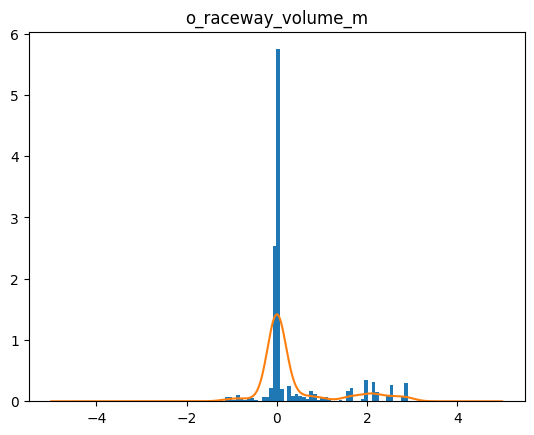

torch.Size([1000])
7201  loss=  tensor(2.5953, grad_fn=<MeanBackward0>)
7202  loss=  tensor(2.5986, grad_fn=<MeanBackward0>)
7203  loss=  tensor(2.6035, grad_fn=<MeanBackward0>)
7204  loss=  tensor(2.5602, grad_fn=<MeanBackward0>)
7205  loss=  tensor(2.6215, grad_fn=<MeanBackward0>)
7206  loss=  tensor(2.5710, grad_fn=<MeanBackward0>)
7207  loss=  tensor(2.6192, grad_fn=<MeanBackward0>)
7208  loss=  tensor(2.6155, grad_fn=<MeanBackward0>)
7209  loss=  tensor(2.5993, grad_fn=<MeanBackward0>)
7210  loss=  tensor(2.5631, grad_fn=<MeanBackward0>)
7211  loss=  tensor(2.6052, grad_fn=<MeanBackward0>)
7212  loss=  tensor(2.6074, grad_fn=<MeanBackward0>)
7213  loss=  tensor(2.5706, grad_fn=<MeanBackward0>)
7214  loss=  tensor(2.5928, grad_fn=<MeanBackward0>)
7215  loss=  tensor(2.5724, grad_fn=<MeanBackward0>)
7216  loss=  tensor(2.5996, grad_fn=<MeanBackward0>)
7217  loss=  tensor(2.5819, grad_fn=<MeanBackward0>)
7218  loss=  tensor(2.5550, grad_fn=<MeanBackward0>)
7219  loss=  tensor(2.6301,

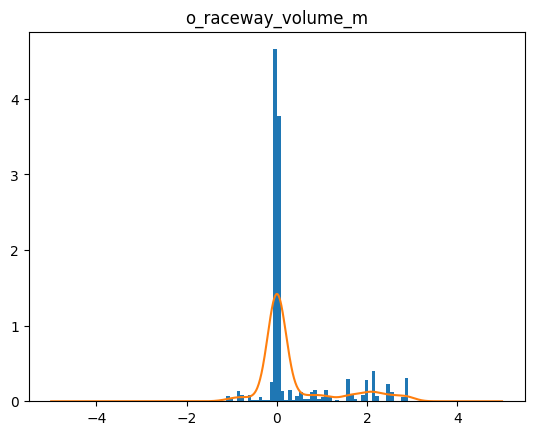

torch.Size([1000])
7251  loss=  tensor(2.5752, grad_fn=<MeanBackward0>)
7252  loss=  tensor(2.5715, grad_fn=<MeanBackward0>)
7253  loss=  tensor(2.5709, grad_fn=<MeanBackward0>)
7254  loss=  tensor(2.5662, grad_fn=<MeanBackward0>)
7255  loss=  tensor(2.6039, grad_fn=<MeanBackward0>)
7256  loss=  tensor(2.5752, grad_fn=<MeanBackward0>)
7257  loss=  tensor(2.5897, grad_fn=<MeanBackward0>)
7258  loss=  tensor(2.6167, grad_fn=<MeanBackward0>)
7259  loss=  tensor(2.5594, grad_fn=<MeanBackward0>)
7260  loss=  tensor(2.5779, grad_fn=<MeanBackward0>)
7261  loss=  tensor(2.6048, grad_fn=<MeanBackward0>)
7262  loss=  tensor(2.5646, grad_fn=<MeanBackward0>)
7263  loss=  tensor(2.6013, grad_fn=<MeanBackward0>)
7264  loss=  tensor(2.5854, grad_fn=<MeanBackward0>)
7265  loss=  tensor(2.5460, grad_fn=<MeanBackward0>)
7266  loss=  tensor(2.5649, grad_fn=<MeanBackward0>)
7267  loss=  tensor(2.5643, grad_fn=<MeanBackward0>)
7268  loss=  tensor(2.5405, grad_fn=<MeanBackward0>)
7269  loss=  tensor(2.5838,

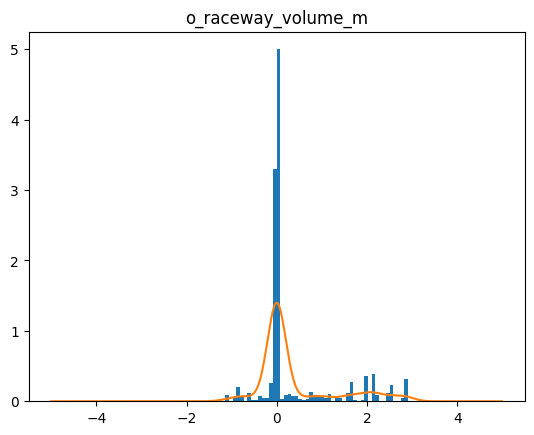

torch.Size([1000])
7301  loss=  tensor(2.6164, grad_fn=<MeanBackward0>)
7302  loss=  tensor(2.6023, grad_fn=<MeanBackward0>)
7303  loss=  tensor(2.5655, grad_fn=<MeanBackward0>)
7304  loss=  tensor(2.5825, grad_fn=<MeanBackward0>)
7305  loss=  tensor(2.5446, grad_fn=<MeanBackward0>)
7306  loss=  tensor(2.6077, grad_fn=<MeanBackward0>)
7307  loss=  tensor(2.5747, grad_fn=<MeanBackward0>)
7308  loss=  tensor(2.5811, grad_fn=<MeanBackward0>)
7309  loss=  tensor(2.6027, grad_fn=<MeanBackward0>)
7310  loss=  tensor(2.5941, grad_fn=<MeanBackward0>)
7311  loss=  tensor(2.5938, grad_fn=<MeanBackward0>)
7312  loss=  tensor(2.6042, grad_fn=<MeanBackward0>)
7313  loss=  tensor(2.5978, grad_fn=<MeanBackward0>)
7314  loss=  tensor(2.5795, grad_fn=<MeanBackward0>)
7315  loss=  tensor(2.5882, grad_fn=<MeanBackward0>)
7316  loss=  tensor(2.5847, grad_fn=<MeanBackward0>)
7317  loss=  tensor(2.5723, grad_fn=<MeanBackward0>)
7318  loss=  tensor(2.6055, grad_fn=<MeanBackward0>)
7319  loss=  tensor(2.6025,

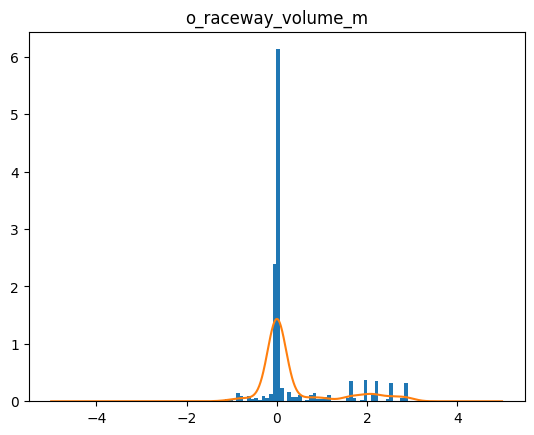

torch.Size([1000])
7351  loss=  tensor(2.5499, grad_fn=<MeanBackward0>)
7352  loss=  tensor(2.5842, grad_fn=<MeanBackward0>)
7353  loss=  tensor(2.5723, grad_fn=<MeanBackward0>)
7354  loss=  tensor(2.5574, grad_fn=<MeanBackward0>)
7355  loss=  tensor(2.5996, grad_fn=<MeanBackward0>)
7356  loss=  tensor(2.5932, grad_fn=<MeanBackward0>)
7357  loss=  tensor(2.5698, grad_fn=<MeanBackward0>)
7358  loss=  tensor(2.6045, grad_fn=<MeanBackward0>)
7359  loss=  tensor(2.5974, grad_fn=<MeanBackward0>)
7360  loss=  tensor(2.6146, grad_fn=<MeanBackward0>)
7361  loss=  tensor(2.5830, grad_fn=<MeanBackward0>)
7362  loss=  tensor(2.5792, grad_fn=<MeanBackward0>)
7363  loss=  tensor(2.5774, grad_fn=<MeanBackward0>)
7364  loss=  tensor(2.5889, grad_fn=<MeanBackward0>)
7365  loss=  tensor(2.5625, grad_fn=<MeanBackward0>)
7366  loss=  tensor(2.5980, grad_fn=<MeanBackward0>)
7367  loss=  tensor(2.5774, grad_fn=<MeanBackward0>)
7368  loss=  tensor(2.6512, grad_fn=<MeanBackward0>)
7369  loss=  tensor(2.5825,

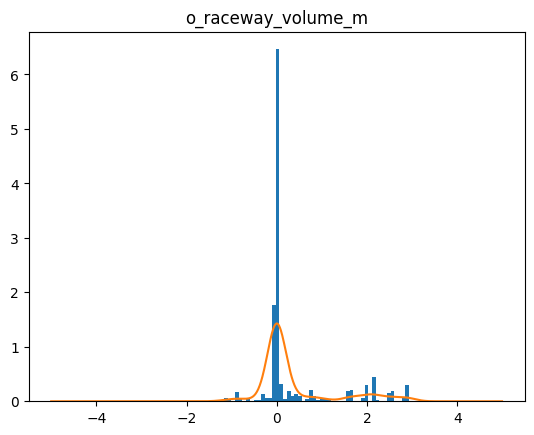

torch.Size([1000])
7401  loss=  tensor(2.5596, grad_fn=<MeanBackward0>)
7402  loss=  tensor(2.5909, grad_fn=<MeanBackward0>)
7403  loss=  tensor(2.5783, grad_fn=<MeanBackward0>)
7404  loss=  tensor(2.6010, grad_fn=<MeanBackward0>)
7405  loss=  tensor(2.5528, grad_fn=<MeanBackward0>)
7406  loss=  tensor(2.5716, grad_fn=<MeanBackward0>)
7407  loss=  tensor(2.5924, grad_fn=<MeanBackward0>)
7408  loss=  tensor(2.6154, grad_fn=<MeanBackward0>)
7409  loss=  tensor(2.6073, grad_fn=<MeanBackward0>)
7410  loss=  tensor(2.5726, grad_fn=<MeanBackward0>)
7411  loss=  tensor(2.5968, grad_fn=<MeanBackward0>)
7412  loss=  tensor(2.6302, grad_fn=<MeanBackward0>)
7413  loss=  tensor(2.6129, grad_fn=<MeanBackward0>)
7414  loss=  tensor(2.5520, grad_fn=<MeanBackward0>)
7415  loss=  tensor(2.5960, grad_fn=<MeanBackward0>)
7416  loss=  tensor(2.5918, grad_fn=<MeanBackward0>)
7417  loss=  tensor(2.5829, grad_fn=<MeanBackward0>)
7418  loss=  tensor(2.5890, grad_fn=<MeanBackward0>)
7419  loss=  tensor(2.6103,

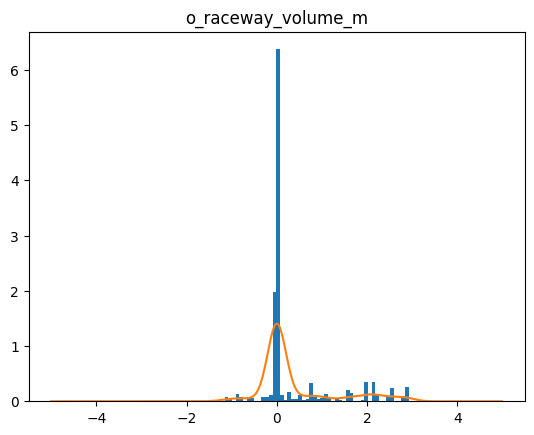

torch.Size([1000])
7451  loss=  tensor(2.5855, grad_fn=<MeanBackward0>)
7452  loss=  tensor(2.6034, grad_fn=<MeanBackward0>)
7453  loss=  tensor(2.5964, grad_fn=<MeanBackward0>)
7454  loss=  tensor(2.5559, grad_fn=<MeanBackward0>)
7455  loss=  tensor(2.6158, grad_fn=<MeanBackward0>)
7456  loss=  tensor(2.5780, grad_fn=<MeanBackward0>)
7457  loss=  tensor(2.5570, grad_fn=<MeanBackward0>)
7458  loss=  tensor(2.5908, grad_fn=<MeanBackward0>)
7459  loss=  tensor(2.6196, grad_fn=<MeanBackward0>)
7460  loss=  tensor(2.6040, grad_fn=<MeanBackward0>)
7461  loss=  tensor(2.5982, grad_fn=<MeanBackward0>)
7462  loss=  tensor(2.5576, grad_fn=<MeanBackward0>)
7463  loss=  tensor(2.5833, grad_fn=<MeanBackward0>)
7464  loss=  tensor(2.5467, grad_fn=<MeanBackward0>)
7465  loss=  tensor(2.5901, grad_fn=<MeanBackward0>)
7466  loss=  tensor(2.5591, grad_fn=<MeanBackward0>)
7467  loss=  tensor(2.5759, grad_fn=<MeanBackward0>)
7468  loss=  tensor(2.5695, grad_fn=<MeanBackward0>)
7469  loss=  tensor(2.5556,

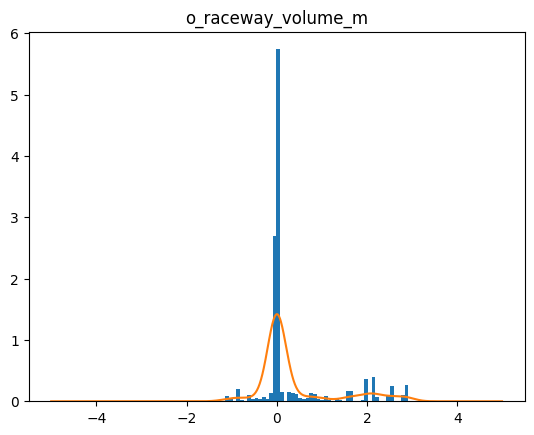

torch.Size([1000])
7501  loss=  tensor(2.5926, grad_fn=<MeanBackward0>)
7502  loss=  tensor(2.6399, grad_fn=<MeanBackward0>)
7503  loss=  tensor(2.5865, grad_fn=<MeanBackward0>)
7504  loss=  tensor(2.6203, grad_fn=<MeanBackward0>)
7505  loss=  tensor(2.6067, grad_fn=<MeanBackward0>)
7506  loss=  tensor(2.5769, grad_fn=<MeanBackward0>)
7507  loss=  tensor(2.6018, grad_fn=<MeanBackward0>)
7508  loss=  tensor(2.6001, grad_fn=<MeanBackward0>)
7509  loss=  tensor(2.5733, grad_fn=<MeanBackward0>)
7510  loss=  tensor(2.5535, grad_fn=<MeanBackward0>)
7511  loss=  tensor(2.6180, grad_fn=<MeanBackward0>)
7512  loss=  tensor(2.5646, grad_fn=<MeanBackward0>)
7513  loss=  tensor(2.5964, grad_fn=<MeanBackward0>)
7514  loss=  tensor(2.6045, grad_fn=<MeanBackward0>)
7515  loss=  tensor(2.5912, grad_fn=<MeanBackward0>)
7516  loss=  tensor(2.6072, grad_fn=<MeanBackward0>)
7517  loss=  tensor(2.5818, grad_fn=<MeanBackward0>)
7518  loss=  tensor(2.5630, grad_fn=<MeanBackward0>)
7519  loss=  tensor(2.6132,

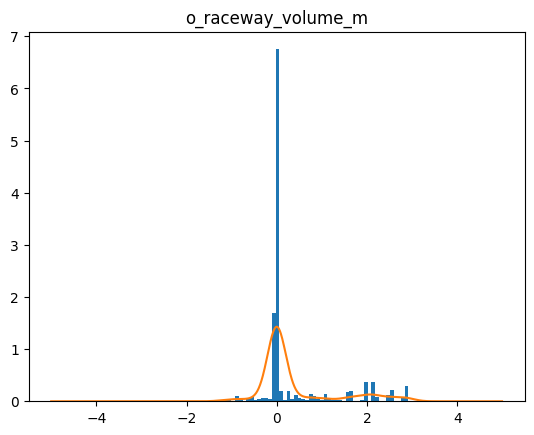

torch.Size([1000])
7551  loss=  tensor(2.5798, grad_fn=<MeanBackward0>)
7552  loss=  tensor(2.5675, grad_fn=<MeanBackward0>)
7553  loss=  tensor(2.5839, grad_fn=<MeanBackward0>)
7554  loss=  tensor(2.5860, grad_fn=<MeanBackward0>)
7555  loss=  tensor(2.5708, grad_fn=<MeanBackward0>)
7556  loss=  tensor(2.5940, grad_fn=<MeanBackward0>)
7557  loss=  tensor(2.5768, grad_fn=<MeanBackward0>)
7558  loss=  tensor(2.5779, grad_fn=<MeanBackward0>)
7559  loss=  tensor(2.6031, grad_fn=<MeanBackward0>)
7560  loss=  tensor(2.5879, grad_fn=<MeanBackward0>)
7561  loss=  tensor(2.5850, grad_fn=<MeanBackward0>)
7562  loss=  tensor(2.5867, grad_fn=<MeanBackward0>)
7563  loss=  tensor(2.6082, grad_fn=<MeanBackward0>)
7564  loss=  tensor(2.6007, grad_fn=<MeanBackward0>)
7565  loss=  tensor(2.5774, grad_fn=<MeanBackward0>)
7566  loss=  tensor(2.6013, grad_fn=<MeanBackward0>)
7567  loss=  tensor(2.5653, grad_fn=<MeanBackward0>)
7568  loss=  tensor(2.5886, grad_fn=<MeanBackward0>)
7569  loss=  tensor(2.5928,

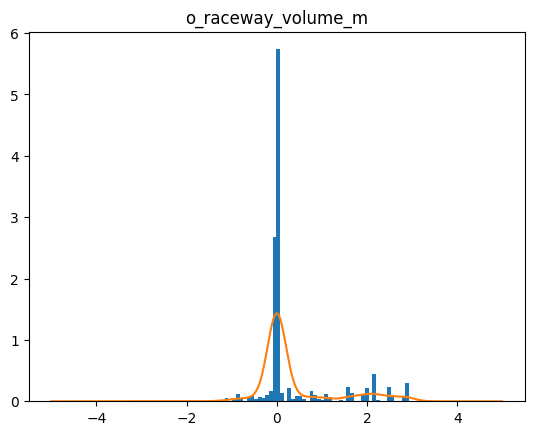

torch.Size([1000])
7601  loss=  tensor(2.6181, grad_fn=<MeanBackward0>)
7602  loss=  tensor(2.5677, grad_fn=<MeanBackward0>)
7603  loss=  tensor(2.6053, grad_fn=<MeanBackward0>)
7604  loss=  tensor(2.5544, grad_fn=<MeanBackward0>)
7605  loss=  tensor(2.5696, grad_fn=<MeanBackward0>)
7606  loss=  tensor(2.6074, grad_fn=<MeanBackward0>)
7607  loss=  tensor(2.5463, grad_fn=<MeanBackward0>)
7608  loss=  tensor(2.5925, grad_fn=<MeanBackward0>)
7609  loss=  tensor(2.5927, grad_fn=<MeanBackward0>)
7610  loss=  tensor(2.5802, grad_fn=<MeanBackward0>)
7611  loss=  tensor(2.5890, grad_fn=<MeanBackward0>)
7612  loss=  tensor(2.5915, grad_fn=<MeanBackward0>)
7613  loss=  tensor(2.5642, grad_fn=<MeanBackward0>)
7614  loss=  tensor(2.5651, grad_fn=<MeanBackward0>)
7615  loss=  tensor(2.5672, grad_fn=<MeanBackward0>)
7616  loss=  tensor(2.6244, grad_fn=<MeanBackward0>)
7617  loss=  tensor(2.5775, grad_fn=<MeanBackward0>)
7618  loss=  tensor(2.5325, grad_fn=<MeanBackward0>)
7619  loss=  tensor(2.5932,

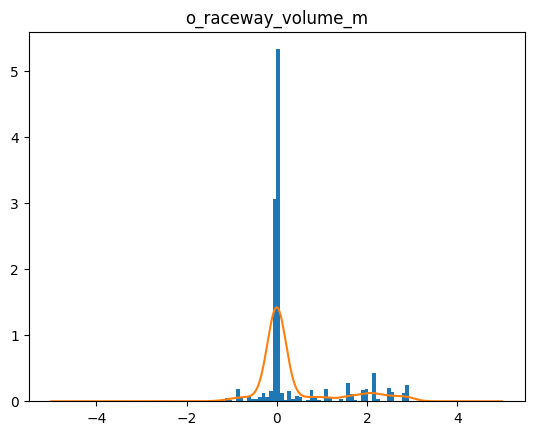

torch.Size([1000])
7651  loss=  tensor(2.6060, grad_fn=<MeanBackward0>)
7652  loss=  tensor(2.5946, grad_fn=<MeanBackward0>)
7653  loss=  tensor(2.6147, grad_fn=<MeanBackward0>)
7654  loss=  tensor(2.5843, grad_fn=<MeanBackward0>)
7655  loss=  tensor(2.5612, grad_fn=<MeanBackward0>)
7656  loss=  tensor(2.6071, grad_fn=<MeanBackward0>)
7657  loss=  tensor(2.6063, grad_fn=<MeanBackward0>)
7658  loss=  tensor(2.5930, grad_fn=<MeanBackward0>)
7659  loss=  tensor(2.5931, grad_fn=<MeanBackward0>)
7660  loss=  tensor(2.5821, grad_fn=<MeanBackward0>)
7661  loss=  tensor(2.5787, grad_fn=<MeanBackward0>)
7662  loss=  tensor(2.5698, grad_fn=<MeanBackward0>)
7663  loss=  tensor(2.6284, grad_fn=<MeanBackward0>)
7664  loss=  tensor(2.6201, grad_fn=<MeanBackward0>)
7665  loss=  tensor(2.5862, grad_fn=<MeanBackward0>)
7666  loss=  tensor(2.5622, grad_fn=<MeanBackward0>)
7667  loss=  tensor(2.6012, grad_fn=<MeanBackward0>)
7668  loss=  tensor(2.6041, grad_fn=<MeanBackward0>)
7669  loss=  tensor(2.5925,

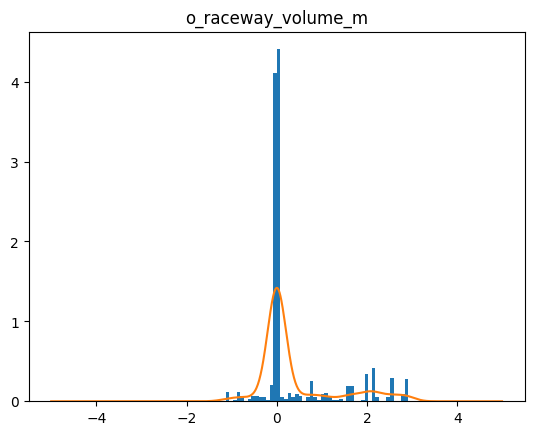

torch.Size([1000])
7701  loss=  tensor(2.5758, grad_fn=<MeanBackward0>)
7702  loss=  tensor(2.6018, grad_fn=<MeanBackward0>)
7703  loss=  tensor(2.5558, grad_fn=<MeanBackward0>)
7704  loss=  tensor(2.5932, grad_fn=<MeanBackward0>)
7705  loss=  tensor(2.5599, grad_fn=<MeanBackward0>)
7706  loss=  tensor(2.5913, grad_fn=<MeanBackward0>)
7707  loss=  tensor(2.5836, grad_fn=<MeanBackward0>)
7708  loss=  tensor(2.5848, grad_fn=<MeanBackward0>)
7709  loss=  tensor(2.6336, grad_fn=<MeanBackward0>)
7710  loss=  tensor(2.6063, grad_fn=<MeanBackward0>)
7711  loss=  tensor(2.5800, grad_fn=<MeanBackward0>)
7712  loss=  tensor(2.6144, grad_fn=<MeanBackward0>)
7713  loss=  tensor(2.5841, grad_fn=<MeanBackward0>)
7714  loss=  tensor(2.5538, grad_fn=<MeanBackward0>)
7715  loss=  tensor(2.6028, grad_fn=<MeanBackward0>)
7716  loss=  tensor(2.5845, grad_fn=<MeanBackward0>)
7717  loss=  tensor(2.6023, grad_fn=<MeanBackward0>)
7718  loss=  tensor(2.5657, grad_fn=<MeanBackward0>)
7719  loss=  tensor(2.5626,

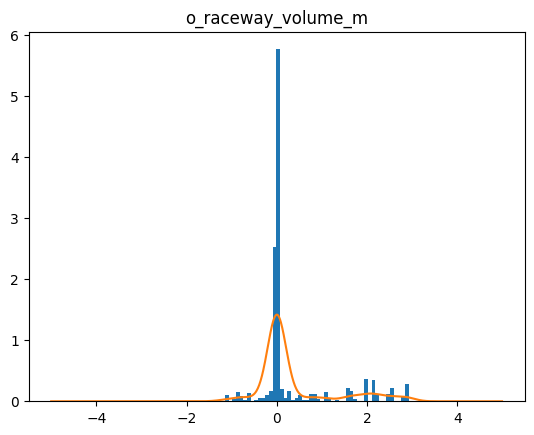

torch.Size([1000])
7751  loss=  tensor(2.5689, grad_fn=<MeanBackward0>)
7752  loss=  tensor(2.5583, grad_fn=<MeanBackward0>)
7753  loss=  tensor(2.5922, grad_fn=<MeanBackward0>)
7754  loss=  tensor(2.5758, grad_fn=<MeanBackward0>)
7755  loss=  tensor(2.5841, grad_fn=<MeanBackward0>)
7756  loss=  tensor(2.5873, grad_fn=<MeanBackward0>)
7757  loss=  tensor(2.5771, grad_fn=<MeanBackward0>)
7758  loss=  tensor(2.6158, grad_fn=<MeanBackward0>)
7759  loss=  tensor(2.6128, grad_fn=<MeanBackward0>)
7760  loss=  tensor(2.5800, grad_fn=<MeanBackward0>)
7761  loss=  tensor(2.5796, grad_fn=<MeanBackward0>)
7762  loss=  tensor(2.6116, grad_fn=<MeanBackward0>)
7763  loss=  tensor(2.5970, grad_fn=<MeanBackward0>)
7764  loss=  tensor(2.6101, grad_fn=<MeanBackward0>)
7765  loss=  tensor(2.6205, grad_fn=<MeanBackward0>)
7766  loss=  tensor(2.5901, grad_fn=<MeanBackward0>)
7767  loss=  tensor(2.5759, grad_fn=<MeanBackward0>)
7768  loss=  tensor(2.6059, grad_fn=<MeanBackward0>)
7769  loss=  tensor(2.5559,

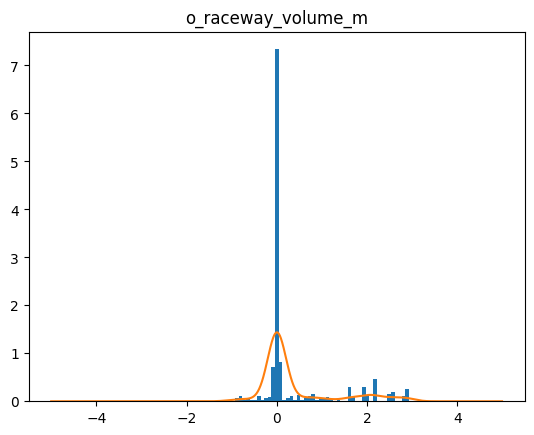

torch.Size([1000])
7801  loss=  tensor(2.5699, grad_fn=<MeanBackward0>)
7802  loss=  tensor(2.5862, grad_fn=<MeanBackward0>)
7803  loss=  tensor(2.5785, grad_fn=<MeanBackward0>)
7804  loss=  tensor(2.6284, grad_fn=<MeanBackward0>)
7805  loss=  tensor(2.5802, grad_fn=<MeanBackward0>)
7806  loss=  tensor(2.5760, grad_fn=<MeanBackward0>)
7807  loss=  tensor(2.5987, grad_fn=<MeanBackward0>)
7808  loss=  tensor(2.5521, grad_fn=<MeanBackward0>)
7809  loss=  tensor(2.5588, grad_fn=<MeanBackward0>)
7810  loss=  tensor(2.5773, grad_fn=<MeanBackward0>)
7811  loss=  tensor(2.5841, grad_fn=<MeanBackward0>)
7812  loss=  tensor(2.5738, grad_fn=<MeanBackward0>)
7813  loss=  tensor(2.5731, grad_fn=<MeanBackward0>)
7814  loss=  tensor(2.6041, grad_fn=<MeanBackward0>)
7815  loss=  tensor(2.5506, grad_fn=<MeanBackward0>)
7816  loss=  tensor(2.6145, grad_fn=<MeanBackward0>)
7817  loss=  tensor(2.5984, grad_fn=<MeanBackward0>)
7818  loss=  tensor(2.5988, grad_fn=<MeanBackward0>)
7819  loss=  tensor(2.5604,

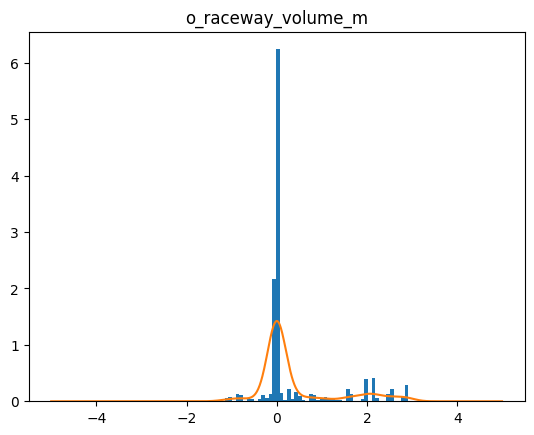

torch.Size([1000])
7851  loss=  tensor(2.5984, grad_fn=<MeanBackward0>)
7852  loss=  tensor(2.6126, grad_fn=<MeanBackward0>)
7853  loss=  tensor(2.5596, grad_fn=<MeanBackward0>)
7854  loss=  tensor(2.5951, grad_fn=<MeanBackward0>)
7855  loss=  tensor(2.5424, grad_fn=<MeanBackward0>)
7856  loss=  tensor(2.5535, grad_fn=<MeanBackward0>)
7857  loss=  tensor(2.5927, grad_fn=<MeanBackward0>)
7858  loss=  tensor(2.6165, grad_fn=<MeanBackward0>)
7859  loss=  tensor(2.5780, grad_fn=<MeanBackward0>)
7860  loss=  tensor(2.5689, grad_fn=<MeanBackward0>)
7861  loss=  tensor(2.6090, grad_fn=<MeanBackward0>)
7862  loss=  tensor(2.5886, grad_fn=<MeanBackward0>)
7863  loss=  tensor(2.5942, grad_fn=<MeanBackward0>)
7864  loss=  tensor(2.6295, grad_fn=<MeanBackward0>)
7865  loss=  tensor(2.5649, grad_fn=<MeanBackward0>)
7866  loss=  tensor(2.5799, grad_fn=<MeanBackward0>)
7867  loss=  tensor(2.5694, grad_fn=<MeanBackward0>)
7868  loss=  tensor(2.5624, grad_fn=<MeanBackward0>)
7869  loss=  tensor(2.6054,

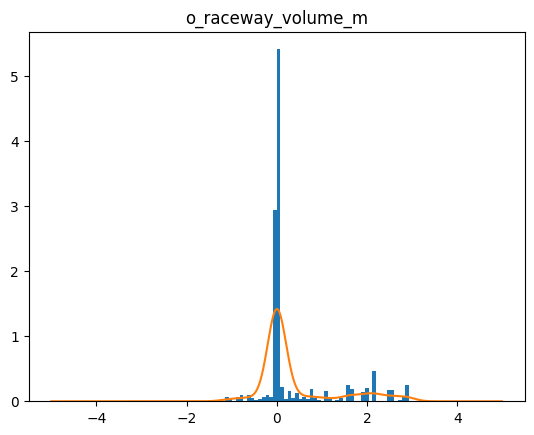

torch.Size([1000])
7901  loss=  tensor(2.5683, grad_fn=<MeanBackward0>)
7902  loss=  tensor(2.6004, grad_fn=<MeanBackward0>)
7903  loss=  tensor(2.5492, grad_fn=<MeanBackward0>)
7904  loss=  tensor(2.6078, grad_fn=<MeanBackward0>)
7905  loss=  tensor(2.5740, grad_fn=<MeanBackward0>)
7906  loss=  tensor(2.5934, grad_fn=<MeanBackward0>)
7907  loss=  tensor(2.6143, grad_fn=<MeanBackward0>)
7908  loss=  tensor(2.6084, grad_fn=<MeanBackward0>)
7909  loss=  tensor(2.5721, grad_fn=<MeanBackward0>)
7910  loss=  tensor(2.5581, grad_fn=<MeanBackward0>)
7911  loss=  tensor(2.5435, grad_fn=<MeanBackward0>)
7912  loss=  tensor(2.5970, grad_fn=<MeanBackward0>)
7913  loss=  tensor(2.6138, grad_fn=<MeanBackward0>)
7914  loss=  tensor(2.6033, grad_fn=<MeanBackward0>)
7915  loss=  tensor(2.6227, grad_fn=<MeanBackward0>)
7916  loss=  tensor(2.5667, grad_fn=<MeanBackward0>)
7917  loss=  tensor(2.5710, grad_fn=<MeanBackward0>)
7918  loss=  tensor(2.5421, grad_fn=<MeanBackward0>)
7919  loss=  tensor(2.6133,

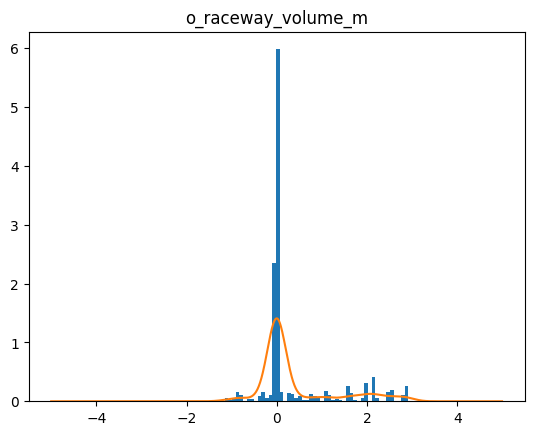

torch.Size([1000])
7951  loss=  tensor(2.5766, grad_fn=<MeanBackward0>)
7952  loss=  tensor(2.5679, grad_fn=<MeanBackward0>)
7953  loss=  tensor(2.5594, grad_fn=<MeanBackward0>)
7954  loss=  tensor(2.5728, grad_fn=<MeanBackward0>)
7955  loss=  tensor(2.5651, grad_fn=<MeanBackward0>)
7956  loss=  tensor(2.5904, grad_fn=<MeanBackward0>)
7957  loss=  tensor(2.5780, grad_fn=<MeanBackward0>)
7958  loss=  tensor(2.5693, grad_fn=<MeanBackward0>)
7959  loss=  tensor(2.6143, grad_fn=<MeanBackward0>)
7960  loss=  tensor(2.5838, grad_fn=<MeanBackward0>)
7961  loss=  tensor(2.5794, grad_fn=<MeanBackward0>)
7962  loss=  tensor(2.5860, grad_fn=<MeanBackward0>)
7963  loss=  tensor(2.5910, grad_fn=<MeanBackward0>)
7964  loss=  tensor(2.5919, grad_fn=<MeanBackward0>)
7965  loss=  tensor(2.6249, grad_fn=<MeanBackward0>)
7966  loss=  tensor(2.5683, grad_fn=<MeanBackward0>)
7967  loss=  tensor(2.5727, grad_fn=<MeanBackward0>)
7968  loss=  tensor(2.6074, grad_fn=<MeanBackward0>)
7969  loss=  tensor(2.6229,

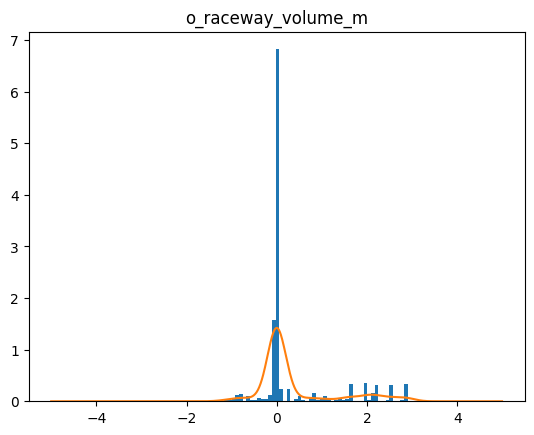

torch.Size([1000])
8001  loss=  tensor(2.6002, grad_fn=<MeanBackward0>)
8002  loss=  tensor(2.5813, grad_fn=<MeanBackward0>)
8003  loss=  tensor(2.6183, grad_fn=<MeanBackward0>)
8004  loss=  tensor(2.5995, grad_fn=<MeanBackward0>)
8005  loss=  tensor(2.5650, grad_fn=<MeanBackward0>)
8006  loss=  tensor(2.5786, grad_fn=<MeanBackward0>)
8007  loss=  tensor(2.5691, grad_fn=<MeanBackward0>)
8008  loss=  tensor(2.5826, grad_fn=<MeanBackward0>)
8009  loss=  tensor(2.5923, grad_fn=<MeanBackward0>)
8010  loss=  tensor(2.5874, grad_fn=<MeanBackward0>)
8011  loss=  tensor(2.5554, grad_fn=<MeanBackward0>)
8012  loss=  tensor(2.5971, grad_fn=<MeanBackward0>)
8013  loss=  tensor(2.5835, grad_fn=<MeanBackward0>)
8014  loss=  tensor(2.5963, grad_fn=<MeanBackward0>)
8015  loss=  tensor(2.5935, grad_fn=<MeanBackward0>)
8016  loss=  tensor(2.5930, grad_fn=<MeanBackward0>)
8017  loss=  tensor(2.5802, grad_fn=<MeanBackward0>)
8018  loss=  tensor(2.5885, grad_fn=<MeanBackward0>)
8019  loss=  tensor(2.5786,

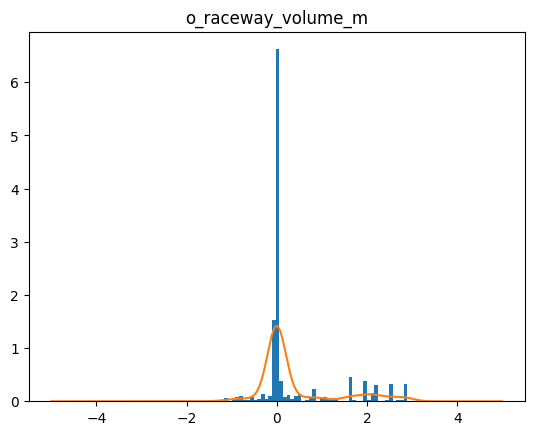

torch.Size([1000])
8051  loss=  tensor(2.5839, grad_fn=<MeanBackward0>)
8052  loss=  tensor(2.5933, grad_fn=<MeanBackward0>)
8053  loss=  tensor(2.5692, grad_fn=<MeanBackward0>)
8054  loss=  tensor(2.5292, grad_fn=<MeanBackward0>)
8055  loss=  tensor(2.5904, grad_fn=<MeanBackward0>)
8056  loss=  tensor(2.5967, grad_fn=<MeanBackward0>)
8057  loss=  tensor(2.5870, grad_fn=<MeanBackward0>)
8058  loss=  tensor(2.5686, grad_fn=<MeanBackward0>)
8059  loss=  tensor(2.5708, grad_fn=<MeanBackward0>)
8060  loss=  tensor(2.6207, grad_fn=<MeanBackward0>)
8061  loss=  tensor(2.5547, grad_fn=<MeanBackward0>)
8062  loss=  tensor(2.5919, grad_fn=<MeanBackward0>)
8063  loss=  tensor(2.5990, grad_fn=<MeanBackward0>)
8064  loss=  tensor(2.5470, grad_fn=<MeanBackward0>)
8065  loss=  tensor(2.5872, grad_fn=<MeanBackward0>)
8066  loss=  tensor(2.5780, grad_fn=<MeanBackward0>)
8067  loss=  tensor(2.5674, grad_fn=<MeanBackward0>)
8068  loss=  tensor(2.5860, grad_fn=<MeanBackward0>)
8069  loss=  tensor(2.5683,

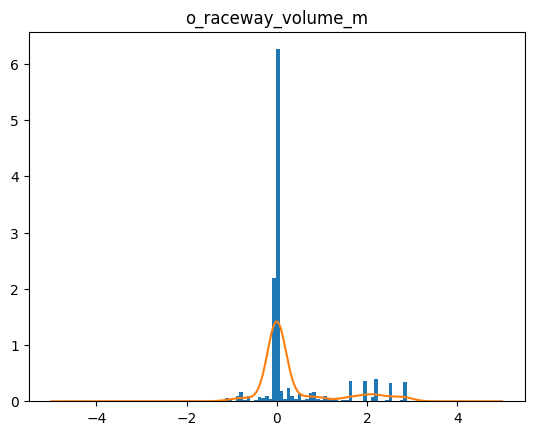

torch.Size([1000])
8101  loss=  tensor(2.5579, grad_fn=<MeanBackward0>)
8102  loss=  tensor(2.6274, grad_fn=<MeanBackward0>)
8103  loss=  tensor(2.5925, grad_fn=<MeanBackward0>)
8104  loss=  tensor(2.5630, grad_fn=<MeanBackward0>)
8105  loss=  tensor(2.5584, grad_fn=<MeanBackward0>)
8106  loss=  tensor(2.5804, grad_fn=<MeanBackward0>)
8107  loss=  tensor(2.5983, grad_fn=<MeanBackward0>)
8108  loss=  tensor(2.5846, grad_fn=<MeanBackward0>)
8109  loss=  tensor(2.5888, grad_fn=<MeanBackward0>)
8110  loss=  tensor(2.5916, grad_fn=<MeanBackward0>)
8111  loss=  tensor(2.6019, grad_fn=<MeanBackward0>)
8112  loss=  tensor(2.5918, grad_fn=<MeanBackward0>)
8113  loss=  tensor(2.5915, grad_fn=<MeanBackward0>)
8114  loss=  tensor(2.5792, grad_fn=<MeanBackward0>)
8115  loss=  tensor(2.5335, grad_fn=<MeanBackward0>)
8116  loss=  tensor(2.5556, grad_fn=<MeanBackward0>)
8117  loss=  tensor(2.5725, grad_fn=<MeanBackward0>)
8118  loss=  tensor(2.5883, grad_fn=<MeanBackward0>)
8119  loss=  tensor(2.5850,

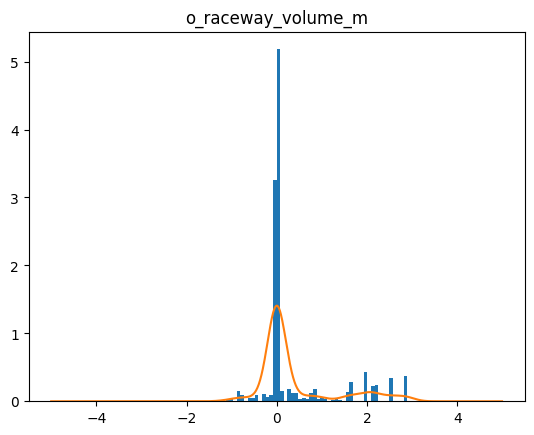

torch.Size([1000])
8151  loss=  tensor(2.5938, grad_fn=<MeanBackward0>)
8152  loss=  tensor(2.5903, grad_fn=<MeanBackward0>)
8153  loss=  tensor(2.5942, grad_fn=<MeanBackward0>)
8154  loss=  tensor(2.5810, grad_fn=<MeanBackward0>)
8155  loss=  tensor(2.5950, grad_fn=<MeanBackward0>)
8156  loss=  tensor(2.5711, grad_fn=<MeanBackward0>)
8157  loss=  tensor(2.5878, grad_fn=<MeanBackward0>)
8158  loss=  tensor(2.6203, grad_fn=<MeanBackward0>)
8159  loss=  tensor(2.5961, grad_fn=<MeanBackward0>)
8160  loss=  tensor(2.5722, grad_fn=<MeanBackward0>)
8161  loss=  tensor(2.5790, grad_fn=<MeanBackward0>)
8162  loss=  tensor(2.6497, grad_fn=<MeanBackward0>)
8163  loss=  tensor(2.5560, grad_fn=<MeanBackward0>)
8164  loss=  tensor(2.5477, grad_fn=<MeanBackward0>)
8165  loss=  tensor(2.5863, grad_fn=<MeanBackward0>)
8166  loss=  tensor(2.6042, grad_fn=<MeanBackward0>)
8167  loss=  tensor(2.5650, grad_fn=<MeanBackward0>)
8168  loss=  tensor(2.5919, grad_fn=<MeanBackward0>)
8169  loss=  tensor(2.5768,

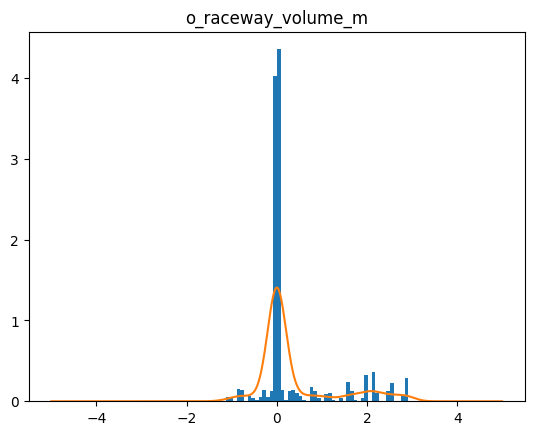

torch.Size([1000])
8201  loss=  tensor(2.5961, grad_fn=<MeanBackward0>)
8202  loss=  tensor(2.6316, grad_fn=<MeanBackward0>)
8203  loss=  tensor(2.5557, grad_fn=<MeanBackward0>)
8204  loss=  tensor(2.5889, grad_fn=<MeanBackward0>)
8205  loss=  tensor(2.5720, grad_fn=<MeanBackward0>)
8206  loss=  tensor(2.5758, grad_fn=<MeanBackward0>)
8207  loss=  tensor(2.5873, grad_fn=<MeanBackward0>)
8208  loss=  tensor(2.5908, grad_fn=<MeanBackward0>)
8209  loss=  tensor(2.5673, grad_fn=<MeanBackward0>)
8210  loss=  tensor(2.5851, grad_fn=<MeanBackward0>)
8211  loss=  tensor(2.6099, grad_fn=<MeanBackward0>)
8212  loss=  tensor(2.5613, grad_fn=<MeanBackward0>)
8213  loss=  tensor(2.6018, grad_fn=<MeanBackward0>)
8214  loss=  tensor(2.5888, grad_fn=<MeanBackward0>)
8215  loss=  tensor(2.5749, grad_fn=<MeanBackward0>)
8216  loss=  tensor(2.5797, grad_fn=<MeanBackward0>)
8217  loss=  tensor(2.5828, grad_fn=<MeanBackward0>)
8218  loss=  tensor(2.5681, grad_fn=<MeanBackward0>)
8219  loss=  tensor(2.5763,

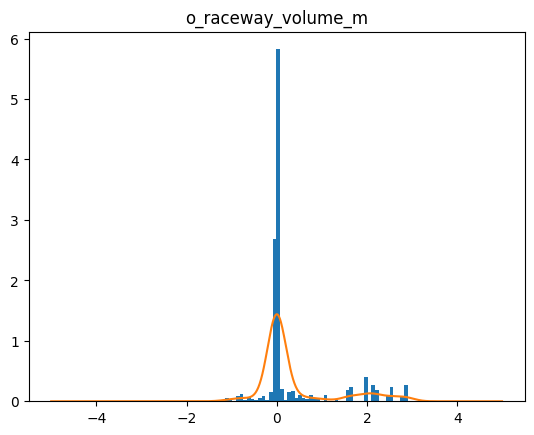

torch.Size([1000])
8251  loss=  tensor(2.6067, grad_fn=<MeanBackward0>)
8252  loss=  tensor(2.6078, grad_fn=<MeanBackward0>)
8253  loss=  tensor(2.5463, grad_fn=<MeanBackward0>)
8254  loss=  tensor(2.5598, grad_fn=<MeanBackward0>)
8255  loss=  tensor(2.5535, grad_fn=<MeanBackward0>)
8256  loss=  tensor(2.5945, grad_fn=<MeanBackward0>)
8257  loss=  tensor(2.6022, grad_fn=<MeanBackward0>)
8258  loss=  tensor(2.5955, grad_fn=<MeanBackward0>)
8259  loss=  tensor(2.5751, grad_fn=<MeanBackward0>)
8260  loss=  tensor(2.5892, grad_fn=<MeanBackward0>)
8261  loss=  tensor(2.5764, grad_fn=<MeanBackward0>)
8262  loss=  tensor(2.5754, grad_fn=<MeanBackward0>)
8263  loss=  tensor(2.5806, grad_fn=<MeanBackward0>)
8264  loss=  tensor(2.5766, grad_fn=<MeanBackward0>)
8265  loss=  tensor(2.5918, grad_fn=<MeanBackward0>)
8266  loss=  tensor(2.5804, grad_fn=<MeanBackward0>)
8267  loss=  tensor(2.5943, grad_fn=<MeanBackward0>)
8268  loss=  tensor(2.5913, grad_fn=<MeanBackward0>)
8269  loss=  tensor(2.6043,

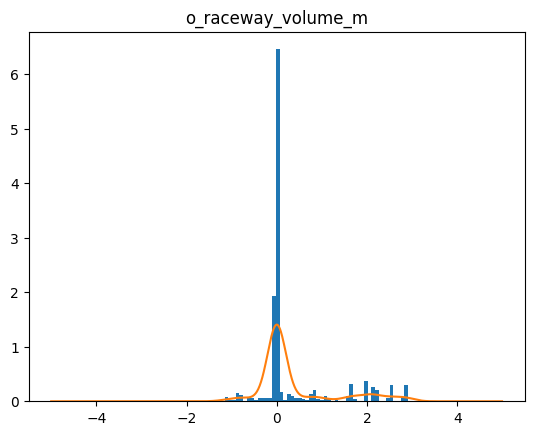

torch.Size([1000])
8301  loss=  tensor(2.5682, grad_fn=<MeanBackward0>)
8302  loss=  tensor(2.5758, grad_fn=<MeanBackward0>)
8303  loss=  tensor(2.6136, grad_fn=<MeanBackward0>)
8304  loss=  tensor(2.6068, grad_fn=<MeanBackward0>)
8305  loss=  tensor(2.5641, grad_fn=<MeanBackward0>)
8306  loss=  tensor(2.6281, grad_fn=<MeanBackward0>)
8307  loss=  tensor(2.5605, grad_fn=<MeanBackward0>)
8308  loss=  tensor(2.5694, grad_fn=<MeanBackward0>)
8309  loss=  tensor(2.6005, grad_fn=<MeanBackward0>)
8310  loss=  tensor(2.5926, grad_fn=<MeanBackward0>)
8311  loss=  tensor(2.5813, grad_fn=<MeanBackward0>)
8312  loss=  tensor(2.5888, grad_fn=<MeanBackward0>)
8313  loss=  tensor(2.5717, grad_fn=<MeanBackward0>)
8314  loss=  tensor(2.5754, grad_fn=<MeanBackward0>)
8315  loss=  tensor(2.5849, grad_fn=<MeanBackward0>)
8316  loss=  tensor(2.5971, grad_fn=<MeanBackward0>)
8317  loss=  tensor(2.5818, grad_fn=<MeanBackward0>)
8318  loss=  tensor(2.5734, grad_fn=<MeanBackward0>)
8319  loss=  tensor(2.5809,

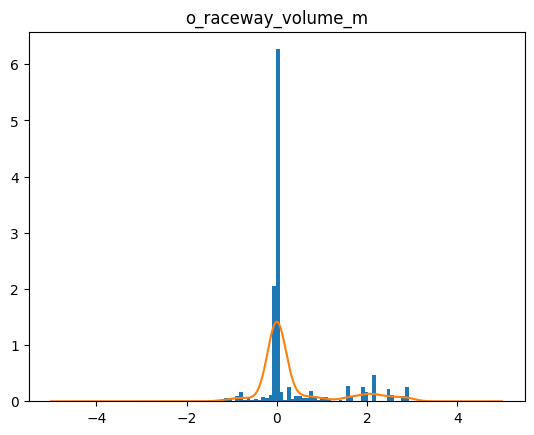

torch.Size([1000])
8351  loss=  tensor(2.5997, grad_fn=<MeanBackward0>)
8352  loss=  tensor(2.5503, grad_fn=<MeanBackward0>)
8353  loss=  tensor(2.5881, grad_fn=<MeanBackward0>)
8354  loss=  tensor(2.6088, grad_fn=<MeanBackward0>)
8355  loss=  tensor(2.5669, grad_fn=<MeanBackward0>)
8356  loss=  tensor(2.6002, grad_fn=<MeanBackward0>)
8357  loss=  tensor(2.5827, grad_fn=<MeanBackward0>)
8358  loss=  tensor(2.5853, grad_fn=<MeanBackward0>)
8359  loss=  tensor(2.5724, grad_fn=<MeanBackward0>)
8360  loss=  tensor(2.5898, grad_fn=<MeanBackward0>)
8361  loss=  tensor(2.5751, grad_fn=<MeanBackward0>)
8362  loss=  tensor(2.6439, grad_fn=<MeanBackward0>)
8363  loss=  tensor(2.5530, grad_fn=<MeanBackward0>)
8364  loss=  tensor(2.5759, grad_fn=<MeanBackward0>)
8365  loss=  tensor(2.5646, grad_fn=<MeanBackward0>)
8366  loss=  tensor(2.5741, grad_fn=<MeanBackward0>)
8367  loss=  tensor(2.5771, grad_fn=<MeanBackward0>)
8368  loss=  tensor(2.6361, grad_fn=<MeanBackward0>)
8369  loss=  tensor(2.5912,

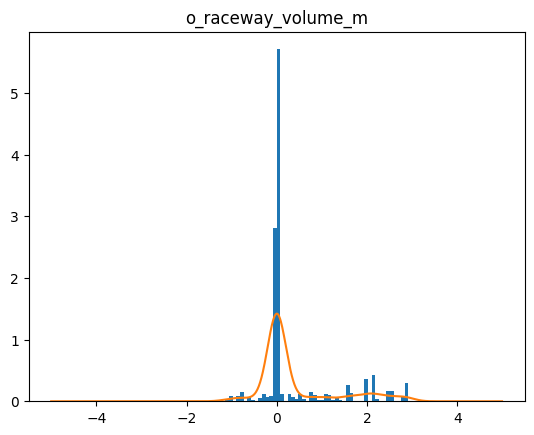

torch.Size([1000])
8401  loss=  tensor(2.6152, grad_fn=<MeanBackward0>)
8402  loss=  tensor(2.5870, grad_fn=<MeanBackward0>)
8403  loss=  tensor(2.5901, grad_fn=<MeanBackward0>)
8404  loss=  tensor(2.5680, grad_fn=<MeanBackward0>)
8405  loss=  tensor(2.6062, grad_fn=<MeanBackward0>)
8406  loss=  tensor(2.6207, grad_fn=<MeanBackward0>)
8407  loss=  tensor(2.5831, grad_fn=<MeanBackward0>)
8408  loss=  tensor(2.5917, grad_fn=<MeanBackward0>)
8409  loss=  tensor(2.5648, grad_fn=<MeanBackward0>)
8410  loss=  tensor(2.5768, grad_fn=<MeanBackward0>)
8411  loss=  tensor(2.5928, grad_fn=<MeanBackward0>)
8412  loss=  tensor(2.6105, grad_fn=<MeanBackward0>)
8413  loss=  tensor(2.5958, grad_fn=<MeanBackward0>)
8414  loss=  tensor(2.5934, grad_fn=<MeanBackward0>)
8415  loss=  tensor(2.5936, grad_fn=<MeanBackward0>)
8416  loss=  tensor(2.6154, grad_fn=<MeanBackward0>)
8417  loss=  tensor(2.5746, grad_fn=<MeanBackward0>)
8418  loss=  tensor(2.5586, grad_fn=<MeanBackward0>)
8419  loss=  tensor(2.5940,

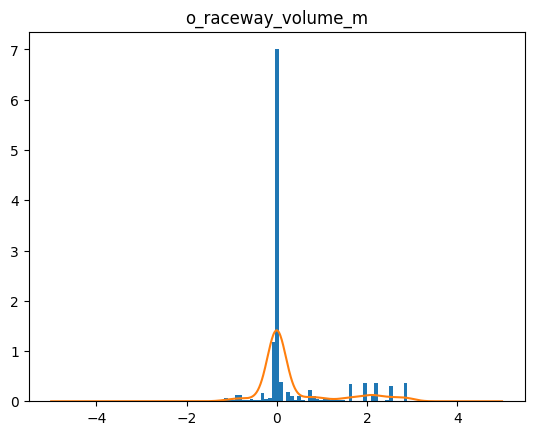

torch.Size([1000])
8451  loss=  tensor(2.5692, grad_fn=<MeanBackward0>)
8452  loss=  tensor(2.5703, grad_fn=<MeanBackward0>)
8453  loss=  tensor(2.5889, grad_fn=<MeanBackward0>)
8454  loss=  tensor(2.5800, grad_fn=<MeanBackward0>)
8455  loss=  tensor(2.6291, grad_fn=<MeanBackward0>)
8456  loss=  tensor(2.5978, grad_fn=<MeanBackward0>)
8457  loss=  tensor(2.6128, grad_fn=<MeanBackward0>)
8458  loss=  tensor(2.5865, grad_fn=<MeanBackward0>)
8459  loss=  tensor(2.5802, grad_fn=<MeanBackward0>)
8460  loss=  tensor(2.5761, grad_fn=<MeanBackward0>)
8461  loss=  tensor(2.5920, grad_fn=<MeanBackward0>)
8462  loss=  tensor(2.6004, grad_fn=<MeanBackward0>)
8463  loss=  tensor(2.5519, grad_fn=<MeanBackward0>)
8464  loss=  tensor(2.6146, grad_fn=<MeanBackward0>)
8465  loss=  tensor(2.5930, grad_fn=<MeanBackward0>)
8466  loss=  tensor(2.5451, grad_fn=<MeanBackward0>)
8467  loss=  tensor(2.5573, grad_fn=<MeanBackward0>)
8468  loss=  tensor(2.5690, grad_fn=<MeanBackward0>)
8469  loss=  tensor(2.5820,

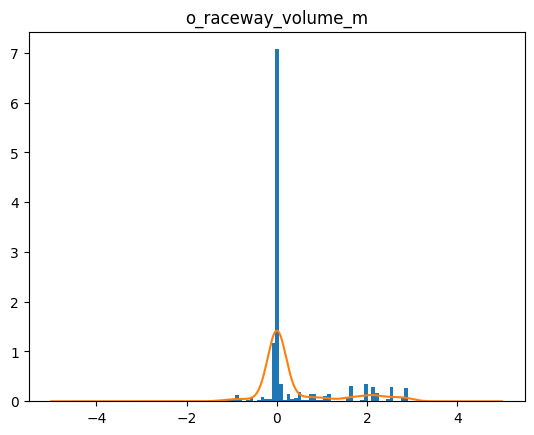

torch.Size([1000])
8501  loss=  tensor(2.5573, grad_fn=<MeanBackward0>)
8502  loss=  tensor(2.5808, grad_fn=<MeanBackward0>)
8503  loss=  tensor(2.5928, grad_fn=<MeanBackward0>)
8504  loss=  tensor(2.6184, grad_fn=<MeanBackward0>)
8505  loss=  tensor(2.5844, grad_fn=<MeanBackward0>)
8506  loss=  tensor(2.5674, grad_fn=<MeanBackward0>)
8507  loss=  tensor(2.5605, grad_fn=<MeanBackward0>)
8508  loss=  tensor(2.5594, grad_fn=<MeanBackward0>)
8509  loss=  tensor(2.5752, grad_fn=<MeanBackward0>)
8510  loss=  tensor(2.5580, grad_fn=<MeanBackward0>)
8511  loss=  tensor(2.6019, grad_fn=<MeanBackward0>)
8512  loss=  tensor(2.5723, grad_fn=<MeanBackward0>)
8513  loss=  tensor(2.5701, grad_fn=<MeanBackward0>)
8514  loss=  tensor(2.5959, grad_fn=<MeanBackward0>)
8515  loss=  tensor(2.5692, grad_fn=<MeanBackward0>)
8516  loss=  tensor(2.6085, grad_fn=<MeanBackward0>)
8517  loss=  tensor(2.5838, grad_fn=<MeanBackward0>)
8518  loss=  tensor(2.5825, grad_fn=<MeanBackward0>)
8519  loss=  tensor(2.5780,

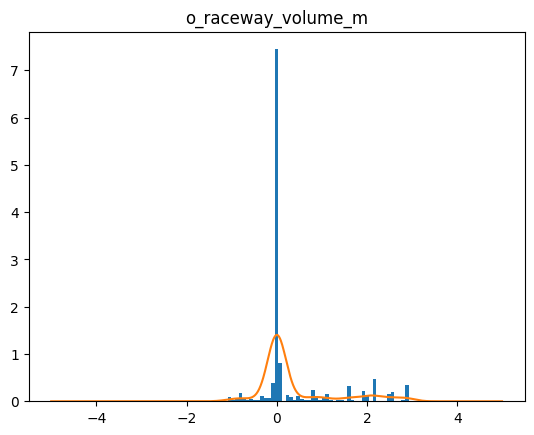

torch.Size([1000])
8551  loss=  tensor(2.5895, grad_fn=<MeanBackward0>)
8552  loss=  tensor(2.6209, grad_fn=<MeanBackward0>)
8553  loss=  tensor(2.5964, grad_fn=<MeanBackward0>)
8554  loss=  tensor(2.5720, grad_fn=<MeanBackward0>)
8555  loss=  tensor(2.6220, grad_fn=<MeanBackward0>)
8556  loss=  tensor(2.5879, grad_fn=<MeanBackward0>)
8557  loss=  tensor(2.5952, grad_fn=<MeanBackward0>)
8558  loss=  tensor(2.5811, grad_fn=<MeanBackward0>)
8559  loss=  tensor(2.5872, grad_fn=<MeanBackward0>)
8560  loss=  tensor(2.5778, grad_fn=<MeanBackward0>)
8561  loss=  tensor(2.6036, grad_fn=<MeanBackward0>)
8562  loss=  tensor(2.5661, grad_fn=<MeanBackward0>)
8563  loss=  tensor(2.5966, grad_fn=<MeanBackward0>)
8564  loss=  tensor(2.5711, grad_fn=<MeanBackward0>)
8565  loss=  tensor(2.5633, grad_fn=<MeanBackward0>)
8566  loss=  tensor(2.5701, grad_fn=<MeanBackward0>)
8567  loss=  tensor(2.6044, grad_fn=<MeanBackward0>)
8568  loss=  tensor(2.5660, grad_fn=<MeanBackward0>)
8569  loss=  tensor(2.6118,

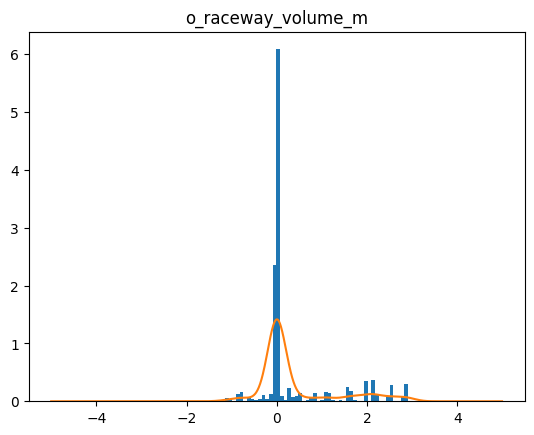

torch.Size([1000])
8601  loss=  tensor(2.6220, grad_fn=<MeanBackward0>)
8602  loss=  tensor(2.6067, grad_fn=<MeanBackward0>)
8603  loss=  tensor(2.5853, grad_fn=<MeanBackward0>)
8604  loss=  tensor(2.5910, grad_fn=<MeanBackward0>)
8605  loss=  tensor(2.5856, grad_fn=<MeanBackward0>)
8606  loss=  tensor(2.5839, grad_fn=<MeanBackward0>)
8607  loss=  tensor(2.5602, grad_fn=<MeanBackward0>)
8608  loss=  tensor(2.5940, grad_fn=<MeanBackward0>)
8609  loss=  tensor(2.6005, grad_fn=<MeanBackward0>)
8610  loss=  tensor(2.6189, grad_fn=<MeanBackward0>)
8611  loss=  tensor(2.5653, grad_fn=<MeanBackward0>)
8612  loss=  tensor(2.5966, grad_fn=<MeanBackward0>)
8613  loss=  tensor(2.5820, grad_fn=<MeanBackward0>)
8614  loss=  tensor(2.5849, grad_fn=<MeanBackward0>)
8615  loss=  tensor(2.6124, grad_fn=<MeanBackward0>)
8616  loss=  tensor(2.5846, grad_fn=<MeanBackward0>)
8617  loss=  tensor(2.6028, grad_fn=<MeanBackward0>)
8618  loss=  tensor(2.5835, grad_fn=<MeanBackward0>)
8619  loss=  tensor(2.5674,

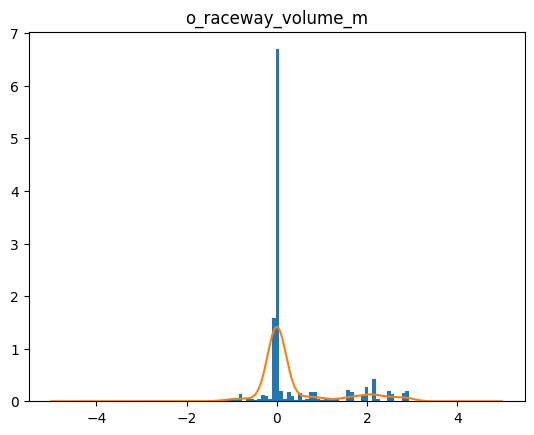

torch.Size([1000])
8651  loss=  tensor(2.6244, grad_fn=<MeanBackward0>)
8652  loss=  tensor(2.5813, grad_fn=<MeanBackward0>)
8653  loss=  tensor(2.6317, grad_fn=<MeanBackward0>)
8654  loss=  tensor(2.5796, grad_fn=<MeanBackward0>)
8655  loss=  tensor(2.5672, grad_fn=<MeanBackward0>)
8656  loss=  tensor(2.5706, grad_fn=<MeanBackward0>)
8657  loss=  tensor(2.6328, grad_fn=<MeanBackward0>)
8658  loss=  tensor(2.5700, grad_fn=<MeanBackward0>)
8659  loss=  tensor(2.5878, grad_fn=<MeanBackward0>)
8660  loss=  tensor(2.5825, grad_fn=<MeanBackward0>)
8661  loss=  tensor(2.5626, grad_fn=<MeanBackward0>)
8662  loss=  tensor(2.5767, grad_fn=<MeanBackward0>)
8663  loss=  tensor(2.6214, grad_fn=<MeanBackward0>)
8664  loss=  tensor(2.5913, grad_fn=<MeanBackward0>)
8665  loss=  tensor(2.6018, grad_fn=<MeanBackward0>)
8666  loss=  tensor(2.5687, grad_fn=<MeanBackward0>)
8667  loss=  tensor(2.5551, grad_fn=<MeanBackward0>)
8668  loss=  tensor(2.5883, grad_fn=<MeanBackward0>)
8669  loss=  tensor(2.5702,

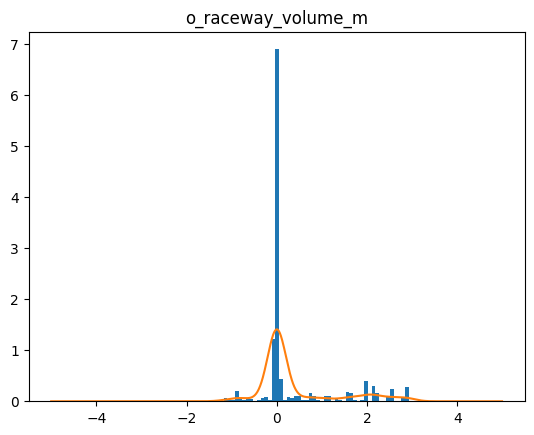

torch.Size([1000])
8701  loss=  tensor(2.5877, grad_fn=<MeanBackward0>)
8702  loss=  tensor(2.5908, grad_fn=<MeanBackward0>)
8703  loss=  tensor(2.5619, grad_fn=<MeanBackward0>)
8704  loss=  tensor(2.5723, grad_fn=<MeanBackward0>)
8705  loss=  tensor(2.5928, grad_fn=<MeanBackward0>)
8706  loss=  tensor(2.5468, grad_fn=<MeanBackward0>)
8707  loss=  tensor(2.6100, grad_fn=<MeanBackward0>)
8708  loss=  tensor(2.5645, grad_fn=<MeanBackward0>)
8709  loss=  tensor(2.5887, grad_fn=<MeanBackward0>)
8710  loss=  tensor(2.5876, grad_fn=<MeanBackward0>)
8711  loss=  tensor(2.6103, grad_fn=<MeanBackward0>)
8712  loss=  tensor(2.5901, grad_fn=<MeanBackward0>)
8713  loss=  tensor(2.5830, grad_fn=<MeanBackward0>)
8714  loss=  tensor(2.5634, grad_fn=<MeanBackward0>)
8715  loss=  tensor(2.5668, grad_fn=<MeanBackward0>)
8716  loss=  tensor(2.6104, grad_fn=<MeanBackward0>)
8717  loss=  tensor(2.5820, grad_fn=<MeanBackward0>)
8718  loss=  tensor(2.5899, grad_fn=<MeanBackward0>)
8719  loss=  tensor(2.6290,

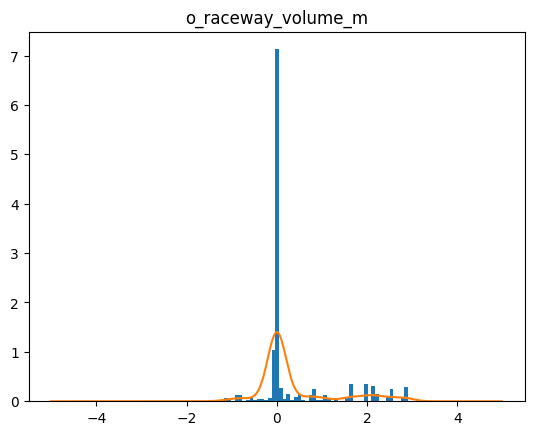

torch.Size([1000])
8751  loss=  tensor(2.6218, grad_fn=<MeanBackward0>)
8752  loss=  tensor(2.5902, grad_fn=<MeanBackward0>)
8753  loss=  tensor(2.5603, grad_fn=<MeanBackward0>)
8754  loss=  tensor(2.5557, grad_fn=<MeanBackward0>)
8755  loss=  tensor(2.5970, grad_fn=<MeanBackward0>)
8756  loss=  tensor(2.5900, grad_fn=<MeanBackward0>)
8757  loss=  tensor(2.5642, grad_fn=<MeanBackward0>)
8758  loss=  tensor(2.5682, grad_fn=<MeanBackward0>)
8759  loss=  tensor(2.5935, grad_fn=<MeanBackward0>)
8760  loss=  tensor(2.5759, grad_fn=<MeanBackward0>)
8761  loss=  tensor(2.5844, grad_fn=<MeanBackward0>)
8762  loss=  tensor(2.5836, grad_fn=<MeanBackward0>)
8763  loss=  tensor(2.5613, grad_fn=<MeanBackward0>)
8764  loss=  tensor(2.5745, grad_fn=<MeanBackward0>)
8765  loss=  tensor(2.5853, grad_fn=<MeanBackward0>)
8766  loss=  tensor(2.5740, grad_fn=<MeanBackward0>)
8767  loss=  tensor(2.5554, grad_fn=<MeanBackward0>)
8768  loss=  tensor(2.6062, grad_fn=<MeanBackward0>)
8769  loss=  tensor(2.6024,

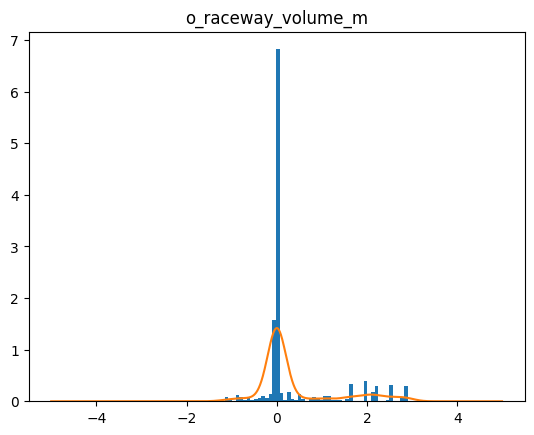

torch.Size([1000])
8801  loss=  tensor(2.5850, grad_fn=<MeanBackward0>)
8802  loss=  tensor(2.6057, grad_fn=<MeanBackward0>)
8803  loss=  tensor(2.6284, grad_fn=<MeanBackward0>)
8804  loss=  tensor(2.5817, grad_fn=<MeanBackward0>)
8805  loss=  tensor(2.5853, grad_fn=<MeanBackward0>)
8806  loss=  tensor(2.5793, grad_fn=<MeanBackward0>)
8807  loss=  tensor(2.5814, grad_fn=<MeanBackward0>)
8808  loss=  tensor(2.5649, grad_fn=<MeanBackward0>)
8809  loss=  tensor(2.6381, grad_fn=<MeanBackward0>)
8810  loss=  tensor(2.5805, grad_fn=<MeanBackward0>)
8811  loss=  tensor(2.5920, grad_fn=<MeanBackward0>)
8812  loss=  tensor(2.5755, grad_fn=<MeanBackward0>)
8813  loss=  tensor(2.6357, grad_fn=<MeanBackward0>)
8814  loss=  tensor(2.5892, grad_fn=<MeanBackward0>)
8815  loss=  tensor(2.6022, grad_fn=<MeanBackward0>)
8816  loss=  tensor(2.5845, grad_fn=<MeanBackward0>)
8817  loss=  tensor(2.6177, grad_fn=<MeanBackward0>)
8818  loss=  tensor(2.6051, grad_fn=<MeanBackward0>)
8819  loss=  tensor(2.5916,

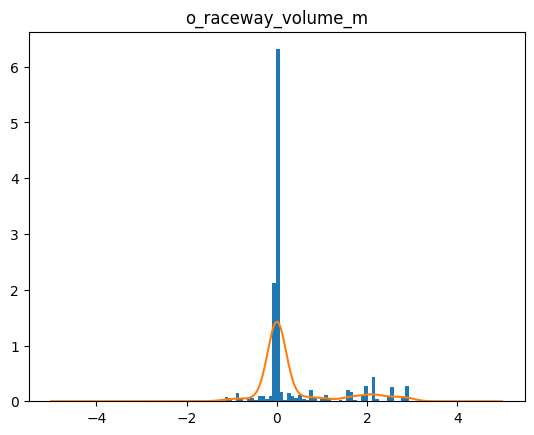

torch.Size([1000])
8851  loss=  tensor(2.5881, grad_fn=<MeanBackward0>)
8852  loss=  tensor(2.6133, grad_fn=<MeanBackward0>)
8853  loss=  tensor(2.5832, grad_fn=<MeanBackward0>)
8854  loss=  tensor(2.5946, grad_fn=<MeanBackward0>)
8855  loss=  tensor(2.5603, grad_fn=<MeanBackward0>)
8856  loss=  tensor(2.5972, grad_fn=<MeanBackward0>)
8857  loss=  tensor(2.6041, grad_fn=<MeanBackward0>)
8858  loss=  tensor(2.5652, grad_fn=<MeanBackward0>)
8859  loss=  tensor(2.6007, grad_fn=<MeanBackward0>)
8860  loss=  tensor(2.6143, grad_fn=<MeanBackward0>)
8861  loss=  tensor(2.5770, grad_fn=<MeanBackward0>)
8862  loss=  tensor(2.5908, grad_fn=<MeanBackward0>)
8863  loss=  tensor(2.6004, grad_fn=<MeanBackward0>)
8864  loss=  tensor(2.5958, grad_fn=<MeanBackward0>)
8865  loss=  tensor(2.6196, grad_fn=<MeanBackward0>)
8866  loss=  tensor(2.6332, grad_fn=<MeanBackward0>)
8867  loss=  tensor(2.5951, grad_fn=<MeanBackward0>)
8868  loss=  tensor(2.5723, grad_fn=<MeanBackward0>)
8869  loss=  tensor(2.5790,

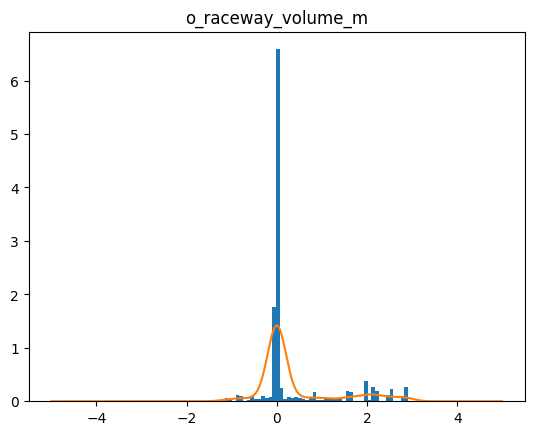

torch.Size([1000])
8901  loss=  tensor(2.6072, grad_fn=<MeanBackward0>)
8902  loss=  tensor(2.5514, grad_fn=<MeanBackward0>)
8903  loss=  tensor(2.5890, grad_fn=<MeanBackward0>)
8904  loss=  tensor(2.5752, grad_fn=<MeanBackward0>)
8905  loss=  tensor(2.5816, grad_fn=<MeanBackward0>)
8906  loss=  tensor(2.5820, grad_fn=<MeanBackward0>)
8907  loss=  tensor(2.6102, grad_fn=<MeanBackward0>)
8908  loss=  tensor(2.5820, grad_fn=<MeanBackward0>)
8909  loss=  tensor(2.5867, grad_fn=<MeanBackward0>)
8910  loss=  tensor(2.6070, grad_fn=<MeanBackward0>)
8911  loss=  tensor(2.6016, grad_fn=<MeanBackward0>)
8912  loss=  tensor(2.5863, grad_fn=<MeanBackward0>)
8913  loss=  tensor(2.6127, grad_fn=<MeanBackward0>)
8914  loss=  tensor(2.5970, grad_fn=<MeanBackward0>)
8915  loss=  tensor(2.5798, grad_fn=<MeanBackward0>)
8916  loss=  tensor(2.5951, grad_fn=<MeanBackward0>)
8917  loss=  tensor(2.5730, grad_fn=<MeanBackward0>)
8918  loss=  tensor(2.5767, grad_fn=<MeanBackward0>)
8919  loss=  tensor(2.6160,

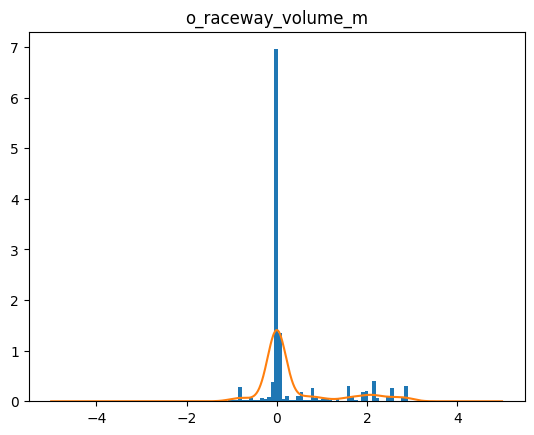

torch.Size([1000])
8951  loss=  tensor(2.5787, grad_fn=<MeanBackward0>)
8952  loss=  tensor(2.5688, grad_fn=<MeanBackward0>)
8953  loss=  tensor(2.5959, grad_fn=<MeanBackward0>)
8954  loss=  tensor(2.5508, grad_fn=<MeanBackward0>)
8955  loss=  tensor(2.5740, grad_fn=<MeanBackward0>)
8956  loss=  tensor(2.5672, grad_fn=<MeanBackward0>)
8957  loss=  tensor(2.6226, grad_fn=<MeanBackward0>)
8958  loss=  tensor(2.5746, grad_fn=<MeanBackward0>)
8959  loss=  tensor(2.5656, grad_fn=<MeanBackward0>)
8960  loss=  tensor(2.5707, grad_fn=<MeanBackward0>)
8961  loss=  tensor(2.5825, grad_fn=<MeanBackward0>)
8962  loss=  tensor(2.5936, grad_fn=<MeanBackward0>)
8963  loss=  tensor(2.5829, grad_fn=<MeanBackward0>)
8964  loss=  tensor(2.5825, grad_fn=<MeanBackward0>)
8965  loss=  tensor(2.5883, grad_fn=<MeanBackward0>)
8966  loss=  tensor(2.5740, grad_fn=<MeanBackward0>)
8967  loss=  tensor(2.6041, grad_fn=<MeanBackward0>)
8968  loss=  tensor(2.5765, grad_fn=<MeanBackward0>)
8969  loss=  tensor(2.5486,

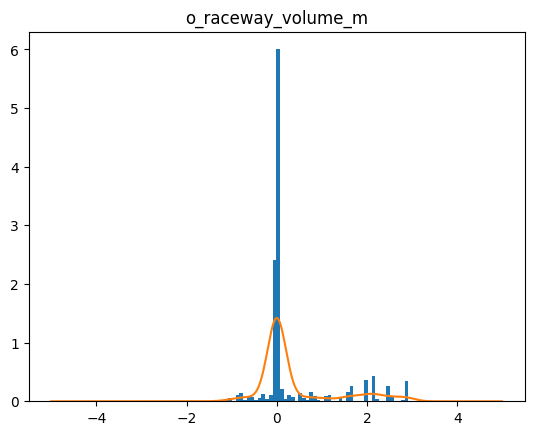

torch.Size([1000])
9001  loss=  tensor(2.5851, grad_fn=<MeanBackward0>)
9002  loss=  tensor(2.5709, grad_fn=<MeanBackward0>)
9003  loss=  tensor(2.5846, grad_fn=<MeanBackward0>)
9004  loss=  tensor(2.5963, grad_fn=<MeanBackward0>)
9005  loss=  tensor(2.5935, grad_fn=<MeanBackward0>)
9006  loss=  tensor(2.5999, grad_fn=<MeanBackward0>)
9007  loss=  tensor(2.5685, grad_fn=<MeanBackward0>)
9008  loss=  tensor(2.5430, grad_fn=<MeanBackward0>)
9009  loss=  tensor(2.5819, grad_fn=<MeanBackward0>)
9010  loss=  tensor(2.5881, grad_fn=<MeanBackward0>)
9011  loss=  tensor(2.5838, grad_fn=<MeanBackward0>)
9012  loss=  tensor(2.5546, grad_fn=<MeanBackward0>)
9013  loss=  tensor(2.6088, grad_fn=<MeanBackward0>)
9014  loss=  tensor(2.5754, grad_fn=<MeanBackward0>)
9015  loss=  tensor(2.5874, grad_fn=<MeanBackward0>)
9016  loss=  tensor(2.6090, grad_fn=<MeanBackward0>)
9017  loss=  tensor(2.6168, grad_fn=<MeanBackward0>)
9018  loss=  tensor(2.5776, grad_fn=<MeanBackward0>)
9019  loss=  tensor(2.5972,

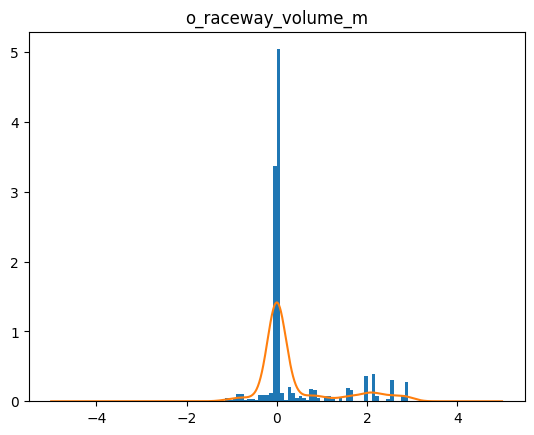

torch.Size([1000])
9051  loss=  tensor(2.5815, grad_fn=<MeanBackward0>)
9052  loss=  tensor(2.5413, grad_fn=<MeanBackward0>)
9053  loss=  tensor(2.5690, grad_fn=<MeanBackward0>)
9054  loss=  tensor(2.6129, grad_fn=<MeanBackward0>)
9055  loss=  tensor(2.6024, grad_fn=<MeanBackward0>)
9056  loss=  tensor(2.5896, grad_fn=<MeanBackward0>)
9057  loss=  tensor(2.6165, grad_fn=<MeanBackward0>)
9058  loss=  tensor(2.5605, grad_fn=<MeanBackward0>)
9059  loss=  tensor(2.5886, grad_fn=<MeanBackward0>)
9060  loss=  tensor(2.5662, grad_fn=<MeanBackward0>)
9061  loss=  tensor(2.6068, grad_fn=<MeanBackward0>)
9062  loss=  tensor(2.5986, grad_fn=<MeanBackward0>)
9063  loss=  tensor(2.6097, grad_fn=<MeanBackward0>)
9064  loss=  tensor(2.5807, grad_fn=<MeanBackward0>)
9065  loss=  tensor(2.5542, grad_fn=<MeanBackward0>)
9066  loss=  tensor(2.5730, grad_fn=<MeanBackward0>)
9067  loss=  tensor(2.5864, grad_fn=<MeanBackward0>)
9068  loss=  tensor(2.5650, grad_fn=<MeanBackward0>)
9069  loss=  tensor(2.5998,

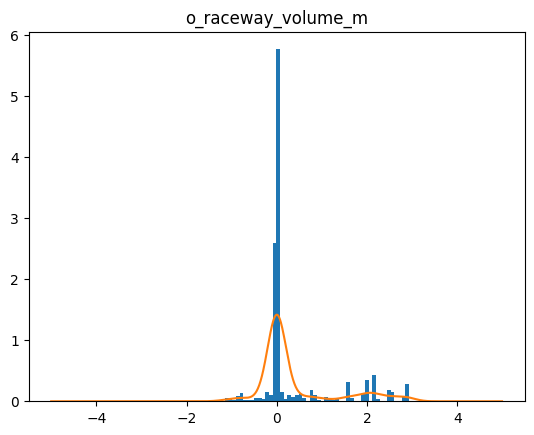

torch.Size([1000])
9101  loss=  tensor(2.5874, grad_fn=<MeanBackward0>)
9102  loss=  tensor(2.5680, grad_fn=<MeanBackward0>)
9103  loss=  tensor(2.5924, grad_fn=<MeanBackward0>)
9104  loss=  tensor(2.5993, grad_fn=<MeanBackward0>)
9105  loss=  tensor(2.5515, grad_fn=<MeanBackward0>)
9106  loss=  tensor(2.5888, grad_fn=<MeanBackward0>)
9107  loss=  tensor(2.5904, grad_fn=<MeanBackward0>)
9108  loss=  tensor(2.5798, grad_fn=<MeanBackward0>)
9109  loss=  tensor(2.6057, grad_fn=<MeanBackward0>)
9110  loss=  tensor(2.5723, grad_fn=<MeanBackward0>)
9111  loss=  tensor(2.5733, grad_fn=<MeanBackward0>)
9112  loss=  tensor(2.5947, grad_fn=<MeanBackward0>)
9113  loss=  tensor(2.5645, grad_fn=<MeanBackward0>)
9114  loss=  tensor(2.5903, grad_fn=<MeanBackward0>)
9115  loss=  tensor(2.5813, grad_fn=<MeanBackward0>)
9116  loss=  tensor(2.5647, grad_fn=<MeanBackward0>)
9117  loss=  tensor(2.5624, grad_fn=<MeanBackward0>)
9118  loss=  tensor(2.6244, grad_fn=<MeanBackward0>)
9119  loss=  tensor(2.5936,

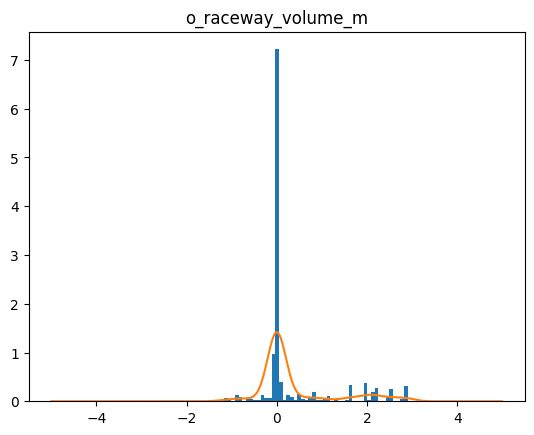

torch.Size([1000])
9151  loss=  tensor(2.5955, grad_fn=<MeanBackward0>)
9152  loss=  tensor(2.5686, grad_fn=<MeanBackward0>)
9153  loss=  tensor(2.5861, grad_fn=<MeanBackward0>)
9154  loss=  tensor(2.5890, grad_fn=<MeanBackward0>)
9155  loss=  tensor(2.5855, grad_fn=<MeanBackward0>)
9156  loss=  tensor(2.6009, grad_fn=<MeanBackward0>)
9157  loss=  tensor(2.5717, grad_fn=<MeanBackward0>)
9158  loss=  tensor(2.5834, grad_fn=<MeanBackward0>)
9159  loss=  tensor(2.5993, grad_fn=<MeanBackward0>)
9160  loss=  tensor(2.5754, grad_fn=<MeanBackward0>)
9161  loss=  tensor(2.6061, grad_fn=<MeanBackward0>)
9162  loss=  tensor(2.5848, grad_fn=<MeanBackward0>)
9163  loss=  tensor(2.5695, grad_fn=<MeanBackward0>)
9164  loss=  tensor(2.5460, grad_fn=<MeanBackward0>)
9165  loss=  tensor(2.6131, grad_fn=<MeanBackward0>)
9166  loss=  tensor(2.6070, grad_fn=<MeanBackward0>)
9167  loss=  tensor(2.5623, grad_fn=<MeanBackward0>)
9168  loss=  tensor(2.5952, grad_fn=<MeanBackward0>)
9169  loss=  tensor(2.5971,

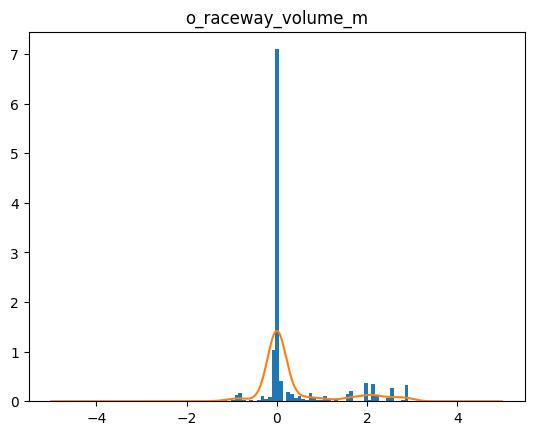

torch.Size([1000])
9201  loss=  tensor(2.5596, grad_fn=<MeanBackward0>)
9202  loss=  tensor(2.6120, grad_fn=<MeanBackward0>)
9203  loss=  tensor(2.5407, grad_fn=<MeanBackward0>)
9204  loss=  tensor(2.6018, grad_fn=<MeanBackward0>)
9205  loss=  tensor(2.5926, grad_fn=<MeanBackward0>)
9206  loss=  tensor(2.5761, grad_fn=<MeanBackward0>)
9207  loss=  tensor(2.5757, grad_fn=<MeanBackward0>)
9208  loss=  tensor(2.5900, grad_fn=<MeanBackward0>)
9209  loss=  tensor(2.5463, grad_fn=<MeanBackward0>)
9210  loss=  tensor(2.5677, grad_fn=<MeanBackward0>)
9211  loss=  tensor(2.5890, grad_fn=<MeanBackward0>)
9212  loss=  tensor(2.6069, grad_fn=<MeanBackward0>)
9213  loss=  tensor(2.6144, grad_fn=<MeanBackward0>)
9214  loss=  tensor(2.5938, grad_fn=<MeanBackward0>)
9215  loss=  tensor(2.5906, grad_fn=<MeanBackward0>)
9216  loss=  tensor(2.6124, grad_fn=<MeanBackward0>)
9217  loss=  tensor(2.5843, grad_fn=<MeanBackward0>)
9218  loss=  tensor(2.5910, grad_fn=<MeanBackward0>)
9219  loss=  tensor(2.5756,

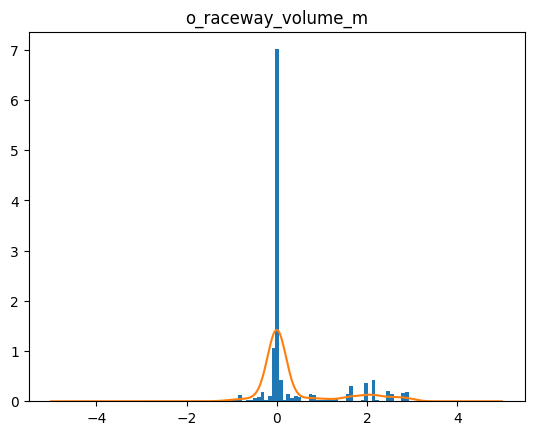

torch.Size([1000])
9251  loss=  tensor(2.5702, grad_fn=<MeanBackward0>)
9252  loss=  tensor(2.5722, grad_fn=<MeanBackward0>)
9253  loss=  tensor(2.6339, grad_fn=<MeanBackward0>)
9254  loss=  tensor(2.5809, grad_fn=<MeanBackward0>)
9255  loss=  tensor(2.5500, grad_fn=<MeanBackward0>)
9256  loss=  tensor(2.6144, grad_fn=<MeanBackward0>)
9257  loss=  tensor(2.5696, grad_fn=<MeanBackward0>)
9258  loss=  tensor(2.5578, grad_fn=<MeanBackward0>)
9259  loss=  tensor(2.6040, grad_fn=<MeanBackward0>)
9260  loss=  tensor(2.5930, grad_fn=<MeanBackward0>)
9261  loss=  tensor(2.5897, grad_fn=<MeanBackward0>)
9262  loss=  tensor(2.6001, grad_fn=<MeanBackward0>)
9263  loss=  tensor(2.5842, grad_fn=<MeanBackward0>)
9264  loss=  tensor(2.5816, grad_fn=<MeanBackward0>)
9265  loss=  tensor(2.5549, grad_fn=<MeanBackward0>)
9266  loss=  tensor(2.5718, grad_fn=<MeanBackward0>)
9267  loss=  tensor(2.5563, grad_fn=<MeanBackward0>)
9268  loss=  tensor(2.6248, grad_fn=<MeanBackward0>)
9269  loss=  tensor(2.6060,

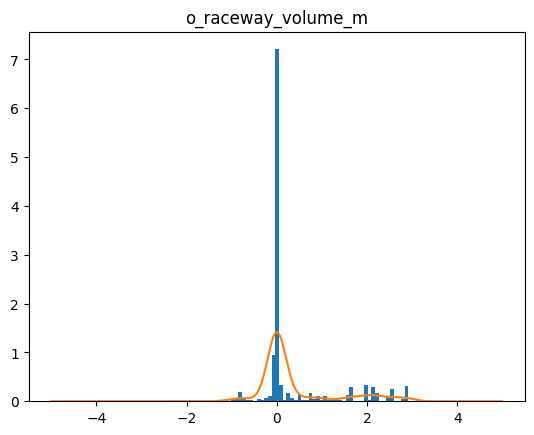

torch.Size([1000])
9301  loss=  tensor(2.6155, grad_fn=<MeanBackward0>)
9302  loss=  tensor(2.5945, grad_fn=<MeanBackward0>)
9303  loss=  tensor(2.5555, grad_fn=<MeanBackward0>)
9304  loss=  tensor(2.5790, grad_fn=<MeanBackward0>)
9305  loss=  tensor(2.5847, grad_fn=<MeanBackward0>)
9306  loss=  tensor(2.5683, grad_fn=<MeanBackward0>)
9307  loss=  tensor(2.5687, grad_fn=<MeanBackward0>)
9308  loss=  tensor(2.5888, grad_fn=<MeanBackward0>)
9309  loss=  tensor(2.5540, grad_fn=<MeanBackward0>)
9310  loss=  tensor(2.5898, grad_fn=<MeanBackward0>)
9311  loss=  tensor(2.6095, grad_fn=<MeanBackward0>)
9312  loss=  tensor(2.6050, grad_fn=<MeanBackward0>)
9313  loss=  tensor(2.6017, grad_fn=<MeanBackward0>)
9314  loss=  tensor(2.5823, grad_fn=<MeanBackward0>)
9315  loss=  tensor(2.5973, grad_fn=<MeanBackward0>)
9316  loss=  tensor(2.5676, grad_fn=<MeanBackward0>)
9317  loss=  tensor(2.5600, grad_fn=<MeanBackward0>)
9318  loss=  tensor(2.5782, grad_fn=<MeanBackward0>)
9319  loss=  tensor(2.5892,

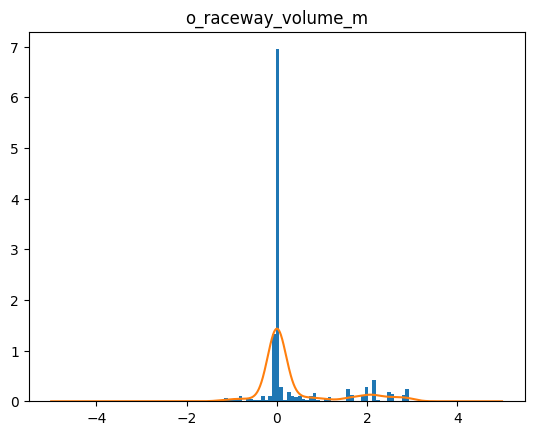

torch.Size([1000])
9351  loss=  tensor(2.5638, grad_fn=<MeanBackward0>)
9352  loss=  tensor(2.5486, grad_fn=<MeanBackward0>)
9353  loss=  tensor(2.5537, grad_fn=<MeanBackward0>)
9354  loss=  tensor(2.5893, grad_fn=<MeanBackward0>)
9355  loss=  tensor(2.5628, grad_fn=<MeanBackward0>)
9356  loss=  tensor(2.6143, grad_fn=<MeanBackward0>)
9357  loss=  tensor(2.5862, grad_fn=<MeanBackward0>)
9358  loss=  tensor(2.5439, grad_fn=<MeanBackward0>)
9359  loss=  tensor(2.5747, grad_fn=<MeanBackward0>)
9360  loss=  tensor(2.5541, grad_fn=<MeanBackward0>)
9361  loss=  tensor(2.5965, grad_fn=<MeanBackward0>)
9362  loss=  tensor(2.5942, grad_fn=<MeanBackward0>)
9363  loss=  tensor(2.5950, grad_fn=<MeanBackward0>)
9364  loss=  tensor(2.5680, grad_fn=<MeanBackward0>)
9365  loss=  tensor(2.5777, grad_fn=<MeanBackward0>)
9366  loss=  tensor(2.5736, grad_fn=<MeanBackward0>)
9367  loss=  tensor(2.6142, grad_fn=<MeanBackward0>)
9368  loss=  tensor(2.6239, grad_fn=<MeanBackward0>)
9369  loss=  tensor(2.5974,

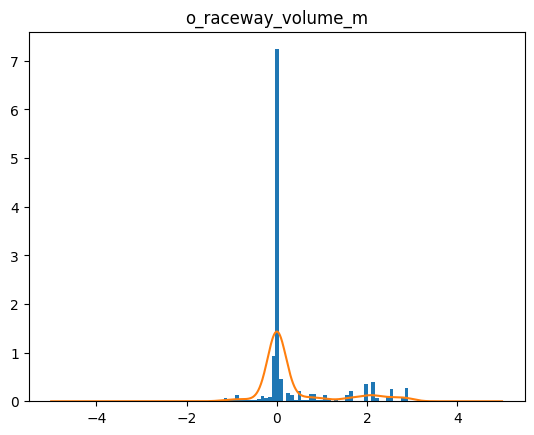

torch.Size([1000])
9401  loss=  tensor(2.6186, grad_fn=<MeanBackward0>)
9402  loss=  tensor(2.5833, grad_fn=<MeanBackward0>)
9403  loss=  tensor(2.5907, grad_fn=<MeanBackward0>)
9404  loss=  tensor(2.5606, grad_fn=<MeanBackward0>)
9405  loss=  tensor(2.5909, grad_fn=<MeanBackward0>)
9406  loss=  tensor(2.5970, grad_fn=<MeanBackward0>)
9407  loss=  tensor(2.5960, grad_fn=<MeanBackward0>)
9408  loss=  tensor(2.5891, grad_fn=<MeanBackward0>)
9409  loss=  tensor(2.5629, grad_fn=<MeanBackward0>)
9410  loss=  tensor(2.6133, grad_fn=<MeanBackward0>)
9411  loss=  tensor(2.5774, grad_fn=<MeanBackward0>)
9412  loss=  tensor(2.5807, grad_fn=<MeanBackward0>)
9413  loss=  tensor(2.6006, grad_fn=<MeanBackward0>)
9414  loss=  tensor(2.6053, grad_fn=<MeanBackward0>)
9415  loss=  tensor(2.5711, grad_fn=<MeanBackward0>)
9416  loss=  tensor(2.6065, grad_fn=<MeanBackward0>)
9417  loss=  tensor(2.5998, grad_fn=<MeanBackward0>)
9418  loss=  tensor(2.5479, grad_fn=<MeanBackward0>)
9419  loss=  tensor(2.6062,

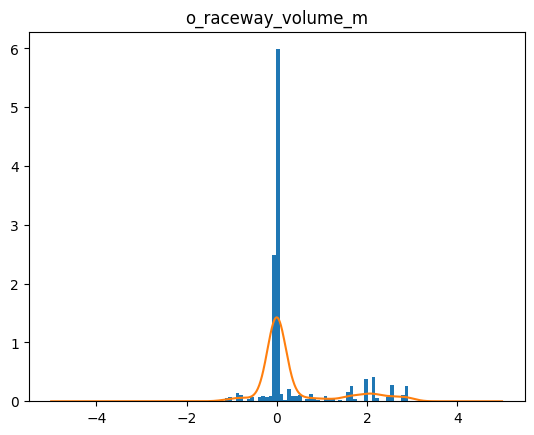

torch.Size([1000])
9451  loss=  tensor(2.5740, grad_fn=<MeanBackward0>)
9452  loss=  tensor(2.5745, grad_fn=<MeanBackward0>)
9453  loss=  tensor(2.5828, grad_fn=<MeanBackward0>)
9454  loss=  tensor(2.5581, grad_fn=<MeanBackward0>)
9455  loss=  tensor(2.5539, grad_fn=<MeanBackward0>)
9456  loss=  tensor(2.6308, grad_fn=<MeanBackward0>)
9457  loss=  tensor(2.6031, grad_fn=<MeanBackward0>)
9458  loss=  tensor(2.5734, grad_fn=<MeanBackward0>)
9459  loss=  tensor(2.5856, grad_fn=<MeanBackward0>)
9460  loss=  tensor(2.5804, grad_fn=<MeanBackward0>)
9461  loss=  tensor(2.5262, grad_fn=<MeanBackward0>)
9462  loss=  tensor(2.5694, grad_fn=<MeanBackward0>)
9463  loss=  tensor(2.5501, grad_fn=<MeanBackward0>)
9464  loss=  tensor(2.5697, grad_fn=<MeanBackward0>)
9465  loss=  tensor(2.5791, grad_fn=<MeanBackward0>)
9466  loss=  tensor(2.5779, grad_fn=<MeanBackward0>)
9467  loss=  tensor(2.5576, grad_fn=<MeanBackward0>)
9468  loss=  tensor(2.5895, grad_fn=<MeanBackward0>)
9469  loss=  tensor(2.5719,

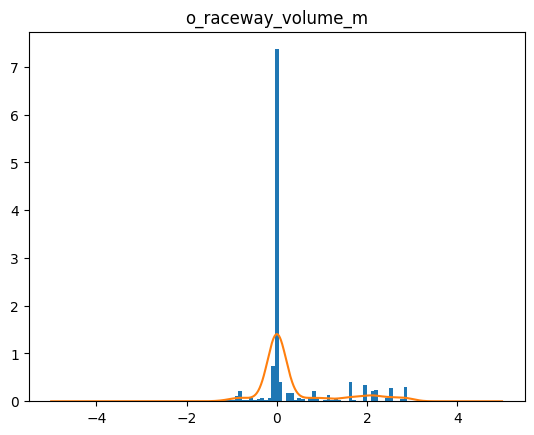

torch.Size([1000])
9501  loss=  tensor(2.5862, grad_fn=<MeanBackward0>)
9502  loss=  tensor(2.5839, grad_fn=<MeanBackward0>)
9503  loss=  tensor(2.6116, grad_fn=<MeanBackward0>)
9504  loss=  tensor(2.5894, grad_fn=<MeanBackward0>)
9505  loss=  tensor(2.5598, grad_fn=<MeanBackward0>)
9506  loss=  tensor(2.5958, grad_fn=<MeanBackward0>)
9507  loss=  tensor(2.5681, grad_fn=<MeanBackward0>)
9508  loss=  tensor(2.5586, grad_fn=<MeanBackward0>)
9509  loss=  tensor(2.5705, grad_fn=<MeanBackward0>)
9510  loss=  tensor(2.6207, grad_fn=<MeanBackward0>)
9511  loss=  tensor(2.5777, grad_fn=<MeanBackward0>)
9512  loss=  tensor(2.5877, grad_fn=<MeanBackward0>)
9513  loss=  tensor(2.5785, grad_fn=<MeanBackward0>)
9514  loss=  tensor(2.5816, grad_fn=<MeanBackward0>)
9515  loss=  tensor(2.5875, grad_fn=<MeanBackward0>)
9516  loss=  tensor(2.5920, grad_fn=<MeanBackward0>)
9517  loss=  tensor(2.5893, grad_fn=<MeanBackward0>)
9518  loss=  tensor(2.6024, grad_fn=<MeanBackward0>)
9519  loss=  tensor(2.5696,

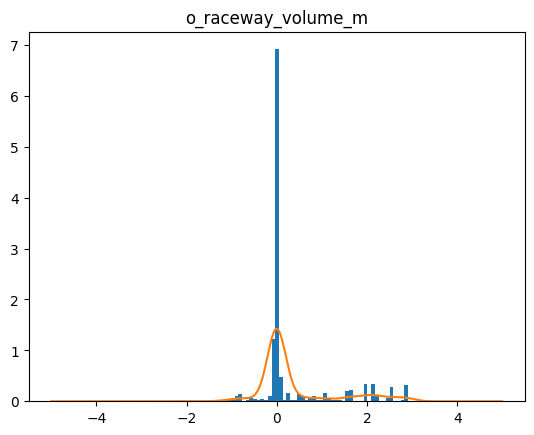

torch.Size([1000])
9551  loss=  tensor(2.6003, grad_fn=<MeanBackward0>)
9552  loss=  tensor(2.5819, grad_fn=<MeanBackward0>)
9553  loss=  tensor(2.5646, grad_fn=<MeanBackward0>)
9554  loss=  tensor(2.5809, grad_fn=<MeanBackward0>)
9555  loss=  tensor(2.5690, grad_fn=<MeanBackward0>)
9556  loss=  tensor(2.5517, grad_fn=<MeanBackward0>)
9557  loss=  tensor(2.5947, grad_fn=<MeanBackward0>)
9558  loss=  tensor(2.6028, grad_fn=<MeanBackward0>)
9559  loss=  tensor(2.5600, grad_fn=<MeanBackward0>)
9560  loss=  tensor(2.5748, grad_fn=<MeanBackward0>)
9561  loss=  tensor(2.5553, grad_fn=<MeanBackward0>)
9562  loss=  tensor(2.5654, grad_fn=<MeanBackward0>)
9563  loss=  tensor(2.5860, grad_fn=<MeanBackward0>)
9564  loss=  tensor(2.5734, grad_fn=<MeanBackward0>)
9565  loss=  tensor(2.6030, grad_fn=<MeanBackward0>)
9566  loss=  tensor(2.5965, grad_fn=<MeanBackward0>)
9567  loss=  tensor(2.5500, grad_fn=<MeanBackward0>)
9568  loss=  tensor(2.6047, grad_fn=<MeanBackward0>)
9569  loss=  tensor(2.5724,

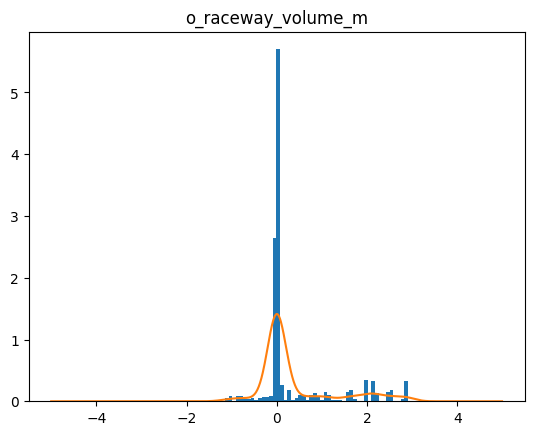

torch.Size([1000])
9601  loss=  tensor(2.5978, grad_fn=<MeanBackward0>)
9602  loss=  tensor(2.5576, grad_fn=<MeanBackward0>)
9603  loss=  tensor(2.5600, grad_fn=<MeanBackward0>)
9604  loss=  tensor(2.5930, grad_fn=<MeanBackward0>)
9605  loss=  tensor(2.6139, grad_fn=<MeanBackward0>)
9606  loss=  tensor(2.5518, grad_fn=<MeanBackward0>)
9607  loss=  tensor(2.5751, grad_fn=<MeanBackward0>)
9608  loss=  tensor(2.5947, grad_fn=<MeanBackward0>)
9609  loss=  tensor(2.6176, grad_fn=<MeanBackward0>)
9610  loss=  tensor(2.5502, grad_fn=<MeanBackward0>)
9611  loss=  tensor(2.6228, grad_fn=<MeanBackward0>)
9612  loss=  tensor(2.5786, grad_fn=<MeanBackward0>)
9613  loss=  tensor(2.6026, grad_fn=<MeanBackward0>)
9614  loss=  tensor(2.5930, grad_fn=<MeanBackward0>)
9615  loss=  tensor(2.5694, grad_fn=<MeanBackward0>)
9616  loss=  tensor(2.5621, grad_fn=<MeanBackward0>)
9617  loss=  tensor(2.5862, grad_fn=<MeanBackward0>)
9618  loss=  tensor(2.5974, grad_fn=<MeanBackward0>)
9619  loss=  tensor(2.5813,

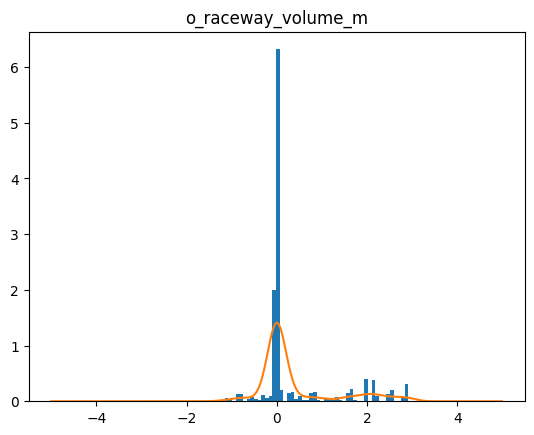

torch.Size([1000])
9651  loss=  tensor(2.5845, grad_fn=<MeanBackward0>)
9652  loss=  tensor(2.5508, grad_fn=<MeanBackward0>)
9653  loss=  tensor(2.5837, grad_fn=<MeanBackward0>)
9654  loss=  tensor(2.6066, grad_fn=<MeanBackward0>)
9655  loss=  tensor(2.5836, grad_fn=<MeanBackward0>)
9656  loss=  tensor(2.5548, grad_fn=<MeanBackward0>)
9657  loss=  tensor(2.5448, grad_fn=<MeanBackward0>)
9658  loss=  tensor(2.5618, grad_fn=<MeanBackward0>)
9659  loss=  tensor(2.6084, grad_fn=<MeanBackward0>)
9660  loss=  tensor(2.5889, grad_fn=<MeanBackward0>)
9661  loss=  tensor(2.5877, grad_fn=<MeanBackward0>)
9662  loss=  tensor(2.5906, grad_fn=<MeanBackward0>)
9663  loss=  tensor(2.5766, grad_fn=<MeanBackward0>)
9664  loss=  tensor(2.5528, grad_fn=<MeanBackward0>)
9665  loss=  tensor(2.5552, grad_fn=<MeanBackward0>)
9666  loss=  tensor(2.5596, grad_fn=<MeanBackward0>)
9667  loss=  tensor(2.5336, grad_fn=<MeanBackward0>)
9668  loss=  tensor(2.5776, grad_fn=<MeanBackward0>)
9669  loss=  tensor(2.5901,

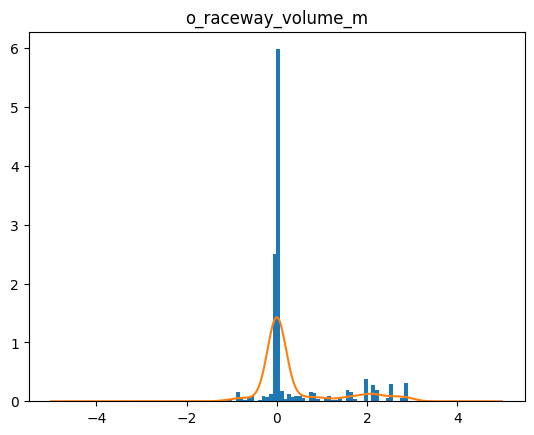

torch.Size([1000])
9701  loss=  tensor(2.5602, grad_fn=<MeanBackward0>)
9702  loss=  tensor(2.5874, grad_fn=<MeanBackward0>)
9703  loss=  tensor(2.5784, grad_fn=<MeanBackward0>)
9704  loss=  tensor(2.6172, grad_fn=<MeanBackward0>)
9705  loss=  tensor(2.5459, grad_fn=<MeanBackward0>)
9706  loss=  tensor(2.5544, grad_fn=<MeanBackward0>)
9707  loss=  tensor(2.5960, grad_fn=<MeanBackward0>)
9708  loss=  tensor(2.6213, grad_fn=<MeanBackward0>)
9709  loss=  tensor(2.5692, grad_fn=<MeanBackward0>)
9710  loss=  tensor(2.5714, grad_fn=<MeanBackward0>)
9711  loss=  tensor(2.5736, grad_fn=<MeanBackward0>)
9712  loss=  tensor(2.5855, grad_fn=<MeanBackward0>)
9713  loss=  tensor(2.5546, grad_fn=<MeanBackward0>)
9714  loss=  tensor(2.5815, grad_fn=<MeanBackward0>)
9715  loss=  tensor(2.6096, grad_fn=<MeanBackward0>)
9716  loss=  tensor(2.5426, grad_fn=<MeanBackward0>)
9717  loss=  tensor(2.6116, grad_fn=<MeanBackward0>)
9718  loss=  tensor(2.5568, grad_fn=<MeanBackward0>)
9719  loss=  tensor(2.5823,

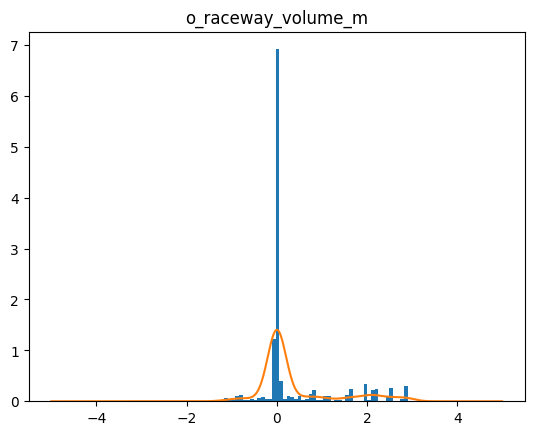

torch.Size([1000])
9751  loss=  tensor(2.5909, grad_fn=<MeanBackward0>)
9752  loss=  tensor(2.6486, grad_fn=<MeanBackward0>)
9753  loss=  tensor(2.5876, grad_fn=<MeanBackward0>)
9754  loss=  tensor(2.5950, grad_fn=<MeanBackward0>)
9755  loss=  tensor(2.5979, grad_fn=<MeanBackward0>)
9756  loss=  tensor(2.5970, grad_fn=<MeanBackward0>)
9757  loss=  tensor(2.5991, grad_fn=<MeanBackward0>)
9758  loss=  tensor(2.5801, grad_fn=<MeanBackward0>)
9759  loss=  tensor(2.6106, grad_fn=<MeanBackward0>)
9760  loss=  tensor(2.5520, grad_fn=<MeanBackward0>)
9761  loss=  tensor(2.6205, grad_fn=<MeanBackward0>)
9762  loss=  tensor(2.5806, grad_fn=<MeanBackward0>)
9763  loss=  tensor(2.5845, grad_fn=<MeanBackward0>)
9764  loss=  tensor(2.5651, grad_fn=<MeanBackward0>)
9765  loss=  tensor(2.6160, grad_fn=<MeanBackward0>)
9766  loss=  tensor(2.5951, grad_fn=<MeanBackward0>)
9767  loss=  tensor(2.5974, grad_fn=<MeanBackward0>)
9768  loss=  tensor(2.6121, grad_fn=<MeanBackward0>)
9769  loss=  tensor(2.5739,

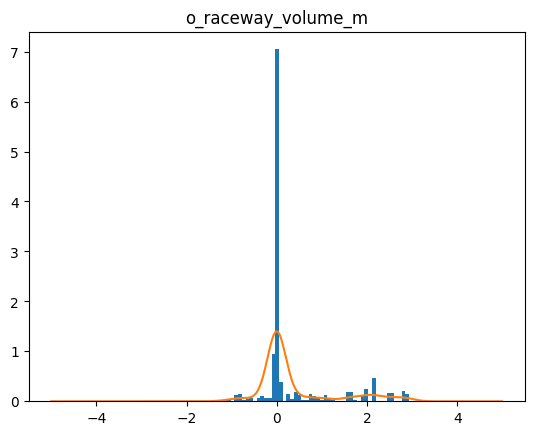

torch.Size([1000])
9801  loss=  tensor(2.5642, grad_fn=<MeanBackward0>)
9802  loss=  tensor(2.6328, grad_fn=<MeanBackward0>)
9803  loss=  tensor(2.6008, grad_fn=<MeanBackward0>)
9804  loss=  tensor(2.5775, grad_fn=<MeanBackward0>)
9805  loss=  tensor(2.5922, grad_fn=<MeanBackward0>)
9806  loss=  tensor(2.5500, grad_fn=<MeanBackward0>)
9807  loss=  tensor(2.6077, grad_fn=<MeanBackward0>)
9808  loss=  tensor(2.5604, grad_fn=<MeanBackward0>)
9809  loss=  tensor(2.5650, grad_fn=<MeanBackward0>)
9810  loss=  tensor(2.5588, grad_fn=<MeanBackward0>)
9811  loss=  tensor(2.5864, grad_fn=<MeanBackward0>)
9812  loss=  tensor(2.5842, grad_fn=<MeanBackward0>)
9813  loss=  tensor(2.5788, grad_fn=<MeanBackward0>)
9814  loss=  tensor(2.5362, grad_fn=<MeanBackward0>)
9815  loss=  tensor(2.5658, grad_fn=<MeanBackward0>)
9816  loss=  tensor(2.5904, grad_fn=<MeanBackward0>)
9817  loss=  tensor(2.5938, grad_fn=<MeanBackward0>)
9818  loss=  tensor(2.5793, grad_fn=<MeanBackward0>)
9819  loss=  tensor(2.5761,

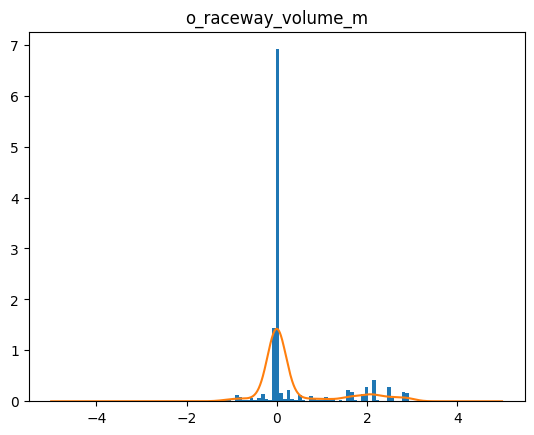

torch.Size([1000])
9851  loss=  tensor(2.5924, grad_fn=<MeanBackward0>)
9852  loss=  tensor(2.5901, grad_fn=<MeanBackward0>)
9853  loss=  tensor(2.5846, grad_fn=<MeanBackward0>)
9854  loss=  tensor(2.5839, grad_fn=<MeanBackward0>)
9855  loss=  tensor(2.5991, grad_fn=<MeanBackward0>)
9856  loss=  tensor(2.5682, grad_fn=<MeanBackward0>)
9857  loss=  tensor(2.5893, grad_fn=<MeanBackward0>)
9858  loss=  tensor(2.5545, grad_fn=<MeanBackward0>)
9859  loss=  tensor(2.5915, grad_fn=<MeanBackward0>)
9860  loss=  tensor(2.5966, grad_fn=<MeanBackward0>)
9861  loss=  tensor(2.5715, grad_fn=<MeanBackward0>)
9862  loss=  tensor(2.5687, grad_fn=<MeanBackward0>)
9863  loss=  tensor(2.6067, grad_fn=<MeanBackward0>)
9864  loss=  tensor(2.5958, grad_fn=<MeanBackward0>)
9865  loss=  tensor(2.5440, grad_fn=<MeanBackward0>)
9866  loss=  tensor(2.5670, grad_fn=<MeanBackward0>)
9867  loss=  tensor(2.5656, grad_fn=<MeanBackward0>)
9868  loss=  tensor(2.5645, grad_fn=<MeanBackward0>)
9869  loss=  tensor(2.5749,

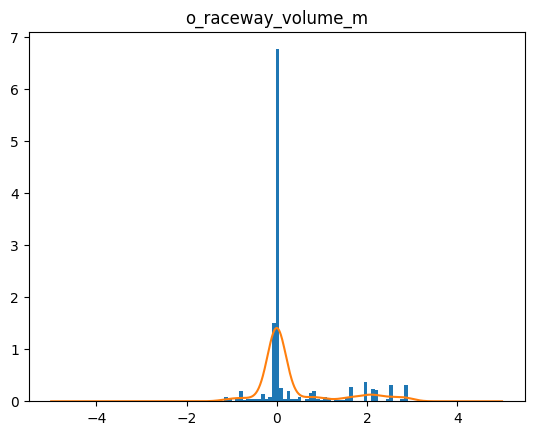

torch.Size([1000])
9901  loss=  tensor(2.5911, grad_fn=<MeanBackward0>)
9902  loss=  tensor(2.5964, grad_fn=<MeanBackward0>)
9903  loss=  tensor(2.5656, grad_fn=<MeanBackward0>)
9904  loss=  tensor(2.5578, grad_fn=<MeanBackward0>)
9905  loss=  tensor(2.5915, grad_fn=<MeanBackward0>)
9906  loss=  tensor(2.6142, grad_fn=<MeanBackward0>)
9907  loss=  tensor(2.5889, grad_fn=<MeanBackward0>)
9908  loss=  tensor(2.5499, grad_fn=<MeanBackward0>)
9909  loss=  tensor(2.5967, grad_fn=<MeanBackward0>)
9910  loss=  tensor(2.5639, grad_fn=<MeanBackward0>)
9911  loss=  tensor(2.5631, grad_fn=<MeanBackward0>)
9912  loss=  tensor(2.5989, grad_fn=<MeanBackward0>)
9913  loss=  tensor(2.5927, grad_fn=<MeanBackward0>)
9914  loss=  tensor(2.5847, grad_fn=<MeanBackward0>)
9915  loss=  tensor(2.5779, grad_fn=<MeanBackward0>)
9916  loss=  tensor(2.6241, grad_fn=<MeanBackward0>)
9917  loss=  tensor(2.5606, grad_fn=<MeanBackward0>)
9918  loss=  tensor(2.6205, grad_fn=<MeanBackward0>)
9919  loss=  tensor(2.5677,

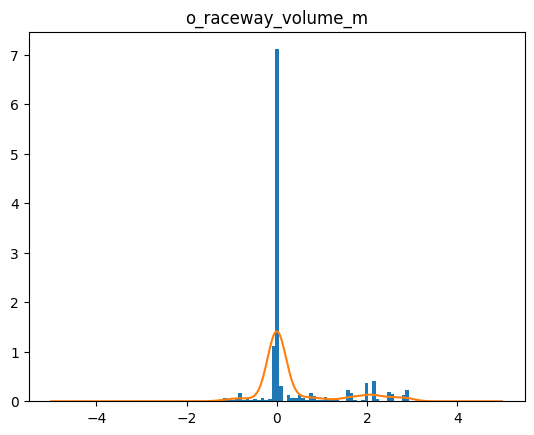

torch.Size([1000])
9951  loss=  tensor(2.5772, grad_fn=<MeanBackward0>)
9952  loss=  tensor(2.6475, grad_fn=<MeanBackward0>)
9953  loss=  tensor(2.6212, grad_fn=<MeanBackward0>)
9954  loss=  tensor(2.5635, grad_fn=<MeanBackward0>)
9955  loss=  tensor(2.5907, grad_fn=<MeanBackward0>)
9956  loss=  tensor(2.6373, grad_fn=<MeanBackward0>)
9957  loss=  tensor(2.5940, grad_fn=<MeanBackward0>)
9958  loss=  tensor(2.5612, grad_fn=<MeanBackward0>)
9959  loss=  tensor(2.5742, grad_fn=<MeanBackward0>)
9960  loss=  tensor(2.5515, grad_fn=<MeanBackward0>)
9961  loss=  tensor(2.5915, grad_fn=<MeanBackward0>)
9962  loss=  tensor(2.5846, grad_fn=<MeanBackward0>)
9963  loss=  tensor(2.6014, grad_fn=<MeanBackward0>)
9964  loss=  tensor(2.6492, grad_fn=<MeanBackward0>)
9965  loss=  tensor(2.6099, grad_fn=<MeanBackward0>)
9966  loss=  tensor(2.5651, grad_fn=<MeanBackward0>)
9967  loss=  tensor(2.6219, grad_fn=<MeanBackward0>)
9968  loss=  tensor(2.5770, grad_fn=<MeanBackward0>)
9969  loss=  tensor(2.5832,

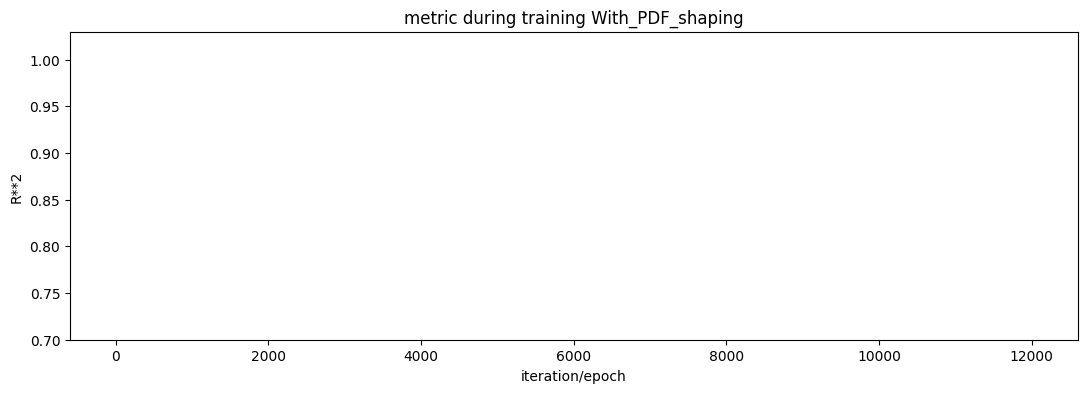

Training loss: tensor(0.8738, grad_fn=<MseLossBackward0>)
Training R**2: -0.07568356281042865
Test loss - scaled: tensor(1.0687, grad_fn=<MseLossBackward0>)
Test loss - descaled: tensor(0.0003, grad_fn=<MseLossBackward0>)
Testing R**2 - scaled: -0.12271611415415018
Testing R**2 - descaled: -0.12271614136497577
*****
*****
Testing R**2 - Output: 0 o_raceway_volume_m -0.12271614136497577


In [30]:

model = F1plusF2_SIO(
             PDFshapingOBJ.x_means, 
             PDFshapingOBJ.x_deviations, 
             PDFshapingOBJ.y_means, 
             PDFshapingOBJ.y_deviations
)



opt         = torch.optim.Adam(   model.parameters(), lr=PDFshapingOBJ.learning_rate   )

loss_fn     = F.mse_loss


fit_y_scaled_PDF(PDFshapingOBJ.N_EPOCHS, PDFshapingOBJ.N_EPOCHS_PDF, model, loss_fn, opt)

pred_descaled, pred_scaled = model(PDFshapingOBJ.X_test_tr)
print('Test loss - scaled:',   loss_fn(     pred_scaled,       PDFshapingOBJ.y_test_tr_scaled          ))
print('Test loss - descaled:', loss_fn(     pred_descaled,     PDFshapingOBJ.y_test_tr                 ))
print('Testing R**2 - scaled:',   r2_score( pred_scaled.detach().numpy(),PDFshapingOBJ.y_test_tr_scaled.numpy() ))
print('Testing R**2 - descaled:', r2_score( pred_descaled.detach().numpy(), PDFshapingOBJ.y_test_tr.numpy()   ))


PDFshapingOBJ.print_individual_Rsquare(pred_descaled, PDFshapingOBJ.y_test_tr)


In [31]:

list_preds = []
list_reals = []

for i in range(len(PDFshapingOBJ.X_test_tr)):
    print("**************************************************")
    print("preds, real")
    preds_descaled, preds_scaled = model(PDFshapingOBJ.X_test_tr[i])

    np_pred = preds_descaled[0].detach().numpy()              ## [0]
    np_real = PDFshapingOBJ.y_test_tr[i].detach().numpy()

    for j in range(len(np_pred)):
        print((np_pred[j], np_real[j]))
        list_preds.append(np_pred[j])
        list_reals.append(np_real[j])


**************************************************
preds, real
(0.2085631, 0.1965359)
**************************************************
preds, real
(0.21747136, 0.1965359)
**************************************************
preds, real
(0.18872268, 0.1965359)
**************************************************
preds, real
(0.22182009, 0.2223671)
**************************************************
preds, real
(0.23901206, 0.2387957)
**************************************************
preds, real
(0.23668824, 0.237446)
**************************************************
preds, real
(0.18352354, 0.1965359)
**************************************************
preds, real
(0.24055922, 0.1965359)
**************************************************
preds, real
(0.23529229, 0.1965359)
**************************************************
preds, real
(0.22177587, 0.2217346)
**************************************************
preds, real
(0.20002332, 0.1965359)
*********************************************

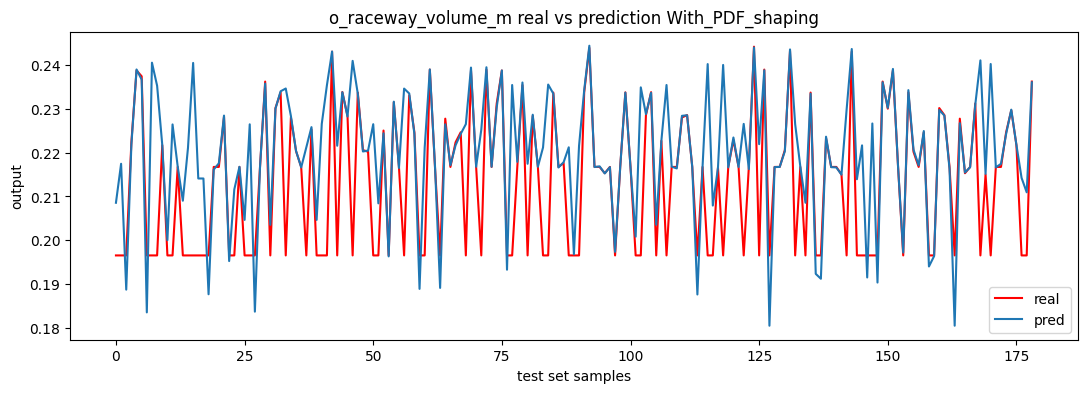

/Users/user/Desktop/DOE_CIVS/experiments/2023june/singleOutput/PDFshapingUtils.py:347: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(error, bins=n_bins, color="blue")


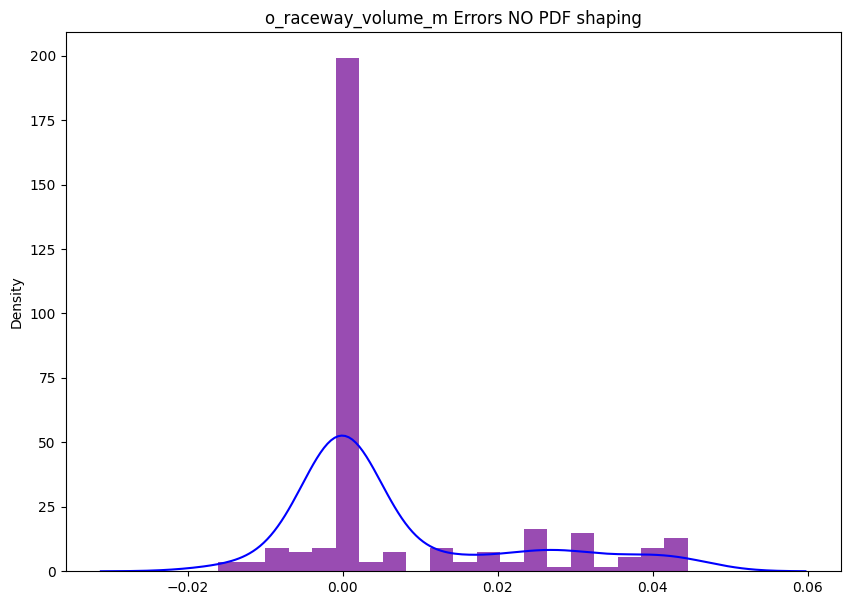

In [32]:

PDFshapingOBJ.plot_preds_vs_reals( list_preds, list_reals )



## Export ONNX model


In [33]:

'''

model.eval()

dummy_input = torch.randn(1, 6)


input_names = ["input1"]
output_names = ["output1", "output2"]

torch.onnx.export(
  model, 
  dummy_input, 
  "ONNXmodels/s894RacewayPDFshapingRC.onnx", 
  verbose=False, 
  input_names  = input_names,
  output_names = output_names
)

'''


'\n\nmodel.eval()\n\ndummy_input = torch.randn(1, 6)\n\n\ninput_names = ["input1"]\noutput_names = ["output1", "output2"]\n\ntorch.onnx.export(\n  model, \n  dummy_input, \n  "ONNXmodels/s894RacewayPDFshapingRC.onnx", \n  verbose=False, \n  input_names  = input_names,\n  output_names = output_names\n)\n\n'


## XGBoost


In [34]:

regressor = xgb.XGBRegressor(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=3
)


In [35]:

regressor.fit(PDFshapingOBJ.X_train, PDFshapingOBJ.y_train)


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [36]:


columns_thing = ['i_h2_inj_kg_thm', 'i_pul_coal_inj_kg_thm', 'i_nat_gas_inj_kg_thm', 'i_nat_gas_t_k', 
                 'i_o2_vol_perce', 'i_hot_blast_temp_k', ]



pd.DataFrame(regressor.feature_importances_.reshape(1, -1), columns=columns_thing)


i_h2_inj_kg_thm  i_pul_coal_inj_kg_thm  i_nat_gas_inj_kg_thm  \
0         0.105078               0.272125              0.051167   

   i_nat_gas_t_k  i_o2_vol_perce  i_hot_blast_temp_k  
0        0.20495        0.001057            0.365622

In [37]:

y_pred = regressor.predict(PDFshapingOBJ.X_test )


In [38]:

y_pred


array([0.19641005, 0.19639727, 0.19645567, 0.22177802, 0.23866993,
       0.23733123, 0.19659358, 0.19743492, 0.19687551, 0.22098617,
       0.1964429 , 0.19693618, 0.21682473, 0.19658081, 0.19597048,
       0.19743492, 0.1964429 , 0.1964429 , 0.19645567, 0.21661007,
       0.21682473, 0.22806917, 0.19659358, 0.19641005, 0.21682473,
       0.19645567, 0.19700168, 0.1964429 , 0.21688432, 0.23611256,
       0.19645567, 0.22986712, 0.23354895, 0.19694102, 0.22808778,
       0.22045617, 0.21679   , 0.19603598, 0.22597568, 0.19645567,
       0.19700168, 0.19694102, 0.242389  , 0.19597048, 0.23356757,
       0.22806917, 0.19743492, 0.23343346, 0.22047478, 0.22058585,
       0.19693618, 0.19637395, 0.22376557, 0.19658081, 0.23051666,
       0.21679   , 0.19687551, 0.23343346, 0.22457282, 0.1964429 ,
       0.19597048, 0.23873544, 0.21682473, 0.19645567, 0.22775185,
       0.21688432, 0.22177802, 0.22457282, 0.19693618, 0.23873544,
       0.21688432, 0.19637395, 0.23873544, 0.21688432, 0.22994

In [39]:

mean_squared_error(PDFshapingOBJ.y_test , y_pred)


1.468393e-07

In [40]:

r2_score( PDFshapingOBJ.y_test, y_pred )


0.9993917779766075

In [41]:


 len(y_pred) 


179

In [42]:

list_preds = []
list_reals = []

print( "preds, real"   )
  
for j in range(   len(y_pred)    ):
    print(   y_pred[j], PDFshapingOBJ.y_test[j][0]   )
    
    list_preds.append(   y_pred[j]   )
    list_reals.append(  PDFshapingOBJ.y_test[j][0]   )




preds, real
0.19641005 0.1965359
0.19639727 0.1965359
0.19645567 0.1965359
0.22177802 0.2223671
0.23866993 0.2387957
0.23733123 0.237446
0.19659358 0.1965359
0.19743492 0.1965359
0.19687551 0.1965359
0.22098617 0.2217346
0.1964429 0.1965359
0.19693618 0.1965359
0.21682473 0.2167488
0.19658081 0.1965359
0.19597048 0.1965359
0.19743492 0.1965359
0.1964429 0.1965359
0.1964429 0.1965359
0.19645567 0.1965359
0.21661007 0.2167488
0.21682473 0.2167488
0.22806917 0.2282052
0.19659358 0.1965359
0.19641005 0.1965359
0.21682473 0.2167488
0.19645567 0.1965359
0.19700168 0.1965359
0.1964429 0.1965359
0.21688432 0.2167488
0.23611256 0.2362453
0.19645567 0.1965359
0.22986712 0.2301941
0.23354895 0.2337795
0.19694102 0.1965359
0.22808778 0.2280496
0.22045617 0.2203546
0.21679 0.2167488
0.19603598 0.1965359
0.22597568 0.2253166
0.19645567 0.1965359
0.19700168 0.1965359
0.19694102 0.1965359
0.242389 0.2430813
0.19597048 0.1965359
0.23356757 0.2338607
0.22806917 0.2284149
0.19743492 0.1965359
0.23343346 

In [43]:
len( list_preds )

179

In [44]:
len( list_reals )

179

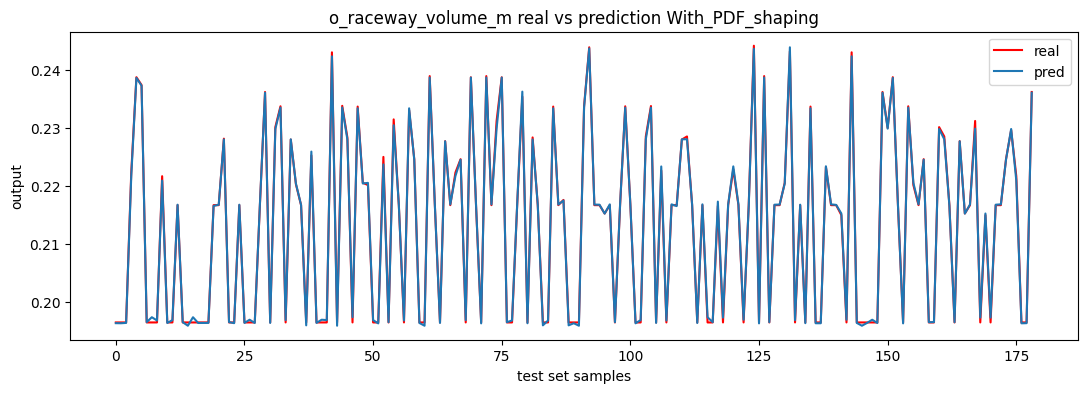

/Users/user/Desktop/DOE_CIVS/experiments/2023june/singleOutput/PDFshapingUtils.py:347: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(error, bins=n_bins, color="blue")


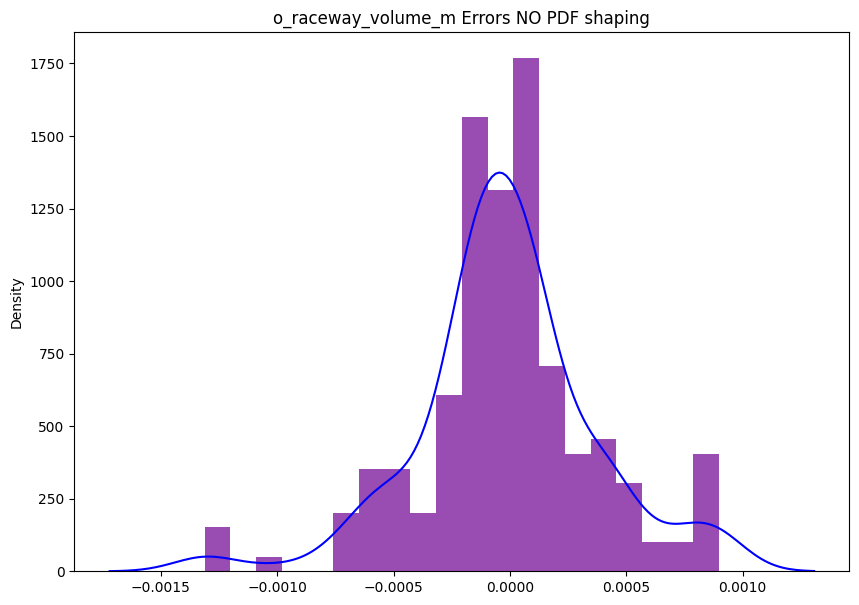

In [45]:

PDFshapingOBJ.plot_preds_vs_reals( list_preds, list_reals )
